In [149]:
# Importing data extraction libraries
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning, normalization and Regression libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVR
from sklearn.naive_bayes import MultinomialNB

import math


# TensorFlow Libraries

In [150]:
# Impoorting libraries for deep learning
import tensorflow as tf
from tensorflow import keras

# Ensure notebook doesnt use the entire ram
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
tf.debugging.disable_traceback_filtering()

1 Physical GPUs, 1 Logical GPUs


# Creating a Multi Activation Layer Function for Custom Model

In [ ]:
# Define custom Layer
class MultiActivationLayer(keras.layers.Layer):
    '''
    Multiple Activation Layer
    
    A neural network layer in which every node has a different activation function applied
    '''
    
    def __init__(self, out_features, activations, **kwargs):
        super().__init__(**kwargs)
        self.out_features = out_features
        self.activations = activations
    
    def build(self, input_shape):
        self.w = tf.Variable(tf.random.normal([input_shape[-1], self.out_features]), name='w')
        self.b = tf.Variable(tf.zeros([self.out_features]), name='b')
    
    @tf.function
    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        shape = tf.shape(z)[0]
        
        # Apply activation function to ouput features from nodes (columns) separately with different activation functions
        #, reshape to 2-D array and concatenate the results from each node in the same order
        nodes = [tf.reshape(self.activations[i%len(self.activations)](z[:,i]), (shape, 1)) for i in range(self.out_features)]
        z = tf.concat(nodes, 1)
        return z
    
    def get_config(self):
        config = super().get_config()
        config.update({
            "out_features": self.out_features,
            "activations": self.activations,
        })
        return config

# Function to create other models 

In [152]:
# Define custom architecture using the new layer
def create_model(activations, option='multi', num_classes=1, dropout=False, dropout_rate=0.2, task='classification'):
    if task == 'classification' and num_classes < 2:
        raise RuntimeError()
        
    # Creating 5 Uniform models     
    if option == 'uniform':
        # Creating methods if the model does have dropout
        if not dropout:
            if task == 'classification':
                return keras.models.Sequential([
                    keras.layers.Dense(25, activation=activations[0], name='layers_dense_1'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(20, activation=activations[0], name='layers_dense_2'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(15, activation=activations[0], name='layers_dense_3'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(10, activation=activations[0], name='layers_dense_4'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(5, activation=activations[0], name='layers_dense_5'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(num_classes, activation='softmax', name='layers_dense')
                ])
 
    elif option == 'multi':
        # Method to create a multi activation model
        if not dropout:
            if task == 'classification':
                return keras.models.Sequential([
                    MultiActivationLayer(25, activations, name='layers_multi_1'),
                    keras.layers.BatchNormalization(),
                    MultiActivationLayer(20, activations, name='layers_multi_2'),
                    keras.layers.BatchNormalization(),
                    MultiActivationLayer(15, activations, name='layers_multi_3'),
                    keras.layers.BatchNormalization(),
                    MultiActivationLayer(10, activations, name='layers_multi_4'),
                    keras.layers.BatchNormalization(),
                    MultiActivationLayer(5, activations, name='layers_multi_5'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(num_classes, activation='softmax', name='layers_dense')
                ])

    elif option == 'sequential':
        if len(activations) < 5: raise RuntimeError()
        if not dropout:
            if task == 'classification':
                return keras.models.Sequential([
                    keras.layers.Dense(25, activation=activations[0], name='layers_dense_1'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(20, activation=activations[1], name='layers_dense_2'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(15, activation=activations[2], name='layers_dense_3'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(10, activation=activations[3], name='layers_dense_4'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(5, activation=activations[4], name='layers_dense_5'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(num_classes, activation='softmax', name='layers_dense')
                ])

    else:
        raise RuntimeError()

In [153]:
# Define custom architecture using the new layer
def create_model_paper(activations, option='multi', num_classes=1, dropout=False, dropout_rate=0.2, task='classification'):
    if task == 'classification' and num_classes < 2:
        raise RuntimeError()
        
    # Creating 5 Uniform models     
    if option == 'uniform':
        # Creating methods if the model does have dropout
        if not dropout:
            if task == 'classification':
                return keras.models.Sequential([
                    keras.layers.Dense(30, activation=activations[0], name='layers_dense_1'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(15, activation=activations[0], name='layers_dense_2'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(30, activation=activations[0], name='layers_dense_3'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(1, activation=activations[0], name='layers_dense_4'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(num_classes, activation='softmax', name='layers_dense')
                ])
 
    elif option == 'multi':
        # Method to create a multi activation model
        if not dropout:
            if task == 'classification':
                return keras.models.Sequential([
                    keras.layers.Dense(30, activation=activations[0], name='layers_dense_1'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(15, activation=activations[0], name='layers_dense_2'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(30, activation=activations[0], name='layers_dense_3'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(1, activation=activations[0], name='layers_dense_4'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(num_classes, activation='softmax', name='layers_dense')
                ])

    elif option == 'sequential':
        if len(activations) < 5: raise RuntimeError()
        if not dropout:
            if task == 'classification':
                return keras.models.Sequential([
                    keras.layers.Dense(30, activation=activations[0], name='layers_dense_1'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(15, activation=activations[0], name='layers_dense_2'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(30, activation=activations[0], name='layers_dense_3'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(1, activation=activations[0], name='layers_dense_4'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Dense(num_classes, activation='softmax', name='layers_dense')
                ])

    else:
        raise RuntimeError()

In [154]:
# Define testing function for generating and running tests
def test(X, y, num_classes=None, X_test=None, y_test=None, task='classification', epochs=100, batch_size=32, task_name=''):
    
    Paper_MANN, Paper_MANN_Alt1, Paper_MANN_Alt2, Paper_MANN_Alt3 = None, None, None, None
    MANN, MANN_Alt1, MANN_Alt2, MANN_Alt3 = None, None, None, None
    UANN1, UANN2, UANN3, UANN4, UANN5 = None, None, None, None, None
    SANN =  None
    
    if X_test is None or y_test is None:
        # Split data into training and testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    else:
        X_train, y_train = X, y

    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

    train_dataset = train_dataset.shuffle(1000).batch(batch_size)
    test_dataset = test_dataset.batch(batch_size)
        
    
    if task == 'classification':
        if num_classes is None:
            raise RuntimeError()
            
        # Create our model
        MANN = create_model(activations=[tf.nn.sigmoid, 
                                         tf.nn.tanh, 
                                         tf.nn.leaky_relu, 
                                         tf.nn.elu, 
                                         tf.nn.swish], dropout=False, num_classes=num_classes, task=task)
        
        MANN.compile(optimizer=keras.optimizers.legacy.Nadam(),
                         loss=keras.losses.CategoricalCrossentropy(),
                         metrics=[keras.metrics.CategoricalAccuracy()])
        
        
        MANN_Alt1 = create_model(activations=[tf.nn.tanh, 
                                              tf.nn.sigmoid, 
                                              tf.nn.leaky_relu, 
                                              tf.nn.elu, 
                                              tf.nn.swish], dropout=False, num_classes=num_classes, task=task)
        
        MANN_Alt1.compile(optimizer=keras.optimizers.legacy.Nadam(),
                         loss=keras.losses.CategoricalCrossentropy(),
                         metrics=[keras.metrics.CategoricalAccuracy()])
        
        
        MANN_Alt2 = create_model(activations=[tf.nn.tanh,
                                              tf.nn.leaky_relu,
                                              tf.nn.sigmoid,
                                              tf.nn.elu,
                                              tf.nn.swish], dropout=False, num_classes=num_classes, task=task)
        MANN_Alt2.compile(optimizer=keras.optimizers.legacy.Nadam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])
        
        
        
        MANN_Alt3 = create_model(activations=[tf.nn.tanh, 
                                              tf.nn.leaky_relu, 
                                              tf.nn.elu, 
                                              tf.nn.sigmoid, 
                                              tf.nn.swish], 
                                 dropout=False, 
                                 num_classes=num_classes, 
                                 task=task)
        
        MANN_Alt3.compile(optimizer=keras.optimizers.legacy.Nadam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])
        
        # Paper Proposed Models
        
        # Create our model
        Paper_MANN = create_model_paper(activations=[tf.nn.sigmoid,
                                         tf.nn.leaky_relu, 
                                         tf.nn.elu, 
                                         tf.nn.swish], dropout=False, num_classes=num_classes, task=task)
        
        Paper_MANN.compile(optimizer=keras.optimizers.legacy.Nadam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])
        
        
        Paper_MANN_Alt1 = create_model_paper(activations=[tf.nn.leaky_relu, 
                                              tf.nn.sigmoid, 
                                              tf.nn.elu, 
                                              tf.nn.swish], dropout=False, num_classes=num_classes, task=task)
        Paper_MANN_Alt1.compile(optimizer=keras.optimizers.legacy.Nadam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])
        
        
        Paper_MANN_Alt2 = create_model_paper(activations=[tf.nn.leaky_relu,
                                              tf.nn.elu,
                                              tf.nn.sigmoid,
                                              tf.nn.swish], dropout=False, num_classes=num_classes, task=task)
        Paper_MANN_Alt2.compile(optimizer=keras.optimizers.legacy.Nadam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])
        
        
        Paper_MANN_Alt3 = create_model_paper(activations=[tf.nn.leaky_relu, 
                                              tf.nn.elu, 
                                              tf.nn.swish,
                                              tf.nn.sigmoid],
                                 dropout=False, 
                                 num_classes=num_classes, 
                                 task=task)
        
        Paper_MANN_Alt3.compile(optimizer=keras.optimizers.legacy.Nadam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])
        
        
        
        # Create uniform model for each activation function
        UANN1 = create_model(activations=[tf.nn.sigmoid], option='uniform', num_classes=num_classes, task=task)
        UANN1.compile(optimizer=keras.optimizers.legacy.Nadam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])
        
        UANN2 = create_model(activations=[tf.nn.tanh], option='uniform', num_classes=num_classes, task=task)
        UANN2.compile(optimizer=keras.optimizers.legacy.Nadam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])
        
        UANN3 = create_model(activations=[tf.nn.leaky_relu], option='uniform', num_classes=num_classes, task=task)
        UANN3.compile(optimizer=keras.optimizers.legacy.Nadam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])
        
        UANN4 = create_model(activations=[tf.nn.elu], option='uniform', num_classes=num_classes, task=task)
        UANN4.compile(optimizer=keras.optimizers.legacy.Nadam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])
        
        UANN5 = create_model(activations=[tf.nn.swish], option='uniform', num_classes=num_classes, task=task)
        UANN5.compile(optimizer=keras.optimizers.legacy.Nadam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])
        
        # Create sequential activation network
        SANN = create_model(activations=[tf.nn.swish, tf.nn.elu, tf.nn.leaky_relu, tf.nn.tanh, tf.nn.sigmoid], option='sequential', dropout=False, num_classes=num_classes, task=task)
        SANN.compile(optimizer=keras.optimizers.legacy.Nadam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])

        
    else:
        raise RuntimeError()
    
    # Fit the data to the models for a set number of epochs
    print("Training Multi Activation Neural Network...")
    path=f'./Models/Checkpoints/{task_name}/MANN.tf'
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
                                                                filepath=path,
                                                                save_weights_only=True,
                                                                monitor='val_loss',
                                                                mode='min',
                                                                save_best_only= True
                                                               )
    MANN_hist = MANN.fit(x=train_dataset, batch_size=batch_size, epochs=epochs, validation_data=test_dataset, callbacks=[model_checkpoint_callback])
    MANN.save(filepath=f'./Models/{task_name}/MANN', overwrite=True, save_format="keras")
    print('Training Complete')
    
    
    
    # Alternate MANN Model    
    path=f'./Models/Checkpoints/{task_name}/MANN_Alt1.tf'
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
                                                                filepath=path,
                                                                save_weights_only=True,
                                                                monitor='val_loss',
                                                                mode='min',
                                                                save_best_only= True
                                                               )
    MANN_Alt1_hist = MANN_Alt1.fit(x=train_dataset, batch_size=batch_size, epochs=epochs, validation_data=test_dataset, callbacks=[model_checkpoint_callback])
    MANN_Alt1.save(filepath=f'./Models/{task_name}/MANN_Alt1', overwrite=True, save_format="keras")
    print("Training Complete")
    

    # Alternate MANN Model 
    path=f'./Models/Checkpoints/{task_name}/MANN_Alt2.tf'
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
                                                                filepath=path,
                                                                save_weights_only=True,
                                                                monitor='val_loss',
                                                                mode='min',
                                                                save_best_only= True
                                                               )
    MANN_Alt2_hist = MANN_Alt2.fit(x=train_dataset, batch_size=batch_size, epochs=epochs, validation_data=test_dataset, callbacks=[model_checkpoint_callback])
    MANN_Alt2.save(filepath=f'./Models/{task_name}/MANN_Alt2', overwrite=True, save_format="keras")
    print("Training Compelte")
    
    
    
    
    
    
    path=f'./Models/Checkpoints/{task_name}/MANN_Alt3.tf'
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
                                                                filepath=path,
                                                                save_weights_only=True,
                                                                monitor='val_loss',
                                                                mode='min',
                                                                save_best_only= True
                                                               )
    MANN_Alt3_hist = MANN_Alt3.fit(x=train_dataset, batch_size=batch_size, epochs=epochs, validation_data=test_dataset, callbacks=[model_checkpoint_callback])
    MANN_Alt3.save(filepath=f'./Models/{task_name}/MANN_Alt3', overwrite=True, save_format="keras")
    
    
    # Training Paper proposed model
    print("Training Multi Activation Neural Network...")
    path=f'./Models/Checkpoints/{task_name}/Paper_MANN.tf'
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
                                                                filepath=path,
                                                                save_weights_only=True,
                                                                monitor='val_loss',
                                                                mode='min',
                                                                save_best_only= True
                                                               )
    Paper_MANN_hist = Paper_MANN.fit(x=train_dataset, batch_size=batch_size, epochs=epochs, validation_data=test_dataset, callbacks=[model_checkpoint_callback])
    Paper_MANN.save(filepath=f'./Models/{task_name}/Paper_MANN', overwrite=True, save_format="keras")
    print('Training Complete')
    
    
    print("\n\n************Training Multi Activation Neural Network...************")
    path=f'./Models/Checkpoints/{task_name}/Paper_MANN_Alt1.tf'
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
                                                                filepath=path,
                                                                save_weights_only=True,
                                                                monitor='val_loss',
                                                                mode='min',
                                                                save_best_only= True
                                                               )
    Paper_MANN_Alt1_hist = Paper_MANN_Alt1.fit(x=train_dataset, batch_size=batch_size, epochs=epochs, validation_data=test_dataset, callbacks=[model_checkpoint_callback])
    Paper_MANN_Alt1.save(filepath=f'./Models/{task_name}/Paper_MANN_Alt1', overwrite=True, save_format="keras")
    print('Training Complete')
    
    
    print("\n\n************Training Multi Activation Neural Network...************")
    path=f'./Models/Checkpoints/{task_name}/Paper_MANN_Alt2.tf'
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
                                                                filepath=path,
                                                                save_weights_only=True,
                                                                monitor='val_loss',
                                                                mode='min',
                                                                save_best_only= True
                                                               )
    Paper_MANN_Alt2_hist = Paper_MANN_Alt2.fit(x=train_dataset, batch_size=batch_size, epochs=epochs, validation_data=test_dataset, callbacks=[model_checkpoint_callback])
    Paper_MANN_Alt2.save(filepath=f'./Models/{task_name}/Paper_MANN_Alt2', overwrite=True, save_format="keras")
    print('Training Complete')
    
    
    print("\n\n************Training Multi Activation Neural Network************")
    path=f'./Models/Checkpoints/{task_name}/Paper_MANN_Alt3.tf'
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
                                                                filepath=path,
                                                                save_weights_only=True,
                                                                monitor='val_loss',
                                                                mode='min',
                                                                save_best_only= True
                                                               )
    Paper_MANN_Alt3_hist = Paper_MANN_Alt3.fit(x=train_dataset, batch_size=batch_size, epochs=epochs, validation_data=test_dataset, callbacks=[model_checkpoint_callback])
    Paper_MANN_Alt3.save(filepath=f'./Models/{task_name}/Paper_MANN_Alt3', overwrite=True, save_format="keras")
    print('Training Complete')
    
    
    
    
    print("\n\n************Training Sigmoid Uniform Activation Neural Network************")
    path=f'./Models/Checkpoints/{task_name}/Sigmoid.tf'
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=path,
                                                                    save_weights_only=True,
                                                                    monitor='val_loss',
                                                                    mode='min',
                                                                    save_best_only=True)
    UANN1_hist = UANN1.fit(x=train_dataset, batch_size=batch_size, epochs=epochs, validation_data=test_dataset, callbacks=[model_checkpoint_callback])
    UANN1.save(filepath=f'./Models/{task_name}/UniformSigmoid', overwrite=True, save_format="keras")
    print('Training Complete')

    
    print("\n\n************Training Tanh Uniform Activation Neural Network...")
    path=f'./Models/Checkpoints/{task_name}/Tanh.tf'
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=path,
                                                                    save_weights_only=True,
                                                                    monitor='val_loss',
                                                                    mode='min',
                                                                    save_best_only=True)
    UANN2_hist = UANN2.fit(x=train_dataset, batch_size=batch_size, epochs=epochs, validation_data=test_dataset, callbacks=[model_checkpoint_callback])
    UANN2.save(filepath=f'./Models/{task_name}/UniformTanh', overwrite=True, save_format="keras")
    print('Training Complete')

    
    print("\n\n************Training Leaky ReLU Uniform Activation Neural Network...")
    path=f'./Models/Checkpoints/{task_name}/LeakyReLU.tf'
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=path,
                                                                    save_weights_only=True,
                                                                    monitor='val_loss',
                                                                    mode='min',
                                                                    save_best_only=True)
    UANN3_hist = UANN3.fit(x=train_dataset, batch_size=batch_size, epochs=epochs, validation_data=test_dataset, callbacks=[model_checkpoint_callback])
    UANN3.save(filepath=f'./Models/{task_name}/UniformLeakyReLU', overwrite=True, save_format="keras")
    print('Training Complete')
    

    print("\n\n************Training ELU Uniform Activation Neural Network...")
    path=f'./Models/Checkpoints/{task_name}/ELU.tf'
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=path,
                                                                    save_weights_only=True,
                                                                    monitor='val_loss',
                                                                    mode='min',
                                                                    save_best_only=True)
    UANN4_hist = UANN4.fit(x=train_dataset, batch_size=batch_size, epochs=epochs, validation_data=test_dataset, callbacks=[model_checkpoint_callback])
    UANN4.save(filepath=f'./Models/{task_name}/UniformELU', overwrite=True, save_format="keras")
    print('Training Complete')

    print("\n\n************Training Swish Uniform Activation Neural Network...")
    path=f'./Models/Checkpoints/{task_name}/Swish.tf'
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=path,
                                                                    save_weights_only=True,
                                                                    monitor='val_loss',
                                                                    mode='min',
                                                                    save_best_only=True)
    UANN5_hist = UANN5.fit(x=train_dataset, batch_size=batch_size, epochs=epochs, validation_data=test_dataset, callbacks=[model_checkpoint_callback])
    UANN5.save(filepath=f'./Models/{task_name}/UniformSwish', overwrite=True, save_format="keras")
    print('Training Complete')

    print("\n\n************Training Sequential Activation Neural Network...")
    path=f'./Models/Checkpoints/{task_name}/Sequential.tf'
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=path,
                                                                    save_weights_only=True,
                                                                    monitor='val_loss',
                                                                    mode='min',
                                                                    save_best_only=True)
    SANN_hist = SANN.fit(x=train_dataset, batch_size=batch_size, epochs=epochs, validation_data=test_dataset, callbacks=[model_checkpoint_callback])
    SANN.save(filepath=f'./Models/{task_name}/Sequential', overwrite=True, save_format="keras")
    print('Training Complete')

    # Create dictionaries to return for models and scores
    models = {
        'MANN': MANN,
        'MANN_Alt1': MANN_Alt1,
        'MANN_Alt2': MANN_Alt2,
        'MANN_Alt3': MANN_Alt3,
        'Paper_MANN': Paper_MANN,
        'Paper_MANN_Alt1': Paper_MANN_Alt1,
        'Paper_MANN_Alt2': Paper_MANN_Alt2,
        'Paper_MANN_Alt3': Paper_MANN_Alt3,
        'Sigmoid': UANN1,
        'Tanh': UANN2,
        'LeakyReLU': UANN3,
        'ELU': UANN4,
        'Swish': UANN5,
        'Sequential': SANN
    }
    
    histories = {
        'MANN': MANN_hist,
        'MANN_Alt1': MANN_Alt1_hist,
        'MANN_Alt2': MANN_Alt2_hist,
        'MANN_Alt3': MANN_Alt3_hist,
        'Paper_MANN': Paper_MANN_hist,
        'Paper_MANN_Alt1': Paper_MANN_Alt1_hist,
        'Paper_MANN_Alt2': Paper_MANN_Alt2_hist,
        'Paper_MANN_Alt3': Paper_MANN_Alt3_hist,
        'Sigmoid': UANN1_hist,
        'Tanh': UANN2_hist,
        'LeakyReLU': UANN3_hist,
        'ELU': UANN4_hist,
        'Swish': UANN5_hist,
        'Sequential': SANN_hist
    }

    return models, histories

# Pulling Heart Faliure data from the csv

In [155]:
# Load the data and split into testing and training for processing
HeartFailureData = pd.read_csv('./Datasets/heart.csv')

HeartFailureData.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

## Assigning features and targets from dataset

In [156]:
features = HeartFailureData.drop('HeartDisease', axis=1)
#npFeatures = np.array(features)

target = HeartFailureData['HeartDisease']
#npTarget = np.array(target)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

## Normalizing dataset

In [157]:
# Process and normalize the data
one_hot = OneHotEncoder(sparse_output=False)

# One-Hot encode categorical columns
X_train.append(pd.DataFrame(data=one_hot.fit_transform(X_train[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]), columns=one_hot.get_feature_names_out()))
X_test.append(pd.DataFrame(data=one_hot.transform(X_test[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]), columns=one_hot.get_feature_names_out()))


# Drop the transformed columns and unneeded columns
X_train.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis = 1, inplace=True)
X_test.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1, inplace=True)


# Normalize numerical columns
scaler = StandardScaler()
X_train[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']]= scaler.fit_transform(X_train[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']])
X_test[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']] = scaler.transform(X_test[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']])

C:\Users\Jaskirat\AppData\Local\Temp\ipykernel_25644\3618434260.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train.append(pd.DataFrame(data=one_hot.fit_transform(X_train[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]), columns=one_hot.get_feature_names_out()))
C:\Users\Jaskirat\AppData\Local\Temp\ipykernel_25644\3618434260.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test.append(pd.DataFrame(data=one_hot.transform(X_test[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]), columns=one_hot.get_feature_names_out()))


In [158]:
# One-Hot encode target labels
y_train = pd.DataFrame(data=one_hot.fit_transform(y_train.to_numpy().reshape(-1,1)), columns=one_hot.categories_)
y_test = pd.DataFrame(data=one_hot.transform(y_test.to_numpy().reshape(-1,1)), columns=one_hot.categories_)

In [159]:
# Create and fit all neural networks for evaluations

models, histories = test(X_train.to_numpy(), y_train.to_numpy(), X_test=X_test.to_numpy(), y_test=y_test.to_numpy(), num_classes=len(one_hot.categories_[0]), task='classification', epochs=500, batch_size=128, task_name='HeartFailure')

Training Multi Activation Neural Network...
Epoch 1/500
6/6 [==============================] - 5s 154ms/step - loss: 0.6625 - categorical_accuracy: 0.5777 - val_loss: 0.9860 - val_categorical_accuracy: 0.5870
Epoch 2/500
6/6 [==============================] - 0s 87ms/step - loss: 0.6496 - categorical_accuracy: 0.6322 - val_loss: 0.7934 - val_categorical_accuracy: 0.5815
Epoch 3/500
6/6 [==============================] - 1s 90ms/step - loss: 0.6348 - categorical_accuracy: 0.6458 - val_loss: 0.7154 - val_categorical_accuracy: 0.5761
Epoch 4/500
6/6 [==============================] - 1s 94ms/step - loss: 0.6231 - categorical_accuracy: 0.6540 - val_loss: 0.6790 - val_categorical_accuracy: 0.5815
Epoch 5/500
6/6 [==============================] - 1s 88ms/step - loss: 0.6092 - categorical_accuracy: 0.6839 - val_loss: 0.6602 - val_categorical_accuracy: 0.5870
Epoch 6/500
6/6 [==============================] - 0s 86ms/step - loss: 0.5966 - categorical_accuracy: 0.6894 - val_loss: 0.6445 - val_

6/6 [==============================] - 0s 64ms/step - loss: 0.4070 - categorical_accuracy: 0.8161 - val_loss: 0.5570 - val_categorical_accuracy: 0.7174
Epoch 51/500
6/6 [==============================] - 0s 66ms/step - loss: 0.4056 - categorical_accuracy: 0.8174 - val_loss: 0.5594 - val_categorical_accuracy: 0.7174
Epoch 52/500
6/6 [==============================] - 0s 68ms/step - loss: 0.3938 - categorical_accuracy: 0.8460 - val_loss: 0.5602 - val_categorical_accuracy: 0.7228
Epoch 53/500
6/6 [==============================] - 0s 68ms/step - loss: 0.3997 - categorical_accuracy: 0.8256 - val_loss: 0.5604 - val_categorical_accuracy: 0.7228
Epoch 54/500
6/6 [==============================] - 0s 70ms/step - loss: 0.4003 - categorical_accuracy: 0.8297 - val_loss: 0.5612 - val_categorical_accuracy: 0.7228
Epoch 55/500
6/6 [==============================] - 0s 66ms/step - loss: 0.3939 - categorical_accuracy: 0.8229 - val_loss: 0.5589 - val_categorical_accuracy: 0.7337
Epoch 56/500
6/6 [=====

Epoch 100/500
6/6 [==============================] - 0s 53ms/step - loss: 0.3464 - categorical_accuracy: 0.8460 - val_loss: 0.5397 - val_categorical_accuracy: 0.7391
Epoch 101/500
6/6 [==============================] - 0s 58ms/step - loss: 0.3254 - categorical_accuracy: 0.8597 - val_loss: 0.5409 - val_categorical_accuracy: 0.7391
Epoch 102/500
6/6 [==============================] - 0s 54ms/step - loss: 0.3458 - categorical_accuracy: 0.8624 - val_loss: 0.5452 - val_categorical_accuracy: 0.7500
Epoch 103/500
6/6 [==============================] - 0s 56ms/step - loss: 0.3311 - categorical_accuracy: 0.8610 - val_loss: 0.5479 - val_categorical_accuracy: 0.7446
Epoch 104/500
6/6 [==============================] - 0s 64ms/step - loss: 0.3239 - categorical_accuracy: 0.8651 - val_loss: 0.5439 - val_categorical_accuracy: 0.7391
Epoch 105/500
6/6 [==============================] - 0s 52ms/step - loss: 0.3253 - categorical_accuracy: 0.8624 - val_loss: 0.5436 - val_categorical_accuracy: 0.7446
Epoc

6/6 [==============================] - 0s 65ms/step - loss: 0.3006 - categorical_accuracy: 0.8747 - val_loss: 0.5422 - val_categorical_accuracy: 0.7717
Epoch 150/500
6/6 [==============================] - 0s 56ms/step - loss: 0.2952 - categorical_accuracy: 0.8815 - val_loss: 0.5514 - val_categorical_accuracy: 0.7663
Epoch 151/500
6/6 [==============================] - 0s 67ms/step - loss: 0.2830 - categorical_accuracy: 0.8842 - val_loss: 0.5530 - val_categorical_accuracy: 0.7717
Epoch 152/500
6/6 [==============================] - 0s 64ms/step - loss: 0.2877 - categorical_accuracy: 0.8828 - val_loss: 0.5561 - val_categorical_accuracy: 0.7609
Epoch 153/500
6/6 [==============================] - 0s 63ms/step - loss: 0.3011 - categorical_accuracy: 0.8787 - val_loss: 0.5649 - val_categorical_accuracy: 0.7554
Epoch 154/500
6/6 [==============================] - 0s 55ms/step - loss: 0.2874 - categorical_accuracy: 0.8747 - val_loss: 0.5662 - val_categorical_accuracy: 0.7554
Epoch 155/500
6/6 

6/6 [==============================] - 0s 53ms/step - loss: 0.2497 - categorical_accuracy: 0.9005 - val_loss: 0.5857 - val_categorical_accuracy: 0.7609
Epoch 199/500
6/6 [==============================] - 0s 61ms/step - loss: 0.2354 - categorical_accuracy: 0.9101 - val_loss: 0.5928 - val_categorical_accuracy: 0.7554
Epoch 200/500
6/6 [==============================] - 0s 54ms/step - loss: 0.2479 - categorical_accuracy: 0.8937 - val_loss: 0.5982 - val_categorical_accuracy: 0.7446
Epoch 201/500
6/6 [==============================] - 0s 53ms/step - loss: 0.2714 - categorical_accuracy: 0.8787 - val_loss: 0.6030 - val_categorical_accuracy: 0.7391
Epoch 202/500
6/6 [==============================] - 0s 62ms/step - loss: 0.2257 - categorical_accuracy: 0.9251 - val_loss: 0.6139 - val_categorical_accuracy: 0.7500
Epoch 203/500
6/6 [==============================] - 0s 64ms/step - loss: 0.2571 - categorical_accuracy: 0.9005 - val_loss: 0.6198 - val_categorical_accuracy: 0.7500
Epoch 204/500
6/6 

6/6 [==============================] - 0s 69ms/step - loss: 0.2153 - categorical_accuracy: 0.9074 - val_loss: 0.6618 - val_categorical_accuracy: 0.7391
Epoch 248/500
6/6 [==============================] - 0s 67ms/step - loss: 0.2089 - categorical_accuracy: 0.9183 - val_loss: 0.6639 - val_categorical_accuracy: 0.7500
Epoch 249/500
6/6 [==============================] - 0s 71ms/step - loss: 0.2343 - categorical_accuracy: 0.9074 - val_loss: 0.6653 - val_categorical_accuracy: 0.7446
Epoch 250/500
6/6 [==============================] - 0s 69ms/step - loss: 0.2245 - categorical_accuracy: 0.9046 - val_loss: 0.6650 - val_categorical_accuracy: 0.7446
Epoch 251/500
6/6 [==============================] - 0s 71ms/step - loss: 0.2203 - categorical_accuracy: 0.9005 - val_loss: 0.6595 - val_categorical_accuracy: 0.7446
Epoch 252/500
6/6 [==============================] - 0s 71ms/step - loss: 0.2095 - categorical_accuracy: 0.9074 - val_loss: 0.6592 - val_categorical_accuracy: 0.7391
Epoch 253/500
6/6 

6/6 [==============================] - 0s 72ms/step - loss: 0.2135 - categorical_accuracy: 0.9128 - val_loss: 0.7085 - val_categorical_accuracy: 0.7391
Epoch 297/500
6/6 [==============================] - 0s 67ms/step - loss: 0.1872 - categorical_accuracy: 0.9264 - val_loss: 0.7005 - val_categorical_accuracy: 0.7500
Epoch 298/500
6/6 [==============================] - 0s 63ms/step - loss: 0.1754 - categorical_accuracy: 0.9292 - val_loss: 0.7058 - val_categorical_accuracy: 0.7446
Epoch 299/500
6/6 [==============================] - 0s 65ms/step - loss: 0.2201 - categorical_accuracy: 0.9060 - val_loss: 0.7125 - val_categorical_accuracy: 0.7446
Epoch 300/500
6/6 [==============================] - 0s 67ms/step - loss: 0.2000 - categorical_accuracy: 0.9237 - val_loss: 0.7230 - val_categorical_accuracy: 0.7446
Epoch 301/500
6/6 [==============================] - 0s 65ms/step - loss: 0.2090 - categorical_accuracy: 0.9183 - val_loss: 0.7268 - val_categorical_accuracy: 0.7337
Epoch 302/500
6/6 

6/6 [==============================] - 0s 67ms/step - loss: 0.2040 - categorical_accuracy: 0.9155 - val_loss: 0.7892 - val_categorical_accuracy: 0.7391
Epoch 346/500
6/6 [==============================] - 0s 63ms/step - loss: 0.2037 - categorical_accuracy: 0.9128 - val_loss: 0.7963 - val_categorical_accuracy: 0.7391
Epoch 347/500
6/6 [==============================] - 0s 61ms/step - loss: 0.2224 - categorical_accuracy: 0.9033 - val_loss: 0.8008 - val_categorical_accuracy: 0.7228
Epoch 348/500
6/6 [==============================] - 0s 64ms/step - loss: 0.2359 - categorical_accuracy: 0.8992 - val_loss: 0.7998 - val_categorical_accuracy: 0.7391
Epoch 349/500
6/6 [==============================] - 0s 65ms/step - loss: 0.2043 - categorical_accuracy: 0.9223 - val_loss: 0.7932 - val_categorical_accuracy: 0.7446
Epoch 350/500
6/6 [==============================] - 0s 65ms/step - loss: 0.1890 - categorical_accuracy: 0.9210 - val_loss: 0.7892 - val_categorical_accuracy: 0.7391
Epoch 351/500
6/6 

6/6 [==============================] - 0s 49ms/step - loss: 0.1869 - categorical_accuracy: 0.9155 - val_loss: 0.7946 - val_categorical_accuracy: 0.7337
Epoch 395/500
6/6 [==============================] - 0s 52ms/step - loss: 0.1897 - categorical_accuracy: 0.9183 - val_loss: 0.8052 - val_categorical_accuracy: 0.7446
Epoch 396/500
6/6 [==============================] - 0s 52ms/step - loss: 0.2220 - categorical_accuracy: 0.9101 - val_loss: 0.8117 - val_categorical_accuracy: 0.7446
Epoch 397/500
6/6 [==============================] - 0s 58ms/step - loss: 0.1708 - categorical_accuracy: 0.9292 - val_loss: 0.8120 - val_categorical_accuracy: 0.7391
Epoch 398/500
6/6 [==============================] - 0s 63ms/step - loss: 0.1734 - categorical_accuracy: 0.9305 - val_loss: 0.8220 - val_categorical_accuracy: 0.7446
Epoch 399/500
6/6 [==============================] - 0s 59ms/step - loss: 0.1704 - categorical_accuracy: 0.9387 - val_loss: 0.8414 - val_categorical_accuracy: 0.7337
Epoch 400/500
6/6 

6/6 [==============================] - 0s 61ms/step - loss: 0.1966 - categorical_accuracy: 0.9223 - val_loss: 0.8588 - val_categorical_accuracy: 0.7228
Epoch 444/500
6/6 [==============================] - 0s 50ms/step - loss: 0.1963 - categorical_accuracy: 0.9264 - val_loss: 0.8691 - val_categorical_accuracy: 0.7228
Epoch 445/500
6/6 [==============================] - 0s 52ms/step - loss: 0.1545 - categorical_accuracy: 0.9332 - val_loss: 0.8673 - val_categorical_accuracy: 0.7174
Epoch 446/500
6/6 [==============================] - 0s 52ms/step - loss: 0.1670 - categorical_accuracy: 0.9360 - val_loss: 0.8622 - val_categorical_accuracy: 0.7283
Epoch 447/500
6/6 [==============================] - 0s 52ms/step - loss: 0.1785 - categorical_accuracy: 0.9278 - val_loss: 0.8628 - val_categorical_accuracy: 0.7391
Epoch 448/500
6/6 [==============================] - 0s 45ms/step - loss: 0.1865 - categorical_accuracy: 0.9183 - val_loss: 0.8636 - val_categorical_accuracy: 0.7391
Epoch 449/500
6/6 

6/6 [==============================] - 0s 72ms/step - loss: 0.1849 - categorical_accuracy: 0.9196 - val_loss: 0.9006 - val_categorical_accuracy: 0.7174
Epoch 493/500
6/6 [==============================] - 0s 71ms/step - loss: 0.1458 - categorical_accuracy: 0.9469 - val_loss: 0.8968 - val_categorical_accuracy: 0.7120
Epoch 494/500
6/6 [==============================] - 0s 74ms/step - loss: 0.1585 - categorical_accuracy: 0.9428 - val_loss: 0.8992 - val_categorical_accuracy: 0.7120
Epoch 495/500
6/6 [==============================] - 0s 76ms/step - loss: 0.1977 - categorical_accuracy: 0.9223 - val_loss: 0.9234 - val_categorical_accuracy: 0.7120
Epoch 496/500
6/6 [==============================] - 0s 75ms/step - loss: 0.1852 - categorical_accuracy: 0.9264 - val_loss: 0.9209 - val_categorical_accuracy: 0.7065
Epoch 497/500
6/6 [==============================] - 0s 51ms/step - loss: 0.1521 - categorical_accuracy: 0.9414 - val_loss: 0.9203 - val_categorical_accuracy: 0.7120
Epoch 498/500
6/6 

6/6 [==============================] - 1s 91ms/step - loss: 0.4777 - categorical_accuracy: 0.7847 - val_loss: 0.6112 - val_categorical_accuracy: 0.7065
Epoch 42/500
6/6 [==============================] - 1s 93ms/step - loss: 0.4711 - categorical_accuracy: 0.7929 - val_loss: 0.6081 - val_categorical_accuracy: 0.7065
Epoch 43/500
6/6 [==============================] - 1s 89ms/step - loss: 0.4776 - categorical_accuracy: 0.7888 - val_loss: 0.6052 - val_categorical_accuracy: 0.7011
Epoch 44/500
6/6 [==============================] - 1s 92ms/step - loss: 0.4713 - categorical_accuracy: 0.7970 - val_loss: 0.6022 - val_categorical_accuracy: 0.7120
Epoch 45/500
6/6 [==============================] - 1s 94ms/step - loss: 0.4729 - categorical_accuracy: 0.7861 - val_loss: 0.6007 - val_categorical_accuracy: 0.7120
Epoch 46/500
6/6 [==============================] - 1s 94ms/step - loss: 0.4701 - categorical_accuracy: 0.7929 - val_loss: 0.5993 - val_categorical_accuracy: 0.7065
Epoch 47/500
6/6 [=====

Epoch 91/500
6/6 [==============================] - 0s 77ms/step - loss: 0.3849 - categorical_accuracy: 0.8324 - val_loss: 0.5997 - val_categorical_accuracy: 0.7065
Epoch 92/500
6/6 [==============================] - 0s 77ms/step - loss: 0.3842 - categorical_accuracy: 0.8420 - val_loss: 0.6046 - val_categorical_accuracy: 0.7065
Epoch 93/500
6/6 [==============================] - 0s 75ms/step - loss: 0.3707 - categorical_accuracy: 0.8488 - val_loss: 0.6045 - val_categorical_accuracy: 0.7065
Epoch 94/500
6/6 [==============================] - 0s 76ms/step - loss: 0.3853 - categorical_accuracy: 0.8420 - val_loss: 0.6028 - val_categorical_accuracy: 0.7011
Epoch 95/500
6/6 [==============================] - 0s 79ms/step - loss: 0.3811 - categorical_accuracy: 0.8406 - val_loss: 0.6014 - val_categorical_accuracy: 0.7065
Epoch 96/500
6/6 [==============================] - 0s 76ms/step - loss: 0.3860 - categorical_accuracy: 0.8311 - val_loss: 0.6006 - val_categorical_accuracy: 0.6902
Epoch 97/5

6/6 [==============================] - 0s 75ms/step - loss: 0.3296 - categorical_accuracy: 0.8665 - val_loss: 0.6861 - val_categorical_accuracy: 0.7011
Epoch 141/500
6/6 [==============================] - 0s 74ms/step - loss: 0.3188 - categorical_accuracy: 0.8651 - val_loss: 0.6880 - val_categorical_accuracy: 0.6957
Epoch 142/500
6/6 [==============================] - 0s 76ms/step - loss: 0.3083 - categorical_accuracy: 0.8719 - val_loss: 0.6877 - val_categorical_accuracy: 0.7011
Epoch 143/500
6/6 [==============================] - 0s 58ms/step - loss: 0.3438 - categorical_accuracy: 0.8529 - val_loss: 0.6914 - val_categorical_accuracy: 0.6957
Epoch 144/500
6/6 [==============================] - 0s 71ms/step - loss: 0.3474 - categorical_accuracy: 0.8501 - val_loss: 0.6916 - val_categorical_accuracy: 0.6957
Epoch 145/500
6/6 [==============================] - 0s 70ms/step - loss: 0.3362 - categorical_accuracy: 0.8610 - val_loss: 0.6880 - val_categorical_accuracy: 0.6957
Epoch 146/500
6/6 

6/6 [==============================] - 0s 73ms/step - loss: 0.2806 - categorical_accuracy: 0.8869 - val_loss: 0.7928 - val_categorical_accuracy: 0.7011
Epoch 190/500
6/6 [==============================] - 0s 52ms/step - loss: 0.2870 - categorical_accuracy: 0.8828 - val_loss: 0.7962 - val_categorical_accuracy: 0.7011
Epoch 191/500
6/6 [==============================] - 0s 67ms/step - loss: 0.2866 - categorical_accuracy: 0.8747 - val_loss: 0.7954 - val_categorical_accuracy: 0.6957
Epoch 192/500
6/6 [==============================] - 0s 64ms/step - loss: 0.2763 - categorical_accuracy: 0.8924 - val_loss: 0.7951 - val_categorical_accuracy: 0.6957
Epoch 193/500
6/6 [==============================] - 0s 65ms/step - loss: 0.3028 - categorical_accuracy: 0.8869 - val_loss: 0.7953 - val_categorical_accuracy: 0.6902
Epoch 194/500
6/6 [==============================] - 0s 69ms/step - loss: 0.2972 - categorical_accuracy: 0.8706 - val_loss: 0.8021 - val_categorical_accuracy: 0.7065
Epoch 195/500
6/6 

6/6 [==============================] - 0s 73ms/step - loss: 0.2447 - categorical_accuracy: 0.9019 - val_loss: 0.9077 - val_categorical_accuracy: 0.6739
Epoch 239/500
6/6 [==============================] - 0s 73ms/step - loss: 0.2509 - categorical_accuracy: 0.8896 - val_loss: 0.9018 - val_categorical_accuracy: 0.6793
Epoch 240/500
6/6 [==============================] - 0s 72ms/step - loss: 0.2439 - categorical_accuracy: 0.8992 - val_loss: 0.9079 - val_categorical_accuracy: 0.6848
Epoch 241/500
6/6 [==============================] - 0s 73ms/step - loss: 0.2255 - categorical_accuracy: 0.9169 - val_loss: 0.9116 - val_categorical_accuracy: 0.6848
Epoch 242/500
6/6 [==============================] - 0s 62ms/step - loss: 0.2504 - categorical_accuracy: 0.8951 - val_loss: 0.9168 - val_categorical_accuracy: 0.6848
Epoch 243/500
6/6 [==============================] - 0s 77ms/step - loss: 0.2219 - categorical_accuracy: 0.9169 - val_loss: 0.9185 - val_categorical_accuracy: 0.6848
Epoch 244/500
6/6 

6/6 [==============================] - 0s 77ms/step - loss: 0.2163 - categorical_accuracy: 0.9196 - val_loss: 1.0311 - val_categorical_accuracy: 0.6630
Epoch 288/500
6/6 [==============================] - 0s 77ms/step - loss: 0.2208 - categorical_accuracy: 0.9196 - val_loss: 1.0255 - val_categorical_accuracy: 0.6685
Epoch 289/500
6/6 [==============================] - 0s 77ms/step - loss: 0.2157 - categorical_accuracy: 0.9223 - val_loss: 1.0306 - val_categorical_accuracy: 0.6522
Epoch 290/500
6/6 [==============================] - 0s 76ms/step - loss: 0.2156 - categorical_accuracy: 0.9087 - val_loss: 1.0331 - val_categorical_accuracy: 0.6685
Epoch 291/500
6/6 [==============================] - 0s 76ms/step - loss: 0.2476 - categorical_accuracy: 0.8883 - val_loss: 1.0324 - val_categorical_accuracy: 0.6739
Epoch 292/500
6/6 [==============================] - 0s 76ms/step - loss: 0.1908 - categorical_accuracy: 0.9210 - val_loss: 1.0359 - val_categorical_accuracy: 0.6739
Epoch 293/500
6/6 

6/6 [==============================] - 0s 79ms/step - loss: 0.1903 - categorical_accuracy: 0.9169 - val_loss: 1.1194 - val_categorical_accuracy: 0.6522
Epoch 337/500
6/6 [==============================] - 0s 74ms/step - loss: 0.2129 - categorical_accuracy: 0.9060 - val_loss: 1.1240 - val_categorical_accuracy: 0.6576
Epoch 338/500
6/6 [==============================] - 0s 72ms/step - loss: 0.2171 - categorical_accuracy: 0.9019 - val_loss: 1.1284 - val_categorical_accuracy: 0.6630
Epoch 339/500
6/6 [==============================] - 0s 61ms/step - loss: 0.2164 - categorical_accuracy: 0.9101 - val_loss: 1.1280 - val_categorical_accuracy: 0.6630
Epoch 340/500
6/6 [==============================] - 0s 67ms/step - loss: 0.2003 - categorical_accuracy: 0.9223 - val_loss: 1.1342 - val_categorical_accuracy: 0.6576
Epoch 341/500
6/6 [==============================] - 0s 64ms/step - loss: 0.2049 - categorical_accuracy: 0.9155 - val_loss: 1.1374 - val_categorical_accuracy: 0.6630
Epoch 342/500
6/6 

6/6 [==============================] - 0s 75ms/step - loss: 0.1798 - categorical_accuracy: 0.9292 - val_loss: 1.1912 - val_categorical_accuracy: 0.6522
Epoch 386/500
6/6 [==============================] - 0s 72ms/step - loss: 0.2007 - categorical_accuracy: 0.9128 - val_loss: 1.1903 - val_categorical_accuracy: 0.6630
Epoch 387/500
6/6 [==============================] - 0s 76ms/step - loss: 0.1888 - categorical_accuracy: 0.9346 - val_loss: 1.1900 - val_categorical_accuracy: 0.6576
Epoch 388/500
6/6 [==============================] - 0s 74ms/step - loss: 0.1966 - categorical_accuracy: 0.9237 - val_loss: 1.1825 - val_categorical_accuracy: 0.6630
Epoch 389/500
6/6 [==============================] - 0s 78ms/step - loss: 0.1953 - categorical_accuracy: 0.9183 - val_loss: 1.1773 - val_categorical_accuracy: 0.6685
Epoch 390/500
6/6 [==============================] - 0s 74ms/step - loss: 0.1523 - categorical_accuracy: 0.9401 - val_loss: 1.1833 - val_categorical_accuracy: 0.6576
Epoch 391/500
6/6 

6/6 [==============================] - 0s 50ms/step - loss: 0.1829 - categorical_accuracy: 0.9223 - val_loss: 1.2708 - val_categorical_accuracy: 0.6304
Epoch 435/500
6/6 [==============================] - 0s 61ms/step - loss: 0.1894 - categorical_accuracy: 0.9210 - val_loss: 1.2727 - val_categorical_accuracy: 0.6250
Epoch 436/500
6/6 [==============================] - 0s 46ms/step - loss: 0.1817 - categorical_accuracy: 0.9264 - val_loss: 1.2670 - val_categorical_accuracy: 0.6141
Epoch 437/500
6/6 [==============================] - 0s 53ms/step - loss: 0.1666 - categorical_accuracy: 0.9319 - val_loss: 1.2724 - val_categorical_accuracy: 0.6087
Epoch 438/500
6/6 [==============================] - 0s 57ms/step - loss: 0.1768 - categorical_accuracy: 0.9251 - val_loss: 1.2751 - val_categorical_accuracy: 0.6141
Epoch 439/500
6/6 [==============================] - 0s 46ms/step - loss: 0.1899 - categorical_accuracy: 0.9210 - val_loss: 1.2782 - val_categorical_accuracy: 0.6141
Epoch 440/500
6/6 

6/6 [==============================] - 0s 46ms/step - loss: 0.1616 - categorical_accuracy: 0.9387 - val_loss: 1.3011 - val_categorical_accuracy: 0.6413
Epoch 484/500
6/6 [==============================] - 0s 43ms/step - loss: 0.1742 - categorical_accuracy: 0.9360 - val_loss: 1.3057 - val_categorical_accuracy: 0.6250
Epoch 485/500
6/6 [==============================] - 0s 44ms/step - loss: 0.1896 - categorical_accuracy: 0.9196 - val_loss: 1.3092 - val_categorical_accuracy: 0.6304
Epoch 486/500
6/6 [==============================] - 0s 46ms/step - loss: 0.1576 - categorical_accuracy: 0.9441 - val_loss: 1.3038 - val_categorical_accuracy: 0.6413
Epoch 487/500
6/6 [==============================] - 0s 46ms/step - loss: 0.1930 - categorical_accuracy: 0.9183 - val_loss: 1.3004 - val_categorical_accuracy: 0.6304
Epoch 488/500
6/6 [==============================] - 0s 42ms/step - loss: 0.1994 - categorical_accuracy: 0.9196 - val_loss: 1.2984 - val_categorical_accuracy: 0.6304
Epoch 489/500
6/6 

6/6 [==============================] - 0s 48ms/step - loss: 0.4400 - categorical_accuracy: 0.7929 - val_loss: 0.5973 - val_categorical_accuracy: 0.7500
Epoch 33/500
6/6 [==============================] - 0s 47ms/step - loss: 0.4422 - categorical_accuracy: 0.7956 - val_loss: 0.5956 - val_categorical_accuracy: 0.7500
Epoch 34/500
6/6 [==============================] - 0s 44ms/step - loss: 0.4352 - categorical_accuracy: 0.8052 - val_loss: 0.5938 - val_categorical_accuracy: 0.7446
Epoch 35/500
6/6 [==============================] - 0s 48ms/step - loss: 0.4426 - categorical_accuracy: 0.7916 - val_loss: 0.5917 - val_categorical_accuracy: 0.7446
Epoch 36/500
6/6 [==============================] - 0s 49ms/step - loss: 0.4381 - categorical_accuracy: 0.7834 - val_loss: 0.5902 - val_categorical_accuracy: 0.7391
Epoch 37/500
6/6 [==============================] - 0s 50ms/step - loss: 0.4234 - categorical_accuracy: 0.8065 - val_loss: 0.5896 - val_categorical_accuracy: 0.7391
Epoch 38/500
6/6 [=====

Epoch 82/500
6/6 [==============================] - 0s 78ms/step - loss: 0.3720 - categorical_accuracy: 0.8379 - val_loss: 0.5956 - val_categorical_accuracy: 0.7065
Epoch 83/500
6/6 [==============================] - 0s 82ms/step - loss: 0.3776 - categorical_accuracy: 0.8338 - val_loss: 0.5951 - val_categorical_accuracy: 0.7120
Epoch 84/500
6/6 [==============================] - 0s 82ms/step - loss: 0.3753 - categorical_accuracy: 0.8392 - val_loss: 0.5974 - val_categorical_accuracy: 0.7120
Epoch 85/500
6/6 [==============================] - 0s 76ms/step - loss: 0.3652 - categorical_accuracy: 0.8474 - val_loss: 0.5977 - val_categorical_accuracy: 0.7120
Epoch 86/500
6/6 [==============================] - 1s 90ms/step - loss: 0.3751 - categorical_accuracy: 0.8392 - val_loss: 0.5984 - val_categorical_accuracy: 0.7120
Epoch 87/500
6/6 [==============================] - 0s 65ms/step - loss: 0.3599 - categorical_accuracy: 0.8379 - val_loss: 0.5995 - val_categorical_accuracy: 0.7120
Epoch 88/5

6/6 [==============================] - 0s 65ms/step - loss: 0.3557 - categorical_accuracy: 0.8460 - val_loss: 0.6010 - val_categorical_accuracy: 0.7391
Epoch 132/500
6/6 [==============================] - 0s 58ms/step - loss: 0.3583 - categorical_accuracy: 0.8501 - val_loss: 0.5959 - val_categorical_accuracy: 0.7446
Epoch 133/500
6/6 [==============================] - 0s 51ms/step - loss: 0.3254 - categorical_accuracy: 0.8597 - val_loss: 0.5938 - val_categorical_accuracy: 0.7391
Epoch 134/500
6/6 [==============================] - 0s 73ms/step - loss: 0.3513 - categorical_accuracy: 0.8501 - val_loss: 0.5923 - val_categorical_accuracy: 0.7391
Epoch 135/500
6/6 [==============================] - 0s 73ms/step - loss: 0.3216 - categorical_accuracy: 0.8638 - val_loss: 0.5929 - val_categorical_accuracy: 0.7391
Epoch 136/500
6/6 [==============================] - 0s 76ms/step - loss: 0.3352 - categorical_accuracy: 0.8529 - val_loss: 0.5931 - val_categorical_accuracy: 0.7391
Epoch 137/500
6/6 

6/6 [==============================] - 0s 60ms/step - loss: 0.3039 - categorical_accuracy: 0.8747 - val_loss: 0.6059 - val_categorical_accuracy: 0.7228
Epoch 181/500
6/6 [==============================] - 0s 53ms/step - loss: 0.3130 - categorical_accuracy: 0.8733 - val_loss: 0.6067 - val_categorical_accuracy: 0.7228
Epoch 182/500
6/6 [==============================] - 0s 55ms/step - loss: 0.2976 - categorical_accuracy: 0.8869 - val_loss: 0.6123 - val_categorical_accuracy: 0.7174
Epoch 183/500
6/6 [==============================] - 0s 42ms/step - loss: 0.3092 - categorical_accuracy: 0.8801 - val_loss: 0.6143 - val_categorical_accuracy: 0.7174
Epoch 184/500
6/6 [==============================] - 0s 41ms/step - loss: 0.3022 - categorical_accuracy: 0.8760 - val_loss: 0.6168 - val_categorical_accuracy: 0.7228
Epoch 185/500
6/6 [==============================] - 0s 43ms/step - loss: 0.3148 - categorical_accuracy: 0.8747 - val_loss: 0.6154 - val_categorical_accuracy: 0.7228
Epoch 186/500
6/6 

6/6 [==============================] - 0s 40ms/step - loss: 0.2781 - categorical_accuracy: 0.8869 - val_loss: 0.6901 - val_categorical_accuracy: 0.6957
Epoch 230/500
6/6 [==============================] - 0s 46ms/step - loss: 0.2968 - categorical_accuracy: 0.8760 - val_loss: 0.6911 - val_categorical_accuracy: 0.6957
Epoch 231/500
6/6 [==============================] - 0s 44ms/step - loss: 0.2696 - categorical_accuracy: 0.8910 - val_loss: 0.6880 - val_categorical_accuracy: 0.6957
Epoch 232/500
6/6 [==============================] - 0s 46ms/step - loss: 0.2683 - categorical_accuracy: 0.8937 - val_loss: 0.6811 - val_categorical_accuracy: 0.7011
Epoch 233/500
6/6 [==============================] - 0s 42ms/step - loss: 0.2602 - categorical_accuracy: 0.8924 - val_loss: 0.6835 - val_categorical_accuracy: 0.6957
Epoch 234/500
6/6 [==============================] - 0s 48ms/step - loss: 0.2775 - categorical_accuracy: 0.8869 - val_loss: 0.6821 - val_categorical_accuracy: 0.7011
Epoch 235/500
6/6 

6/6 [==============================] - 0s 45ms/step - loss: 0.2932 - categorical_accuracy: 0.8787 - val_loss: 0.7725 - val_categorical_accuracy: 0.7011
Epoch 279/500
6/6 [==============================] - 0s 42ms/step - loss: 0.2710 - categorical_accuracy: 0.8883 - val_loss: 0.7772 - val_categorical_accuracy: 0.7065
Epoch 280/500
6/6 [==============================] - 0s 40ms/step - loss: 0.2535 - categorical_accuracy: 0.8937 - val_loss: 0.7857 - val_categorical_accuracy: 0.7011
Epoch 281/500
6/6 [==============================] - 0s 41ms/step - loss: 0.2501 - categorical_accuracy: 0.9074 - val_loss: 0.7901 - val_categorical_accuracy: 0.7011
Epoch 282/500
6/6 [==============================] - 0s 43ms/step - loss: 0.2402 - categorical_accuracy: 0.9033 - val_loss: 0.7903 - val_categorical_accuracy: 0.7011
Epoch 283/500
6/6 [==============================] - 0s 41ms/step - loss: 0.2545 - categorical_accuracy: 0.8951 - val_loss: 0.7891 - val_categorical_accuracy: 0.6957
Epoch 284/500
6/6 

6/6 [==============================] - 1s 87ms/step - loss: 0.2574 - categorical_accuracy: 0.9005 - val_loss: 0.8591 - val_categorical_accuracy: 0.6902
Epoch 328/500
6/6 [==============================] - 0s 68ms/step - loss: 0.2333 - categorical_accuracy: 0.9033 - val_loss: 0.8576 - val_categorical_accuracy: 0.6902
Epoch 329/500
6/6 [==============================] - 0s 50ms/step - loss: 0.2463 - categorical_accuracy: 0.9101 - val_loss: 0.8517 - val_categorical_accuracy: 0.6957
Epoch 330/500
6/6 [==============================] - 0s 59ms/step - loss: 0.2489 - categorical_accuracy: 0.9074 - val_loss: 0.8453 - val_categorical_accuracy: 0.7011
Epoch 331/500
6/6 [==============================] - 0s 35ms/step - loss: 0.2590 - categorical_accuracy: 0.8965 - val_loss: 0.8466 - val_categorical_accuracy: 0.6957
Epoch 332/500
6/6 [==============================] - 0s 34ms/step - loss: 0.2551 - categorical_accuracy: 0.8842 - val_loss: 0.8412 - val_categorical_accuracy: 0.7011
Epoch 333/500
6/6 

6/6 [==============================] - 0s 37ms/step - loss: 0.2017 - categorical_accuracy: 0.9223 - val_loss: 0.8919 - val_categorical_accuracy: 0.6902
Epoch 377/500
6/6 [==============================] - 0s 42ms/step - loss: 0.2034 - categorical_accuracy: 0.9223 - val_loss: 0.8961 - val_categorical_accuracy: 0.6957
Epoch 378/500
6/6 [==============================] - 0s 35ms/step - loss: 0.2232 - categorical_accuracy: 0.8965 - val_loss: 0.8997 - val_categorical_accuracy: 0.7065
Epoch 379/500
6/6 [==============================] - 0s 34ms/step - loss: 0.2132 - categorical_accuracy: 0.9114 - val_loss: 0.8995 - val_categorical_accuracy: 0.7065
Epoch 380/500
6/6 [==============================] - 0s 35ms/step - loss: 0.2304 - categorical_accuracy: 0.9114 - val_loss: 0.8965 - val_categorical_accuracy: 0.7011
Epoch 381/500
6/6 [==============================] - 0s 41ms/step - loss: 0.2298 - categorical_accuracy: 0.9155 - val_loss: 0.9015 - val_categorical_accuracy: 0.7011
Epoch 382/500
6/6 

6/6 [==============================] - 0s 49ms/step - loss: 0.2015 - categorical_accuracy: 0.9183 - val_loss: 1.0076 - val_categorical_accuracy: 0.7011
Epoch 426/500
6/6 [==============================] - 0s 43ms/step - loss: 0.2065 - categorical_accuracy: 0.9155 - val_loss: 1.0189 - val_categorical_accuracy: 0.7065
Epoch 427/500
6/6 [==============================] - 0s 36ms/step - loss: 0.2149 - categorical_accuracy: 0.9074 - val_loss: 1.0237 - val_categorical_accuracy: 0.7011
Epoch 428/500
6/6 [==============================] - 0s 46ms/step - loss: 0.2273 - categorical_accuracy: 0.9128 - val_loss: 1.0179 - val_categorical_accuracy: 0.7011
Epoch 429/500
6/6 [==============================] - 0s 35ms/step - loss: 0.1988 - categorical_accuracy: 0.9142 - val_loss: 1.0200 - val_categorical_accuracy: 0.7011
Epoch 430/500
6/6 [==============================] - 0s 38ms/step - loss: 0.1917 - categorical_accuracy: 0.9223 - val_loss: 1.0207 - val_categorical_accuracy: 0.7065
Epoch 431/500
6/6 

6/6 [==============================] - 0s 42ms/step - loss: 0.2256 - categorical_accuracy: 0.9114 - val_loss: 1.0594 - val_categorical_accuracy: 0.7011
Epoch 475/500
6/6 [==============================] - 0s 41ms/step - loss: 0.1927 - categorical_accuracy: 0.9305 - val_loss: 1.0590 - val_categorical_accuracy: 0.7120
Epoch 476/500
6/6 [==============================] - 0s 42ms/step - loss: 0.2349 - categorical_accuracy: 0.9101 - val_loss: 1.0612 - val_categorical_accuracy: 0.7065
Epoch 477/500
6/6 [==============================] - 0s 41ms/step - loss: 0.2231 - categorical_accuracy: 0.9169 - val_loss: 1.0606 - val_categorical_accuracy: 0.6957
Epoch 478/500
6/6 [==============================] - 0s 47ms/step - loss: 0.1985 - categorical_accuracy: 0.9183 - val_loss: 1.0601 - val_categorical_accuracy: 0.6957
Epoch 479/500
6/6 [==============================] - 0s 53ms/step - loss: 0.2220 - categorical_accuracy: 0.9005 - val_loss: 1.0629 - val_categorical_accuracy: 0.6957
Epoch 480/500
6/6 

6/6 [==============================] - 0s 67ms/step - loss: 0.5048 - categorical_accuracy: 0.7657 - val_loss: 0.6184 - val_categorical_accuracy: 0.7011
Epoch 24/500
6/6 [==============================] - 0s 60ms/step - loss: 0.4949 - categorical_accuracy: 0.7616 - val_loss: 0.6137 - val_categorical_accuracy: 0.7011
Epoch 25/500
6/6 [==============================] - 0s 59ms/step - loss: 0.4931 - categorical_accuracy: 0.7698 - val_loss: 0.6103 - val_categorical_accuracy: 0.6957
Epoch 26/500
6/6 [==============================] - 0s 53ms/step - loss: 0.4883 - categorical_accuracy: 0.7711 - val_loss: 0.6050 - val_categorical_accuracy: 0.6957
Epoch 27/500
6/6 [==============================] - 0s 58ms/step - loss: 0.4777 - categorical_accuracy: 0.7698 - val_loss: 0.6001 - val_categorical_accuracy: 0.7065
Epoch 28/500
6/6 [==============================] - 0s 76ms/step - loss: 0.4824 - categorical_accuracy: 0.7834 - val_loss: 0.5955 - val_categorical_accuracy: 0.7120
Epoch 29/500
6/6 [=====

Epoch 73/500
6/6 [==============================] - 0s 60ms/step - loss: 0.3912 - categorical_accuracy: 0.8338 - val_loss: 0.5460 - val_categorical_accuracy: 0.7554
Epoch 74/500
6/6 [==============================] - 0s 46ms/step - loss: 0.3919 - categorical_accuracy: 0.8202 - val_loss: 0.5455 - val_categorical_accuracy: 0.7609
Epoch 75/500
6/6 [==============================] - 0s 41ms/step - loss: 0.3864 - categorical_accuracy: 0.8229 - val_loss: 0.5477 - val_categorical_accuracy: 0.7609
Epoch 76/500
6/6 [==============================] - 0s 53ms/step - loss: 0.3824 - categorical_accuracy: 0.8270 - val_loss: 0.5470 - val_categorical_accuracy: 0.7609
Epoch 77/500
6/6 [==============================] - 0s 50ms/step - loss: 0.3885 - categorical_accuracy: 0.8297 - val_loss: 0.5462 - val_categorical_accuracy: 0.7663
Epoch 78/500
6/6 [==============================] - 0s 47ms/step - loss: 0.3848 - categorical_accuracy: 0.8256 - val_loss: 0.5453 - val_categorical_accuracy: 0.7663
Epoch 79/5

6/6 [==============================] - 0s 43ms/step - loss: 0.3307 - categorical_accuracy: 0.8569 - val_loss: 0.5447 - val_categorical_accuracy: 0.7826
Epoch 123/500
6/6 [==============================] - 0s 36ms/step - loss: 0.3483 - categorical_accuracy: 0.8379 - val_loss: 0.5455 - val_categorical_accuracy: 0.7772
Epoch 124/500
6/6 [==============================] - 0s 39ms/step - loss: 0.3385 - categorical_accuracy: 0.8488 - val_loss: 0.5451 - val_categorical_accuracy: 0.7717
Epoch 125/500
6/6 [==============================] - 0s 63ms/step - loss: 0.3132 - categorical_accuracy: 0.8665 - val_loss: 0.5464 - val_categorical_accuracy: 0.7717
Epoch 126/500
6/6 [==============================] - 0s 51ms/step - loss: 0.3181 - categorical_accuracy: 0.8638 - val_loss: 0.5464 - val_categorical_accuracy: 0.7663
Epoch 127/500
6/6 [==============================] - 0s 43ms/step - loss: 0.3306 - categorical_accuracy: 0.8529 - val_loss: 0.5489 - val_categorical_accuracy: 0.7717
Epoch 128/500
6/6 

6/6 [==============================] - 0s 38ms/step - loss: 0.3030 - categorical_accuracy: 0.8787 - val_loss: 0.6007 - val_categorical_accuracy: 0.7663
Epoch 172/500
6/6 [==============================] - 0s 39ms/step - loss: 0.2765 - categorical_accuracy: 0.8747 - val_loss: 0.6020 - val_categorical_accuracy: 0.7609
Epoch 173/500
6/6 [==============================] - 0s 39ms/step - loss: 0.2587 - categorical_accuracy: 0.8896 - val_loss: 0.6059 - val_categorical_accuracy: 0.7609
Epoch 174/500
6/6 [==============================] - 0s 39ms/step - loss: 0.2726 - categorical_accuracy: 0.8828 - val_loss: 0.6130 - val_categorical_accuracy: 0.7609
Epoch 175/500
6/6 [==============================] - 0s 37ms/step - loss: 0.2815 - categorical_accuracy: 0.8760 - val_loss: 0.6121 - val_categorical_accuracy: 0.7554
Epoch 176/500
6/6 [==============================] - 0s 38ms/step - loss: 0.2597 - categorical_accuracy: 0.8828 - val_loss: 0.6113 - val_categorical_accuracy: 0.7554
Epoch 177/500
6/6 

6/6 [==============================] - 0s 35ms/step - loss: 0.2363 - categorical_accuracy: 0.9005 - val_loss: 0.6667 - val_categorical_accuracy: 0.7663
Epoch 221/500
6/6 [==============================] - 0s 35ms/step - loss: 0.2307 - categorical_accuracy: 0.9005 - val_loss: 0.6686 - val_categorical_accuracy: 0.7609
Epoch 222/500
6/6 [==============================] - 0s 46ms/step - loss: 0.2378 - categorical_accuracy: 0.8965 - val_loss: 0.6728 - val_categorical_accuracy: 0.7554
Epoch 223/500
6/6 [==============================] - 0s 39ms/step - loss: 0.2402 - categorical_accuracy: 0.8815 - val_loss: 0.6738 - val_categorical_accuracy: 0.7554
Epoch 224/500
6/6 [==============================] - 0s 42ms/step - loss: 0.2298 - categorical_accuracy: 0.8965 - val_loss: 0.6827 - val_categorical_accuracy: 0.7500
Epoch 225/500
6/6 [==============================] - 0s 45ms/step - loss: 0.2294 - categorical_accuracy: 0.9046 - val_loss: 0.6820 - val_categorical_accuracy: 0.7500
Epoch 226/500
6/6 

6/6 [==============================] - 0s 35ms/step - loss: 0.2017 - categorical_accuracy: 0.9183 - val_loss: 0.7281 - val_categorical_accuracy: 0.7500
Epoch 270/500
6/6 [==============================] - 0s 44ms/step - loss: 0.2286 - categorical_accuracy: 0.8951 - val_loss: 0.7328 - val_categorical_accuracy: 0.7500
Epoch 271/500
6/6 [==============================] - 0s 36ms/step - loss: 0.2303 - categorical_accuracy: 0.9033 - val_loss: 0.7375 - val_categorical_accuracy: 0.7554
Epoch 272/500
6/6 [==============================] - 0s 41ms/step - loss: 0.2514 - categorical_accuracy: 0.8937 - val_loss: 0.7405 - val_categorical_accuracy: 0.7554
Epoch 273/500
6/6 [==============================] - 0s 43ms/step - loss: 0.2005 - categorical_accuracy: 0.9183 - val_loss: 0.7405 - val_categorical_accuracy: 0.7500
Epoch 274/500
6/6 [==============================] - 0s 43ms/step - loss: 0.1908 - categorical_accuracy: 0.9183 - val_loss: 0.7448 - val_categorical_accuracy: 0.7500
Epoch 275/500
6/6 

6/6 [==============================] - 0s 47ms/step - loss: 0.2047 - categorical_accuracy: 0.9128 - val_loss: 0.7789 - val_categorical_accuracy: 0.7283
Epoch 319/500
6/6 [==============================] - 0s 43ms/step - loss: 0.1736 - categorical_accuracy: 0.9264 - val_loss: 0.7833 - val_categorical_accuracy: 0.7228
Epoch 320/500
6/6 [==============================] - 0s 44ms/step - loss: 0.2013 - categorical_accuracy: 0.9114 - val_loss: 0.7765 - val_categorical_accuracy: 0.7391
Epoch 321/500
6/6 [==============================] - 0s 42ms/step - loss: 0.2189 - categorical_accuracy: 0.8992 - val_loss: 0.7708 - val_categorical_accuracy: 0.7283
Epoch 322/500
6/6 [==============================] - 0s 46ms/step - loss: 0.2059 - categorical_accuracy: 0.9223 - val_loss: 0.7695 - val_categorical_accuracy: 0.7446
Epoch 323/500
6/6 [==============================] - 0s 42ms/step - loss: 0.2000 - categorical_accuracy: 0.9155 - val_loss: 0.7679 - val_categorical_accuracy: 0.7500
Epoch 324/500
6/6 

6/6 [==============================] - 0s 34ms/step - loss: 0.1664 - categorical_accuracy: 0.9346 - val_loss: 0.8104 - val_categorical_accuracy: 0.7500
Epoch 368/500
6/6 [==============================] - 0s 35ms/step - loss: 0.1729 - categorical_accuracy: 0.9319 - val_loss: 0.8180 - val_categorical_accuracy: 0.7500
Epoch 369/500
6/6 [==============================] - 0s 37ms/step - loss: 0.1534 - categorical_accuracy: 0.9401 - val_loss: 0.8257 - val_categorical_accuracy: 0.7446
Epoch 370/500
6/6 [==============================] - 0s 41ms/step - loss: 0.1924 - categorical_accuracy: 0.9128 - val_loss: 0.8311 - val_categorical_accuracy: 0.7446
Epoch 371/500
6/6 [==============================] - 0s 35ms/step - loss: 0.1769 - categorical_accuracy: 0.9319 - val_loss: 0.8218 - val_categorical_accuracy: 0.7446
Epoch 372/500
6/6 [==============================] - 0s 38ms/step - loss: 0.1830 - categorical_accuracy: 0.9237 - val_loss: 0.8233 - val_categorical_accuracy: 0.7500
Epoch 373/500
6/6 

6/6 [==============================] - 1s 87ms/step - loss: 0.1841 - categorical_accuracy: 0.9223 - val_loss: 0.8682 - val_categorical_accuracy: 0.7391
Epoch 417/500
6/6 [==============================] - 0s 37ms/step - loss: 0.1894 - categorical_accuracy: 0.9183 - val_loss: 0.8736 - val_categorical_accuracy: 0.7337
Epoch 418/500
6/6 [==============================] - 0s 43ms/step - loss: 0.1656 - categorical_accuracy: 0.9428 - val_loss: 0.8658 - val_categorical_accuracy: 0.7337
Epoch 419/500
6/6 [==============================] - 0s 42ms/step - loss: 0.1916 - categorical_accuracy: 0.9210 - val_loss: 0.8580 - val_categorical_accuracy: 0.7283
Epoch 420/500
6/6 [==============================] - 0s 43ms/step - loss: 0.1794 - categorical_accuracy: 0.9278 - val_loss: 0.8512 - val_categorical_accuracy: 0.7283
Epoch 421/500
6/6 [==============================] - 0s 59ms/step - loss: 0.1845 - categorical_accuracy: 0.9169 - val_loss: 0.8423 - val_categorical_accuracy: 0.7283
Epoch 422/500
6/6 

6/6 [==============================] - 0s 42ms/step - loss: 0.1706 - categorical_accuracy: 0.9223 - val_loss: 0.8736 - val_categorical_accuracy: 0.7500
Epoch 466/500
6/6 [==============================] - 0s 58ms/step - loss: 0.1644 - categorical_accuracy: 0.9319 - val_loss: 0.8775 - val_categorical_accuracy: 0.7554
Epoch 467/500
6/6 [==============================] - 0s 42ms/step - loss: 0.1493 - categorical_accuracy: 0.9414 - val_loss: 0.8807 - val_categorical_accuracy: 0.7554
Epoch 468/500
6/6 [==============================] - 0s 36ms/step - loss: 0.1947 - categorical_accuracy: 0.9223 - val_loss: 0.8835 - val_categorical_accuracy: 0.7391
Epoch 469/500
6/6 [==============================] - 0s 55ms/step - loss: 0.2127 - categorical_accuracy: 0.9128 - val_loss: 0.8779 - val_categorical_accuracy: 0.7391
Epoch 470/500
6/6 [==============================] - 0s 39ms/step - loss: 0.1423 - categorical_accuracy: 0.9387 - val_loss: 0.8797 - val_categorical_accuracy: 0.7446
Epoch 471/500
6/6 

Epoch 14/500
6/6 [==============================] - 0s 52ms/step - loss: 0.6075 - categorical_accuracy: 0.7752 - val_loss: 0.6909 - val_categorical_accuracy: 0.5761
Epoch 15/500
6/6 [==============================] - 0s 42ms/step - loss: 0.6026 - categorical_accuracy: 0.7766 - val_loss: 0.6904 - val_categorical_accuracy: 0.5761
Epoch 16/500
6/6 [==============================] - 0s 49ms/step - loss: 0.5999 - categorical_accuracy: 0.7779 - val_loss: 0.6897 - val_categorical_accuracy: 0.5815
Epoch 17/500
6/6 [==============================] - 0s 57ms/step - loss: 0.5957 - categorical_accuracy: 0.7834 - val_loss: 0.6890 - val_categorical_accuracy: 0.5815
Epoch 18/500
6/6 [==============================] - 0s 51ms/step - loss: 0.5914 - categorical_accuracy: 0.7752 - val_loss: 0.6884 - val_categorical_accuracy: 0.5815
Epoch 19/500
6/6 [==============================] - 0s 57ms/step - loss: 0.5900 - categorical_accuracy: 0.7779 - val_loss: 0.6876 - val_categorical_accuracy: 0.5815
Epoch 20/5

Epoch 64/500
6/6 [==============================] - 0s 58ms/step - loss: 0.4571 - categorical_accuracy: 0.8065 - val_loss: 0.5801 - val_categorical_accuracy: 0.7011
Epoch 65/500
6/6 [==============================] - 0s 57ms/step - loss: 0.4586 - categorical_accuracy: 0.8079 - val_loss: 0.5714 - val_categorical_accuracy: 0.7011
Epoch 66/500
6/6 [==============================] - 0s 43ms/step - loss: 0.4568 - categorical_accuracy: 0.8038 - val_loss: 0.5664 - val_categorical_accuracy: 0.7065
Epoch 67/500
6/6 [==============================] - 0s 48ms/step - loss: 0.4568 - categorical_accuracy: 0.7970 - val_loss: 0.5628 - val_categorical_accuracy: 0.7174
Epoch 68/500
6/6 [==============================] - 0s 46ms/step - loss: 0.4553 - categorical_accuracy: 0.8093 - val_loss: 0.5577 - val_categorical_accuracy: 0.7120
Epoch 69/500
6/6 [==============================] - 0s 41ms/step - loss: 0.4600 - categorical_accuracy: 0.8025 - val_loss: 0.5509 - val_categorical_accuracy: 0.7283
Epoch 70/5

6/6 [==============================] - 0s 31ms/step - loss: 0.4173 - categorical_accuracy: 0.8134 - val_loss: 0.4958 - val_categorical_accuracy: 0.7500
Epoch 114/500
6/6 [==============================] - 0s 37ms/step - loss: 0.4232 - categorical_accuracy: 0.7984 - val_loss: 0.5018 - val_categorical_accuracy: 0.7446
Epoch 115/500
6/6 [==============================] - 0s 43ms/step - loss: 0.4112 - categorical_accuracy: 0.8174 - val_loss: 0.4965 - val_categorical_accuracy: 0.7554
Epoch 116/500
6/6 [==============================] - 0s 33ms/step - loss: 0.4245 - categorical_accuracy: 0.8093 - val_loss: 0.4920 - val_categorical_accuracy: 0.7554
Epoch 117/500
6/6 [==============================] - 0s 36ms/step - loss: 0.4268 - categorical_accuracy: 0.8038 - val_loss: 0.4919 - val_categorical_accuracy: 0.7609
Epoch 118/500
6/6 [==============================] - 0s 51ms/step - loss: 0.4165 - categorical_accuracy: 0.7997 - val_loss: 0.4949 - val_categorical_accuracy: 0.7337
Epoch 119/500
6/6 

6/6 [==============================] - 0s 34ms/step - loss: 0.3997 - categorical_accuracy: 0.8202 - val_loss: 0.5167 - val_categorical_accuracy: 0.7337
Epoch 163/500
6/6 [==============================] - 0s 43ms/step - loss: 0.3989 - categorical_accuracy: 0.8215 - val_loss: 0.5135 - val_categorical_accuracy: 0.7391
Epoch 164/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3958 - categorical_accuracy: 0.8215 - val_loss: 0.5172 - val_categorical_accuracy: 0.7283
Epoch 165/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3997 - categorical_accuracy: 0.8215 - val_loss: 0.5214 - val_categorical_accuracy: 0.7283
Epoch 166/500
6/6 [==============================] - 0s 29ms/step - loss: 0.3940 - categorical_accuracy: 0.8270 - val_loss: 0.5269 - val_categorical_accuracy: 0.7391
Epoch 167/500
6/6 [==============================] - 0s 32ms/step - loss: 0.4005 - categorical_accuracy: 0.8215 - val_loss: 0.5196 - val_categorical_accuracy: 0.7337
Epoch 168/500
6/6 

6/6 [==============================] - 0s 26ms/step - loss: 0.3875 - categorical_accuracy: 0.8270 - val_loss: 0.5366 - val_categorical_accuracy: 0.7283
Epoch 212/500
6/6 [==============================] - 0s 24ms/step - loss: 0.3895 - categorical_accuracy: 0.8270 - val_loss: 0.5282 - val_categorical_accuracy: 0.7337
Epoch 213/500
6/6 [==============================] - 0s 30ms/step - loss: 0.3965 - categorical_accuracy: 0.8161 - val_loss: 0.5286 - val_categorical_accuracy: 0.7391
Epoch 214/500
6/6 [==============================] - 0s 25ms/step - loss: 0.3915 - categorical_accuracy: 0.8161 - val_loss: 0.5343 - val_categorical_accuracy: 0.7120
Epoch 215/500
6/6 [==============================] - 0s 39ms/step - loss: 0.3906 - categorical_accuracy: 0.8283 - val_loss: 0.5372 - val_categorical_accuracy: 0.7120
Epoch 216/500
6/6 [==============================] - 0s 39ms/step - loss: 0.3893 - categorical_accuracy: 0.8256 - val_loss: 0.5317 - val_categorical_accuracy: 0.7391
Epoch 217/500
6/6 

6/6 [==============================] - 0s 36ms/step - loss: 0.3743 - categorical_accuracy: 0.8297 - val_loss: 0.5374 - val_categorical_accuracy: 0.6957
Epoch 261/500
6/6 [==============================] - 0s 40ms/step - loss: 0.3801 - categorical_accuracy: 0.8297 - val_loss: 0.5428 - val_categorical_accuracy: 0.7283
Epoch 262/500
6/6 [==============================] - 0s 40ms/step - loss: 0.3793 - categorical_accuracy: 0.8392 - val_loss: 0.5327 - val_categorical_accuracy: 0.7120
Epoch 263/500
6/6 [==============================] - 0s 42ms/step - loss: 0.3784 - categorical_accuracy: 0.8188 - val_loss: 0.5386 - val_categorical_accuracy: 0.7228
Epoch 264/500
6/6 [==============================] - 0s 31ms/step - loss: 0.3883 - categorical_accuracy: 0.8338 - val_loss: 0.5406 - val_categorical_accuracy: 0.7174
Epoch 265/500
6/6 [==============================] - 0s 25ms/step - loss: 0.3863 - categorical_accuracy: 0.8324 - val_loss: 0.5362 - val_categorical_accuracy: 0.7228
Epoch 266/500
6/6 

6/6 [==============================] - 0s 41ms/step - loss: 0.3893 - categorical_accuracy: 0.8202 - val_loss: 0.5629 - val_categorical_accuracy: 0.7120
Epoch 310/500
6/6 [==============================] - 0s 36ms/step - loss: 0.3811 - categorical_accuracy: 0.8174 - val_loss: 0.5534 - val_categorical_accuracy: 0.7283
Epoch 311/500
6/6 [==============================] - 0s 45ms/step - loss: 0.3762 - categorical_accuracy: 0.8338 - val_loss: 0.5531 - val_categorical_accuracy: 0.7174
Epoch 312/500
6/6 [==============================] - 0s 41ms/step - loss: 0.3715 - categorical_accuracy: 0.8229 - val_loss: 0.5534 - val_categorical_accuracy: 0.7174
Epoch 313/500
6/6 [==============================] - 0s 39ms/step - loss: 0.3728 - categorical_accuracy: 0.8270 - val_loss: 0.5583 - val_categorical_accuracy: 0.7065
Epoch 314/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3769 - categorical_accuracy: 0.8270 - val_loss: 0.5495 - val_categorical_accuracy: 0.7011
Epoch 315/500
6/6 

6/6 [==============================] - 0s 26ms/step - loss: 0.3562 - categorical_accuracy: 0.8379 - val_loss: 0.5540 - val_categorical_accuracy: 0.7011
Epoch 359/500
6/6 [==============================] - 0s 24ms/step - loss: 0.3699 - categorical_accuracy: 0.8338 - val_loss: 0.5596 - val_categorical_accuracy: 0.7065
Epoch 360/500
6/6 [==============================] - 0s 24ms/step - loss: 0.3616 - categorical_accuracy: 0.8351 - val_loss: 0.5570 - val_categorical_accuracy: 0.7065
Epoch 361/500
6/6 [==============================] - 0s 35ms/step - loss: 0.3696 - categorical_accuracy: 0.8229 - val_loss: 0.5539 - val_categorical_accuracy: 0.6957
Epoch 362/500
6/6 [==============================] - 0s 25ms/step - loss: 0.3549 - categorical_accuracy: 0.8351 - val_loss: 0.5566 - val_categorical_accuracy: 0.7011
Epoch 363/500
6/6 [==============================] - 0s 24ms/step - loss: 0.3681 - categorical_accuracy: 0.8243 - val_loss: 0.5609 - val_categorical_accuracy: 0.7011
Epoch 364/500
6/6 

6/6 [==============================] - 0s 24ms/step - loss: 0.3590 - categorical_accuracy: 0.8420 - val_loss: 0.5757 - val_categorical_accuracy: 0.7065
Epoch 408/500
6/6 [==============================] - 0s 44ms/step - loss: 0.3650 - categorical_accuracy: 0.8392 - val_loss: 0.5949 - val_categorical_accuracy: 0.7228
Epoch 409/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3573 - categorical_accuracy: 0.8297 - val_loss: 0.5623 - val_categorical_accuracy: 0.7011
Epoch 410/500
6/6 [==============================] - 0s 40ms/step - loss: 0.3522 - categorical_accuracy: 0.8460 - val_loss: 0.5826 - val_categorical_accuracy: 0.6739
Epoch 411/500
6/6 [==============================] - 0s 35ms/step - loss: 0.3595 - categorical_accuracy: 0.8338 - val_loss: 0.5662 - val_categorical_accuracy: 0.7065
Epoch 412/500
6/6 [==============================] - 0s 32ms/step - loss: 0.3625 - categorical_accuracy: 0.8351 - val_loss: 0.5698 - val_categorical_accuracy: 0.6957
Epoch 413/500
6/6 

6/6 [==============================] - 0s 22ms/step - loss: 0.3447 - categorical_accuracy: 0.8433 - val_loss: 0.5886 - val_categorical_accuracy: 0.6957
Epoch 457/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3514 - categorical_accuracy: 0.8447 - val_loss: 0.5937 - val_categorical_accuracy: 0.7120
Epoch 458/500
6/6 [==============================] - 0s 31ms/step - loss: 0.3477 - categorical_accuracy: 0.8311 - val_loss: 0.5849 - val_categorical_accuracy: 0.7011
Epoch 459/500
6/6 [==============================] - 0s 23ms/step - loss: 0.3443 - categorical_accuracy: 0.8324 - val_loss: 0.5833 - val_categorical_accuracy: 0.7065
Epoch 460/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3360 - categorical_accuracy: 0.8297 - val_loss: 0.5786 - val_categorical_accuracy: 0.7065
Epoch 461/500
6/6 [==============================] - 0s 35ms/step - loss: 0.3381 - categorical_accuracy: 0.8447 - val_loss: 0.5849 - val_categorical_accuracy: 0.6957
Epoch 462/500
6/6 

6/6 [==============================] - 0s 47ms/step - loss: 0.6111 - categorical_accuracy: 0.7439 - val_loss: 0.6697 - val_categorical_accuracy: 0.7228
Epoch 5/500
6/6 [==============================] - 0s 41ms/step - loss: 0.6027 - categorical_accuracy: 0.7520 - val_loss: 0.6644 - val_categorical_accuracy: 0.7500
Epoch 6/500
6/6 [==============================] - 0s 45ms/step - loss: 0.5942 - categorical_accuracy: 0.7561 - val_loss: 0.6602 - val_categorical_accuracy: 0.7500
Epoch 7/500
6/6 [==============================] - 0s 41ms/step - loss: 0.5857 - categorical_accuracy: 0.7657 - val_loss: 0.6570 - val_categorical_accuracy: 0.7391
Epoch 8/500
6/6 [==============================] - 0s 36ms/step - loss: 0.5785 - categorical_accuracy: 0.7766 - val_loss: 0.6543 - val_categorical_accuracy: 0.7500
Epoch 9/500
6/6 [==============================] - 0s 42ms/step - loss: 0.5728 - categorical_accuracy: 0.7875 - val_loss: 0.6512 - val_categorical_accuracy: 0.7391
Epoch 10/500
6/6 [==========

Epoch 54/500
6/6 [==============================] - 0s 38ms/step - loss: 0.4044 - categorical_accuracy: 0.8569 - val_loss: 0.5569 - val_categorical_accuracy: 0.7446
Epoch 55/500
6/6 [==============================] - 0s 33ms/step - loss: 0.4004 - categorical_accuracy: 0.8392 - val_loss: 0.5602 - val_categorical_accuracy: 0.7500
Epoch 56/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3981 - categorical_accuracy: 0.8501 - val_loss: 0.5585 - val_categorical_accuracy: 0.7554
Epoch 57/500
6/6 [==============================] - 0s 23ms/step - loss: 0.3922 - categorical_accuracy: 0.8583 - val_loss: 0.5578 - val_categorical_accuracy: 0.7609
Epoch 58/500
6/6 [==============================] - 0s 35ms/step - loss: 0.3930 - categorical_accuracy: 0.8474 - val_loss: 0.5552 - val_categorical_accuracy: 0.7609
Epoch 59/500
6/6 [==============================] - 0s 24ms/step - loss: 0.3926 - categorical_accuracy: 0.8515 - val_loss: 0.5557 - val_categorical_accuracy: 0.7554
Epoch 60/5

6/6 [==============================] - 0s 24ms/step - loss: 0.3204 - categorical_accuracy: 0.8774 - val_loss: 0.5809 - val_categorical_accuracy: 0.7391
Epoch 104/500
6/6 [==============================] - 0s 23ms/step - loss: 0.3109 - categorical_accuracy: 0.8774 - val_loss: 0.5867 - val_categorical_accuracy: 0.7337
Epoch 105/500
6/6 [==============================] - 0s 22ms/step - loss: 0.3108 - categorical_accuracy: 0.8787 - val_loss: 0.6030 - val_categorical_accuracy: 0.7011
Epoch 106/500
6/6 [==============================] - 0s 24ms/step - loss: 0.3122 - categorical_accuracy: 0.8801 - val_loss: 0.5716 - val_categorical_accuracy: 0.7391
Epoch 107/500
6/6 [==============================] - 0s 24ms/step - loss: 0.2951 - categorical_accuracy: 0.8992 - val_loss: 0.5938 - val_categorical_accuracy: 0.7283
Epoch 108/500
6/6 [==============================] - 0s 24ms/step - loss: 0.3103 - categorical_accuracy: 0.8842 - val_loss: 0.5701 - val_categorical_accuracy: 0.7663
Epoch 109/500
6/6 

6/6 [==============================] - 0s 22ms/step - loss: 0.2589 - categorical_accuracy: 0.8924 - val_loss: 0.6554 - val_categorical_accuracy: 0.7391
Epoch 153/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2621 - categorical_accuracy: 0.9019 - val_loss: 0.6633 - val_categorical_accuracy: 0.7228
Epoch 154/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2587 - categorical_accuracy: 0.9087 - val_loss: 0.6598 - val_categorical_accuracy: 0.7500
Epoch 155/500
6/6 [==============================] - 0s 25ms/step - loss: 0.2762 - categorical_accuracy: 0.8937 - val_loss: 0.6910 - val_categorical_accuracy: 0.7174
Epoch 156/500
6/6 [==============================] - 0s 35ms/step - loss: 0.2561 - categorical_accuracy: 0.9087 - val_loss: 0.6906 - val_categorical_accuracy: 0.7391
Epoch 157/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2519 - categorical_accuracy: 0.9074 - val_loss: 0.6507 - val_categorical_accuracy: 0.7391
Epoch 158/500
6/6 

6/6 [==============================] - 0s 31ms/step - loss: 0.2086 - categorical_accuracy: 0.9264 - val_loss: 0.7349 - val_categorical_accuracy: 0.7283
Epoch 202/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2467 - categorical_accuracy: 0.9046 - val_loss: 0.7085 - val_categorical_accuracy: 0.7337
Epoch 203/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2338 - categorical_accuracy: 0.9128 - val_loss: 0.7252 - val_categorical_accuracy: 0.7337
Epoch 204/500
6/6 [==============================] - 0s 31ms/step - loss: 0.2447 - categorical_accuracy: 0.9060 - val_loss: 0.7398 - val_categorical_accuracy: 0.7011
Epoch 205/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2308 - categorical_accuracy: 0.9142 - val_loss: 0.7587 - val_categorical_accuracy: 0.7228
Epoch 206/500
6/6 [==============================] - 0s 24ms/step - loss: 0.2181 - categorical_accuracy: 0.9210 - val_loss: 0.7425 - val_categorical_accuracy: 0.7065
Epoch 207/500
6/6 

6/6 [==============================] - 0s 21ms/step - loss: 0.1995 - categorical_accuracy: 0.9223 - val_loss: 0.8669 - val_categorical_accuracy: 0.6957
Epoch 251/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2045 - categorical_accuracy: 0.9264 - val_loss: 0.8414 - val_categorical_accuracy: 0.6957
Epoch 252/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2447 - categorical_accuracy: 0.9101 - val_loss: 0.8671 - val_categorical_accuracy: 0.6848
Epoch 253/500
6/6 [==============================] - 0s 24ms/step - loss: 0.2214 - categorical_accuracy: 0.9155 - val_loss: 0.8589 - val_categorical_accuracy: 0.7011
Epoch 254/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2176 - categorical_accuracy: 0.9142 - val_loss: 0.8760 - val_categorical_accuracy: 0.6957
Epoch 255/500
6/6 [==============================] - 0s 29ms/step - loss: 0.2060 - categorical_accuracy: 0.9183 - val_loss: 0.8355 - val_categorical_accuracy: 0.7065
Epoch 256/500
6/6 

6/6 [==============================] - 0s 20ms/step - loss: 0.1826 - categorical_accuracy: 0.9414 - val_loss: 0.8811 - val_categorical_accuracy: 0.7011
Epoch 300/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1796 - categorical_accuracy: 0.9373 - val_loss: 0.8803 - val_categorical_accuracy: 0.7065
Epoch 301/500
6/6 [==============================] - 0s 22ms/step - loss: 0.1747 - categorical_accuracy: 0.9360 - val_loss: 0.8768 - val_categorical_accuracy: 0.7065
Epoch 302/500
6/6 [==============================] - 0s 47ms/step - loss: 0.1860 - categorical_accuracy: 0.9264 - val_loss: 0.8898 - val_categorical_accuracy: 0.6739
Epoch 303/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1970 - categorical_accuracy: 0.9210 - val_loss: 0.8632 - val_categorical_accuracy: 0.7228
Epoch 304/500
6/6 [==============================] - 0s 38ms/step - loss: 0.1804 - categorical_accuracy: 0.9332 - val_loss: 0.8820 - val_categorical_accuracy: 0.7174
Epoch 305/500
6/6 

6/6 [==============================] - 0s 24ms/step - loss: 0.1936 - categorical_accuracy: 0.9264 - val_loss: 0.9034 - val_categorical_accuracy: 0.7174
Epoch 349/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1702 - categorical_accuracy: 0.9360 - val_loss: 0.9327 - val_categorical_accuracy: 0.7120
Epoch 350/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2008 - categorical_accuracy: 0.9223 - val_loss: 0.9130 - val_categorical_accuracy: 0.7283
Epoch 351/500
6/6 [==============================] - 0s 22ms/step - loss: 0.1892 - categorical_accuracy: 0.9278 - val_loss: 0.9655 - val_categorical_accuracy: 0.7120
Epoch 352/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2039 - categorical_accuracy: 0.9128 - val_loss: 0.9569 - val_categorical_accuracy: 0.6739
Epoch 353/500
6/6 [==============================] - 0s 24ms/step - loss: 0.1846 - categorical_accuracy: 0.9237 - val_loss: 0.9076 - val_categorical_accuracy: 0.7120
Epoch 354/500
6/6 

6/6 [==============================] - 0s 23ms/step - loss: 0.1601 - categorical_accuracy: 0.9414 - val_loss: 0.9942 - val_categorical_accuracy: 0.6848
Epoch 398/500
6/6 [==============================] - 0s 46ms/step - loss: 0.1578 - categorical_accuracy: 0.9387 - val_loss: 0.9878 - val_categorical_accuracy: 0.7120
Epoch 399/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1873 - categorical_accuracy: 0.9373 - val_loss: 0.9725 - val_categorical_accuracy: 0.7065
Epoch 400/500
6/6 [==============================] - 0s 22ms/step - loss: 0.1652 - categorical_accuracy: 0.9373 - val_loss: 0.9797 - val_categorical_accuracy: 0.7011
Epoch 401/500
6/6 [==============================] - 0s 29ms/step - loss: 0.1739 - categorical_accuracy: 0.9401 - val_loss: 1.0139 - val_categorical_accuracy: 0.6957
Epoch 402/500
6/6 [==============================] - 0s 22ms/step - loss: 0.1546 - categorical_accuracy: 0.9469 - val_loss: 0.9763 - val_categorical_accuracy: 0.7228
Epoch 403/500
6/6 

6/6 [==============================] - 0s 20ms/step - loss: 0.1471 - categorical_accuracy: 0.9482 - val_loss: 1.0416 - val_categorical_accuracy: 0.6793
Epoch 447/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1562 - categorical_accuracy: 0.9305 - val_loss: 1.0302 - val_categorical_accuracy: 0.7065
Epoch 448/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1517 - categorical_accuracy: 0.9455 - val_loss: 1.0858 - val_categorical_accuracy: 0.6685
Epoch 449/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1468 - categorical_accuracy: 0.9428 - val_loss: 1.0451 - val_categorical_accuracy: 0.7011
Epoch 450/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1825 - categorical_accuracy: 0.9373 - val_loss: 1.0563 - val_categorical_accuracy: 0.6630
Epoch 451/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2046 - categorical_accuracy: 0.9142 - val_loss: 0.9935 - val_categorical_accuracy: 0.7337
Epoch 452/500
6/6 

6/6 [==============================] - 0s 19ms/step - loss: 0.1551 - categorical_accuracy: 0.9346 - val_loss: 1.0672 - val_categorical_accuracy: 0.6957
Epoch 496/500
6/6 [==============================] - 0s 31ms/step - loss: 0.1632 - categorical_accuracy: 0.9373 - val_loss: 1.1019 - val_categorical_accuracy: 0.6902
Epoch 497/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1660 - categorical_accuracy: 0.9414 - val_loss: 1.0745 - val_categorical_accuracy: 0.6957
Epoch 498/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1517 - categorical_accuracy: 0.9360 - val_loss: 1.0604 - val_categorical_accuracy: 0.6848
Epoch 499/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1621 - categorical_accuracy: 0.9346 - val_loss: 1.0750 - val_categorical_accuracy: 0.6848
Epoch 500/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1342 - categorical_accuracy: 0.9401 - val_loss: 1.0625 - val_categorical_accuracy: 0.6848
INFO:tensorflow:As

Epoch 44/500
6/6 [==============================] - 0s 36ms/step - loss: 0.4178 - categorical_accuracy: 0.8120 - val_loss: 0.5443 - val_categorical_accuracy: 0.7120
Epoch 45/500
6/6 [==============================] - 0s 20ms/step - loss: 0.4025 - categorical_accuracy: 0.8338 - val_loss: 0.5430 - val_categorical_accuracy: 0.7174
Epoch 46/500
6/6 [==============================] - 0s 22ms/step - loss: 0.4024 - categorical_accuracy: 0.8324 - val_loss: 0.5484 - val_categorical_accuracy: 0.7011
Epoch 47/500
6/6 [==============================] - 0s 20ms/step - loss: 0.4086 - categorical_accuracy: 0.8243 - val_loss: 0.5491 - val_categorical_accuracy: 0.7065
Epoch 48/500
6/6 [==============================] - 0s 24ms/step - loss: 0.4064 - categorical_accuracy: 0.8283 - val_loss: 0.5435 - val_categorical_accuracy: 0.7174
Epoch 49/500
6/6 [==============================] - 0s 24ms/step - loss: 0.4020 - categorical_accuracy: 0.8338 - val_loss: 0.5446 - val_categorical_accuracy: 0.7174
Epoch 50/5

Epoch 94/500
6/6 [==============================] - 0s 29ms/step - loss: 0.3182 - categorical_accuracy: 0.8692 - val_loss: 0.5660 - val_categorical_accuracy: 0.7120
Epoch 95/500
6/6 [==============================] - 0s 22ms/step - loss: 0.3201 - categorical_accuracy: 0.8665 - val_loss: 0.5755 - val_categorical_accuracy: 0.7065
Epoch 96/500
6/6 [==============================] - 0s 22ms/step - loss: 0.3302 - categorical_accuracy: 0.8706 - val_loss: 0.5979 - val_categorical_accuracy: 0.7011
Epoch 97/500
6/6 [==============================] - 0s 22ms/step - loss: 0.3241 - categorical_accuracy: 0.8556 - val_loss: 0.5516 - val_categorical_accuracy: 0.7391
Epoch 98/500
6/6 [==============================] - 0s 23ms/step - loss: 0.3121 - categorical_accuracy: 0.8678 - val_loss: 0.5812 - val_categorical_accuracy: 0.7120
Epoch 99/500
6/6 [==============================] - 0s 23ms/step - loss: 0.3127 - categorical_accuracy: 0.8651 - val_loss: 0.5840 - val_categorical_accuracy: 0.7283
Epoch 100/

6/6 [==============================] - 0s 20ms/step - loss: 0.2745 - categorical_accuracy: 0.8910 - val_loss: 0.6725 - val_categorical_accuracy: 0.7283
Epoch 144/500
6/6 [==============================] - 0s 19ms/step - loss: 0.2715 - categorical_accuracy: 0.8924 - val_loss: 0.7244 - val_categorical_accuracy: 0.7011
Epoch 145/500
6/6 [==============================] - 0s 20ms/step - loss: 0.2369 - categorical_accuracy: 0.9114 - val_loss: 0.7067 - val_categorical_accuracy: 0.7228
Epoch 146/500
6/6 [==============================] - 0s 30ms/step - loss: 0.2559 - categorical_accuracy: 0.9046 - val_loss: 0.6989 - val_categorical_accuracy: 0.7228
Epoch 147/500
6/6 [==============================] - 0s 31ms/step - loss: 0.2747 - categorical_accuracy: 0.8815 - val_loss: 0.7148 - val_categorical_accuracy: 0.6848
Epoch 148/500
6/6 [==============================] - 0s 29ms/step - loss: 0.2693 - categorical_accuracy: 0.8815 - val_loss: 0.7151 - val_categorical_accuracy: 0.6902
Epoch 149/500
6/6 

6/6 [==============================] - 0s 23ms/step - loss: 0.2548 - categorical_accuracy: 0.8951 - val_loss: 0.7527 - val_categorical_accuracy: 0.7446
Epoch 193/500
6/6 [==============================] - 0s 25ms/step - loss: 0.2447 - categorical_accuracy: 0.8965 - val_loss: 0.7627 - val_categorical_accuracy: 0.7283
Epoch 194/500
6/6 [==============================] - 0s 30ms/step - loss: 0.2289 - categorical_accuracy: 0.9101 - val_loss: 0.7757 - val_categorical_accuracy: 0.7011
Epoch 195/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2681 - categorical_accuracy: 0.8869 - val_loss: 0.7747 - val_categorical_accuracy: 0.6957
Epoch 196/500
6/6 [==============================] - 0s 24ms/step - loss: 0.2293 - categorical_accuracy: 0.9019 - val_loss: 0.8215 - val_categorical_accuracy: 0.7011
Epoch 197/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2528 - categorical_accuracy: 0.8978 - val_loss: 0.8047 - val_categorical_accuracy: 0.7011
Epoch 198/500
6/6 

6/6 [==============================] - 0s 26ms/step - loss: 0.2177 - categorical_accuracy: 0.9087 - val_loss: 0.7982 - val_categorical_accuracy: 0.7283
Epoch 242/500
6/6 [==============================] - 0s 24ms/step - loss: 0.2089 - categorical_accuracy: 0.9183 - val_loss: 0.8082 - val_categorical_accuracy: 0.7120
Epoch 243/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2157 - categorical_accuracy: 0.9087 - val_loss: 0.8076 - val_categorical_accuracy: 0.7283
Epoch 244/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2249 - categorical_accuracy: 0.9060 - val_loss: 0.8408 - val_categorical_accuracy: 0.7391
Epoch 245/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2036 - categorical_accuracy: 0.9142 - val_loss: 0.7798 - val_categorical_accuracy: 0.7120
Epoch 246/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2599 - categorical_accuracy: 0.8937 - val_loss: 0.8065 - val_categorical_accuracy: 0.7337
Epoch 247/500
6/6 

6/6 [==============================] - 0s 21ms/step - loss: 0.1944 - categorical_accuracy: 0.9210 - val_loss: 0.8536 - val_categorical_accuracy: 0.7391
Epoch 291/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2188 - categorical_accuracy: 0.9060 - val_loss: 0.8533 - val_categorical_accuracy: 0.7337
Epoch 292/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2274 - categorical_accuracy: 0.9019 - val_loss: 0.8508 - val_categorical_accuracy: 0.7174
Epoch 293/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2166 - categorical_accuracy: 0.9046 - val_loss: 0.8857 - val_categorical_accuracy: 0.6848
Epoch 294/500
6/6 [==============================] - 0s 51ms/step - loss: 0.2074 - categorical_accuracy: 0.9142 - val_loss: 0.8822 - val_categorical_accuracy: 0.7065
Epoch 295/500
6/6 [==============================] - 0s 22ms/step - loss: 0.1996 - categorical_accuracy: 0.9210 - val_loss: 0.8881 - val_categorical_accuracy: 0.7065
Epoch 296/500
6/6 

6/6 [==============================] - 0s 19ms/step - loss: 0.1895 - categorical_accuracy: 0.9305 - val_loss: 0.9014 - val_categorical_accuracy: 0.7446
Epoch 340/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1664 - categorical_accuracy: 0.9387 - val_loss: 0.9171 - val_categorical_accuracy: 0.7065
Epoch 341/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1778 - categorical_accuracy: 0.9237 - val_loss: 0.9089 - val_categorical_accuracy: 0.7120
Epoch 342/500
6/6 [==============================] - 0s 19ms/step - loss: 0.2037 - categorical_accuracy: 0.9237 - val_loss: 0.9345 - val_categorical_accuracy: 0.7065
Epoch 343/500
6/6 [==============================] - 0s 19ms/step - loss: 0.2147 - categorical_accuracy: 0.9101 - val_loss: 0.8776 - val_categorical_accuracy: 0.7446
Epoch 344/500
6/6 [==============================] - 0s 19ms/step - loss: 0.2233 - categorical_accuracy: 0.9046 - val_loss: 0.9036 - val_categorical_accuracy: 0.7174
Epoch 345/500
6/6 

6/6 [==============================] - 0s 21ms/step - loss: 0.1709 - categorical_accuracy: 0.9346 - val_loss: 0.9697 - val_categorical_accuracy: 0.7228
Epoch 389/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1939 - categorical_accuracy: 0.9251 - val_loss: 0.9514 - val_categorical_accuracy: 0.7391
Epoch 390/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1740 - categorical_accuracy: 0.9292 - val_loss: 0.9499 - val_categorical_accuracy: 0.7065
Epoch 391/500
6/6 [==============================] - 0s 20ms/step - loss: 0.2330 - categorical_accuracy: 0.9101 - val_loss: 0.9552 - val_categorical_accuracy: 0.7065
Epoch 392/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1518 - categorical_accuracy: 0.9455 - val_loss: 0.9682 - val_categorical_accuracy: 0.6685
Epoch 393/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1959 - categorical_accuracy: 0.9196 - val_loss: 0.9421 - val_categorical_accuracy: 0.7174
Epoch 394/500
6/6 

6/6 [==============================] - 0s 20ms/step - loss: 0.1692 - categorical_accuracy: 0.9387 - val_loss: 0.9694 - val_categorical_accuracy: 0.7174
Epoch 438/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1776 - categorical_accuracy: 0.9346 - val_loss: 0.9982 - val_categorical_accuracy: 0.6685
Epoch 439/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1597 - categorical_accuracy: 0.9401 - val_loss: 1.0055 - val_categorical_accuracy: 0.7011
Epoch 440/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1893 - categorical_accuracy: 0.9332 - val_loss: 1.0268 - val_categorical_accuracy: 0.7065
Epoch 441/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1926 - categorical_accuracy: 0.9142 - val_loss: 1.0018 - val_categorical_accuracy: 0.7065
Epoch 442/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1723 - categorical_accuracy: 0.9278 - val_loss: 0.9847 - val_categorical_accuracy: 0.7228
Epoch 443/500
6/6 

6/6 [==============================] - 0s 19ms/step - loss: 0.1744 - categorical_accuracy: 0.9237 - val_loss: 1.1157 - val_categorical_accuracy: 0.6902
Epoch 487/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1635 - categorical_accuracy: 0.9264 - val_loss: 1.0528 - val_categorical_accuracy: 0.7011
Epoch 488/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1672 - categorical_accuracy: 0.9278 - val_loss: 1.0329 - val_categorical_accuracy: 0.7011
Epoch 489/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1720 - categorical_accuracy: 0.9251 - val_loss: 1.0569 - val_categorical_accuracy: 0.7011
Epoch 490/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1542 - categorical_accuracy: 0.9401 - val_loss: 1.0405 - val_categorical_accuracy: 0.7011
Epoch 491/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1737 - categorical_accuracy: 0.9332 - val_loss: 1.0323 - val_categorical_accuracy: 0.7011
Epoch 492/500
6/6 

Epoch 35/500
6/6 [==============================] - 0s 34ms/step - loss: 0.4610 - categorical_accuracy: 0.8202 - val_loss: 0.5706 - val_categorical_accuracy: 0.7065
Epoch 36/500
6/6 [==============================] - 0s 24ms/step - loss: 0.4599 - categorical_accuracy: 0.8202 - val_loss: 0.5717 - val_categorical_accuracy: 0.7011
Epoch 37/500
6/6 [==============================] - 0s 32ms/step - loss: 0.4638 - categorical_accuracy: 0.8147 - val_loss: 0.5705 - val_categorical_accuracy: 0.7011
Epoch 38/500
6/6 [==============================] - 0s 26ms/step - loss: 0.4519 - categorical_accuracy: 0.8243 - val_loss: 0.5723 - val_categorical_accuracy: 0.7120
Epoch 39/500
6/6 [==============================] - 0s 35ms/step - loss: 0.4504 - categorical_accuracy: 0.8215 - val_loss: 0.5713 - val_categorical_accuracy: 0.6902
Epoch 40/500
6/6 [==============================] - 0s 35ms/step - loss: 0.4440 - categorical_accuracy: 0.8270 - val_loss: 0.5705 - val_categorical_accuracy: 0.6957
Epoch 41/5

Epoch 85/500
6/6 [==============================] - 0s 42ms/step - loss: 0.3545 - categorical_accuracy: 0.8501 - val_loss: 0.5589 - val_categorical_accuracy: 0.7228
Epoch 86/500
6/6 [==============================] - 0s 20ms/step - loss: 0.3505 - categorical_accuracy: 0.8624 - val_loss: 0.5619 - val_categorical_accuracy: 0.7120
Epoch 87/500
6/6 [==============================] - 0s 24ms/step - loss: 0.3479 - categorical_accuracy: 0.8638 - val_loss: 0.5759 - val_categorical_accuracy: 0.6739
Epoch 88/500
6/6 [==============================] - 0s 35ms/step - loss: 0.3468 - categorical_accuracy: 0.8733 - val_loss: 0.5707 - val_categorical_accuracy: 0.6957
Epoch 89/500
6/6 [==============================] - 0s 20ms/step - loss: 0.3468 - categorical_accuracy: 0.8624 - val_loss: 0.5913 - val_categorical_accuracy: 0.6957
Epoch 90/500
6/6 [==============================] - 0s 31ms/step - loss: 0.3596 - categorical_accuracy: 0.8542 - val_loss: 0.5770 - val_categorical_accuracy: 0.6848
Epoch 91/5

6/6 [==============================] - 0s 20ms/step - loss: 0.2833 - categorical_accuracy: 0.8924 - val_loss: 0.6697 - val_categorical_accuracy: 0.6848
Epoch 135/500
6/6 [==============================] - 0s 19ms/step - loss: 0.2596 - categorical_accuracy: 0.9142 - val_loss: 0.6716 - val_categorical_accuracy: 0.6739
Epoch 136/500
6/6 [==============================] - 0s 19ms/step - loss: 0.3099 - categorical_accuracy: 0.8747 - val_loss: 0.6568 - val_categorical_accuracy: 0.7011
Epoch 137/500
6/6 [==============================] - 0s 18ms/step - loss: 0.2905 - categorical_accuracy: 0.8787 - val_loss: 0.6535 - val_categorical_accuracy: 0.6902
Epoch 138/500
6/6 [==============================] - 0s 19ms/step - loss: 0.3074 - categorical_accuracy: 0.8869 - val_loss: 0.6527 - val_categorical_accuracy: 0.7011
Epoch 139/500
6/6 [==============================] - 0s 20ms/step - loss: 0.2801 - categorical_accuracy: 0.8965 - val_loss: 0.6610 - val_categorical_accuracy: 0.7011
Epoch 140/500
6/6 

6/6 [==============================] - 0s 21ms/step - loss: 0.2361 - categorical_accuracy: 0.9060 - val_loss: 0.7637 - val_categorical_accuracy: 0.7011
Epoch 184/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2342 - categorical_accuracy: 0.9074 - val_loss: 0.7920 - val_categorical_accuracy: 0.6793
Epoch 185/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2437 - categorical_accuracy: 0.9033 - val_loss: 0.7681 - val_categorical_accuracy: 0.6630
Epoch 186/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2656 - categorical_accuracy: 0.8828 - val_loss: 0.7788 - val_categorical_accuracy: 0.7011
Epoch 187/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2955 - categorical_accuracy: 0.8815 - val_loss: 0.7932 - val_categorical_accuracy: 0.6957
Epoch 188/500
6/6 [==============================] - 0s 33ms/step - loss: 0.2506 - categorical_accuracy: 0.9005 - val_loss: 0.8035 - val_categorical_accuracy: 0.6848
Epoch 189/500
6/6 

6/6 [==============================] - 0s 20ms/step - loss: 0.2011 - categorical_accuracy: 0.9196 - val_loss: 0.8734 - val_categorical_accuracy: 0.6902
Epoch 233/500
6/6 [==============================] - 0s 20ms/step - loss: 0.2253 - categorical_accuracy: 0.9169 - val_loss: 0.8735 - val_categorical_accuracy: 0.6848
Epoch 234/500
6/6 [==============================] - 0s 20ms/step - loss: 0.2362 - categorical_accuracy: 0.8951 - val_loss: 0.8735 - val_categorical_accuracy: 0.7011
Epoch 235/500
6/6 [==============================] - 0s 24ms/step - loss: 0.2320 - categorical_accuracy: 0.9046 - val_loss: 0.8615 - val_categorical_accuracy: 0.6902
Epoch 236/500
6/6 [==============================] - 0s 31ms/step - loss: 0.2171 - categorical_accuracy: 0.9251 - val_loss: 0.8559 - val_categorical_accuracy: 0.6957
Epoch 237/500
6/6 [==============================] - 0s 24ms/step - loss: 0.2137 - categorical_accuracy: 0.9128 - val_loss: 0.8568 - val_categorical_accuracy: 0.7011
Epoch 238/500
6/6 

6/6 [==============================] - 0s 22ms/step - loss: 0.2362 - categorical_accuracy: 0.9060 - val_loss: 0.9729 - val_categorical_accuracy: 0.6902
Epoch 282/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2028 - categorical_accuracy: 0.9169 - val_loss: 0.9558 - val_categorical_accuracy: 0.6848
Epoch 283/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2018 - categorical_accuracy: 0.9128 - val_loss: 1.0006 - val_categorical_accuracy: 0.6848
Epoch 284/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2453 - categorical_accuracy: 0.8992 - val_loss: 0.9478 - val_categorical_accuracy: 0.6957
Epoch 285/500
6/6 [==============================] - 0s 33ms/step - loss: 0.1853 - categorical_accuracy: 0.9237 - val_loss: 0.9530 - val_categorical_accuracy: 0.6793
Epoch 286/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2052 - categorical_accuracy: 0.9196 - val_loss: 0.9368 - val_categorical_accuracy: 0.6957
Epoch 287/500
6/6 

6/6 [==============================] - 0s 23ms/step - loss: 0.2011 - categorical_accuracy: 0.9046 - val_loss: 1.0524 - val_categorical_accuracy: 0.6739
Epoch 331/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1918 - categorical_accuracy: 0.9223 - val_loss: 1.0698 - val_categorical_accuracy: 0.6793
Epoch 332/500
6/6 [==============================] - 0s 24ms/step - loss: 0.1941 - categorical_accuracy: 0.9169 - val_loss: 1.0594 - val_categorical_accuracy: 0.6793
Epoch 333/500
6/6 [==============================] - 0s 24ms/step - loss: 0.1810 - categorical_accuracy: 0.9210 - val_loss: 1.0530 - val_categorical_accuracy: 0.6685
Epoch 334/500
6/6 [==============================] - 0s 24ms/step - loss: 0.1646 - categorical_accuracy: 0.9278 - val_loss: 1.0319 - val_categorical_accuracy: 0.7065
Epoch 335/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2132 - categorical_accuracy: 0.9183 - val_loss: 1.0394 - val_categorical_accuracy: 0.6957
Epoch 336/500
6/6 

6/6 [==============================] - 0s 23ms/step - loss: 0.1626 - categorical_accuracy: 0.9414 - val_loss: 1.0577 - val_categorical_accuracy: 0.6902
Epoch 380/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1940 - categorical_accuracy: 0.9128 - val_loss: 1.0698 - val_categorical_accuracy: 0.6902
Epoch 381/500
6/6 [==============================] - 0s 31ms/step - loss: 0.1779 - categorical_accuracy: 0.9387 - val_loss: 1.0690 - val_categorical_accuracy: 0.6957
Epoch 382/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1629 - categorical_accuracy: 0.9278 - val_loss: 1.0756 - val_categorical_accuracy: 0.6685
Epoch 383/500
6/6 [==============================] - 0s 28ms/step - loss: 0.1594 - categorical_accuracy: 0.9278 - val_loss: 1.0882 - val_categorical_accuracy: 0.6902
Epoch 384/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1579 - categorical_accuracy: 0.9346 - val_loss: 1.0841 - val_categorical_accuracy: 0.6630
Epoch 385/500
6/6 

6/6 [==============================] - 0s 24ms/step - loss: 0.1841 - categorical_accuracy: 0.9373 - val_loss: 1.1412 - val_categorical_accuracy: 0.6957
Epoch 429/500
6/6 [==============================] - 0s 24ms/step - loss: 0.1870 - categorical_accuracy: 0.9183 - val_loss: 1.1767 - val_categorical_accuracy: 0.6630
Epoch 430/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1730 - categorical_accuracy: 0.9251 - val_loss: 1.1503 - val_categorical_accuracy: 0.6848
Epoch 431/500
6/6 [==============================] - 0s 24ms/step - loss: 0.1632 - categorical_accuracy: 0.9373 - val_loss: 1.1648 - val_categorical_accuracy: 0.6902
Epoch 432/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1584 - categorical_accuracy: 0.9401 - val_loss: 1.1500 - val_categorical_accuracy: 0.7065
Epoch 433/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1512 - categorical_accuracy: 0.9428 - val_loss: 1.1559 - val_categorical_accuracy: 0.7065
Epoch 434/500
6/6 

6/6 [==============================] - 0s 25ms/step - loss: 0.1864 - categorical_accuracy: 0.9183 - val_loss: 1.1701 - val_categorical_accuracy: 0.6793
Epoch 478/500
6/6 [==============================] - 0s 25ms/step - loss: 0.1956 - categorical_accuracy: 0.9210 - val_loss: 1.1607 - val_categorical_accuracy: 0.6957
Epoch 479/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2107 - categorical_accuracy: 0.9155 - val_loss: 1.1286 - val_categorical_accuracy: 0.7011
Epoch 480/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1645 - categorical_accuracy: 0.9278 - val_loss: 1.1397 - val_categorical_accuracy: 0.6902
Epoch 481/500
6/6 [==============================] - 0s 29ms/step - loss: 0.1550 - categorical_accuracy: 0.9401 - val_loss: 1.1544 - val_categorical_accuracy: 0.6739
Epoch 482/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1593 - categorical_accuracy: 0.9414 - val_loss: 1.1997 - val_categorical_accuracy: 0.6467
Epoch 483/500
6/6 

6/6 [==============================] - 0s 41ms/step - loss: 0.4501 - categorical_accuracy: 0.7970 - val_loss: 0.6763 - val_categorical_accuracy: 0.5815
Epoch 26/500
6/6 [==============================] - 0s 43ms/step - loss: 0.4501 - categorical_accuracy: 0.7929 - val_loss: 0.6755 - val_categorical_accuracy: 0.5815
Epoch 27/500
6/6 [==============================] - 0s 48ms/step - loss: 0.4401 - categorical_accuracy: 0.7916 - val_loss: 0.6747 - val_categorical_accuracy: 0.5815
Epoch 28/500
6/6 [==============================] - 0s 49ms/step - loss: 0.4332 - categorical_accuracy: 0.7888 - val_loss: 0.6738 - val_categorical_accuracy: 0.5815
Epoch 29/500
6/6 [==============================] - 0s 44ms/step - loss: 0.4388 - categorical_accuracy: 0.7943 - val_loss: 0.6729 - val_categorical_accuracy: 0.5815
Epoch 30/500
6/6 [==============================] - 0s 46ms/step - loss: 0.4381 - categorical_accuracy: 0.7997 - val_loss: 0.6719 - val_categorical_accuracy: 0.5815
Epoch 31/500
6/6 [=====

Epoch 75/500
6/6 [==============================] - 0s 51ms/step - loss: 0.4138 - categorical_accuracy: 0.8065 - val_loss: 0.5458 - val_categorical_accuracy: 0.7391
Epoch 76/500
6/6 [==============================] - 0s 57ms/step - loss: 0.4123 - categorical_accuracy: 0.8052 - val_loss: 0.5402 - val_categorical_accuracy: 0.7500
Epoch 77/500
6/6 [==============================] - 0s 30ms/step - loss: 0.4191 - categorical_accuracy: 0.7902 - val_loss: 0.5404 - val_categorical_accuracy: 0.7446
Epoch 78/500
6/6 [==============================] - 0s 49ms/step - loss: 0.4099 - categorical_accuracy: 0.8079 - val_loss: 0.5297 - val_categorical_accuracy: 0.7554
Epoch 79/500
6/6 [==============================] - 0s 40ms/step - loss: 0.4126 - categorical_accuracy: 0.8025 - val_loss: 0.5227 - val_categorical_accuracy: 0.7500
Epoch 80/500
6/6 [==============================] - 0s 41ms/step - loss: 0.4069 - categorical_accuracy: 0.8093 - val_loss: 0.5317 - val_categorical_accuracy: 0.7391
Epoch 81/5

6/6 [==============================] - 0s 24ms/step - loss: 0.3955 - categorical_accuracy: 0.8174 - val_loss: 0.5408 - val_categorical_accuracy: 0.7283
Epoch 125/500
6/6 [==============================] - 0s 24ms/step - loss: 0.3978 - categorical_accuracy: 0.8174 - val_loss: 0.5449 - val_categorical_accuracy: 0.7283
Epoch 126/500
6/6 [==============================] - 0s 24ms/step - loss: 0.3890 - categorical_accuracy: 0.8215 - val_loss: 0.5553 - val_categorical_accuracy: 0.7283
Epoch 127/500
6/6 [==============================] - 0s 25ms/step - loss: 0.3976 - categorical_accuracy: 0.8065 - val_loss: 0.5430 - val_categorical_accuracy: 0.7337
Epoch 128/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3890 - categorical_accuracy: 0.8147 - val_loss: 0.5432 - val_categorical_accuracy: 0.7228
Epoch 129/500
6/6 [==============================] - 0s 26ms/step - loss: 0.4003 - categorical_accuracy: 0.8229 - val_loss: 0.5473 - val_categorical_accuracy: 0.7391
Epoch 130/500
6/6 

6/6 [==============================] - 0s 26ms/step - loss: 0.3807 - categorical_accuracy: 0.8188 - val_loss: 0.5559 - val_categorical_accuracy: 0.7337
Epoch 174/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3905 - categorical_accuracy: 0.8106 - val_loss: 0.5532 - val_categorical_accuracy: 0.7337
Epoch 175/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3889 - categorical_accuracy: 0.8147 - val_loss: 0.5675 - val_categorical_accuracy: 0.7554
Epoch 176/500
6/6 [==============================] - 0s 31ms/step - loss: 0.3889 - categorical_accuracy: 0.8147 - val_loss: 0.5590 - val_categorical_accuracy: 0.7120
Epoch 177/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3830 - categorical_accuracy: 0.8202 - val_loss: 0.5534 - val_categorical_accuracy: 0.7120
Epoch 178/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3918 - categorical_accuracy: 0.8174 - val_loss: 0.5559 - val_categorical_accuracy: 0.7337
Epoch 179/500
6/6 

6/6 [==============================] - 0s 29ms/step - loss: 0.3750 - categorical_accuracy: 0.8283 - val_loss: 0.5523 - val_categorical_accuracy: 0.7283
Epoch 223/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3686 - categorical_accuracy: 0.8188 - val_loss: 0.5528 - val_categorical_accuracy: 0.7337
Epoch 224/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3782 - categorical_accuracy: 0.8215 - val_loss: 0.5568 - val_categorical_accuracy: 0.7228
Epoch 225/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3633 - categorical_accuracy: 0.8243 - val_loss: 0.5556 - val_categorical_accuracy: 0.7228
Epoch 226/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3779 - categorical_accuracy: 0.8215 - val_loss: 0.5575 - val_categorical_accuracy: 0.7283
Epoch 227/500
6/6 [==============================] - 0s 32ms/step - loss: 0.3783 - categorical_accuracy: 0.8324 - val_loss: 0.5623 - val_categorical_accuracy: 0.7120
Epoch 228/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.3612 - categorical_accuracy: 0.8297 - val_loss: 0.5679 - val_categorical_accuracy: 0.7228
Epoch 272/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3632 - categorical_accuracy: 0.8311 - val_loss: 0.5645 - val_categorical_accuracy: 0.7228
Epoch 273/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3606 - categorical_accuracy: 0.8379 - val_loss: 0.5734 - val_categorical_accuracy: 0.7174
Epoch 274/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3657 - categorical_accuracy: 0.8270 - val_loss: 0.5652 - val_categorical_accuracy: 0.7120
Epoch 275/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3518 - categorical_accuracy: 0.8392 - val_loss: 0.5633 - val_categorical_accuracy: 0.7174
Epoch 276/500
6/6 [==============================] - 0s 30ms/step - loss: 0.3535 - categorical_accuracy: 0.8433 - val_loss: 0.5608 - val_categorical_accuracy: 0.7228
Epoch 277/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.3442 - categorical_accuracy: 0.8433 - val_loss: 0.5805 - val_categorical_accuracy: 0.7391
Epoch 321/500
6/6 [==============================] - 0s 36ms/step - loss: 0.3366 - categorical_accuracy: 0.8351 - val_loss: 0.5849 - val_categorical_accuracy: 0.7228
Epoch 322/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3353 - categorical_accuracy: 0.8488 - val_loss: 0.5889 - val_categorical_accuracy: 0.7228
Epoch 323/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3537 - categorical_accuracy: 0.8324 - val_loss: 0.5677 - val_categorical_accuracy: 0.7283
Epoch 324/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3463 - categorical_accuracy: 0.8488 - val_loss: 0.5697 - val_categorical_accuracy: 0.7446
Epoch 325/500
6/6 [==============================] - 0s 32ms/step - loss: 0.3272 - categorical_accuracy: 0.8529 - val_loss: 0.5791 - val_categorical_accuracy: 0.7120
Epoch 326/500
6/6 

6/6 [==============================] - 0s 33ms/step - loss: 0.3422 - categorical_accuracy: 0.8311 - val_loss: 0.6144 - val_categorical_accuracy: 0.7065
Epoch 370/500
6/6 [==============================] - 0s 33ms/step - loss: 0.3296 - categorical_accuracy: 0.8515 - val_loss: 0.6147 - val_categorical_accuracy: 0.7065
Epoch 371/500
6/6 [==============================] - 0s 31ms/step - loss: 0.3345 - categorical_accuracy: 0.8406 - val_loss: 0.6199 - val_categorical_accuracy: 0.7120
Epoch 372/500
6/6 [==============================] - 0s 31ms/step - loss: 0.3290 - categorical_accuracy: 0.8474 - val_loss: 0.6192 - val_categorical_accuracy: 0.7120
Epoch 373/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3204 - categorical_accuracy: 0.8624 - val_loss: 0.6176 - val_categorical_accuracy: 0.7228
Epoch 374/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3477 - categorical_accuracy: 0.8338 - val_loss: 0.6171 - val_categorical_accuracy: 0.7228
Epoch 375/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.3096 - categorical_accuracy: 0.8556 - val_loss: 0.6606 - val_categorical_accuracy: 0.7065
Epoch 419/500
6/6 [==============================] - 0s 31ms/step - loss: 0.3261 - categorical_accuracy: 0.8515 - val_loss: 0.6380 - val_categorical_accuracy: 0.7174
Epoch 420/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3260 - categorical_accuracy: 0.8406 - val_loss: 0.6308 - val_categorical_accuracy: 0.7391
Epoch 421/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3098 - categorical_accuracy: 0.8624 - val_loss: 0.6329 - val_categorical_accuracy: 0.6957
Epoch 422/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3133 - categorical_accuracy: 0.8651 - val_loss: 0.6359 - val_categorical_accuracy: 0.7283
Epoch 423/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3189 - categorical_accuracy: 0.8638 - val_loss: 0.6416 - val_categorical_accuracy: 0.6957
Epoch 424/500
6/6 

6/6 [==============================] - 0s 30ms/step - loss: 0.3210 - categorical_accuracy: 0.8447 - val_loss: 0.6505 - val_categorical_accuracy: 0.7065
Epoch 468/500
6/6 [==============================] - 0s 38ms/step - loss: 0.3158 - categorical_accuracy: 0.8610 - val_loss: 0.6440 - val_categorical_accuracy: 0.7228
Epoch 469/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2982 - categorical_accuracy: 0.8733 - val_loss: 0.6473 - val_categorical_accuracy: 0.7283
Epoch 470/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3061 - categorical_accuracy: 0.8420 - val_loss: 0.6442 - val_categorical_accuracy: 0.7283
Epoch 471/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3023 - categorical_accuracy: 0.8624 - val_loss: 0.6464 - val_categorical_accuracy: 0.7174
Epoch 472/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3273 - categorical_accuracy: 0.8488 - val_loss: 0.6793 - val_categorical_accuracy: 0.7337
Epoch 473/500
6/6 

6/6 [==============================] - 0s 38ms/step - loss: 0.4371 - categorical_accuracy: 0.8134 - val_loss: 0.5293 - val_categorical_accuracy: 0.7283
Epoch 16/500
6/6 [==============================] - 0s 31ms/step - loss: 0.4478 - categorical_accuracy: 0.8106 - val_loss: 0.5296 - val_categorical_accuracy: 0.7283
Epoch 17/500
6/6 [==============================] - 0s 43ms/step - loss: 0.4264 - categorical_accuracy: 0.8174 - val_loss: 0.5281 - val_categorical_accuracy: 0.7283
Epoch 18/500
6/6 [==============================] - 0s 33ms/step - loss: 0.4355 - categorical_accuracy: 0.8065 - val_loss: 0.5295 - val_categorical_accuracy: 0.7174
Epoch 19/500
6/6 [==============================] - 0s 28ms/step - loss: 0.4240 - categorical_accuracy: 0.8174 - val_loss: 0.5290 - val_categorical_accuracy: 0.7228
Epoch 20/500
6/6 [==============================] - 0s 39ms/step - loss: 0.4175 - categorical_accuracy: 0.8188 - val_loss: 0.5243 - val_categorical_accuracy: 0.7283
Epoch 21/500
6/6 [=====

Epoch 65/500
6/6 [==============================] - 0s 29ms/step - loss: 0.3600 - categorical_accuracy: 0.8488 - val_loss: 0.5069 - val_categorical_accuracy: 0.7554
Epoch 66/500
6/6 [==============================] - 0s 30ms/step - loss: 0.3529 - categorical_accuracy: 0.8447 - val_loss: 0.5071 - val_categorical_accuracy: 0.7554
Epoch 67/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3453 - categorical_accuracy: 0.8569 - val_loss: 0.5198 - val_categorical_accuracy: 0.7554
Epoch 68/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3409 - categorical_accuracy: 0.8501 - val_loss: 0.5086 - val_categorical_accuracy: 0.7554
Epoch 69/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3355 - categorical_accuracy: 0.8556 - val_loss: 0.5105 - val_categorical_accuracy: 0.7174
Epoch 70/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3560 - categorical_accuracy: 0.8529 - val_loss: 0.5100 - val_categorical_accuracy: 0.7554
Epoch 71/5

6/6 [==============================] - 0s 32ms/step - loss: 0.2998 - categorical_accuracy: 0.8719 - val_loss: 0.5888 - val_categorical_accuracy: 0.7446
Epoch 115/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2952 - categorical_accuracy: 0.8706 - val_loss: 0.5954 - val_categorical_accuracy: 0.7554
Epoch 116/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2989 - categorical_accuracy: 0.8760 - val_loss: 0.5882 - val_categorical_accuracy: 0.7065
Epoch 117/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3011 - categorical_accuracy: 0.8542 - val_loss: 0.5729 - val_categorical_accuracy: 0.7174
Epoch 118/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3154 - categorical_accuracy: 0.8583 - val_loss: 0.5955 - val_categorical_accuracy: 0.7228
Epoch 119/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2952 - categorical_accuracy: 0.8678 - val_loss: 0.5732 - val_categorical_accuracy: 0.7065
Epoch 120/500
6/6 

6/6 [==============================] - 0s 35ms/step - loss: 0.2781 - categorical_accuracy: 0.8706 - val_loss: 0.6888 - val_categorical_accuracy: 0.7283
Epoch 164/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2813 - categorical_accuracy: 0.8733 - val_loss: 0.7015 - val_categorical_accuracy: 0.7174
Epoch 165/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2857 - categorical_accuracy: 0.8787 - val_loss: 0.6506 - val_categorical_accuracy: 0.7228
Epoch 166/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2788 - categorical_accuracy: 0.8678 - val_loss: 0.6407 - val_categorical_accuracy: 0.7174
Epoch 167/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2576 - categorical_accuracy: 0.8842 - val_loss: 0.6448 - val_categorical_accuracy: 0.7174
Epoch 168/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2725 - categorical_accuracy: 0.8774 - val_loss: 0.6485 - val_categorical_accuracy: 0.7174
Epoch 169/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.2324 - categorical_accuracy: 0.9019 - val_loss: 0.7127 - val_categorical_accuracy: 0.6902
Epoch 213/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2311 - categorical_accuracy: 0.8965 - val_loss: 0.7210 - val_categorical_accuracy: 0.6957
Epoch 214/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2299 - categorical_accuracy: 0.8978 - val_loss: 0.7262 - val_categorical_accuracy: 0.6793
Epoch 215/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2567 - categorical_accuracy: 0.8896 - val_loss: 0.7065 - val_categorical_accuracy: 0.6739
Epoch 216/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2623 - categorical_accuracy: 0.8787 - val_loss: 0.7035 - val_categorical_accuracy: 0.6793
Epoch 217/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2328 - categorical_accuracy: 0.9019 - val_loss: 0.7374 - val_categorical_accuracy: 0.6957
Epoch 218/500
6/6 

6/6 [==============================] - 0s 34ms/step - loss: 0.2062 - categorical_accuracy: 0.9183 - val_loss: 0.7522 - val_categorical_accuracy: 0.6902
Epoch 262/500
6/6 [==============================] - 0s 33ms/step - loss: 0.1990 - categorical_accuracy: 0.9169 - val_loss: 0.7227 - val_categorical_accuracy: 0.6793
Epoch 263/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2170 - categorical_accuracy: 0.9087 - val_loss: 0.7385 - val_categorical_accuracy: 0.7011
Epoch 264/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2459 - categorical_accuracy: 0.8856 - val_loss: 0.7232 - val_categorical_accuracy: 0.6902
Epoch 265/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2231 - categorical_accuracy: 0.8965 - val_loss: 0.7287 - val_categorical_accuracy: 0.6957
Epoch 266/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2180 - categorical_accuracy: 0.9155 - val_loss: 0.7540 - val_categorical_accuracy: 0.6848
Epoch 267/500
6/6 

6/6 [==============================] - 0s 26ms/step - loss: 0.1757 - categorical_accuracy: 0.9332 - val_loss: 0.8467 - val_categorical_accuracy: 0.6902
Epoch 311/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1696 - categorical_accuracy: 0.9305 - val_loss: 0.9090 - val_categorical_accuracy: 0.6902
Epoch 312/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2005 - categorical_accuracy: 0.9046 - val_loss: 0.8691 - val_categorical_accuracy: 0.6902
Epoch 313/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2085 - categorical_accuracy: 0.9074 - val_loss: 0.8300 - val_categorical_accuracy: 0.6848
Epoch 314/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2391 - categorical_accuracy: 0.8924 - val_loss: 0.8478 - val_categorical_accuracy: 0.6793
Epoch 315/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1882 - categorical_accuracy: 0.9223 - val_loss: 0.8264 - val_categorical_accuracy: 0.6685
Epoch 316/500
6/6 

6/6 [==============================] - 0s 29ms/step - loss: 0.1782 - categorical_accuracy: 0.9183 - val_loss: 0.9017 - val_categorical_accuracy: 0.7065
Epoch 360/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1762 - categorical_accuracy: 0.9183 - val_loss: 0.9698 - val_categorical_accuracy: 0.6957
Epoch 361/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1631 - categorical_accuracy: 0.9264 - val_loss: 0.9033 - val_categorical_accuracy: 0.7065
Epoch 362/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1585 - categorical_accuracy: 0.9373 - val_loss: 0.9231 - val_categorical_accuracy: 0.7120
Epoch 363/500
6/6 [==============================] - 0s 28ms/step - loss: 0.1715 - categorical_accuracy: 0.9373 - val_loss: 0.9024 - val_categorical_accuracy: 0.7120
Epoch 364/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1880 - categorical_accuracy: 0.9210 - val_loss: 0.9010 - val_categorical_accuracy: 0.7011
Epoch 365/500
6/6 

6/6 [==============================] - 0s 35ms/step - loss: 0.1650 - categorical_accuracy: 0.9360 - val_loss: 1.0305 - val_categorical_accuracy: 0.6739
Epoch 409/500
6/6 [==============================] - 0s 40ms/step - loss: 0.1648 - categorical_accuracy: 0.9319 - val_loss: 0.9825 - val_categorical_accuracy: 0.6739
Epoch 410/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1462 - categorical_accuracy: 0.9469 - val_loss: 0.9938 - val_categorical_accuracy: 0.6793
Epoch 411/500
6/6 [==============================] - 0s 32ms/step - loss: 0.1523 - categorical_accuracy: 0.9373 - val_loss: 0.9816 - val_categorical_accuracy: 0.6739
Epoch 412/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1835 - categorical_accuracy: 0.9251 - val_loss: 0.9579 - val_categorical_accuracy: 0.7065
Epoch 413/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1881 - categorical_accuracy: 0.9196 - val_loss: 0.9289 - val_categorical_accuracy: 0.7065
Epoch 414/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.1896 - categorical_accuracy: 0.9128 - val_loss: 1.0463 - val_categorical_accuracy: 0.6739
Epoch 458/500
6/6 [==============================] - 0s 28ms/step - loss: 0.1493 - categorical_accuracy: 0.9414 - val_loss: 0.9933 - val_categorical_accuracy: 0.7011
Epoch 459/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1759 - categorical_accuracy: 0.9305 - val_loss: 0.9343 - val_categorical_accuracy: 0.7065
Epoch 460/500
6/6 [==============================] - 0s 28ms/step - loss: 0.1546 - categorical_accuracy: 0.9346 - val_loss: 0.9300 - val_categorical_accuracy: 0.7120
Epoch 461/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1614 - categorical_accuracy: 0.9251 - val_loss: 0.9677 - val_categorical_accuracy: 0.7065
Epoch 462/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1410 - categorical_accuracy: 0.9496 - val_loss: 0.9941 - val_categorical_accuracy: 0.6848
Epoch 463/500
6/6 

6/6 [==============================] - 0s 43ms/step - loss: 0.5527 - categorical_accuracy: 0.7357 - val_loss: 0.6570 - val_categorical_accuracy: 0.6630
Epoch 6/500
6/6 [==============================] - 0s 43ms/step - loss: 0.5388 - categorical_accuracy: 0.7548 - val_loss: 0.6506 - val_categorical_accuracy: 0.6576
Epoch 7/500
6/6 [==============================] - 0s 42ms/step - loss: 0.5179 - categorical_accuracy: 0.7779 - val_loss: 0.6443 - val_categorical_accuracy: 0.6576
Epoch 8/500
6/6 [==============================] - 0s 52ms/step - loss: 0.5105 - categorical_accuracy: 0.7793 - val_loss: 0.6378 - val_categorical_accuracy: 0.6630
Epoch 9/500
6/6 [==============================] - 0s 42ms/step - loss: 0.5018 - categorical_accuracy: 0.7779 - val_loss: 0.6320 - val_categorical_accuracy: 0.6793
Epoch 10/500
6/6 [==============================] - 0s 55ms/step - loss: 0.4943 - categorical_accuracy: 0.7752 - val_loss: 0.6252 - val_categorical_accuracy: 0.7011
Epoch 11/500
6/6 [=========

Epoch 55/500
6/6 [==============================] - 0s 29ms/step - loss: 0.3604 - categorical_accuracy: 0.8365 - val_loss: 0.5629 - val_categorical_accuracy: 0.6957
Epoch 56/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3638 - categorical_accuracy: 0.8460 - val_loss: 0.5581 - val_categorical_accuracy: 0.7065
Epoch 57/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3563 - categorical_accuracy: 0.8379 - val_loss: 0.5664 - val_categorical_accuracy: 0.6902
Epoch 58/500
6/6 [==============================] - 0s 34ms/step - loss: 0.3443 - categorical_accuracy: 0.8447 - val_loss: 0.5695 - val_categorical_accuracy: 0.6902
Epoch 59/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3520 - categorical_accuracy: 0.8529 - val_loss: 0.5835 - val_categorical_accuracy: 0.6848
Epoch 60/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3593 - categorical_accuracy: 0.8433 - val_loss: 0.5722 - val_categorical_accuracy: 0.6902
Epoch 61/5

6/6 [==============================] - 0s 40ms/step - loss: 0.2838 - categorical_accuracy: 0.8828 - val_loss: 0.6446 - val_categorical_accuracy: 0.7283
Epoch 105/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2767 - categorical_accuracy: 0.8842 - val_loss: 0.6705 - val_categorical_accuracy: 0.6957
Epoch 106/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2749 - categorical_accuracy: 0.8828 - val_loss: 0.6535 - val_categorical_accuracy: 0.6957
Epoch 107/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2484 - categorical_accuracy: 0.9005 - val_loss: 0.6491 - val_categorical_accuracy: 0.6957
Epoch 108/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2658 - categorical_accuracy: 0.8815 - val_loss: 0.6433 - val_categorical_accuracy: 0.7065
Epoch 109/500
6/6 [==============================] - 0s 30ms/step - loss: 0.2746 - categorical_accuracy: 0.8801 - val_loss: 0.6421 - val_categorical_accuracy: 0.7337
Epoch 110/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.2394 - categorical_accuracy: 0.9033 - val_loss: 0.7047 - val_categorical_accuracy: 0.7391
Epoch 154/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2206 - categorical_accuracy: 0.9196 - val_loss: 0.7331 - val_categorical_accuracy: 0.7446
Epoch 155/500
6/6 [==============================] - 0s 33ms/step - loss: 0.2325 - categorical_accuracy: 0.8992 - val_loss: 0.7573 - val_categorical_accuracy: 0.7446
Epoch 156/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2231 - categorical_accuracy: 0.9087 - val_loss: 0.7421 - val_categorical_accuracy: 0.7283
Epoch 157/500
6/6 [==============================] - 0s 32ms/step - loss: 0.2328 - categorical_accuracy: 0.9046 - val_loss: 0.7089 - val_categorical_accuracy: 0.7228
Epoch 158/500
6/6 [==============================] - 0s 29ms/step - loss: 0.2249 - categorical_accuracy: 0.9128 - val_loss: 0.7318 - val_categorical_accuracy: 0.7391
Epoch 159/500
6/6 

6/6 [==============================] - 0s 33ms/step - loss: 0.2111 - categorical_accuracy: 0.9114 - val_loss: 0.7779 - val_categorical_accuracy: 0.7228
Epoch 203/500
6/6 [==============================] - 0s 33ms/step - loss: 0.2118 - categorical_accuracy: 0.9087 - val_loss: 0.8271 - val_categorical_accuracy: 0.7174
Epoch 204/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1917 - categorical_accuracy: 0.9278 - val_loss: 0.8280 - val_categorical_accuracy: 0.7174
Epoch 205/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1938 - categorical_accuracy: 0.9210 - val_loss: 0.8453 - val_categorical_accuracy: 0.7283
Epoch 206/500
6/6 [==============================] - 0s 43ms/step - loss: 0.2121 - categorical_accuracy: 0.9169 - val_loss: 0.7994 - val_categorical_accuracy: 0.7174
Epoch 207/500
6/6 [==============================] - 0s 33ms/step - loss: 0.2038 - categorical_accuracy: 0.9183 - val_loss: 0.8551 - val_categorical_accuracy: 0.6957
Epoch 208/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.1814 - categorical_accuracy: 0.9210 - val_loss: 0.8745 - val_categorical_accuracy: 0.6902
Epoch 252/500
6/6 [==============================] - 0s 30ms/step - loss: 0.1663 - categorical_accuracy: 0.9292 - val_loss: 0.8914 - val_categorical_accuracy: 0.7228
Epoch 253/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1664 - categorical_accuracy: 0.9360 - val_loss: 0.8639 - val_categorical_accuracy: 0.7174
Epoch 254/500
6/6 [==============================] - 0s 32ms/step - loss: 0.1707 - categorical_accuracy: 0.9237 - val_loss: 0.8859 - val_categorical_accuracy: 0.7337
Epoch 255/500
6/6 [==============================] - 0s 29ms/step - loss: 0.2089 - categorical_accuracy: 0.9114 - val_loss: 0.8934 - val_categorical_accuracy: 0.7228
Epoch 256/500
6/6 [==============================] - 0s 40ms/step - loss: 0.1828 - categorical_accuracy: 0.9237 - val_loss: 0.8993 - val_categorical_accuracy: 0.7065
Epoch 257/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.1850 - categorical_accuracy: 0.9292 - val_loss: 1.0140 - val_categorical_accuracy: 0.7337
Epoch 301/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1351 - categorical_accuracy: 0.9523 - val_loss: 0.9738 - val_categorical_accuracy: 0.7500
Epoch 302/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1877 - categorical_accuracy: 0.9223 - val_loss: 0.9720 - val_categorical_accuracy: 0.7120
Epoch 303/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1441 - categorical_accuracy: 0.9441 - val_loss: 0.9863 - val_categorical_accuracy: 0.7283
Epoch 304/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1613 - categorical_accuracy: 0.9319 - val_loss: 0.9700 - val_categorical_accuracy: 0.7283
Epoch 305/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1787 - categorical_accuracy: 0.9237 - val_loss: 0.9523 - val_categorical_accuracy: 0.7446
Epoch 306/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.1707 - categorical_accuracy: 0.9346 - val_loss: 1.0485 - val_categorical_accuracy: 0.7065
Epoch 350/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1743 - categorical_accuracy: 0.9332 - val_loss: 1.0855 - val_categorical_accuracy: 0.7120
Epoch 351/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1800 - categorical_accuracy: 0.9278 - val_loss: 1.0488 - val_categorical_accuracy: 0.7065
Epoch 352/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1269 - categorical_accuracy: 0.9441 - val_loss: 1.0605 - val_categorical_accuracy: 0.7174
Epoch 353/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1523 - categorical_accuracy: 0.9346 - val_loss: 1.0245 - val_categorical_accuracy: 0.7174
Epoch 354/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1436 - categorical_accuracy: 0.9510 - val_loss: 1.0283 - val_categorical_accuracy: 0.6957
Epoch 355/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.1245 - categorical_accuracy: 0.9564 - val_loss: 1.1777 - val_categorical_accuracy: 0.7228
Epoch 399/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1486 - categorical_accuracy: 0.9373 - val_loss: 1.1658 - val_categorical_accuracy: 0.7337
Epoch 400/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1361 - categorical_accuracy: 0.9510 - val_loss: 1.1635 - val_categorical_accuracy: 0.7446
Epoch 401/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1596 - categorical_accuracy: 0.9332 - val_loss: 1.1592 - val_categorical_accuracy: 0.7065
Epoch 402/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1283 - categorical_accuracy: 0.9564 - val_loss: 1.1709 - val_categorical_accuracy: 0.7174
Epoch 403/500
6/6 [==============================] - 0s 29ms/step - loss: 0.1191 - categorical_accuracy: 0.9578 - val_loss: 1.1889 - val_categorical_accuracy: 0.7174
Epoch 404/500
6/6 

6/6 [==============================] - 0s 28ms/step - loss: 0.1276 - categorical_accuracy: 0.9510 - val_loss: 1.2896 - val_categorical_accuracy: 0.7120
Epoch 448/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1298 - categorical_accuracy: 0.9469 - val_loss: 1.2630 - val_categorical_accuracy: 0.6957
Epoch 449/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1323 - categorical_accuracy: 0.9469 - val_loss: 1.2331 - val_categorical_accuracy: 0.6957
Epoch 450/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1417 - categorical_accuracy: 0.9537 - val_loss: 1.1668 - val_categorical_accuracy: 0.6902
Epoch 451/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1292 - categorical_accuracy: 0.9414 - val_loss: 1.1830 - val_categorical_accuracy: 0.7011
Epoch 452/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1318 - categorical_accuracy: 0.9469 - val_loss: 1.1949 - val_categorical_accuracy: 0.6848
Epoch 453/500
6/6 

6/6 [==============================] - 0s 28ms/step - loss: 0.1227 - categorical_accuracy: 0.9482 - val_loss: 1.3098 - val_categorical_accuracy: 0.6957
Epoch 497/500
6/6 [==============================] - 0s 30ms/step - loss: 0.1471 - categorical_accuracy: 0.9346 - val_loss: 1.2954 - val_categorical_accuracy: 0.7011
Epoch 498/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1526 - categorical_accuracy: 0.9441 - val_loss: 1.3532 - val_categorical_accuracy: 0.6902
Epoch 499/500
6/6 [==============================] - 0s 28ms/step - loss: 0.1297 - categorical_accuracy: 0.9482 - val_loss: 1.3190 - val_categorical_accuracy: 0.6630
Epoch 500/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1081 - categorical_accuracy: 0.9550 - val_loss: 1.3188 - val_categorical_accuracy: 0.6848
INFO:tensorflow:Assets written to: ./Models/HeartFailure/UniformLeakyReLU\assets
Training Complete


************Training ELU Uniform Activation Neural Network...
Epoch 1/500
6/6 [====

Epoch 45/500
6/6 [==============================] - 0s 28ms/step - loss: 0.4260 - categorical_accuracy: 0.8079 - val_loss: 0.5168 - val_categorical_accuracy: 0.7228
Epoch 46/500
6/6 [==============================] - 0s 41ms/step - loss: 0.4316 - categorical_accuracy: 0.8038 - val_loss: 0.5152 - val_categorical_accuracy: 0.7228
Epoch 47/500
6/6 [==============================] - 0s 27ms/step - loss: 0.4253 - categorical_accuracy: 0.8161 - val_loss: 0.5194 - val_categorical_accuracy: 0.7228
Epoch 48/500
6/6 [==============================] - 0s 27ms/step - loss: 0.4213 - categorical_accuracy: 0.8052 - val_loss: 0.5183 - val_categorical_accuracy: 0.7283
Epoch 49/500
6/6 [==============================] - 0s 27ms/step - loss: 0.4250 - categorical_accuracy: 0.8065 - val_loss: 0.5179 - val_categorical_accuracy: 0.7337
Epoch 50/500
6/6 [==============================] - 0s 27ms/step - loss: 0.4219 - categorical_accuracy: 0.8025 - val_loss: 0.5200 - val_categorical_accuracy: 0.7283
Epoch 51/5

Epoch 95/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3844 - categorical_accuracy: 0.8338 - val_loss: 0.5200 - val_categorical_accuracy: 0.7446
Epoch 96/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3933 - categorical_accuracy: 0.8174 - val_loss: 0.5221 - val_categorical_accuracy: 0.7228
Epoch 97/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3775 - categorical_accuracy: 0.8351 - val_loss: 0.5144 - val_categorical_accuracy: 0.7391
Epoch 98/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3841 - categorical_accuracy: 0.8283 - val_loss: 0.5198 - val_categorical_accuracy: 0.7337
Epoch 99/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3908 - categorical_accuracy: 0.8243 - val_loss: 0.5251 - val_categorical_accuracy: 0.7554
Epoch 100/500
6/6 [==============================] - 0s 33ms/step - loss: 0.3944 - categorical_accuracy: 0.8106 - val_loss: 0.5230 - val_categorical_accuracy: 0.7609
Epoch 101

6/6 [==============================] - 0s 36ms/step - loss: 0.3541 - categorical_accuracy: 0.8379 - val_loss: 0.5256 - val_categorical_accuracy: 0.7391
Epoch 145/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3720 - categorical_accuracy: 0.8351 - val_loss: 0.5296 - val_categorical_accuracy: 0.7500
Epoch 146/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3700 - categorical_accuracy: 0.8379 - val_loss: 0.5333 - val_categorical_accuracy: 0.7446
Epoch 147/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3667 - categorical_accuracy: 0.8311 - val_loss: 0.5349 - val_categorical_accuracy: 0.7228
Epoch 148/500
6/6 [==============================] - 0s 30ms/step - loss: 0.3672 - categorical_accuracy: 0.8311 - val_loss: 0.5322 - val_categorical_accuracy: 0.7337
Epoch 149/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3570 - categorical_accuracy: 0.8324 - val_loss: 0.5293 - val_categorical_accuracy: 0.7283
Epoch 150/500
6/6 

6/6 [==============================] - 0s 37ms/step - loss: 0.3473 - categorical_accuracy: 0.8311 - val_loss: 0.5503 - val_categorical_accuracy: 0.7283
Epoch 194/500
6/6 [==============================] - 0s 34ms/step - loss: 0.3591 - categorical_accuracy: 0.8338 - val_loss: 0.5411 - val_categorical_accuracy: 0.7337
Epoch 195/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3306 - categorical_accuracy: 0.8474 - val_loss: 0.5404 - val_categorical_accuracy: 0.7120
Epoch 196/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3402 - categorical_accuracy: 0.8311 - val_loss: 0.5427 - val_categorical_accuracy: 0.7120
Epoch 197/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3373 - categorical_accuracy: 0.8515 - val_loss: 0.5436 - val_categorical_accuracy: 0.6902
Epoch 198/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3448 - categorical_accuracy: 0.8365 - val_loss: 0.5539 - val_categorical_accuracy: 0.6957
Epoch 199/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.3264 - categorical_accuracy: 0.8460 - val_loss: 0.5627 - val_categorical_accuracy: 0.7228
Epoch 243/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3301 - categorical_accuracy: 0.8379 - val_loss: 0.5660 - val_categorical_accuracy: 0.6902
Epoch 244/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3379 - categorical_accuracy: 0.8460 - val_loss: 0.5600 - val_categorical_accuracy: 0.7065
Epoch 245/500
6/6 [==============================] - 0s 32ms/step - loss: 0.3405 - categorical_accuracy: 0.8392 - val_loss: 0.5662 - val_categorical_accuracy: 0.6902
Epoch 246/500
6/6 [==============================] - 0s 42ms/step - loss: 0.3336 - categorical_accuracy: 0.8460 - val_loss: 0.5626 - val_categorical_accuracy: 0.7065
Epoch 247/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3300 - categorical_accuracy: 0.8447 - val_loss: 0.5689 - val_categorical_accuracy: 0.7120
Epoch 248/500
6/6 

6/6 [==============================] - 0s 28ms/step - loss: 0.3045 - categorical_accuracy: 0.8529 - val_loss: 0.5873 - val_categorical_accuracy: 0.6957
Epoch 292/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3294 - categorical_accuracy: 0.8379 - val_loss: 0.5814 - val_categorical_accuracy: 0.7011
Epoch 293/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3411 - categorical_accuracy: 0.8311 - val_loss: 0.5980 - val_categorical_accuracy: 0.7065
Epoch 294/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3323 - categorical_accuracy: 0.8460 - val_loss: 0.5983 - val_categorical_accuracy: 0.7174
Epoch 295/500
6/6 [==============================] - 0s 32ms/step - loss: 0.3028 - categorical_accuracy: 0.8542 - val_loss: 0.5826 - val_categorical_accuracy: 0.6957
Epoch 296/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3132 - categorical_accuracy: 0.8379 - val_loss: 0.5851 - val_categorical_accuracy: 0.7065
Epoch 297/500
6/6 

6/6 [==============================] - 0s 33ms/step - loss: 0.3139 - categorical_accuracy: 0.8474 - val_loss: 0.6016 - val_categorical_accuracy: 0.7065
Epoch 341/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3016 - categorical_accuracy: 0.8501 - val_loss: 0.6043 - val_categorical_accuracy: 0.7065
Epoch 342/500
6/6 [==============================] - 0s 32ms/step - loss: 0.3064 - categorical_accuracy: 0.8583 - val_loss: 0.6154 - val_categorical_accuracy: 0.7120
Epoch 343/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3130 - categorical_accuracy: 0.8379 - val_loss: 0.6172 - val_categorical_accuracy: 0.7120
Epoch 344/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2992 - categorical_accuracy: 0.8638 - val_loss: 0.6121 - val_categorical_accuracy: 0.7120
Epoch 345/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3149 - categorical_accuracy: 0.8460 - val_loss: 0.6104 - val_categorical_accuracy: 0.7174
Epoch 346/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.2896 - categorical_accuracy: 0.8529 - val_loss: 0.6212 - val_categorical_accuracy: 0.7228
Epoch 390/500
6/6 [==============================] - 0s 29ms/step - loss: 0.2960 - categorical_accuracy: 0.8542 - val_loss: 0.6263 - val_categorical_accuracy: 0.7120
Epoch 391/500
6/6 [==============================] - 0s 30ms/step - loss: 0.3019 - categorical_accuracy: 0.8569 - val_loss: 0.6256 - val_categorical_accuracy: 0.7011
Epoch 392/500
6/6 [==============================] - 0s 40ms/step - loss: 0.2836 - categorical_accuracy: 0.8692 - val_loss: 0.6226 - val_categorical_accuracy: 0.7174
Epoch 393/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2827 - categorical_accuracy: 0.8597 - val_loss: 0.6298 - val_categorical_accuracy: 0.7065
Epoch 394/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3043 - categorical_accuracy: 0.8583 - val_loss: 0.6174 - val_categorical_accuracy: 0.7337
Epoch 395/500
6/6 

6/6 [==============================] - 0s 30ms/step - loss: 0.2858 - categorical_accuracy: 0.8651 - val_loss: 0.6391 - val_categorical_accuracy: 0.7283
Epoch 439/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2863 - categorical_accuracy: 0.8678 - val_loss: 0.6334 - val_categorical_accuracy: 0.7391
Epoch 440/500
6/6 [==============================] - 0s 29ms/step - loss: 0.2824 - categorical_accuracy: 0.8678 - val_loss: 0.6539 - val_categorical_accuracy: 0.7011
Epoch 441/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2780 - categorical_accuracy: 0.8638 - val_loss: 0.6423 - val_categorical_accuracy: 0.7120
Epoch 442/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2952 - categorical_accuracy: 0.8610 - val_loss: 0.6570 - val_categorical_accuracy: 0.7446
Epoch 443/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2754 - categorical_accuracy: 0.8747 - val_loss: 0.6522 - val_categorical_accuracy: 0.7228
Epoch 444/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.2781 - categorical_accuracy: 0.8719 - val_loss: 0.6555 - val_categorical_accuracy: 0.7228
Epoch 488/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2938 - categorical_accuracy: 0.8665 - val_loss: 0.6612 - val_categorical_accuracy: 0.7228
Epoch 489/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2651 - categorical_accuracy: 0.8747 - val_loss: 0.6591 - val_categorical_accuracy: 0.7174
Epoch 490/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2865 - categorical_accuracy: 0.8638 - val_loss: 0.6603 - val_categorical_accuracy: 0.7065
Epoch 491/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2600 - categorical_accuracy: 0.8856 - val_loss: 0.6692 - val_categorical_accuracy: 0.7283
Epoch 492/500
6/6 [==============================] - 0s 33ms/step - loss: 0.2692 - categorical_accuracy: 0.8869 - val_loss: 0.6796 - val_categorical_accuracy: 0.7391
Epoch 493/500
6/6 

Epoch 36/500
6/6 [==============================] - 0s 49ms/step - loss: 0.4188 - categorical_accuracy: 0.8147 - val_loss: 0.5380 - val_categorical_accuracy: 0.7337
Epoch 37/500
6/6 [==============================] - 0s 41ms/step - loss: 0.4123 - categorical_accuracy: 0.8079 - val_loss: 0.5337 - val_categorical_accuracy: 0.7228
Epoch 38/500
6/6 [==============================] - 0s 47ms/step - loss: 0.4063 - categorical_accuracy: 0.8093 - val_loss: 0.5300 - val_categorical_accuracy: 0.7228
Epoch 39/500
6/6 [==============================] - 0s 41ms/step - loss: 0.4130 - categorical_accuracy: 0.8120 - val_loss: 0.5268 - val_categorical_accuracy: 0.7337
Epoch 40/500
6/6 [==============================] - 0s 41ms/step - loss: 0.4050 - categorical_accuracy: 0.8229 - val_loss: 0.5235 - val_categorical_accuracy: 0.7337
Epoch 41/500
6/6 [==============================] - 0s 43ms/step - loss: 0.4070 - categorical_accuracy: 0.7984 - val_loss: 0.5192 - val_categorical_accuracy: 0.7391
Epoch 42/5

Epoch 86/500
6/6 [==============================] - 0s 30ms/step - loss: 0.3714 - categorical_accuracy: 0.8283 - val_loss: 0.5545 - val_categorical_accuracy: 0.7663
Epoch 87/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3623 - categorical_accuracy: 0.8297 - val_loss: 0.5606 - val_categorical_accuracy: 0.7609
Epoch 88/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3641 - categorical_accuracy: 0.8270 - val_loss: 0.5642 - val_categorical_accuracy: 0.7500
Epoch 89/500
6/6 [==============================] - 0s 30ms/step - loss: 0.3636 - categorical_accuracy: 0.8311 - val_loss: 0.5707 - val_categorical_accuracy: 0.7446
Epoch 90/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3646 - categorical_accuracy: 0.8379 - val_loss: 0.5729 - val_categorical_accuracy: 0.7446
Epoch 91/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3531 - categorical_accuracy: 0.8420 - val_loss: 0.5748 - val_categorical_accuracy: 0.7554
Epoch 92/5

6/6 [==============================] - 0s 33ms/step - loss: 0.3403 - categorical_accuracy: 0.8392 - val_loss: 0.6587 - val_categorical_accuracy: 0.7174
Epoch 136/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3351 - categorical_accuracy: 0.8529 - val_loss: 0.6646 - val_categorical_accuracy: 0.7174
Epoch 137/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3304 - categorical_accuracy: 0.8433 - val_loss: 0.6683 - val_categorical_accuracy: 0.7065
Epoch 138/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3233 - categorical_accuracy: 0.8529 - val_loss: 0.6699 - val_categorical_accuracy: 0.7228
Epoch 139/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3190 - categorical_accuracy: 0.8447 - val_loss: 0.6702 - val_categorical_accuracy: 0.7228
Epoch 140/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3308 - categorical_accuracy: 0.8433 - val_loss: 0.6753 - val_categorical_accuracy: 0.7228
Epoch 141/500
6/6 

6/6 [==============================] - 0s 28ms/step - loss: 0.3097 - categorical_accuracy: 0.8542 - val_loss: 0.7233 - val_categorical_accuracy: 0.7065
Epoch 185/500
6/6 [==============================] - 0s 30ms/step - loss: 0.2914 - categorical_accuracy: 0.8747 - val_loss: 0.7331 - val_categorical_accuracy: 0.7120
Epoch 186/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3118 - categorical_accuracy: 0.8597 - val_loss: 0.7420 - val_categorical_accuracy: 0.7065
Epoch 187/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3124 - categorical_accuracy: 0.8501 - val_loss: 0.7384 - val_categorical_accuracy: 0.7120
Epoch 188/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2907 - categorical_accuracy: 0.8719 - val_loss: 0.7304 - val_categorical_accuracy: 0.7065
Epoch 189/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3038 - categorical_accuracy: 0.8569 - val_loss: 0.7360 - val_categorical_accuracy: 0.7174
Epoch 190/500
6/6 

6/6 [==============================] - 0s 36ms/step - loss: 0.2869 - categorical_accuracy: 0.8706 - val_loss: 0.7571 - val_categorical_accuracy: 0.7174
Epoch 234/500
6/6 [==============================] - 0s 29ms/step - loss: 0.3080 - categorical_accuracy: 0.8515 - val_loss: 0.7760 - val_categorical_accuracy: 0.7228
Epoch 235/500
6/6 [==============================] - 0s 33ms/step - loss: 0.2793 - categorical_accuracy: 0.8678 - val_loss: 0.7718 - val_categorical_accuracy: 0.7174
Epoch 236/500
6/6 [==============================] - 0s 34ms/step - loss: 0.2659 - categorical_accuracy: 0.8801 - val_loss: 0.7716 - val_categorical_accuracy: 0.6957
Epoch 237/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2727 - categorical_accuracy: 0.8610 - val_loss: 0.7697 - val_categorical_accuracy: 0.7120
Epoch 238/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2731 - categorical_accuracy: 0.8692 - val_loss: 0.7829 - val_categorical_accuracy: 0.7174
Epoch 239/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.2454 - categorical_accuracy: 0.8815 - val_loss: 0.8891 - val_categorical_accuracy: 0.7120
Epoch 283/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2559 - categorical_accuracy: 0.8869 - val_loss: 0.8900 - val_categorical_accuracy: 0.7120
Epoch 284/500
6/6 [==============================] - 0s 31ms/step - loss: 0.2573 - categorical_accuracy: 0.8842 - val_loss: 0.9127 - val_categorical_accuracy: 0.7228
Epoch 285/500
6/6 [==============================] - 0s 30ms/step - loss: 0.2664 - categorical_accuracy: 0.8678 - val_loss: 0.9102 - val_categorical_accuracy: 0.7228
Epoch 286/500
6/6 [==============================] - 0s 32ms/step - loss: 0.2552 - categorical_accuracy: 0.8774 - val_loss: 0.9014 - val_categorical_accuracy: 0.7283
Epoch 287/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2408 - categorical_accuracy: 0.8896 - val_loss: 0.9193 - val_categorical_accuracy: 0.7174
Epoch 288/500
6/6 

6/6 [==============================] - 0s 29ms/step - loss: 0.2639 - categorical_accuracy: 0.8760 - val_loss: 0.9425 - val_categorical_accuracy: 0.7391
Epoch 332/500
6/6 [==============================] - 0s 29ms/step - loss: 0.2369 - categorical_accuracy: 0.8842 - val_loss: 0.9399 - val_categorical_accuracy: 0.7337
Epoch 333/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2445 - categorical_accuracy: 0.8883 - val_loss: 0.9283 - val_categorical_accuracy: 0.7337
Epoch 334/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2388 - categorical_accuracy: 0.8842 - val_loss: 0.9524 - val_categorical_accuracy: 0.7391
Epoch 335/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2380 - categorical_accuracy: 0.8856 - val_loss: 0.9718 - val_categorical_accuracy: 0.7283
Epoch 336/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2296 - categorical_accuracy: 0.8965 - val_loss: 0.9636 - val_categorical_accuracy: 0.7283
Epoch 337/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.2203 - categorical_accuracy: 0.8978 - val_loss: 0.9977 - val_categorical_accuracy: 0.7065
Epoch 381/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2308 - categorical_accuracy: 0.8937 - val_loss: 1.0026 - val_categorical_accuracy: 0.7120
Epoch 382/500
6/6 [==============================] - 0s 30ms/step - loss: 0.2257 - categorical_accuracy: 0.8965 - val_loss: 1.0336 - val_categorical_accuracy: 0.7228
Epoch 383/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2133 - categorical_accuracy: 0.9087 - val_loss: 1.0330 - val_categorical_accuracy: 0.7120
Epoch 384/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2166 - categorical_accuracy: 0.8924 - val_loss: 1.0364 - val_categorical_accuracy: 0.7065
Epoch 385/500
6/6 [==============================] - 0s 29ms/step - loss: 0.2293 - categorical_accuracy: 0.8937 - val_loss: 1.0209 - val_categorical_accuracy: 0.7228
Epoch 386/500
6/6 

6/6 [==============================] - 0s 29ms/step - loss: 0.2118 - categorical_accuracy: 0.9019 - val_loss: 1.0535 - val_categorical_accuracy: 0.7174
Epoch 430/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2081 - categorical_accuracy: 0.8937 - val_loss: 1.0624 - val_categorical_accuracy: 0.7228
Epoch 431/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2221 - categorical_accuracy: 0.9087 - val_loss: 1.0652 - val_categorical_accuracy: 0.7283
Epoch 432/500
6/6 [==============================] - 0s 29ms/step - loss: 0.2197 - categorical_accuracy: 0.9005 - val_loss: 1.0474 - val_categorical_accuracy: 0.7228
Epoch 433/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2103 - categorical_accuracy: 0.9033 - val_loss: 1.0467 - val_categorical_accuracy: 0.7283
Epoch 434/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2026 - categorical_accuracy: 0.8924 - val_loss: 1.0412 - val_categorical_accuracy: 0.7391
Epoch 435/500
6/6 

6/6 [==============================] - 0s 43ms/step - loss: 0.2029 - categorical_accuracy: 0.9046 - val_loss: 1.1248 - val_categorical_accuracy: 0.7337
Epoch 479/500
6/6 [==============================] - 0s 43ms/step - loss: 0.1946 - categorical_accuracy: 0.9114 - val_loss: 1.1426 - val_categorical_accuracy: 0.7228
Epoch 480/500
6/6 [==============================] - 0s 44ms/step - loss: 0.1961 - categorical_accuracy: 0.9101 - val_loss: 1.1317 - val_categorical_accuracy: 0.7391
Epoch 481/500
6/6 [==============================] - 0s 44ms/step - loss: 0.2070 - categorical_accuracy: 0.9019 - val_loss: 1.1470 - val_categorical_accuracy: 0.7283
Epoch 482/500
6/6 [==============================] - 0s 31ms/step - loss: 0.2201 - categorical_accuracy: 0.8965 - val_loss: 1.1536 - val_categorical_accuracy: 0.7120
Epoch 483/500
6/6 [==============================] - 0s 44ms/step - loss: 0.2099 - categorical_accuracy: 0.9114 - val_loss: 1.1399 - val_categorical_accuracy: 0.7228
Epoch 484/500
6/6 

Epoch 27/500
6/6 [==============================] - 0s 42ms/step - loss: 0.4165 - categorical_accuracy: 0.7984 - val_loss: 0.5724 - val_categorical_accuracy: 0.7446
Epoch 28/500
6/6 [==============================] - 0s 43ms/step - loss: 0.4177 - categorical_accuracy: 0.8079 - val_loss: 0.5693 - val_categorical_accuracy: 0.7391
Epoch 29/500
6/6 [==============================] - 0s 42ms/step - loss: 0.4151 - categorical_accuracy: 0.8093 - val_loss: 0.5666 - val_categorical_accuracy: 0.7446
Epoch 30/500
6/6 [==============================] - 0s 39ms/step - loss: 0.4200 - categorical_accuracy: 0.7984 - val_loss: 0.5629 - val_categorical_accuracy: 0.7337
Epoch 31/500
6/6 [==============================] - 0s 42ms/step - loss: 0.4096 - categorical_accuracy: 0.8161 - val_loss: 0.5598 - val_categorical_accuracy: 0.7337
Epoch 32/500
6/6 [==============================] - 0s 40ms/step - loss: 0.4122 - categorical_accuracy: 0.7997 - val_loss: 0.5566 - val_categorical_accuracy: 0.7446
Epoch 33/5

Epoch 77/500
6/6 [==============================] - 0s 42ms/step - loss: 0.3573 - categorical_accuracy: 0.8351 - val_loss: 0.5005 - val_categorical_accuracy: 0.7554
Epoch 78/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3432 - categorical_accuracy: 0.8501 - val_loss: 0.5040 - val_categorical_accuracy: 0.7609
Epoch 79/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3538 - categorical_accuracy: 0.8460 - val_loss: 0.5038 - val_categorical_accuracy: 0.7717
Epoch 80/500
6/6 [==============================] - 0s 38ms/step - loss: 0.3363 - categorical_accuracy: 0.8542 - val_loss: 0.4993 - val_categorical_accuracy: 0.7663
Epoch 81/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3469 - categorical_accuracy: 0.8406 - val_loss: 0.5014 - val_categorical_accuracy: 0.7717
Epoch 82/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3376 - categorical_accuracy: 0.8515 - val_loss: 0.5047 - val_categorical_accuracy: 0.7717
Epoch 83/5

6/6 [==============================] - 0s 27ms/step - loss: 0.3069 - categorical_accuracy: 0.8651 - val_loss: 0.5483 - val_categorical_accuracy: 0.7283
Epoch 127/500
6/6 [==============================] - 0s 28ms/step - loss: 0.3249 - categorical_accuracy: 0.8529 - val_loss: 0.5480 - val_categorical_accuracy: 0.7446
Epoch 128/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2987 - categorical_accuracy: 0.8747 - val_loss: 0.5491 - val_categorical_accuracy: 0.7283
Epoch 129/500
6/6 [==============================] - 0s 27ms/step - loss: 0.3204 - categorical_accuracy: 0.8569 - val_loss: 0.5390 - val_categorical_accuracy: 0.7391
Epoch 130/500
6/6 [==============================] - 0s 30ms/step - loss: 0.3121 - categorical_accuracy: 0.8610 - val_loss: 0.5437 - val_categorical_accuracy: 0.7554
Epoch 131/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2956 - categorical_accuracy: 0.8706 - val_loss: 0.5515 - val_categorical_accuracy: 0.7391
Epoch 132/500
6/6 

6/6 [==============================] - 0s 29ms/step - loss: 0.2809 - categorical_accuracy: 0.8856 - val_loss: 0.6002 - val_categorical_accuracy: 0.7283
Epoch 176/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2736 - categorical_accuracy: 0.8842 - val_loss: 0.6002 - val_categorical_accuracy: 0.7174
Epoch 177/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2759 - categorical_accuracy: 0.8747 - val_loss: 0.5994 - val_categorical_accuracy: 0.7337
Epoch 178/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2850 - categorical_accuracy: 0.8747 - val_loss: 0.6191 - val_categorical_accuracy: 0.7065
Epoch 179/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2763 - categorical_accuracy: 0.8801 - val_loss: 0.6075 - val_categorical_accuracy: 0.7174
Epoch 180/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2645 - categorical_accuracy: 0.8883 - val_loss: 0.6105 - val_categorical_accuracy: 0.7065
Epoch 181/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.2642 - categorical_accuracy: 0.8774 - val_loss: 0.6468 - val_categorical_accuracy: 0.7065
Epoch 225/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2495 - categorical_accuracy: 0.8828 - val_loss: 0.6407 - val_categorical_accuracy: 0.7120
Epoch 226/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2511 - categorical_accuracy: 0.8937 - val_loss: 0.6443 - val_categorical_accuracy: 0.7228
Epoch 227/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2701 - categorical_accuracy: 0.8706 - val_loss: 0.6408 - val_categorical_accuracy: 0.7120
Epoch 228/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2399 - categorical_accuracy: 0.8883 - val_loss: 0.6391 - val_categorical_accuracy: 0.7228
Epoch 229/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2647 - categorical_accuracy: 0.8733 - val_loss: 0.6404 - val_categorical_accuracy: 0.7120
Epoch 230/500
6/6 

6/6 [==============================] - 0s 23ms/step - loss: 0.2575 - categorical_accuracy: 0.8787 - val_loss: 0.7085 - val_categorical_accuracy: 0.6902
Epoch 274/500
6/6 [==============================] - 0s 24ms/step - loss: 0.2451 - categorical_accuracy: 0.8828 - val_loss: 0.7127 - val_categorical_accuracy: 0.6957
Epoch 275/500
6/6 [==============================] - 0s 29ms/step - loss: 0.2342 - categorical_accuracy: 0.9019 - val_loss: 0.7152 - val_categorical_accuracy: 0.6957
Epoch 276/500
6/6 [==============================] - 0s 25ms/step - loss: 0.2386 - categorical_accuracy: 0.9033 - val_loss: 0.7291 - val_categorical_accuracy: 0.6902
Epoch 277/500
6/6 [==============================] - 0s 24ms/step - loss: 0.2525 - categorical_accuracy: 0.8856 - val_loss: 0.7334 - val_categorical_accuracy: 0.6848
Epoch 278/500
6/6 [==============================] - 0s 29ms/step - loss: 0.2211 - categorical_accuracy: 0.8978 - val_loss: 0.7305 - val_categorical_accuracy: 0.7065
Epoch 279/500
6/6 

6/6 [==============================] - 0s 27ms/step - loss: 0.2239 - categorical_accuracy: 0.9046 - val_loss: 0.8193 - val_categorical_accuracy: 0.7065
Epoch 323/500
6/6 [==============================] - 0s 25ms/step - loss: 0.2436 - categorical_accuracy: 0.8883 - val_loss: 0.8021 - val_categorical_accuracy: 0.6902
Epoch 324/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2329 - categorical_accuracy: 0.8951 - val_loss: 0.7866 - val_categorical_accuracy: 0.7011
Epoch 325/500
6/6 [==============================] - 0s 25ms/step - loss: 0.2360 - categorical_accuracy: 0.8992 - val_loss: 0.7760 - val_categorical_accuracy: 0.7011
Epoch 326/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2192 - categorical_accuracy: 0.9087 - val_loss: 0.7818 - val_categorical_accuracy: 0.6957
Epoch 327/500
6/6 [==============================] - 0s 30ms/step - loss: 0.2120 - categorical_accuracy: 0.9074 - val_loss: 0.7767 - val_categorical_accuracy: 0.7174
Epoch 328/500
6/6 

6/6 [==============================] - 0s 22ms/step - loss: 0.2181 - categorical_accuracy: 0.9005 - val_loss: 0.8688 - val_categorical_accuracy: 0.6902
Epoch 372/500
6/6 [==============================] - 0s 25ms/step - loss: 0.2204 - categorical_accuracy: 0.9087 - val_loss: 0.8398 - val_categorical_accuracy: 0.6902
Epoch 373/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2180 - categorical_accuracy: 0.9019 - val_loss: 0.8481 - val_categorical_accuracy: 0.6902
Epoch 374/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2353 - categorical_accuracy: 0.8978 - val_loss: 0.8637 - val_categorical_accuracy: 0.6957
Epoch 375/500
6/6 [==============================] - 0s 21ms/step - loss: 0.2188 - categorical_accuracy: 0.9005 - val_loss: 0.8703 - val_categorical_accuracy: 0.7011
Epoch 376/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2197 - categorical_accuracy: 0.9019 - val_loss: 0.8818 - val_categorical_accuracy: 0.6848
Epoch 377/500
6/6 

6/6 [==============================] - 0s 25ms/step - loss: 0.2105 - categorical_accuracy: 0.9046 - val_loss: 0.9047 - val_categorical_accuracy: 0.6957
Epoch 421/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2186 - categorical_accuracy: 0.9005 - val_loss: 0.9063 - val_categorical_accuracy: 0.6957
Epoch 422/500
6/6 [==============================] - 0s 30ms/step - loss: 0.2217 - categorical_accuracy: 0.9033 - val_loss: 0.9061 - val_categorical_accuracy: 0.7065
Epoch 423/500
6/6 [==============================] - 0s 69ms/step - loss: 0.2460 - categorical_accuracy: 0.8910 - val_loss: 0.8620 - val_categorical_accuracy: 0.6957
Epoch 424/500
6/6 [==============================] - 0s 32ms/step - loss: 0.2284 - categorical_accuracy: 0.8842 - val_loss: 0.8720 - val_categorical_accuracy: 0.7011
Epoch 425/500
6/6 [==============================] - 0s 24ms/step - loss: 0.2204 - categorical_accuracy: 0.9046 - val_loss: 0.9040 - val_categorical_accuracy: 0.7011
Epoch 426/500
6/6 

6/6 [==============================] - 0s 21ms/step - loss: 0.2007 - categorical_accuracy: 0.9128 - val_loss: 0.9623 - val_categorical_accuracy: 0.7011
Epoch 470/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1940 - categorical_accuracy: 0.9183 - val_loss: 0.9615 - val_categorical_accuracy: 0.6739
Epoch 471/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2119 - categorical_accuracy: 0.9183 - val_loss: 0.9794 - val_categorical_accuracy: 0.6957
Epoch 472/500
6/6 [==============================] - 0s 24ms/step - loss: 0.2210 - categorical_accuracy: 0.9087 - val_loss: 0.9944 - val_categorical_accuracy: 0.7011
Epoch 473/500
6/6 [==============================] - 0s 47ms/step - loss: 0.2040 - categorical_accuracy: 0.9060 - val_loss: 0.9627 - val_categorical_accuracy: 0.6902
Epoch 474/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2017 - categorical_accuracy: 0.9142 - val_loss: 1.0021 - val_categorical_accuracy: 0.6902
Epoch 475/500
6/6 

In [177]:
# Plot the training loss over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['loss']))), histories['MANN'].history['loss'], label='MANN')

plt.plot(np.array(range(len(histories['MANN_Alt1'].history['loss']))), histories['MANN_Alt1'].history['loss'], label='MANN_Alt1')

plt.plot(np.array(range(len(histories['MANN_Alt2'].history['loss']))), histories['MANN_Alt2'].history['loss'], label='MANN_Alt2')

plt.plot(np.array(range(len(histories['MANN_Alt3'].history['loss']))), histories['MANN_Alt3'].history['loss'], label='MANN_Alt3')

plt.plot(np.array(range(len(histories['Paper_MANN'].history['loss']))), histories['Paper_MANN'].history['loss'], label='Paper_MANN')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['loss']))), histories['Paper_MANN_Alt1'].history['loss'], label='Paper_MANN_Alt1')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['loss']))), histories['Paper_MANN_Alt2'].history['loss'], label='Paper_MANN_Alt2')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['loss']))), histories['Paper_MANN_Alt3'].history['loss'], label='Paper_MANN_Alt3')


plt.plot(np.array(range(len(histories['Sigmoid'].history['loss']))), histories['Sigmoid'].history['loss'], label='Sigmoid')

plt.plot(np.array(range(len(histories['Tanh'].history['loss']))), histories['Tanh'].history['loss'], label='Tanh')

plt.plot(np.array(range(len(histories['LeakyReLU'].history['loss']))), histories['LeakyReLU'].history['loss'], label='Leaky ReLU')

plt.plot(np.array(range(len(histories['ELU'].history['loss']))), histories['ELU'].history['loss'], label='ELU')

plt.plot(np.array(range(len(histories['Swish'].history['loss']))), histories['Swish'].history['loss'], label='Swish')

plt.plot(np.array(range(len(histories['Sequential'].history['loss']))), histories['Sequential'].history['loss'], label='Sequential')

plt.title('Heart Failure Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Units')

plt.legend(bbox_to_anchor=(1.38, 1.02))
plt.show()

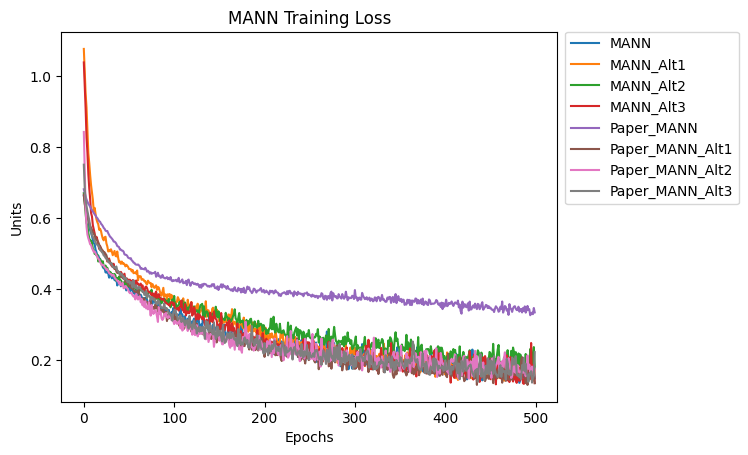

In [161]:
# Plot the training loss over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['loss']))), histories['MANN'].history['loss'], label='MANN')

plt.plot(np.array(range(len(histories['MANN_Alt1'].history['loss']))), histories['MANN_Alt1'].history['loss'], label='MANN_Alt1')

plt.plot(np.array(range(len(histories['MANN_Alt2'].history['loss']))), histories['MANN_Alt2'].history['loss'], label='MANN_Alt2')

plt.plot(np.array(range(len(histories['MANN_Alt3'].history['loss']))), histories['MANN_Alt3'].history['loss'], label='MANN_Alt3')

plt.plot(np.array(range(len(histories['Paper_MANN'].history['loss']))), histories['Paper_MANN'].history['loss'], label='Paper_MANN')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['loss']))), histories['Paper_MANN_Alt1'].history['loss'], label='Paper_MANN_Alt1')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['loss']))), histories['Paper_MANN_Alt2'].history['loss'], label='Paper_MANN_Alt2')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['loss']))), histories['Paper_MANN_Alt3'].history['loss'], label='Paper_MANN_Alt3')

plt.title('MANN Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Units')

plt.legend(bbox_to_anchor=(1.38, 1.02))
plt.show()

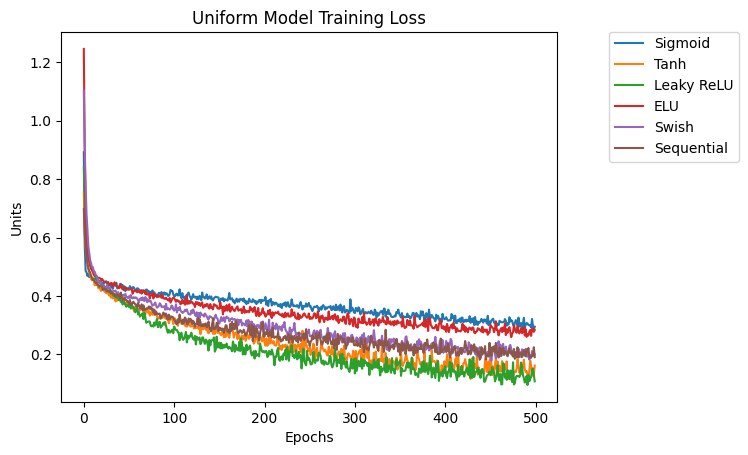

In [162]:
# Plot the training loss over the epochs
plt.plot(np.array(range(len(histories['Sigmoid'].history['loss']))), histories['Sigmoid'].history['loss'], label='Sigmoid')

plt.plot(np.array(range(len(histories['Tanh'].history['loss']))), histories['Tanh'].history['loss'], label='Tanh')

plt.plot(np.array(range(len(histories['LeakyReLU'].history['loss']))), histories['LeakyReLU'].history['loss'], label='Leaky ReLU')

plt.plot(np.array(range(len(histories['ELU'].history['loss']))), histories['ELU'].history['loss'], label='ELU')

plt.plot(np.array(range(len(histories['Swish'].history['loss']))), histories['Swish'].history['loss'], label='Swish')

plt.plot(np.array(range(len(histories['Sequential'].history['loss']))), histories['Sequential'].history['loss'], label='Sequential')

plt.title('Uniform Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Units')

plt.legend(bbox_to_anchor=(1.38, 1.02))
plt.show()

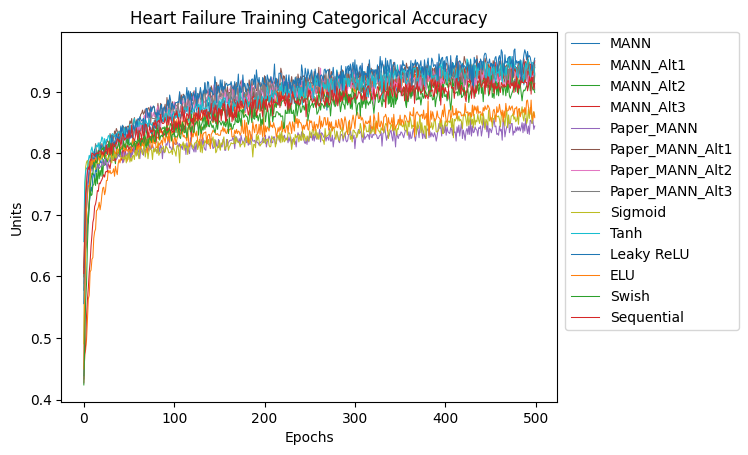

In [178]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['categorical_accuracy']))), histories['MANN'].history['categorical_accuracy'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['categorical_accuracy']))), histories['MANN_Alt1'].history['categorical_accuracy'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['categorical_accuracy']))), histories['MANN_Alt2'].history['categorical_accuracy'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['categorical_accuracy']))), histories['MANN_Alt3'].history['categorical_accuracy'], label='MANN_Alt3', linewidth=0.75)

plt.plot(np.array(range(len(histories['Paper_MANN'].history['categorical_accuracy']))), histories['Paper_MANN'].history['categorical_accuracy'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['categorical_accuracy']))), histories['Paper_MANN_Alt1'].history['categorical_accuracy'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['categorical_accuracy']))), histories['Paper_MANN_Alt2'].history['categorical_accuracy'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['categorical_accuracy']))), histories['Paper_MANN_Alt3'].history['categorical_accuracy'], label='Paper_MANN_Alt3', linewidth=0.75)


plt.plot(np.array(range(len(histories['Sigmoid'].history['categorical_accuracy']))), histories['Sigmoid'].history['categorical_accuracy'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['categorical_accuracy']))), histories['Tanh'].history['categorical_accuracy'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['categorical_accuracy']))), histories['LeakyReLU'].history['categorical_accuracy'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['categorical_accuracy']))), histories['ELU'].history['categorical_accuracy'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['categorical_accuracy']))), histories['Swish'].history['categorical_accuracy'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['categorical_accuracy']))), histories['Sequential'].history['categorical_accuracy'], label='Sequential', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Heart Failure Training Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

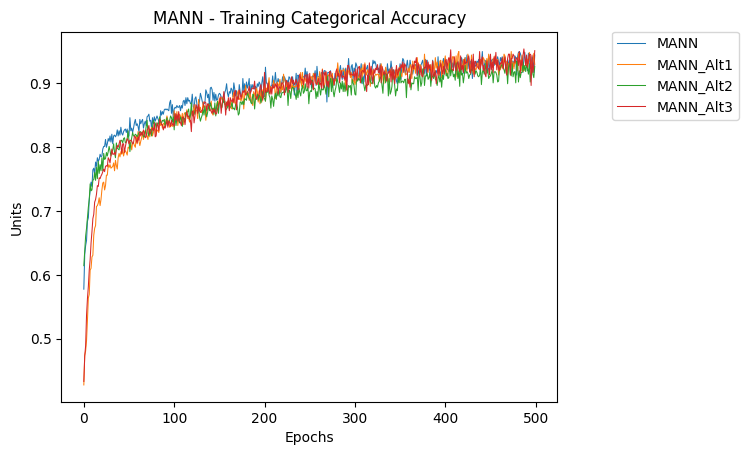

In [164]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['categorical_accuracy']))), histories['MANN'].history['categorical_accuracy'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['categorical_accuracy']))), histories['MANN_Alt1'].history['categorical_accuracy'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['categorical_accuracy']))), histories['MANN_Alt2'].history['categorical_accuracy'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['categorical_accuracy']))), histories['MANN_Alt3'].history['categorical_accuracy'], label='MANN_Alt3', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('MANN - Training Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

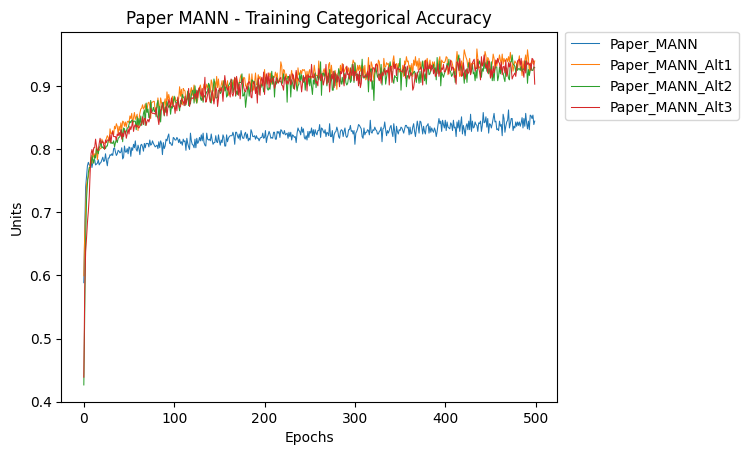

In [165]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['Paper_MANN'].history['categorical_accuracy']))), histories['Paper_MANN'].history['categorical_accuracy'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['categorical_accuracy']))), histories['Paper_MANN_Alt1'].history['categorical_accuracy'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['categorical_accuracy']))), histories['Paper_MANN_Alt2'].history['categorical_accuracy'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['categorical_accuracy']))), histories['Paper_MANN_Alt3'].history['categorical_accuracy'], label='Paper_MANN_Alt3', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Paper MANN - Training Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

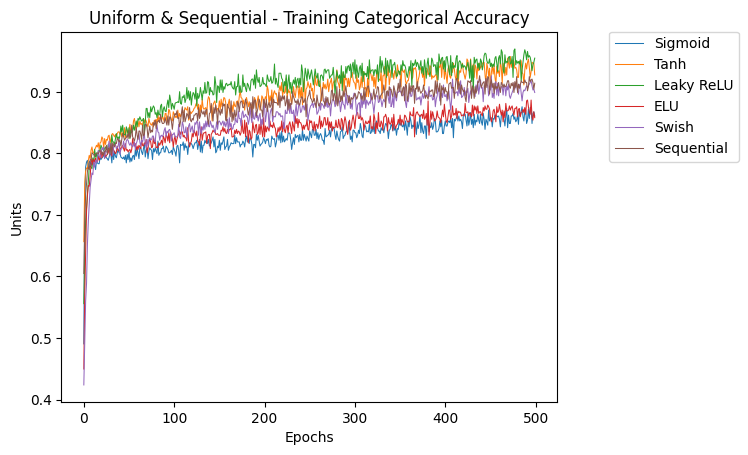

In [166]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['Sigmoid'].history['categorical_accuracy']))), histories['Sigmoid'].history['categorical_accuracy'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['categorical_accuracy']))), histories['Tanh'].history['categorical_accuracy'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['categorical_accuracy']))), histories['LeakyReLU'].history['categorical_accuracy'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['categorical_accuracy']))), histories['ELU'].history['categorical_accuracy'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['categorical_accuracy']))), histories['Swish'].history['categorical_accuracy'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['categorical_accuracy']))), histories['Sequential'].history['categorical_accuracy'], label='Sequential', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Uniform & Sequential - Training Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

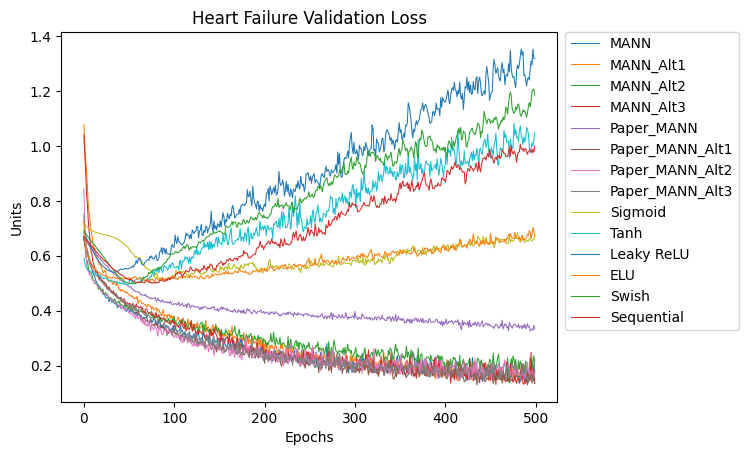

In [179]:
# Plot the validation loss over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['loss']))), histories['MANN'].history['loss'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['loss']))), histories['MANN_Alt1'].history['loss'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['loss']))), histories['MANN_Alt2'].history['loss'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['loss']))), histories['MANN_Alt3'].history['loss'], label='MANN_Alt3', linewidth=0.75)

plt.plot(np.array(range(len(histories['Paper_MANN'].history['loss']))), histories['Paper_MANN'].history['loss'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['loss']))), histories['Paper_MANN_Alt1'].history['loss'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['loss']))), histories['Paper_MANN_Alt2'].history['loss'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['loss']))), histories['Paper_MANN_Alt3'].history['loss'], label='Paper_MANN_Alt3', linewidth=0.75)


plt.plot(np.array(range(len(histories['Sigmoid'].history['loss']))), histories['Sigmoid'].history['val_loss'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['loss']))), histories['Tanh'].history['val_loss'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['loss']))), histories['LeakyReLU'].history['val_loss'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['loss']))), histories['ELU'].history['val_loss'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['loss']))), histories['Swish'].history['val_loss'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['loss']))), histories['Sequential'].history['val_loss'], label='Sequential', linewidth=0.75)

plt.title('Heart Failure Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Units')
#plt.ylim([0,1.5])
plt.legend(bbox_to_anchor=(1.38, 1.02))
plt.show()

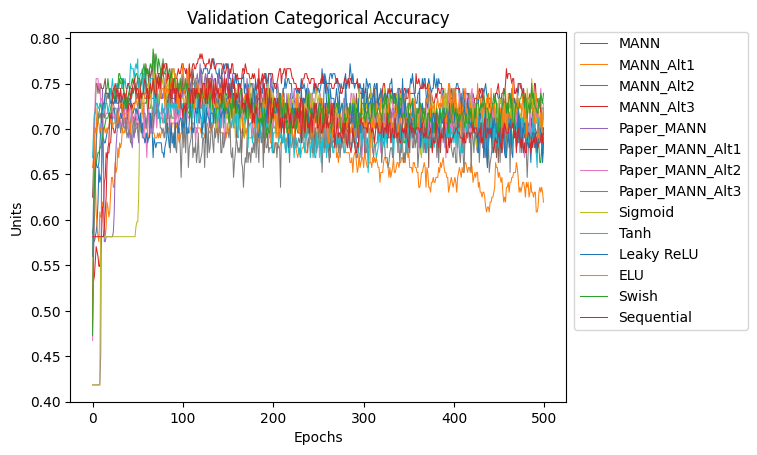

In [180]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['categorical_accuracy']))), histories['MANN'].history['val_categorical_accuracy'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['categorical_accuracy']))), histories['MANN_Alt1'].history['val_categorical_accuracy'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['categorical_accuracy']))), histories['MANN_Alt2'].history['val_categorical_accuracy'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['categorical_accuracy']))), histories['MANN_Alt3'].history['val_categorical_accuracy'], label='MANN_Alt3', linewidth=0.75)

plt.plot(np.array(range(len(histories['Paper_MANN'].history['categorical_accuracy']))), histories['Paper_MANN'].history['val_categorical_accuracy'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['categorical_accuracy']))), histories['Paper_MANN_Alt1'].history['val_categorical_accuracy'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['categorical_accuracy']))), histories['Paper_MANN_Alt2'].history['val_categorical_accuracy'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['categorical_accuracy']))), histories['Paper_MANN_Alt3'].history['val_categorical_accuracy'], label='Paper_MANN_Alt3', linewidth=0.75)


plt.plot(np.array(range(len(histories['Sigmoid'].history['categorical_accuracy']))), histories['Sigmoid'].history['val_categorical_accuracy'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['categorical_accuracy']))), histories['Tanh'].history['val_categorical_accuracy'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['categorical_accuracy']))), histories['LeakyReLU'].history['val_categorical_accuracy'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['categorical_accuracy']))), histories['ELU'].history['val_categorical_accuracy'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['categorical_accuracy']))), histories['Swish'].history['val_categorical_accuracy'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['categorical_accuracy']))), histories['Sequential'].history['val_categorical_accuracy'], label='Sequential', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

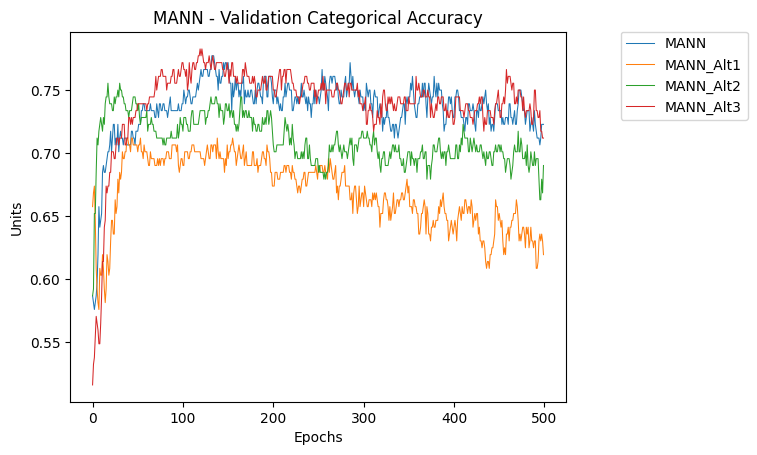

In [169]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['categorical_accuracy']))), histories['MANN'].history['val_categorical_accuracy'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['categorical_accuracy']))), histories['MANN_Alt1'].history['val_categorical_accuracy'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['categorical_accuracy']))), histories['MANN_Alt2'].history['val_categorical_accuracy'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['categorical_accuracy']))), histories['MANN_Alt3'].history['val_categorical_accuracy'], label='MANN_Alt3', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('MANN - Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

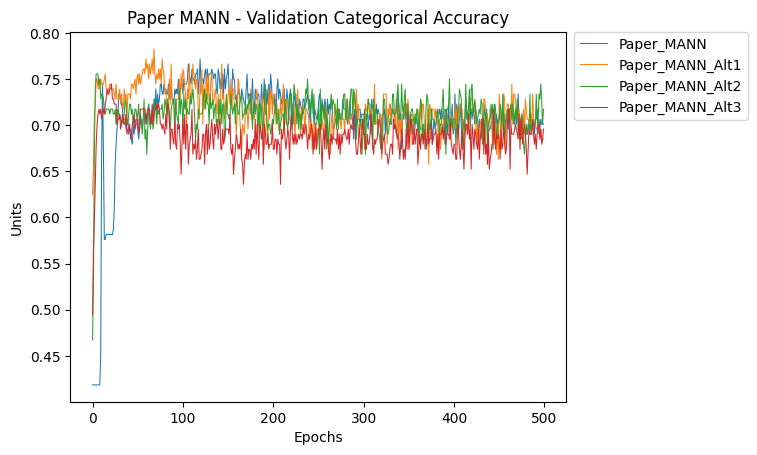

In [170]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['Paper_MANN'].history['categorical_accuracy']))), histories['Paper_MANN'].history['val_categorical_accuracy'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['categorical_accuracy']))), histories['Paper_MANN_Alt1'].history['val_categorical_accuracy'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['categorical_accuracy']))), histories['Paper_MANN_Alt2'].history['val_categorical_accuracy'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['categorical_accuracy']))), histories['Paper_MANN_Alt3'].history['val_categorical_accuracy'], label='Paper_MANN_Alt3', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Paper MANN - Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

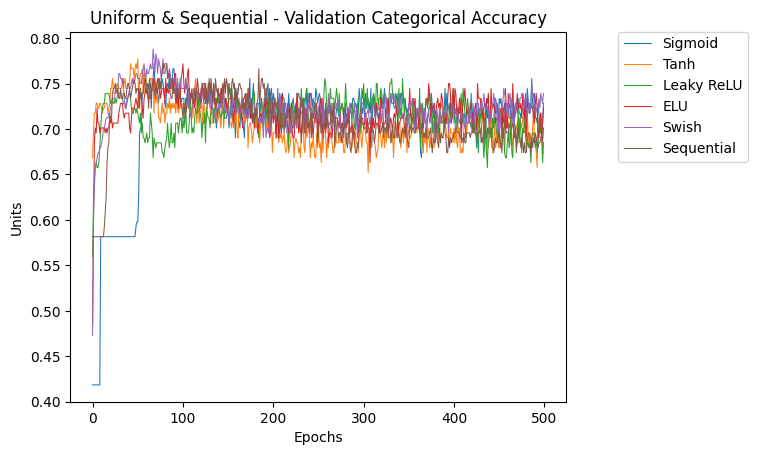

In [171]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['Sigmoid'].history['categorical_accuracy']))), histories['Sigmoid'].history['val_categorical_accuracy'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['categorical_accuracy']))), histories['Tanh'].history['val_categorical_accuracy'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['categorical_accuracy']))), histories['LeakyReLU'].history['val_categorical_accuracy'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['categorical_accuracy']))), histories['ELU'].history['val_categorical_accuracy'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['categorical_accuracy']))), histories['Swish'].history['val_categorical_accuracy'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['categorical_accuracy']))), histories['Sequential'].history['val_categorical_accuracy'], label='Sequential', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Uniform & Sequential - Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

In [172]:
# Save training history
train_hist_df = pd.DataFrame()
val_hist_df = pd.DataFrame()
for name, callback in histories.items():
    train_hist_df = pd.concat((train_hist_df, pd.DataFrame(callback.history['loss'], columns=[name])), axis=1, join='inner', ignore_index=True)
    val_hist_df = pd.concat((val_hist_df, pd.DataFrame(callback.history['val_loss'], columns=[name])), axis=1, join='inner', ignore_index=True)
    
train_hist_df.to_csv('Binary.training_hist.csv')
val_hist_df.to_csv('Binary.validation_hist.csv')

In [173]:
# Get performance metrics for each model
# Get the testing loss for each model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, one_hot.inverse_transform(y_train).ravel())

metric = keras.metrics.CategoricalAccuracy()
metric.update_state(y_test.to_numpy(), one_hot.transform(log_reg.predict(X_test).reshape(-1,1)))
log_reg_loss = metric.result().numpy()

MANN_loss = models['MANN'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
MANN_Alt1_loss = models['MANN_Alt1'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
MANN_Alt2_loss = models['MANN_Alt2'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
MANN_Alt3_loss = models['MANN_Alt3'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

Paper_MANN_loss = models['Paper_MANN'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
Paper_MANN_Alt1_loss = models['Paper_MANN_Alt1'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
Paper_MANN_Alt2_loss = models['Paper_MANN_Alt2'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
Paper_MANN_Alt3_loss = models['Paper_MANN_Alt3'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

Sigmoid_loss = models['Sigmoid'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

Tanh_loss = models['Tanh'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

LeakyReLU_loss = models['LeakyReLU'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

ELU_loss = models['ELU'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

Swish_loss = models['Swish'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

Sequential_loss = models['Sequential'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

6/6 [==============================] - 0s 11ms/step - loss: 0.9990 - categorical_accuracy: 0.7011


In [174]:
# Save metrics to a table and display results
# Save testing loss to table and display results
results = pd.DataFrame([MANN_loss, MANN_Alt1_loss, MANN_Alt2_loss, MANN_Alt3_loss, Paper_MANN_loss, Paper_MANN_Alt1_loss, Paper_MANN_Alt2_loss, Paper_MANN_Alt3_loss,Sigmoid_loss, Tanh_loss, LeakyReLU_loss, ELU_loss, Swish_loss, Sequential_loss],
                      index=['MANN', 'MANN_Alt1', 'MANN_Alt2', 'MANN_Alt3', 'Paper MANN', 'Paper Alternate MANN 1', 'Paper Alternate MANN 2', 'Paper Alternate MANN 3', 'Sigmoid NN', 'Tanh NN', 'Leaky ReLU NN', 'ELU NN', 'Swish NN', 'Sequential NN'],
                      columns=['Categorical Accuracy'])
results.sort_values('Categorical Accuracy', inplace=True, ascending=False)
results.head(20)

Categorical Accuracy
Swish NN                            0.739130
Sigmoid NN                          0.728261
MANN                                0.722826
ELU NN                              0.722826
Paper Alternate MANN 2              0.717391
MANN_Alt3                           0.711957
Paper MANN                          0.701087
Sequential NN                       0.701087
Paper Alternate MANN 3              0.695652
MANN_Alt2                           0.690217
Paper Alternate MANN 1              0.684783
Leaky ReLU NN                       0.684783
Tanh NN                             0.673913
MANN_Alt1                           0.625000

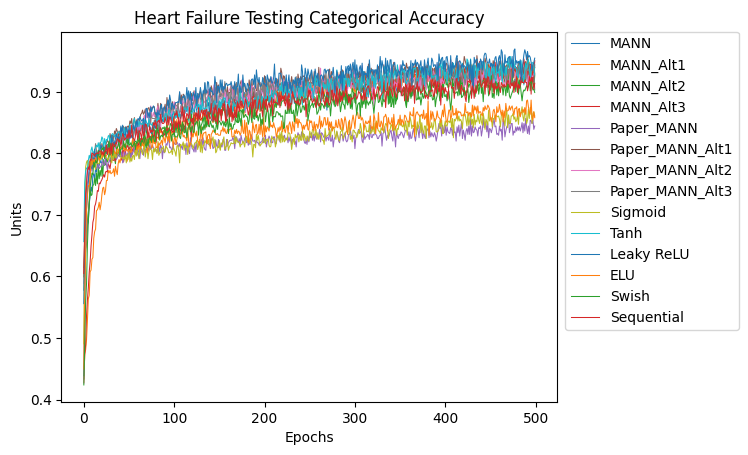

In [181]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['categorical_accuracy']))), histories['MANN'].history['categorical_accuracy'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['categorical_accuracy']))), histories['MANN_Alt1'].history['categorical_accuracy'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['categorical_accuracy']))), histories['MANN_Alt2'].history['categorical_accuracy'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['categorical_accuracy']))), histories['MANN_Alt3'].history['categorical_accuracy'], label='MANN_Alt3', linewidth=0.75)

plt.plot(np.array(range(len(histories['Paper_MANN'].history['categorical_accuracy']))), histories['Paper_MANN'].history['categorical_accuracy'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['categorical_accuracy']))), histories['Paper_MANN_Alt1'].history['categorical_accuracy'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['categorical_accuracy']))), histories['Paper_MANN_Alt2'].history['categorical_accuracy'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['categorical_accuracy']))), histories['Paper_MANN_Alt3'].history['categorical_accuracy'], label='Paper_MANN_Alt3', linewidth=0.75)


plt.plot(np.array(range(len(histories['Sigmoid'].history['categorical_accuracy']))), histories['Sigmoid'].history['categorical_accuracy'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['categorical_accuracy']))), histories['Tanh'].history['categorical_accuracy'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['categorical_accuracy']))), histories['LeakyReLU'].history['categorical_accuracy'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['categorical_accuracy']))), histories['ELU'].history['categorical_accuracy'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['categorical_accuracy']))), histories['Swish'].history['categorical_accuracy'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['categorical_accuracy']))), histories['Sequential'].history['categorical_accuracy'], label='Sequential', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Heart Failure Testing Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

# 

# 

# Pulling Cirrhosis Prediction Dataset data from the csv

In [236]:
# Load the data and split into testing and training for processing
CirrhosisData = pd.read_csv('./Datasets/cirrhosis.csv')

CirrhosisData.describe()

ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   284.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   231.944545   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   249.500000   
50%    209.500000  1730.000000  18628.000000    1.400000   309.500000   
75%    313.750000  2613.500000  21272.500000    3.400000   400.000000   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  310.000000    312.000000  312.000000     282.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   85.613920   2140.388824   56.699525      65.148639   
min      1.960000    4.000000    289.000000   26.350000      33.000000   
25%      3.242500   41.250000    871.500000   80.600000      84.250000   
50%      3.530000   73.000000   1259.000000  114.700000     108.000000   
75%      3.770000  123.000000   1980.000000  151.900000     151.000000   
max      4.640000  588.000000  13862.400000  457.250000     598.000000   

        Platelets  Prothrombin       Stage  
count  407.000000   416.000000  412.000000  
mean   257.024570    10.731731    3.024272  
std     98.325585     1.022000    0.882042  
min     62.000000     9.000000    1.000000  
25%    188.500000    10.000000    2.000000  
50%    251.000000    10.600000    3.000000  
75%    318.000000    11.100000    4.000000  
max    721.000000    18.000000    4.000000

In [237]:
CirrhosisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [238]:
CirrhosisData.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

## Replace nan values with the mean for float type columns 10-19

In [239]:
CirrhosisData["Stage"] = CirrhosisData["Stage"].fillna(0)

In [240]:
CirrhosisData.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              0
dtype: int64

## Assigning features and targets from dataset

In [241]:
CirrhosisData = CirrhosisData.dropna()

In [242]:
features = CirrhosisData.drop(['ID', 'Stage'], axis=1)
features["Age"] = (features["Age"]/365).astype("int64")

target = CirrhosisData['Stage']

In [243]:
features.head()

N_Days Status             Drug  Age Sex Ascites Hepatomegaly Spiders Edema  \
0     400      D  D-penicillamine   58   F       Y            Y       Y     Y   
1    4500      C  D-penicillamine   56   F       N            Y       Y     N   
2    1012      D  D-penicillamine   70   M       N            N       N     S   
3    1925      D  D-penicillamine   54   F       N            Y       Y     S   
4    1504     CL          Placebo   38   F       N            Y       Y     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0       14.5        261.0     2.60   156.0    1718.0  137.95          172.0   
1        1.1        302.0     4.14    54.0    7394.8  113.52           88.0   
2        1.4        176.0     3.48   210.0     516.0   96.10           55.0   
3        1.8        244.0     2.54    64.0    6121.8   60.63           92.0   
4        3.4        279.0     3.53   143.0     671.0  113.15           72.0   

   Platelets  Prothrombin  
0      190.0         12.2  
1      221.0         10.6  
2      151.0         12.0  
3      183.0         10.3  
4      136.0         10.9

In [244]:
target.value_counts()

3.0    111
4.0     94
2.0     59
1.0     12
Name: Stage, dtype: int64

In [245]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Training the models

In [246]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

## Normalizing dataset

In [247]:
# Process and normalize the data
one_hot = OneHotEncoder(sparse_output=False)

# One-Hot encode categorical columns
X_train.append(pd.DataFrame(data=one_hot.fit_transform(X_train[['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']]), columns=one_hot.get_feature_names_out()))
X_test.append(pd.DataFrame(data=one_hot.transform(X_test[['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']]), columns=one_hot.get_feature_names_out()))

# Drop the transformed columns and unneeded columns
X_train.drop(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], axis = 1, inplace=True)
X_test.drop(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], axis=1, inplace=True)



# Normalize numerical columns
scaler = StandardScaler()
X_train[['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']]= scaler.fit_transform(X_train[['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']])
X_test[['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']] = scaler.transform(X_test[['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']])

C:\Users\Jaskirat\AppData\Local\Temp\ipykernel_25644\876908666.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train.append(pd.DataFrame(data=one_hot.fit_transform(X_train[['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']]), columns=one_hot.get_feature_names_out()))
C:\Users\Jaskirat\AppData\Local\Temp\ipykernel_25644\876908666.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test.append(pd.DataFrame(data=one_hot.transform(X_test[['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']]), columns=one_hot.get_feature_names_out()))


In [248]:
# One-Hot encode target labels
y_train = pd.DataFrame(data=one_hot.fit_transform(y_train.to_numpy().reshape(-1,1)), columns=one_hot.categories_)
y_test = pd.DataFrame(data=one_hot.transform(y_test.to_numpy().reshape(-1,1)), columns=one_hot.categories_)

In [249]:
print(one_hot.categories_[0])
print(len(one_hot.categories_[0]))

[1. 2. 3. 4.]
4


In [250]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   (1.0,)  220 non-null    float64
 1   (2.0,)  220 non-null    float64
 2   (3.0,)  220 non-null    float64
 3   (4.0,)  220 non-null    float64
dtypes: float64(4)
memory usage: 7.0 KB


In [251]:
# Create and fit all neural networks for evaluations

models, histories = test(X_train.to_numpy(), y_train.to_numpy(), X_test=X_test.to_numpy(), y_test=y_test.to_numpy(), num_classes=len(one_hot.categories_[0]), task='classification', epochs=500, batch_size=128, task_name='Cirrhosis')

Training Multi Activation Neural Network...
Epoch 1/500
2/2 [==============================] - 2s 347ms/step - loss: 2.2122 - categorical_accuracy: 0.2364 - val_loss: 49.7379 - val_categorical_accuracy: 0.4107
Epoch 2/500
2/2 [==============================] - 0s 131ms/step - loss: 2.1495 - categorical_accuracy: 0.2318 - val_loss: 39.0028 - val_categorical_accuracy: 0.4107
Epoch 3/500
2/2 [==============================] - 0s 152ms/step - loss: 2.1279 - categorical_accuracy: 0.2364 - val_loss: 31.4447 - val_categorical_accuracy: 0.4107
Epoch 4/500
2/2 [==============================] - 0s 149ms/step - loss: 2.1052 - categorical_accuracy: 0.2273 - val_loss: 25.9363 - val_categorical_accuracy: 0.4107
Epoch 5/500
2/2 [==============================] - 0s 131ms/step - loss: 2.0427 - categorical_accuracy: 0.2500 - val_loss: 21.7483 - val_categorical_accuracy: 0.4107
Epoch 6/500
2/2 [==============================] - 0s 150ms/step - loss: 2.0554 - categorical_accuracy: 0.2500 - val_loss: 18.

2/2 [==============================] - 0s 163ms/step - loss: 1.1458 - categorical_accuracy: 0.5091 - val_loss: 2.1448 - val_categorical_accuracy: 0.3214
Epoch 51/500
2/2 [==============================] - 0s 140ms/step - loss: 1.1301 - categorical_accuracy: 0.5000 - val_loss: 2.1309 - val_categorical_accuracy: 0.3214
Epoch 52/500
2/2 [==============================] - 0s 138ms/step - loss: 1.1035 - categorical_accuracy: 0.5136 - val_loss: 2.1156 - val_categorical_accuracy: 0.3036
Epoch 53/500
2/2 [==============================] - 0s 125ms/step - loss: 1.1069 - categorical_accuracy: 0.5182 - val_loss: 2.1033 - val_categorical_accuracy: 0.2857
Epoch 54/500
2/2 [==============================] - 0s 133ms/step - loss: 1.0869 - categorical_accuracy: 0.5182 - val_loss: 2.0888 - val_categorical_accuracy: 0.2857
Epoch 55/500
2/2 [==============================] - 0s 119ms/step - loss: 1.0888 - categorical_accuracy: 0.5409 - val_loss: 2.0753 - val_categorical_accuracy: 0.2857
Epoch 56/500
2/2 

2/2 [==============================] - 0s 133ms/step - loss: 0.8793 - categorical_accuracy: 0.6818 - val_loss: 1.7948 - val_categorical_accuracy: 0.3036
Epoch 100/500
2/2 [==============================] - 0s 135ms/step - loss: 0.8745 - categorical_accuracy: 0.6591 - val_loss: 1.7920 - val_categorical_accuracy: 0.3036
Epoch 101/500
2/2 [==============================] - 0s 72ms/step - loss: 0.8647 - categorical_accuracy: 0.7000 - val_loss: 1.7928 - val_categorical_accuracy: 0.3036
Epoch 102/500
2/2 [==============================] - 0s 66ms/step - loss: 0.8502 - categorical_accuracy: 0.6773 - val_loss: 1.7925 - val_categorical_accuracy: 0.3036
Epoch 103/500
2/2 [==============================] - 0s 126ms/step - loss: 0.8536 - categorical_accuracy: 0.6682 - val_loss: 1.7919 - val_categorical_accuracy: 0.3036
Epoch 104/500
2/2 [==============================] - 0s 111ms/step - loss: 0.8619 - categorical_accuracy: 0.6909 - val_loss: 1.7896 - val_categorical_accuracy: 0.3036
Epoch 105/500


2/2 [==============================] - 0s 111ms/step - loss: 0.7263 - categorical_accuracy: 0.7364 - val_loss: 1.7358 - val_categorical_accuracy: 0.3393
Epoch 149/500
2/2 [==============================] - 0s 111ms/step - loss: 0.7133 - categorical_accuracy: 0.7409 - val_loss: 1.7316 - val_categorical_accuracy: 0.3393
Epoch 150/500
2/2 [==============================] - 0s 126ms/step - loss: 0.7191 - categorical_accuracy: 0.7364 - val_loss: 1.7290 - val_categorical_accuracy: 0.3393
Epoch 151/500
2/2 [==============================] - 0s 123ms/step - loss: 0.7291 - categorical_accuracy: 0.7364 - val_loss: 1.7267 - val_categorical_accuracy: 0.3393
Epoch 152/500
2/2 [==============================] - 0s 113ms/step - loss: 0.6915 - categorical_accuracy: 0.7455 - val_loss: 1.7247 - val_categorical_accuracy: 0.3393
Epoch 153/500
2/2 [==============================] - 0s 111ms/step - loss: 0.7136 - categorical_accuracy: 0.7409 - val_loss: 1.7227 - val_categorical_accuracy: 0.3393
Epoch 154/50

2/2 [==============================] - 0s 119ms/step - loss: 0.5836 - categorical_accuracy: 0.7909 - val_loss: 1.6857 - val_categorical_accuracy: 0.3750
Epoch 198/500
2/2 [==============================] - 0s 62ms/step - loss: 0.5779 - categorical_accuracy: 0.7818 - val_loss: 1.6875 - val_categorical_accuracy: 0.3750
Epoch 199/500
2/2 [==============================] - 0s 58ms/step - loss: 0.5612 - categorical_accuracy: 0.8045 - val_loss: 1.6885 - val_categorical_accuracy: 0.3750
Epoch 200/500
2/2 [==============================] - 0s 60ms/step - loss: 0.5566 - categorical_accuracy: 0.8000 - val_loss: 1.6858 - val_categorical_accuracy: 0.3750
Epoch 201/500
2/2 [==============================] - 0s 59ms/step - loss: 0.5769 - categorical_accuracy: 0.7818 - val_loss: 1.6872 - val_categorical_accuracy: 0.3571
Epoch 202/500
2/2 [==============================] - 0s 64ms/step - loss: 0.5699 - categorical_accuracy: 0.8045 - val_loss: 1.6902 - val_categorical_accuracy: 0.3571
Epoch 203/500
2/2

2/2 [==============================] - 0s 60ms/step - loss: 0.4598 - categorical_accuracy: 0.8273 - val_loss: 1.7823 - val_categorical_accuracy: 0.3750
Epoch 247/500
2/2 [==============================] - 0s 58ms/step - loss: 0.4924 - categorical_accuracy: 0.8182 - val_loss: 1.7720 - val_categorical_accuracy: 0.3750
Epoch 248/500
2/2 [==============================] - 0s 61ms/step - loss: 0.4351 - categorical_accuracy: 0.8500 - val_loss: 1.7762 - val_categorical_accuracy: 0.3750
Epoch 249/500
2/2 [==============================] - 0s 60ms/step - loss: 0.4565 - categorical_accuracy: 0.8227 - val_loss: 1.7782 - val_categorical_accuracy: 0.3750
Epoch 250/500
2/2 [==============================] - 0s 65ms/step - loss: 0.4459 - categorical_accuracy: 0.8455 - val_loss: 1.7791 - val_categorical_accuracy: 0.3750
Epoch 251/500
2/2 [==============================] - 0s 94ms/step - loss: 0.4393 - categorical_accuracy: 0.8364 - val_loss: 1.7792 - val_categorical_accuracy: 0.3750
Epoch 252/500
2/2 

2/2 [==============================] - 0s 62ms/step - loss: 0.3741 - categorical_accuracy: 0.8545 - val_loss: 1.9602 - val_categorical_accuracy: 0.3571
Epoch 296/500
2/2 [==============================] - 0s 58ms/step - loss: 0.3569 - categorical_accuracy: 0.8682 - val_loss: 1.9604 - val_categorical_accuracy: 0.3571
Epoch 297/500
2/2 [==============================] - 0s 59ms/step - loss: 0.3682 - categorical_accuracy: 0.8545 - val_loss: 1.9593 - val_categorical_accuracy: 0.3571
Epoch 298/500
2/2 [==============================] - 0s 59ms/step - loss: 0.3512 - categorical_accuracy: 0.8727 - val_loss: 1.9610 - val_categorical_accuracy: 0.3571
Epoch 299/500
2/2 [==============================] - 0s 58ms/step - loss: 0.3604 - categorical_accuracy: 0.8773 - val_loss: 1.9643 - val_categorical_accuracy: 0.3750
Epoch 300/500
2/2 [==============================] - 0s 65ms/step - loss: 0.3494 - categorical_accuracy: 0.8682 - val_loss: 1.9639 - val_categorical_accuracy: 0.3750
Epoch 301/500
2/2 

2/2 [==============================] - 0s 59ms/step - loss: 0.3166 - categorical_accuracy: 0.8864 - val_loss: 2.1982 - val_categorical_accuracy: 0.3750
Epoch 345/500
2/2 [==============================] - 0s 90ms/step - loss: 0.3304 - categorical_accuracy: 0.8955 - val_loss: 2.1978 - val_categorical_accuracy: 0.3750
Epoch 346/500
2/2 [==============================] - 0s 63ms/step - loss: 0.3105 - categorical_accuracy: 0.8864 - val_loss: 2.1960 - val_categorical_accuracy: 0.3750
Epoch 347/500
2/2 [==============================] - 0s 61ms/step - loss: 0.2761 - categorical_accuracy: 0.8955 - val_loss: 2.2024 - val_categorical_accuracy: 0.3750
Epoch 348/500
2/2 [==============================] - 0s 61ms/step - loss: 0.2951 - categorical_accuracy: 0.8864 - val_loss: 2.2069 - val_categorical_accuracy: 0.3750
Epoch 349/500
2/2 [==============================] - 0s 63ms/step - loss: 0.2959 - categorical_accuracy: 0.8864 - val_loss: 2.2140 - val_categorical_accuracy: 0.3750
Epoch 350/500
2/2 

2/2 [==============================] - 0s 61ms/step - loss: 0.2561 - categorical_accuracy: 0.9000 - val_loss: 2.4578 - val_categorical_accuracy: 0.3393
Epoch 394/500
2/2 [==============================] - 0s 62ms/step - loss: 0.2502 - categorical_accuracy: 0.9136 - val_loss: 2.4678 - val_categorical_accuracy: 0.3393
Epoch 395/500
2/2 [==============================] - 0s 59ms/step - loss: 0.2496 - categorical_accuracy: 0.9000 - val_loss: 2.4753 - val_categorical_accuracy: 0.3393
Epoch 396/500
2/2 [==============================] - 0s 59ms/step - loss: 0.2435 - categorical_accuracy: 0.9182 - val_loss: 2.4764 - val_categorical_accuracy: 0.3393
Epoch 397/500
2/2 [==============================] - 0s 59ms/step - loss: 0.2607 - categorical_accuracy: 0.8955 - val_loss: 2.4818 - val_categorical_accuracy: 0.3393
Epoch 398/500
2/2 [==============================] - 0s 59ms/step - loss: 0.2565 - categorical_accuracy: 0.9000 - val_loss: 2.4932 - val_categorical_accuracy: 0.3393
Epoch 399/500
2/2 

2/2 [==============================] - 0s 85ms/step - loss: 0.2491 - categorical_accuracy: 0.9227 - val_loss: 2.7064 - val_categorical_accuracy: 0.3393
Epoch 443/500
2/2 [==============================] - 0s 63ms/step - loss: 0.2014 - categorical_accuracy: 0.9364 - val_loss: 2.7141 - val_categorical_accuracy: 0.3393
Epoch 444/500
2/2 [==============================] - 0s 66ms/step - loss: 0.1987 - categorical_accuracy: 0.9409 - val_loss: 2.7193 - val_categorical_accuracy: 0.3393
Epoch 445/500
2/2 [==============================] - 0s 60ms/step - loss: 0.2017 - categorical_accuracy: 0.9318 - val_loss: 2.7343 - val_categorical_accuracy: 0.3393
Epoch 446/500
2/2 [==============================] - 0s 63ms/step - loss: 0.1937 - categorical_accuracy: 0.9273 - val_loss: 2.7389 - val_categorical_accuracy: 0.3393
Epoch 447/500
2/2 [==============================] - 0s 62ms/step - loss: 0.2443 - categorical_accuracy: 0.9091 - val_loss: 2.7380 - val_categorical_accuracy: 0.3393
Epoch 448/500
2/2 

2/2 [==============================] - 0s 60ms/step - loss: 0.2099 - categorical_accuracy: 0.9318 - val_loss: 2.9408 - val_categorical_accuracy: 0.3750
Epoch 492/500
2/2 [==============================] - 0s 64ms/step - loss: 0.2030 - categorical_accuracy: 0.9318 - val_loss: 2.9413 - val_categorical_accuracy: 0.3750
Epoch 493/500
2/2 [==============================] - 0s 77ms/step - loss: 0.1942 - categorical_accuracy: 0.9500 - val_loss: 2.9516 - val_categorical_accuracy: 0.3750
Epoch 494/500
2/2 [==============================] - 0s 59ms/step - loss: 0.1778 - categorical_accuracy: 0.9409 - val_loss: 2.9412 - val_categorical_accuracy: 0.3750
Epoch 495/500
2/2 [==============================] - 0s 64ms/step - loss: 0.1676 - categorical_accuracy: 0.9545 - val_loss: 2.9396 - val_categorical_accuracy: 0.3750
Epoch 496/500
2/2 [==============================] - 0s 60ms/step - loss: 0.1630 - categorical_accuracy: 0.9500 - val_loss: 2.9418 - val_categorical_accuracy: 0.3750
Epoch 497/500
2/2 

Epoch 40/500
2/2 [==============================] - 0s 111ms/step - loss: 1.1923 - categorical_accuracy: 0.5045 - val_loss: 1.9206 - val_categorical_accuracy: 0.2679
Epoch 41/500
2/2 [==============================] - 0s 111ms/step - loss: 1.1834 - categorical_accuracy: 0.5227 - val_loss: 1.9021 - val_categorical_accuracy: 0.2857
Epoch 42/500
2/2 [==============================] - 0s 115ms/step - loss: 1.1835 - categorical_accuracy: 0.4955 - val_loss: 1.8876 - val_categorical_accuracy: 0.3036
Epoch 43/500
2/2 [==============================] - 0s 120ms/step - loss: 1.1689 - categorical_accuracy: 0.4909 - val_loss: 1.8754 - val_categorical_accuracy: 0.3036
Epoch 44/500
2/2 [==============================] - 0s 118ms/step - loss: 1.1498 - categorical_accuracy: 0.5182 - val_loss: 1.8631 - val_categorical_accuracy: 0.3036
Epoch 45/500
2/2 [==============================] - 0s 147ms/step - loss: 1.1282 - categorical_accuracy: 0.5227 - val_loss: 1.8511 - val_categorical_accuracy: 0.3036
Epoc

2/2 [==============================] - 0s 58ms/step - loss: 0.9312 - categorical_accuracy: 0.6455 - val_loss: 1.6906 - val_categorical_accuracy: 0.3750
Epoch 90/500
2/2 [==============================] - 0s 74ms/step - loss: 0.9424 - categorical_accuracy: 0.6455 - val_loss: 1.6906 - val_categorical_accuracy: 0.3750
Epoch 91/500
2/2 [==============================] - 0s 93ms/step - loss: 0.9584 - categorical_accuracy: 0.6227 - val_loss: 1.6919 - val_categorical_accuracy: 0.3750
Epoch 92/500
2/2 [==============================] - 0s 137ms/step - loss: 0.9544 - categorical_accuracy: 0.6545 - val_loss: 1.6864 - val_categorical_accuracy: 0.3929
Epoch 93/500
2/2 [==============================] - 0s 104ms/step - loss: 0.9188 - categorical_accuracy: 0.6545 - val_loss: 1.6863 - val_categorical_accuracy: 0.3929
Epoch 94/500
2/2 [==============================] - 0s 127ms/step - loss: 0.9204 - categorical_accuracy: 0.6455 - val_loss: 1.6850 - val_categorical_accuracy: 0.3929
Epoch 95/500
2/2 [==

2/2 [==============================] - 0s 68ms/step - loss: 0.8158 - categorical_accuracy: 0.7000 - val_loss: 1.6879 - val_categorical_accuracy: 0.3929
Epoch 139/500
2/2 [==============================] - 0s 59ms/step - loss: 0.8341 - categorical_accuracy: 0.6727 - val_loss: 1.6920 - val_categorical_accuracy: 0.3750
Epoch 140/500
2/2 [==============================] - 0s 62ms/step - loss: 0.8016 - categorical_accuracy: 0.6955 - val_loss: 1.6952 - val_categorical_accuracy: 0.3750
Epoch 141/500
2/2 [==============================] - 0s 86ms/step - loss: 0.7967 - categorical_accuracy: 0.7045 - val_loss: 1.6987 - val_categorical_accuracy: 0.3750
Epoch 142/500
2/2 [==============================] - 0s 60ms/step - loss: 0.7858 - categorical_accuracy: 0.7136 - val_loss: 1.7017 - val_categorical_accuracy: 0.3571
Epoch 143/500
2/2 [==============================] - 0s 64ms/step - loss: 0.7991 - categorical_accuracy: 0.7091 - val_loss: 1.7078 - val_categorical_accuracy: 0.3571
Epoch 144/500
2/2 

2/2 [==============================] - 0s 67ms/step - loss: 0.7124 - categorical_accuracy: 0.7273 - val_loss: 1.8735 - val_categorical_accuracy: 0.4107
Epoch 188/500
2/2 [==============================] - 0s 86ms/step - loss: 0.7173 - categorical_accuracy: 0.7318 - val_loss: 1.8778 - val_categorical_accuracy: 0.4107
Epoch 189/500
2/2 [==============================] - 0s 64ms/step - loss: 0.7066 - categorical_accuracy: 0.7455 - val_loss: 1.8834 - val_categorical_accuracy: 0.4107
Epoch 190/500
2/2 [==============================] - 0s 62ms/step - loss: 0.6790 - categorical_accuracy: 0.7591 - val_loss: 1.8845 - val_categorical_accuracy: 0.4107
Epoch 191/500
2/2 [==============================] - 0s 62ms/step - loss: 0.6897 - categorical_accuracy: 0.7318 - val_loss: 1.8848 - val_categorical_accuracy: 0.4107
Epoch 192/500
2/2 [==============================] - 0s 86ms/step - loss: 0.6569 - categorical_accuracy: 0.7500 - val_loss: 1.8892 - val_categorical_accuracy: 0.4107
Epoch 193/500
2/2 

2/2 [==============================] - 0s 66ms/step - loss: 0.5557 - categorical_accuracy: 0.8000 - val_loss: 2.0277 - val_categorical_accuracy: 0.4107
Epoch 237/500
2/2 [==============================] - 0s 81ms/step - loss: 0.5668 - categorical_accuracy: 0.7909 - val_loss: 2.0348 - val_categorical_accuracy: 0.3929
Epoch 238/500
2/2 [==============================] - 0s 61ms/step - loss: 0.5568 - categorical_accuracy: 0.7955 - val_loss: 2.0420 - val_categorical_accuracy: 0.3929
Epoch 239/500
2/2 [==============================] - 0s 67ms/step - loss: 0.5855 - categorical_accuracy: 0.7864 - val_loss: 2.0510 - val_categorical_accuracy: 0.3929
Epoch 240/500
2/2 [==============================] - 0s 59ms/step - loss: 0.5711 - categorical_accuracy: 0.7864 - val_loss: 2.0602 - val_categorical_accuracy: 0.3929
Epoch 241/500
2/2 [==============================] - 0s 61ms/step - loss: 0.5833 - categorical_accuracy: 0.7591 - val_loss: 2.0636 - val_categorical_accuracy: 0.3929
Epoch 242/500
2/2 

2/2 [==============================] - 0s 93ms/step - loss: 0.4746 - categorical_accuracy: 0.8364 - val_loss: 2.2693 - val_categorical_accuracy: 0.3929
Epoch 286/500
2/2 [==============================] - 0s 101ms/step - loss: 0.4848 - categorical_accuracy: 0.8136 - val_loss: 2.2780 - val_categorical_accuracy: 0.3929
Epoch 287/500
2/2 [==============================] - 0s 102ms/step - loss: 0.4725 - categorical_accuracy: 0.8409 - val_loss: 2.2744 - val_categorical_accuracy: 0.3929
Epoch 288/500
2/2 [==============================] - 0s 105ms/step - loss: 0.4630 - categorical_accuracy: 0.8364 - val_loss: 2.2811 - val_categorical_accuracy: 0.3929
Epoch 289/500
2/2 [==============================] - 0s 107ms/step - loss: 0.4444 - categorical_accuracy: 0.8545 - val_loss: 2.2787 - val_categorical_accuracy: 0.4107
Epoch 290/500
2/2 [==============================] - 0s 102ms/step - loss: 0.5099 - categorical_accuracy: 0.8136 - val_loss: 2.2802 - val_categorical_accuracy: 0.3929
Epoch 291/500

2/2 [==============================] - 0s 57ms/step - loss: 0.3752 - categorical_accuracy: 0.8682 - val_loss: 2.4772 - val_categorical_accuracy: 0.3571
Epoch 335/500
2/2 [==============================] - 0s 60ms/step - loss: 0.3955 - categorical_accuracy: 0.8545 - val_loss: 2.4885 - val_categorical_accuracy: 0.3571
Epoch 336/500
2/2 [==============================] - 0s 58ms/step - loss: 0.3558 - categorical_accuracy: 0.8818 - val_loss: 2.4934 - val_categorical_accuracy: 0.3571
Epoch 337/500
2/2 [==============================] - 0s 59ms/step - loss: 0.3659 - categorical_accuracy: 0.8727 - val_loss: 2.4968 - val_categorical_accuracy: 0.3393
Epoch 338/500
2/2 [==============================] - 0s 59ms/step - loss: 0.4476 - categorical_accuracy: 0.8455 - val_loss: 2.5029 - val_categorical_accuracy: 0.3571
Epoch 339/500
2/2 [==============================] - 0s 59ms/step - loss: 0.3848 - categorical_accuracy: 0.8636 - val_loss: 2.5145 - val_categorical_accuracy: 0.3750
Epoch 340/500
2/2 

2/2 [==============================] - 0s 59ms/step - loss: 0.3411 - categorical_accuracy: 0.8909 - val_loss: 2.7017 - val_categorical_accuracy: 0.3393
Epoch 384/500
2/2 [==============================] - 0s 58ms/step - loss: 0.3333 - categorical_accuracy: 0.8909 - val_loss: 2.6949 - val_categorical_accuracy: 0.3393
Epoch 385/500
2/2 [==============================] - 0s 61ms/step - loss: 0.3067 - categorical_accuracy: 0.8909 - val_loss: 2.6890 - val_categorical_accuracy: 0.3393
Epoch 386/500
2/2 [==============================] - 0s 59ms/step - loss: 0.3347 - categorical_accuracy: 0.8682 - val_loss: 2.6955 - val_categorical_accuracy: 0.3393
Epoch 387/500
2/2 [==============================] - 0s 59ms/step - loss: 0.3491 - categorical_accuracy: 0.8682 - val_loss: 2.6948 - val_categorical_accuracy: 0.3393
Epoch 388/500
2/2 [==============================] - 0s 64ms/step - loss: 0.3282 - categorical_accuracy: 0.8955 - val_loss: 2.6929 - val_categorical_accuracy: 0.3393
Epoch 389/500
2/2 

2/2 [==============================] - 0s 59ms/step - loss: 0.2544 - categorical_accuracy: 0.9091 - val_loss: 2.9256 - val_categorical_accuracy: 0.3571
Epoch 433/500
2/2 [==============================] - 0s 58ms/step - loss: 0.2668 - categorical_accuracy: 0.8955 - val_loss: 2.9259 - val_categorical_accuracy: 0.3571
Epoch 434/500
2/2 [==============================] - 0s 61ms/step - loss: 0.2787 - categorical_accuracy: 0.8955 - val_loss: 2.9343 - val_categorical_accuracy: 0.3571
Epoch 435/500
2/2 [==============================] - 0s 61ms/step - loss: 0.2701 - categorical_accuracy: 0.9045 - val_loss: 2.9379 - val_categorical_accuracy: 0.3571
Epoch 436/500
2/2 [==============================] - 0s 62ms/step - loss: 0.2539 - categorical_accuracy: 0.9091 - val_loss: 2.9485 - val_categorical_accuracy: 0.3571
Epoch 437/500
2/2 [==============================] - 0s 61ms/step - loss: 0.2470 - categorical_accuracy: 0.9227 - val_loss: 2.9541 - val_categorical_accuracy: 0.3571
Epoch 438/500
2/2 

2/2 [==============================] - 0s 60ms/step - loss: 0.2399 - categorical_accuracy: 0.9045 - val_loss: 3.1337 - val_categorical_accuracy: 0.3393
Epoch 482/500
2/2 [==============================] - 0s 89ms/step - loss: 0.2061 - categorical_accuracy: 0.9273 - val_loss: 3.1282 - val_categorical_accuracy: 0.3393
Epoch 483/500
2/2 [==============================] - 0s 62ms/step - loss: 0.2172 - categorical_accuracy: 0.9091 - val_loss: 3.1449 - val_categorical_accuracy: 0.3393
Epoch 484/500
2/2 [==============================] - 0s 65ms/step - loss: 0.3727 - categorical_accuracy: 0.8591 - val_loss: 3.1300 - val_categorical_accuracy: 0.3393
Epoch 485/500
2/2 [==============================] - 0s 59ms/step - loss: 0.2527 - categorical_accuracy: 0.8955 - val_loss: 3.1268 - val_categorical_accuracy: 0.3393
Epoch 486/500
2/2 [==============================] - 0s 60ms/step - loss: 0.2083 - categorical_accuracy: 0.9136 - val_loss: 3.1311 - val_categorical_accuracy: 0.3393
Epoch 487/500
2/2 

Epoch 30/500
2/2 [==============================] - 0s 125ms/step - loss: 1.2657 - categorical_accuracy: 0.4591 - val_loss: 2.6764 - val_categorical_accuracy: 0.3214
Epoch 31/500
2/2 [==============================] - 0s 134ms/step - loss: 1.2582 - categorical_accuracy: 0.4773 - val_loss: 2.5890 - val_categorical_accuracy: 0.3214
Epoch 32/500
2/2 [==============================] - 0s 118ms/step - loss: 1.2589 - categorical_accuracy: 0.4455 - val_loss: 2.5159 - val_categorical_accuracy: 0.3214
Epoch 33/500
2/2 [==============================] - 0s 152ms/step - loss: 1.2465 - categorical_accuracy: 0.4682 - val_loss: 2.4438 - val_categorical_accuracy: 0.3036
Epoch 34/500
2/2 [==============================] - 0s 127ms/step - loss: 1.2297 - categorical_accuracy: 0.4500 - val_loss: 2.3798 - val_categorical_accuracy: 0.3036
Epoch 35/500
2/2 [==============================] - 0s 122ms/step - loss: 1.2457 - categorical_accuracy: 0.4727 - val_loss: 2.3259 - val_categorical_accuracy: 0.3036
Epoc

2/2 [==============================] - 0s 128ms/step - loss: 1.0412 - categorical_accuracy: 0.6091 - val_loss: 1.5673 - val_categorical_accuracy: 0.2857
Epoch 80/500
2/2 [==============================] - 0s 117ms/step - loss: 1.0346 - categorical_accuracy: 0.6045 - val_loss: 1.5605 - val_categorical_accuracy: 0.2857
Epoch 81/500
2/2 [==============================] - 0s 121ms/step - loss: 1.0097 - categorical_accuracy: 0.6227 - val_loss: 1.5556 - val_categorical_accuracy: 0.3036
Epoch 82/500
2/2 [==============================] - 0s 133ms/step - loss: 1.0080 - categorical_accuracy: 0.6455 - val_loss: 1.5511 - val_categorical_accuracy: 0.3036
Epoch 83/500
2/2 [==============================] - 0s 134ms/step - loss: 1.0100 - categorical_accuracy: 0.6409 - val_loss: 1.5477 - val_categorical_accuracy: 0.3036
Epoch 84/500
2/2 [==============================] - 0s 143ms/step - loss: 0.9884 - categorical_accuracy: 0.6136 - val_loss: 1.5447 - val_categorical_accuracy: 0.3036
Epoch 85/500
2/2 

2/2 [==============================] - 0s 83ms/step - loss: 0.8565 - categorical_accuracy: 0.7136 - val_loss: 1.5321 - val_categorical_accuracy: 0.3750
Epoch 129/500
2/2 [==============================] - 0s 62ms/step - loss: 0.8358 - categorical_accuracy: 0.7136 - val_loss: 1.5346 - val_categorical_accuracy: 0.3750
Epoch 130/500
2/2 [==============================] - 0s 61ms/step - loss: 0.8409 - categorical_accuracy: 0.7182 - val_loss: 1.5389 - val_categorical_accuracy: 0.3571
Epoch 131/500
2/2 [==============================] - 0s 88ms/step - loss: 0.8591 - categorical_accuracy: 0.7045 - val_loss: 1.5420 - val_categorical_accuracy: 0.3571
Epoch 132/500
2/2 [==============================] - 0s 60ms/step - loss: 0.8255 - categorical_accuracy: 0.7091 - val_loss: 1.5455 - val_categorical_accuracy: 0.3571
Epoch 133/500
2/2 [==============================] - 0s 60ms/step - loss: 0.8625 - categorical_accuracy: 0.6864 - val_loss: 1.5507 - val_categorical_accuracy: 0.3571
Epoch 134/500
2/2 

2/2 [==============================] - 0s 63ms/step - loss: 0.7204 - categorical_accuracy: 0.7227 - val_loss: 1.6661 - val_categorical_accuracy: 0.3750
Epoch 178/500
2/2 [==============================] - 0s 59ms/step - loss: 0.6969 - categorical_accuracy: 0.7636 - val_loss: 1.6695 - val_categorical_accuracy: 0.3750
Epoch 179/500
2/2 [==============================] - 0s 63ms/step - loss: 0.6861 - categorical_accuracy: 0.7591 - val_loss: 1.6711 - val_categorical_accuracy: 0.3750
Epoch 180/500
2/2 [==============================] - 0s 86ms/step - loss: 0.7201 - categorical_accuracy: 0.7455 - val_loss: 1.6733 - val_categorical_accuracy: 0.3750
Epoch 181/500
2/2 [==============================] - 0s 58ms/step - loss: 0.6893 - categorical_accuracy: 0.7773 - val_loss: 1.6771 - val_categorical_accuracy: 0.3750
Epoch 182/500
2/2 [==============================] - 0s 61ms/step - loss: 0.7262 - categorical_accuracy: 0.7182 - val_loss: 1.6770 - val_categorical_accuracy: 0.3750
Epoch 183/500
2/2 

2/2 [==============================] - 0s 59ms/step - loss: 0.6214 - categorical_accuracy: 0.7955 - val_loss: 1.8287 - val_categorical_accuracy: 0.3750
Epoch 227/500
2/2 [==============================] - 0s 78ms/step - loss: 0.5643 - categorical_accuracy: 0.8318 - val_loss: 1.8404 - val_categorical_accuracy: 0.3750
Epoch 228/500
2/2 [==============================] - 0s 59ms/step - loss: 0.5721 - categorical_accuracy: 0.8136 - val_loss: 1.8432 - val_categorical_accuracy: 0.3750
Epoch 229/500
2/2 [==============================] - 0s 61ms/step - loss: 0.5933 - categorical_accuracy: 0.7864 - val_loss: 1.8513 - val_categorical_accuracy: 0.3571
Epoch 230/500
2/2 [==============================] - 0s 57ms/step - loss: 0.5689 - categorical_accuracy: 0.8045 - val_loss: 1.8541 - val_categorical_accuracy: 0.3393
Epoch 231/500
2/2 [==============================] - 0s 60ms/step - loss: 0.5398 - categorical_accuracy: 0.8182 - val_loss: 1.8645 - val_categorical_accuracy: 0.3393
Epoch 232/500
2/2 

2/2 [==============================] - 0s 63ms/step - loss: 0.5257 - categorical_accuracy: 0.8227 - val_loss: 2.0559 - val_categorical_accuracy: 0.3393
Epoch 276/500
2/2 [==============================] - 0s 84ms/step - loss: 0.4913 - categorical_accuracy: 0.8273 - val_loss: 2.0554 - val_categorical_accuracy: 0.3393
Epoch 277/500
2/2 [==============================] - 0s 61ms/step - loss: 0.5189 - categorical_accuracy: 0.8182 - val_loss: 2.0588 - val_categorical_accuracy: 0.3393
Epoch 278/500
2/2 [==============================] - 0s 58ms/step - loss: 0.5583 - categorical_accuracy: 0.8000 - val_loss: 2.0622 - val_categorical_accuracy: 0.3214
Epoch 279/500
2/2 [==============================] - 0s 72ms/step - loss: 0.4869 - categorical_accuracy: 0.8273 - val_loss: 2.0701 - val_categorical_accuracy: 0.3393
Epoch 280/500
2/2 [==============================] - 0s 61ms/step - loss: 0.5422 - categorical_accuracy: 0.8227 - val_loss: 2.0720 - val_categorical_accuracy: 0.3214
Epoch 281/500
2/2 

2/2 [==============================] - 0s 58ms/step - loss: 0.4104 - categorical_accuracy: 0.8636 - val_loss: 2.2023 - val_categorical_accuracy: 0.3571
Epoch 325/500
2/2 [==============================] - 0s 60ms/step - loss: 0.4505 - categorical_accuracy: 0.8545 - val_loss: 2.2152 - val_categorical_accuracy: 0.3571
Epoch 326/500
2/2 [==============================] - 0s 60ms/step - loss: 0.4601 - categorical_accuracy: 0.8455 - val_loss: 2.2143 - val_categorical_accuracy: 0.3750
Epoch 327/500
2/2 [==============================] - 0s 87ms/step - loss: 0.4343 - categorical_accuracy: 0.8545 - val_loss: 2.2257 - val_categorical_accuracy: 0.3571
Epoch 328/500
2/2 [==============================] - 0s 59ms/step - loss: 0.4892 - categorical_accuracy: 0.8318 - val_loss: 2.2311 - val_categorical_accuracy: 0.3571
Epoch 329/500
2/2 [==============================] - 0s 60ms/step - loss: 0.4650 - categorical_accuracy: 0.8364 - val_loss: 2.2380 - val_categorical_accuracy: 0.3571
Epoch 330/500
2/2 

2/2 [==============================] - 0s 62ms/step - loss: 0.3748 - categorical_accuracy: 0.8773 - val_loss: 2.4026 - val_categorical_accuracy: 0.3750
Epoch 374/500
2/2 [==============================] - 0s 61ms/step - loss: 0.3801 - categorical_accuracy: 0.8727 - val_loss: 2.4143 - val_categorical_accuracy: 0.3750
Epoch 375/500
2/2 [==============================] - 0s 64ms/step - loss: 0.3905 - categorical_accuracy: 0.8636 - val_loss: 2.4219 - val_categorical_accuracy: 0.3750
Epoch 376/500
2/2 [==============================] - 0s 60ms/step - loss: 0.3836 - categorical_accuracy: 0.8727 - val_loss: 2.4196 - val_categorical_accuracy: 0.3750
Epoch 377/500
2/2 [==============================] - 0s 62ms/step - loss: 0.4099 - categorical_accuracy: 0.8591 - val_loss: 2.4237 - val_categorical_accuracy: 0.3750
Epoch 378/500
2/2 [==============================] - 0s 61ms/step - loss: 0.3638 - categorical_accuracy: 0.8682 - val_loss: 2.4257 - val_categorical_accuracy: 0.3750
Epoch 379/500
2/2 

2/2 [==============================] - 0s 64ms/step - loss: 0.3222 - categorical_accuracy: 0.8773 - val_loss: 2.5889 - val_categorical_accuracy: 0.3750
Epoch 423/500
2/2 [==============================] - 0s 66ms/step - loss: 0.3153 - categorical_accuracy: 0.8864 - val_loss: 2.6039 - val_categorical_accuracy: 0.3750
Epoch 424/500
2/2 [==============================] - 0s 83ms/step - loss: 0.3558 - categorical_accuracy: 0.8636 - val_loss: 2.6212 - val_categorical_accuracy: 0.3750
Epoch 425/500
2/2 [==============================] - 0s 63ms/step - loss: 0.3505 - categorical_accuracy: 0.8636 - val_loss: 2.6361 - val_categorical_accuracy: 0.3750
Epoch 426/500
2/2 [==============================] - 0s 70ms/step - loss: 0.3008 - categorical_accuracy: 0.8909 - val_loss: 2.6416 - val_categorical_accuracy: 0.3571
Epoch 427/500
2/2 [==============================] - 0s 65ms/step - loss: 0.3067 - categorical_accuracy: 0.8955 - val_loss: 2.6380 - val_categorical_accuracy: 0.3750
Epoch 428/500
2/2 

2/2 [==============================] - 0s 70ms/step - loss: 0.3352 - categorical_accuracy: 0.8773 - val_loss: 2.9483 - val_categorical_accuracy: 0.3393
Epoch 472/500
2/2 [==============================] - 0s 52ms/step - loss: 0.3279 - categorical_accuracy: 0.8773 - val_loss: 2.9264 - val_categorical_accuracy: 0.3393
Epoch 473/500
2/2 [==============================] - 0s 64ms/step - loss: 0.2770 - categorical_accuracy: 0.9091 - val_loss: 2.9221 - val_categorical_accuracy: 0.3393
Epoch 474/500
2/2 [==============================] - 0s 85ms/step - loss: 0.2789 - categorical_accuracy: 0.9045 - val_loss: 2.9334 - val_categorical_accuracy: 0.3393
Epoch 475/500
2/2 [==============================] - 0s 105ms/step - loss: 0.3066 - categorical_accuracy: 0.8909 - val_loss: 2.9448 - val_categorical_accuracy: 0.3393
Epoch 476/500
2/2 [==============================] - 0s 84ms/step - loss: 0.3287 - categorical_accuracy: 0.8955 - val_loss: 3.0144 - val_categorical_accuracy: 0.3393
Epoch 477/500
2/2

Epoch 20/500
2/2 [==============================] - 0s 122ms/step - loss: 1.4332 - categorical_accuracy: 0.2955 - val_loss: 13.7902 - val_categorical_accuracy: 0.0179
Epoch 21/500
2/2 [==============================] - 0s 116ms/step - loss: 1.4047 - categorical_accuracy: 0.2818 - val_loss: 12.7870 - val_categorical_accuracy: 0.0357
Epoch 22/500
2/2 [==============================] - 0s 117ms/step - loss: 1.4229 - categorical_accuracy: 0.2773 - val_loss: 11.9249 - val_categorical_accuracy: 0.0357
Epoch 23/500
2/2 [==============================] - 0s 111ms/step - loss: 1.4165 - categorical_accuracy: 0.2682 - val_loss: 11.1477 - val_categorical_accuracy: 0.0357
Epoch 24/500
2/2 [==============================] - 0s 118ms/step - loss: 1.3829 - categorical_accuracy: 0.2818 - val_loss: 10.4241 - val_categorical_accuracy: 0.0357
Epoch 25/500
2/2 [==============================] - 0s 124ms/step - loss: 1.3695 - categorical_accuracy: 0.2955 - val_loss: 9.7741 - val_categorical_accuracy: 0.0357

2/2 [==============================] - 0s 123ms/step - loss: 1.0767 - categorical_accuracy: 0.5182 - val_loss: 2.1811 - val_categorical_accuracy: 0.2857
Epoch 70/500
2/2 [==============================] - 0s 145ms/step - loss: 1.0899 - categorical_accuracy: 0.4955 - val_loss: 2.1466 - val_categorical_accuracy: 0.2857
Epoch 71/500
2/2 [==============================] - 0s 138ms/step - loss: 1.0859 - categorical_accuracy: 0.4818 - val_loss: 2.1130 - val_categorical_accuracy: 0.2857
Epoch 72/500
2/2 [==============================] - 0s 129ms/step - loss: 1.0800 - categorical_accuracy: 0.5273 - val_loss: 2.0803 - val_categorical_accuracy: 0.2857
Epoch 73/500
2/2 [==============================] - 0s 124ms/step - loss: 1.0486 - categorical_accuracy: 0.5364 - val_loss: 2.0489 - val_categorical_accuracy: 0.2679
Epoch 74/500
2/2 [==============================] - 0s 128ms/step - loss: 1.0439 - categorical_accuracy: 0.5545 - val_loss: 2.0227 - val_categorical_accuracy: 0.2679
Epoch 75/500
2/2 

2/2 [==============================] - 0s 55ms/step - loss: 0.9127 - categorical_accuracy: 0.6364 - val_loss: 1.5731 - val_categorical_accuracy: 0.3036
Epoch 119/500
2/2 [==============================] - 0s 61ms/step - loss: 0.9142 - categorical_accuracy: 0.6455 - val_loss: 1.5750 - val_categorical_accuracy: 0.3036
Epoch 120/500
2/2 [==============================] - 0s 123ms/step - loss: 0.9175 - categorical_accuracy: 0.6364 - val_loss: 1.5697 - val_categorical_accuracy: 0.3036
Epoch 121/500
2/2 [==============================] - 0s 54ms/step - loss: 0.9175 - categorical_accuracy: 0.6409 - val_loss: 1.5712 - val_categorical_accuracy: 0.3036
Epoch 122/500
2/2 [==============================] - 0s 109ms/step - loss: 0.9132 - categorical_accuracy: 0.6318 - val_loss: 1.5660 - val_categorical_accuracy: 0.3036
Epoch 123/500
2/2 [==============================] - 0s 65ms/step - loss: 0.9074 - categorical_accuracy: 0.6318 - val_loss: 1.5661 - val_categorical_accuracy: 0.3036
Epoch 124/500
2/

2/2 [==============================] - 0s 53ms/step - loss: 0.7834 - categorical_accuracy: 0.6773 - val_loss: 1.5895 - val_categorical_accuracy: 0.4107
Epoch 168/500
2/2 [==============================] - 0s 63ms/step - loss: 0.7920 - categorical_accuracy: 0.6909 - val_loss: 1.5921 - val_categorical_accuracy: 0.4107
Epoch 169/500
2/2 [==============================] - 0s 99ms/step - loss: 0.7876 - categorical_accuracy: 0.6818 - val_loss: 1.5883 - val_categorical_accuracy: 0.4107
Epoch 170/500
2/2 [==============================] - 0s 87ms/step - loss: 0.7883 - categorical_accuracy: 0.6818 - val_loss: 1.5931 - val_categorical_accuracy: 0.3750
Epoch 171/500
2/2 [==============================] - 0s 82ms/step - loss: 0.7910 - categorical_accuracy: 0.6818 - val_loss: 1.6002 - val_categorical_accuracy: 0.3750
Epoch 172/500
2/2 [==============================] - 0s 68ms/step - loss: 0.7645 - categorical_accuracy: 0.6909 - val_loss: 1.6017 - val_categorical_accuracy: 0.3750
Epoch 173/500
2/2 

2/2 [==============================] - 0s 48ms/step - loss: 0.6597 - categorical_accuracy: 0.7409 - val_loss: 1.7197 - val_categorical_accuracy: 0.4107
Epoch 217/500
2/2 [==============================] - 0s 53ms/step - loss: 0.6585 - categorical_accuracy: 0.7364 - val_loss: 1.7223 - val_categorical_accuracy: 0.4107
Epoch 218/500
2/2 [==============================] - 0s 50ms/step - loss: 0.6605 - categorical_accuracy: 0.7227 - val_loss: 1.7165 - val_categorical_accuracy: 0.4107
Epoch 219/500
2/2 [==============================] - 0s 51ms/step - loss: 0.6640 - categorical_accuracy: 0.7364 - val_loss: 1.7228 - val_categorical_accuracy: 0.4107
Epoch 220/500
2/2 [==============================] - 0s 74ms/step - loss: 0.6803 - categorical_accuracy: 0.7273 - val_loss: 1.7363 - val_categorical_accuracy: 0.4107
Epoch 221/500
2/2 [==============================] - 0s 55ms/step - loss: 0.7006 - categorical_accuracy: 0.6909 - val_loss: 1.7396 - val_categorical_accuracy: 0.4107
Epoch 222/500
2/2 

2/2 [==============================] - 0s 60ms/step - loss: 0.5971 - categorical_accuracy: 0.7545 - val_loss: 1.8957 - val_categorical_accuracy: 0.4286
Epoch 266/500
2/2 [==============================] - 0s 58ms/step - loss: 0.5332 - categorical_accuracy: 0.8136 - val_loss: 1.9030 - val_categorical_accuracy: 0.4286
Epoch 267/500
2/2 [==============================] - 0s 56ms/step - loss: 0.5143 - categorical_accuracy: 0.8000 - val_loss: 1.8985 - val_categorical_accuracy: 0.4286
Epoch 268/500
2/2 [==============================] - 0s 60ms/step - loss: 0.5682 - categorical_accuracy: 0.7545 - val_loss: 1.8771 - val_categorical_accuracy: 0.4464
Epoch 269/500
2/2 [==============================] - 0s 66ms/step - loss: 0.5109 - categorical_accuracy: 0.7955 - val_loss: 1.8709 - val_categorical_accuracy: 0.4464
Epoch 270/500
2/2 [==============================] - 0s 68ms/step - loss: 0.5389 - categorical_accuracy: 0.7818 - val_loss: 1.8627 - val_categorical_accuracy: 0.4464
Epoch 271/500
2/2 

2/2 [==============================] - 0s 61ms/step - loss: 0.4369 - categorical_accuracy: 0.8500 - val_loss: 2.0542 - val_categorical_accuracy: 0.4107
Epoch 315/500
2/2 [==============================] - 0s 68ms/step - loss: 0.4387 - categorical_accuracy: 0.8500 - val_loss: 2.0546 - val_categorical_accuracy: 0.4107
Epoch 316/500
2/2 [==============================] - 0s 60ms/step - loss: 0.4300 - categorical_accuracy: 0.8591 - val_loss: 2.0646 - val_categorical_accuracy: 0.4107
Epoch 317/500
2/2 [==============================] - 0s 61ms/step - loss: 0.4162 - categorical_accuracy: 0.8591 - val_loss: 2.0707 - val_categorical_accuracy: 0.4107
Epoch 318/500
2/2 [==============================] - 0s 61ms/step - loss: 0.4454 - categorical_accuracy: 0.8500 - val_loss: 2.0808 - val_categorical_accuracy: 0.4286
Epoch 319/500
2/2 [==============================] - 0s 62ms/step - loss: 0.4181 - categorical_accuracy: 0.8636 - val_loss: 2.0741 - val_categorical_accuracy: 0.4286
Epoch 320/500
2/2 

2/2 [==============================] - 0s 58ms/step - loss: 0.3776 - categorical_accuracy: 0.8636 - val_loss: 2.1763 - val_categorical_accuracy: 0.4107
Epoch 364/500
2/2 [==============================] - 0s 62ms/step - loss: 0.3794 - categorical_accuracy: 0.8500 - val_loss: 2.1636 - val_categorical_accuracy: 0.4107
Epoch 365/500
2/2 [==============================] - 0s 60ms/step - loss: 0.3824 - categorical_accuracy: 0.8500 - val_loss: 2.1538 - val_categorical_accuracy: 0.4107
Epoch 366/500
2/2 [==============================] - 0s 60ms/step - loss: 0.3623 - categorical_accuracy: 0.8636 - val_loss: 2.1502 - val_categorical_accuracy: 0.4286
Epoch 367/500
2/2 [==============================] - 0s 64ms/step - loss: 0.3591 - categorical_accuracy: 0.8727 - val_loss: 2.1468 - val_categorical_accuracy: 0.4286
Epoch 368/500
2/2 [==============================] - 0s 61ms/step - loss: 0.3630 - categorical_accuracy: 0.8682 - val_loss: 2.1593 - val_categorical_accuracy: 0.4286
Epoch 369/500
2/2 

2/2 [==============================] - 0s 61ms/step - loss: 0.3073 - categorical_accuracy: 0.8864 - val_loss: 2.1923 - val_categorical_accuracy: 0.4464
Epoch 413/500
2/2 [==============================] - 0s 86ms/step - loss: 0.3191 - categorical_accuracy: 0.8864 - val_loss: 2.1707 - val_categorical_accuracy: 0.4286
Epoch 414/500
2/2 [==============================] - 0s 62ms/step - loss: 0.3155 - categorical_accuracy: 0.8955 - val_loss: 2.1705 - val_categorical_accuracy: 0.4464
Epoch 415/500
2/2 [==============================] - 0s 58ms/step - loss: 0.3004 - categorical_accuracy: 0.8864 - val_loss: 2.1732 - val_categorical_accuracy: 0.4643
Epoch 416/500
2/2 [==============================] - 0s 67ms/step - loss: 0.3196 - categorical_accuracy: 0.8909 - val_loss: 2.1987 - val_categorical_accuracy: 0.4464
Epoch 417/500
2/2 [==============================] - 0s 64ms/step - loss: 0.3271 - categorical_accuracy: 0.8864 - val_loss: 2.2128 - val_categorical_accuracy: 0.4286
Epoch 418/500
2/2 

2/2 [==============================] - 0s 57ms/step - loss: 0.2751 - categorical_accuracy: 0.9091 - val_loss: 2.3659 - val_categorical_accuracy: 0.4286
Epoch 462/500
2/2 [==============================] - 0s 60ms/step - loss: 0.2795 - categorical_accuracy: 0.8955 - val_loss: 2.3657 - val_categorical_accuracy: 0.4286
Epoch 463/500
2/2 [==============================] - 0s 62ms/step - loss: 0.2676 - categorical_accuracy: 0.8864 - val_loss: 2.3756 - val_categorical_accuracy: 0.4286
Epoch 464/500
2/2 [==============================] - 0s 59ms/step - loss: 0.2567 - categorical_accuracy: 0.9000 - val_loss: 2.3907 - val_categorical_accuracy: 0.4286
Epoch 465/500
2/2 [==============================] - 0s 64ms/step - loss: 0.2691 - categorical_accuracy: 0.9000 - val_loss: 2.4033 - val_categorical_accuracy: 0.4286
Epoch 466/500
2/2 [==============================] - 0s 61ms/step - loss: 0.2905 - categorical_accuracy: 0.8955 - val_loss: 2.3902 - val_categorical_accuracy: 0.4286
Epoch 467/500
2/2 

Epoch 10/500
2/2 [==============================] - 0s 100ms/step - loss: 1.2624 - categorical_accuracy: 0.5455 - val_loss: 1.3662 - val_categorical_accuracy: 0.3571
Epoch 11/500
2/2 [==============================] - 0s 90ms/step - loss: 1.2612 - categorical_accuracy: 0.5273 - val_loss: 1.3653 - val_categorical_accuracy: 0.3571
Epoch 12/500
2/2 [==============================] - 0s 91ms/step - loss: 1.2467 - categorical_accuracy: 0.5409 - val_loss: 1.3645 - val_categorical_accuracy: 0.3571
Epoch 13/500
2/2 [==============================] - 0s 94ms/step - loss: 1.2466 - categorical_accuracy: 0.5409 - val_loss: 1.3638 - val_categorical_accuracy: 0.3571
Epoch 14/500
2/2 [==============================] - 0s 94ms/step - loss: 1.2360 - categorical_accuracy: 0.5273 - val_loss: 1.3629 - val_categorical_accuracy: 0.3571
Epoch 15/500
2/2 [==============================] - 0s 96ms/step - loss: 1.2307 - categorical_accuracy: 0.5591 - val_loss: 1.3622 - val_categorical_accuracy: 0.3571
Epoch 16/

2/2 [==============================] - 0s 91ms/step - loss: 1.0294 - categorical_accuracy: 0.6591 - val_loss: 1.3371 - val_categorical_accuracy: 0.3571
Epoch 60/500
2/2 [==============================] - 0s 104ms/step - loss: 1.0519 - categorical_accuracy: 0.6182 - val_loss: 1.3359 - val_categorical_accuracy: 0.3571
Epoch 61/500
2/2 [==============================] - 0s 46ms/step - loss: 1.0364 - categorical_accuracy: 0.6409 - val_loss: 1.3361 - val_categorical_accuracy: 0.3571
Epoch 62/500
2/2 [==============================] - 0s 105ms/step - loss: 1.0431 - categorical_accuracy: 0.6182 - val_loss: 1.3347 - val_categorical_accuracy: 0.3571
Epoch 63/500
2/2 [==============================] - 0s 91ms/step - loss: 1.0274 - categorical_accuracy: 0.6318 - val_loss: 1.3346 - val_categorical_accuracy: 0.3571
Epoch 64/500
2/2 [==============================] - 0s 86ms/step - loss: 1.0258 - categorical_accuracy: 0.6455 - val_loss: 1.3342 - val_categorical_accuracy: 0.3571
Epoch 65/500
2/2 [===

2/2 [==============================] - 0s 40ms/step - loss: 0.9215 - categorical_accuracy: 0.6545 - val_loss: 1.3078 - val_categorical_accuracy: 0.3571
Epoch 109/500
2/2 [==============================] - 0s 58ms/step - loss: 0.9074 - categorical_accuracy: 0.6591 - val_loss: 1.3076 - val_categorical_accuracy: 0.3571
Epoch 110/500
2/2 [==============================] - 0s 43ms/step - loss: 0.9084 - categorical_accuracy: 0.6591 - val_loss: 1.3067 - val_categorical_accuracy: 0.3571
Epoch 111/500
2/2 [==============================] - 0s 45ms/step - loss: 0.9451 - categorical_accuracy: 0.6409 - val_loss: 1.3081 - val_categorical_accuracy: 0.3571
Epoch 112/500
2/2 [==============================] - 0s 89ms/step - loss: 0.9135 - categorical_accuracy: 0.6727 - val_loss: 1.3046 - val_categorical_accuracy: 0.3571
Epoch 113/500
2/2 [==============================] - 0s 41ms/step - loss: 0.9053 - categorical_accuracy: 0.6727 - val_loss: 1.3055 - val_categorical_accuracy: 0.3571
Epoch 114/500
2/2 

2/2 [==============================] - 0s 36ms/step - loss: 0.8405 - categorical_accuracy: 0.6773 - val_loss: 1.3052 - val_categorical_accuracy: 0.3929
Epoch 158/500
2/2 [==============================] - 0s 41ms/step - loss: 0.8189 - categorical_accuracy: 0.6818 - val_loss: 1.3039 - val_categorical_accuracy: 0.3750
Epoch 159/500
2/2 [==============================] - 0s 40ms/step - loss: 0.8376 - categorical_accuracy: 0.6864 - val_loss: 1.3061 - val_categorical_accuracy: 0.3750
Epoch 160/500
2/2 [==============================] - 0s 40ms/step - loss: 0.8315 - categorical_accuracy: 0.6773 - val_loss: 1.3119 - val_categorical_accuracy: 0.4107
Epoch 161/500
2/2 [==============================] - 0s 39ms/step - loss: 0.8425 - categorical_accuracy: 0.6773 - val_loss: 1.3072 - val_categorical_accuracy: 0.4107
Epoch 162/500
2/2 [==============================] - 0s 42ms/step - loss: 0.8432 - categorical_accuracy: 0.6682 - val_loss: 1.3077 - val_categorical_accuracy: 0.4107
Epoch 163/500
2/2 

2/2 [==============================] - 0s 40ms/step - loss: 0.7626 - categorical_accuracy: 0.6909 - val_loss: 1.3961 - val_categorical_accuracy: 0.4464
Epoch 207/500
2/2 [==============================] - 0s 44ms/step - loss: 0.8018 - categorical_accuracy: 0.6909 - val_loss: 1.4246 - val_categorical_accuracy: 0.4464
Epoch 208/500
2/2 [==============================] - 0s 39ms/step - loss: 0.7868 - categorical_accuracy: 0.6818 - val_loss: 1.4314 - val_categorical_accuracy: 0.3929
Epoch 209/500
2/2 [==============================] - 0s 42ms/step - loss: 0.7650 - categorical_accuracy: 0.6955 - val_loss: 1.4316 - val_categorical_accuracy: 0.3929
Epoch 210/500
2/2 [==============================] - 0s 39ms/step - loss: 0.7711 - categorical_accuracy: 0.6955 - val_loss: 1.4128 - val_categorical_accuracy: 0.4286
Epoch 211/500
2/2 [==============================] - 0s 37ms/step - loss: 0.7716 - categorical_accuracy: 0.6909 - val_loss: 1.4146 - val_categorical_accuracy: 0.4107
Epoch 212/500
2/2 

2/2 [==============================] - 0s 41ms/step - loss: 0.7146 - categorical_accuracy: 0.7000 - val_loss: 1.5495 - val_categorical_accuracy: 0.4107
Epoch 256/500
2/2 [==============================] - 0s 50ms/step - loss: 0.7376 - categorical_accuracy: 0.7045 - val_loss: 1.5622 - val_categorical_accuracy: 0.4286
Epoch 257/500
2/2 [==============================] - 0s 58ms/step - loss: 0.7023 - categorical_accuracy: 0.7136 - val_loss: 1.5494 - val_categorical_accuracy: 0.4107
Epoch 258/500
2/2 [==============================] - 0s 41ms/step - loss: 0.6960 - categorical_accuracy: 0.7091 - val_loss: 1.5609 - val_categorical_accuracy: 0.4107
Epoch 259/500
2/2 [==============================] - 0s 39ms/step - loss: 0.7358 - categorical_accuracy: 0.7136 - val_loss: 1.5542 - val_categorical_accuracy: 0.3750
Epoch 260/500
2/2 [==============================] - 0s 37ms/step - loss: 0.7133 - categorical_accuracy: 0.7045 - val_loss: 1.5880 - val_categorical_accuracy: 0.4464
Epoch 261/500
2/2 

2/2 [==============================] - 0s 45ms/step - loss: 0.6759 - categorical_accuracy: 0.7591 - val_loss: 1.7085 - val_categorical_accuracy: 0.4286
Epoch 305/500
2/2 [==============================] - 0s 44ms/step - loss: 0.6370 - categorical_accuracy: 0.7455 - val_loss: 1.7169 - val_categorical_accuracy: 0.4464
Epoch 306/500
2/2 [==============================] - 0s 42ms/step - loss: 0.6891 - categorical_accuracy: 0.7273 - val_loss: 1.7639 - val_categorical_accuracy: 0.4286
Epoch 307/500
2/2 [==============================] - 0s 41ms/step - loss: 0.6767 - categorical_accuracy: 0.7045 - val_loss: 1.7363 - val_categorical_accuracy: 0.3929
Epoch 308/500
2/2 [==============================] - 0s 45ms/step - loss: 0.6490 - categorical_accuracy: 0.7591 - val_loss: 1.7495 - val_categorical_accuracy: 0.4286
Epoch 309/500
2/2 [==============================] - 0s 45ms/step - loss: 0.6795 - categorical_accuracy: 0.7455 - val_loss: 1.7874 - val_categorical_accuracy: 0.4107
Epoch 310/500
2/2 

2/2 [==============================] - 0s 40ms/step - loss: 0.6441 - categorical_accuracy: 0.7091 - val_loss: 2.0645 - val_categorical_accuracy: 0.3750
Epoch 354/500
2/2 [==============================] - 0s 38ms/step - loss: 0.6598 - categorical_accuracy: 0.7182 - val_loss: 1.9877 - val_categorical_accuracy: 0.4286
Epoch 355/500
2/2 [==============================] - 0s 44ms/step - loss: 0.6725 - categorical_accuracy: 0.7500 - val_loss: 2.0233 - val_categorical_accuracy: 0.4464
Epoch 356/500
2/2 [==============================] - 0s 52ms/step - loss: 0.6613 - categorical_accuracy: 0.7409 - val_loss: 1.9641 - val_categorical_accuracy: 0.4286
Epoch 357/500
2/2 [==============================] - 0s 41ms/step - loss: 0.6456 - categorical_accuracy: 0.7409 - val_loss: 1.9891 - val_categorical_accuracy: 0.4286
Epoch 358/500
2/2 [==============================] - 0s 44ms/step - loss: 0.6034 - categorical_accuracy: 0.7545 - val_loss: 2.0317 - val_categorical_accuracy: 0.4286
Epoch 359/500
2/2 

2/2 [==============================] - 0s 48ms/step - loss: 0.5814 - categorical_accuracy: 0.7955 - val_loss: 2.2039 - val_categorical_accuracy: 0.4464
Epoch 403/500
2/2 [==============================] - 0s 38ms/step - loss: 0.5760 - categorical_accuracy: 0.7545 - val_loss: 2.2046 - val_categorical_accuracy: 0.4286
Epoch 404/500
2/2 [==============================] - 0s 39ms/step - loss: 0.5738 - categorical_accuracy: 0.7636 - val_loss: 2.1254 - val_categorical_accuracy: 0.4643
Epoch 405/500
2/2 [==============================] - 0s 39ms/step - loss: 0.5932 - categorical_accuracy: 0.7955 - val_loss: 2.3004 - val_categorical_accuracy: 0.4286
Epoch 406/500
2/2 [==============================] - 0s 38ms/step - loss: 0.5842 - categorical_accuracy: 0.7682 - val_loss: 2.2304 - val_categorical_accuracy: 0.4286
Epoch 407/500
2/2 [==============================] - 0s 40ms/step - loss: 0.5552 - categorical_accuracy: 0.7818 - val_loss: 2.1299 - val_categorical_accuracy: 0.4107
Epoch 408/500
2/2 

2/2 [==============================] - 0s 40ms/step - loss: 0.5510 - categorical_accuracy: 0.7864 - val_loss: 2.4292 - val_categorical_accuracy: 0.4107
Epoch 452/500
2/2 [==============================] - 0s 45ms/step - loss: 0.5369 - categorical_accuracy: 0.8227 - val_loss: 2.3277 - val_categorical_accuracy: 0.4107
Epoch 453/500
2/2 [==============================] - 0s 53ms/step - loss: 0.5464 - categorical_accuracy: 0.8000 - val_loss: 2.3477 - val_categorical_accuracy: 0.4286
Epoch 454/500
2/2 [==============================] - 0s 46ms/step - loss: 0.5540 - categorical_accuracy: 0.8182 - val_loss: 2.2845 - val_categorical_accuracy: 0.4286
Epoch 455/500
2/2 [==============================] - 0s 44ms/step - loss: 0.5257 - categorical_accuracy: 0.8091 - val_loss: 2.3070 - val_categorical_accuracy: 0.4107
Epoch 456/500
2/2 [==============================] - 0s 42ms/step - loss: 0.5424 - categorical_accuracy: 0.8136 - val_loss: 2.2788 - val_categorical_accuracy: 0.4107
Epoch 457/500
2/2 

2/2 [==============================] - 0s 52ms/step - loss: 0.5185 - categorical_accuracy: 0.8318 - val_loss: 2.4786 - val_categorical_accuracy: 0.4286
INFO:tensorflow:Assets written to: ./Models/Cirrhosis/Paper_MANN\assets
Training Complete


************Training Multi Activation Neural Network...************
Epoch 1/500
2/2 [==============================] - 1s 184ms/step - loss: 1.5087 - categorical_accuracy: 0.2455 - val_loss: 1.3671 - val_categorical_accuracy: 0.2857
Epoch 2/500
2/2 [==============================] - 0s 56ms/step - loss: 1.4804 - categorical_accuracy: 0.2591 - val_loss: 1.3698 - val_categorical_accuracy: 0.2679
Epoch 3/500
2/2 [==============================] - 0s 51ms/step - loss: 1.4704 - categorical_accuracy: 0.2545 - val_loss: 1.3724 - val_categorical_accuracy: 0.2857
Epoch 4/500
2/2 [==============================] - 0s 48ms/step - loss: 1.4568 - categorical_accuracy: 0.2727 - val_loss: 1.3752 - val_categorical_accuracy: 0.2857
Epoch 5/500
2/2 [==============

Epoch 49/500
2/2 [==============================] - 0s 56ms/step - loss: 1.1179 - categorical_accuracy: 0.5909 - val_loss: 1.3790 - val_categorical_accuracy: 0.3571
Epoch 50/500
2/2 [==============================] - 0s 54ms/step - loss: 1.1108 - categorical_accuracy: 0.5682 - val_loss: 1.3786 - val_categorical_accuracy: 0.3571
Epoch 51/500
2/2 [==============================] - 0s 51ms/step - loss: 1.1062 - categorical_accuracy: 0.5636 - val_loss: 1.3798 - val_categorical_accuracy: 0.3750
Epoch 52/500
2/2 [==============================] - 0s 50ms/step - loss: 1.1102 - categorical_accuracy: 0.5773 - val_loss: 1.3786 - val_categorical_accuracy: 0.3750
Epoch 53/500
2/2 [==============================] - 0s 52ms/step - loss: 1.1028 - categorical_accuracy: 0.5682 - val_loss: 1.3777 - val_categorical_accuracy: 0.3750
Epoch 54/500
2/2 [==============================] - 0s 55ms/step - loss: 1.1001 - categorical_accuracy: 0.5864 - val_loss: 1.3770 - val_categorical_accuracy: 0.3750
Epoch 55/5

Epoch 99/500
2/2 [==============================] - 0s 43ms/step - loss: 0.9270 - categorical_accuracy: 0.6727 - val_loss: 1.3604 - val_categorical_accuracy: 0.4107
Epoch 100/500
2/2 [==============================] - 0s 46ms/step - loss: 0.9297 - categorical_accuracy: 0.6909 - val_loss: 1.3609 - val_categorical_accuracy: 0.4286
Epoch 101/500
2/2 [==============================] - 0s 52ms/step - loss: 0.9295 - categorical_accuracy: 0.6409 - val_loss: 1.3664 - val_categorical_accuracy: 0.4286
Epoch 102/500
2/2 [==============================] - 0s 50ms/step - loss: 0.9244 - categorical_accuracy: 0.6818 - val_loss: 1.3641 - val_categorical_accuracy: 0.4286
Epoch 103/500
2/2 [==============================] - 0s 43ms/step - loss: 0.9144 - categorical_accuracy: 0.7000 - val_loss: 1.3649 - val_categorical_accuracy: 0.4286
Epoch 104/500
2/2 [==============================] - 0s 41ms/step - loss: 0.9112 - categorical_accuracy: 0.6818 - val_loss: 1.3615 - val_categorical_accuracy: 0.4286
Epoch

2/2 [==============================] - 0s 39ms/step - loss: 0.8034 - categorical_accuracy: 0.7409 - val_loss: 1.3806 - val_categorical_accuracy: 0.3929
Epoch 149/500
2/2 [==============================] - 0s 42ms/step - loss: 0.8264 - categorical_accuracy: 0.7182 - val_loss: 1.3779 - val_categorical_accuracy: 0.3929
Epoch 150/500
2/2 [==============================] - 0s 40ms/step - loss: 0.7989 - categorical_accuracy: 0.7227 - val_loss: 1.3757 - val_categorical_accuracy: 0.3929
Epoch 151/500
2/2 [==============================] - 0s 42ms/step - loss: 0.8077 - categorical_accuracy: 0.7455 - val_loss: 1.3789 - val_categorical_accuracy: 0.3929
Epoch 152/500
2/2 [==============================] - 0s 44ms/step - loss: 0.7933 - categorical_accuracy: 0.7364 - val_loss: 1.3791 - val_categorical_accuracy: 0.3929
Epoch 153/500
2/2 [==============================] - 0s 41ms/step - loss: 0.7985 - categorical_accuracy: 0.7091 - val_loss: 1.3875 - val_categorical_accuracy: 0.3929
Epoch 154/500
2/2 

2/2 [==============================] - 0s 37ms/step - loss: 0.7337 - categorical_accuracy: 0.7545 - val_loss: 1.4283 - val_categorical_accuracy: 0.3929
Epoch 198/500
2/2 [==============================] - 0s 42ms/step - loss: 0.7224 - categorical_accuracy: 0.7727 - val_loss: 1.4180 - val_categorical_accuracy: 0.3750
Epoch 199/500
2/2 [==============================] - 0s 42ms/step - loss: 0.7138 - categorical_accuracy: 0.7682 - val_loss: 1.4116 - val_categorical_accuracy: 0.3929
Epoch 200/500
2/2 [==============================] - 0s 41ms/step - loss: 0.7345 - categorical_accuracy: 0.7545 - val_loss: 1.4205 - val_categorical_accuracy: 0.3750
Epoch 201/500
2/2 [==============================] - 0s 37ms/step - loss: 0.7303 - categorical_accuracy: 0.7364 - val_loss: 1.4055 - val_categorical_accuracy: 0.3929
Epoch 202/500
2/2 [==============================] - 0s 40ms/step - loss: 0.7181 - categorical_accuracy: 0.7636 - val_loss: 1.3932 - val_categorical_accuracy: 0.3750
Epoch 203/500
2/2 

2/2 [==============================] - 0s 40ms/step - loss: 0.6655 - categorical_accuracy: 0.7545 - val_loss: 1.4959 - val_categorical_accuracy: 0.4107
Epoch 247/500
2/2 [==============================] - 0s 43ms/step - loss: 0.6714 - categorical_accuracy: 0.7409 - val_loss: 1.5191 - val_categorical_accuracy: 0.3929
Epoch 248/500
2/2 [==============================] - 0s 42ms/step - loss: 0.6546 - categorical_accuracy: 0.7591 - val_loss: 1.5224 - val_categorical_accuracy: 0.3929
Epoch 249/500
2/2 [==============================] - 0s 41ms/step - loss: 0.6615 - categorical_accuracy: 0.7545 - val_loss: 1.5232 - val_categorical_accuracy: 0.3929
Epoch 250/500
2/2 [==============================] - 0s 43ms/step - loss: 0.6540 - categorical_accuracy: 0.7591 - val_loss: 1.5466 - val_categorical_accuracy: 0.3929
Epoch 251/500
2/2 [==============================] - 0s 43ms/step - loss: 0.6551 - categorical_accuracy: 0.7545 - val_loss: 1.5419 - val_categorical_accuracy: 0.3929
Epoch 252/500
2/2 

2/2 [==============================] - 0s 39ms/step - loss: 0.6217 - categorical_accuracy: 0.7545 - val_loss: 1.5826 - val_categorical_accuracy: 0.3929
Epoch 296/500
2/2 [==============================] - 0s 42ms/step - loss: 0.6176 - categorical_accuracy: 0.7318 - val_loss: 1.5857 - val_categorical_accuracy: 0.3929
Epoch 297/500
2/2 [==============================] - 0s 40ms/step - loss: 0.6131 - categorical_accuracy: 0.7318 - val_loss: 1.6021 - val_categorical_accuracy: 0.3750
Epoch 298/500
2/2 [==============================] - 0s 39ms/step - loss: 0.6390 - categorical_accuracy: 0.7364 - val_loss: 1.5934 - val_categorical_accuracy: 0.4107
Epoch 299/500
2/2 [==============================] - 0s 41ms/step - loss: 0.6174 - categorical_accuracy: 0.7455 - val_loss: 1.5996 - val_categorical_accuracy: 0.4107
Epoch 300/500
2/2 [==============================] - 0s 39ms/step - loss: 0.6264 - categorical_accuracy: 0.7273 - val_loss: 1.6061 - val_categorical_accuracy: 0.3750
Epoch 301/500
2/2 

2/2 [==============================] - 0s 50ms/step - loss: 0.5974 - categorical_accuracy: 0.7500 - val_loss: 1.7109 - val_categorical_accuracy: 0.3929
Epoch 345/500
2/2 [==============================] - 0s 37ms/step - loss: 0.5806 - categorical_accuracy: 0.7500 - val_loss: 1.6967 - val_categorical_accuracy: 0.3929
Epoch 346/500
2/2 [==============================] - 0s 41ms/step - loss: 0.5918 - categorical_accuracy: 0.7364 - val_loss: 1.7059 - val_categorical_accuracy: 0.3929
Epoch 347/500
2/2 [==============================] - 0s 39ms/step - loss: 0.5973 - categorical_accuracy: 0.7409 - val_loss: 1.7209 - val_categorical_accuracy: 0.3929
Epoch 348/500
2/2 [==============================] - 0s 40ms/step - loss: 0.5967 - categorical_accuracy: 0.7500 - val_loss: 1.7546 - val_categorical_accuracy: 0.3929
Epoch 349/500
2/2 [==============================] - 0s 37ms/step - loss: 0.5871 - categorical_accuracy: 0.7500 - val_loss: 1.7283 - val_categorical_accuracy: 0.3750
Epoch 350/500
2/2 

2/2 [==============================] - 0s 39ms/step - loss: 0.5647 - categorical_accuracy: 0.7409 - val_loss: 1.7302 - val_categorical_accuracy: 0.3750
Epoch 394/500
2/2 [==============================] - 0s 42ms/step - loss: 0.5548 - categorical_accuracy: 0.7500 - val_loss: 1.7463 - val_categorical_accuracy: 0.4107
Epoch 395/500
2/2 [==============================] - 0s 45ms/step - loss: 0.5734 - categorical_accuracy: 0.7455 - val_loss: 1.7328 - val_categorical_accuracy: 0.4107
Epoch 396/500
2/2 [==============================] - 0s 37ms/step - loss: 0.5533 - categorical_accuracy: 0.7455 - val_loss: 1.7477 - val_categorical_accuracy: 0.3750
Epoch 397/500
2/2 [==============================] - 0s 39ms/step - loss: 0.5844 - categorical_accuracy: 0.7591 - val_loss: 1.7817 - val_categorical_accuracy: 0.3929
Epoch 398/500
2/2 [==============================] - 0s 45ms/step - loss: 0.5718 - categorical_accuracy: 0.7545 - val_loss: 1.7682 - val_categorical_accuracy: 0.4107
Epoch 399/500
2/2 

2/2 [==============================] - 0s 42ms/step - loss: 0.5352 - categorical_accuracy: 0.7545 - val_loss: 1.8750 - val_categorical_accuracy: 0.3571
Epoch 443/500
2/2 [==============================] - 0s 40ms/step - loss: 0.5367 - categorical_accuracy: 0.7727 - val_loss: 1.8691 - val_categorical_accuracy: 0.3750
Epoch 444/500
2/2 [==============================] - 0s 41ms/step - loss: 0.5408 - categorical_accuracy: 0.7636 - val_loss: 1.8734 - val_categorical_accuracy: 0.4107
Epoch 445/500
2/2 [==============================] - 0s 39ms/step - loss: 0.5360 - categorical_accuracy: 0.7636 - val_loss: 1.8821 - val_categorical_accuracy: 0.3750
Epoch 446/500
2/2 [==============================] - 0s 38ms/step - loss: 0.5419 - categorical_accuracy: 0.7545 - val_loss: 1.9213 - val_categorical_accuracy: 0.3571
Epoch 447/500
2/2 [==============================] - 0s 39ms/step - loss: 0.5545 - categorical_accuracy: 0.7591 - val_loss: 1.8901 - val_categorical_accuracy: 0.3571
Epoch 448/500
2/2 

2/2 [==============================] - 0s 45ms/step - loss: 0.5276 - categorical_accuracy: 0.7909 - val_loss: 1.9653 - val_categorical_accuracy: 0.3571
Epoch 492/500
2/2 [==============================] - 0s 55ms/step - loss: 0.5172 - categorical_accuracy: 0.7955 - val_loss: 1.9564 - val_categorical_accuracy: 0.4107
Epoch 493/500
2/2 [==============================] - 0s 40ms/step - loss: 0.5245 - categorical_accuracy: 0.7773 - val_loss: 1.9343 - val_categorical_accuracy: 0.3929
Epoch 494/500
2/2 [==============================] - 0s 38ms/step - loss: 0.5345 - categorical_accuracy: 0.7773 - val_loss: 1.9209 - val_categorical_accuracy: 0.3929
Epoch 495/500
2/2 [==============================] - 0s 42ms/step - loss: 0.5318 - categorical_accuracy: 0.7909 - val_loss: 1.9516 - val_categorical_accuracy: 0.3750
Epoch 496/500
2/2 [==============================] - 0s 41ms/step - loss: 0.5170 - categorical_accuracy: 0.7955 - val_loss: 1.9404 - val_categorical_accuracy: 0.3750
Epoch 497/500
2/2 

Epoch 40/500
2/2 [==============================] - 0s 109ms/step - loss: 1.0163 - categorical_accuracy: 0.6409 - val_loss: 1.2581 - val_categorical_accuracy: 0.5179
Epoch 41/500
2/2 [==============================] - 0s 121ms/step - loss: 1.0076 - categorical_accuracy: 0.6409 - val_loss: 1.2565 - val_categorical_accuracy: 0.5179
Epoch 42/500
2/2 [==============================] - 0s 92ms/step - loss: 0.9961 - categorical_accuracy: 0.6455 - val_loss: 1.2538 - val_categorical_accuracy: 0.5000
Epoch 43/500
2/2 [==============================] - 0s 89ms/step - loss: 0.9849 - categorical_accuracy: 0.6545 - val_loss: 1.2519 - val_categorical_accuracy: 0.5179
Epoch 44/500
2/2 [==============================] - 0s 95ms/step - loss: 0.9801 - categorical_accuracy: 0.6545 - val_loss: 1.2503 - val_categorical_accuracy: 0.5357
Epoch 45/500
2/2 [==============================] - 0s 84ms/step - loss: 0.9690 - categorical_accuracy: 0.6591 - val_loss: 1.2482 - val_categorical_accuracy: 0.5536
Epoch 46

2/2 [==============================] - 0s 54ms/step - loss: 0.7573 - categorical_accuracy: 0.7136 - val_loss: 1.2140 - val_categorical_accuracy: 0.5179
Epoch 90/500
2/2 [==============================] - 0s 43ms/step - loss: 0.7845 - categorical_accuracy: 0.7136 - val_loss: 1.2209 - val_categorical_accuracy: 0.5000
Epoch 91/500
2/2 [==============================] - 0s 40ms/step - loss: 0.7539 - categorical_accuracy: 0.7182 - val_loss: 1.2111 - val_categorical_accuracy: 0.5179
Epoch 92/500
2/2 [==============================] - 0s 87ms/step - loss: 0.7482 - categorical_accuracy: 0.7182 - val_loss: 1.2086 - val_categorical_accuracy: 0.5179
Epoch 93/500
2/2 [==============================] - 0s 42ms/step - loss: 0.7620 - categorical_accuracy: 0.7227 - val_loss: 1.2117 - val_categorical_accuracy: 0.5357
Epoch 94/500
2/2 [==============================] - 0s 41ms/step - loss: 0.7404 - categorical_accuracy: 0.7227 - val_loss: 1.2177 - val_categorical_accuracy: 0.5179
Epoch 95/500
2/2 [=====

2/2 [==============================] - 0s 39ms/step - loss: 0.6566 - categorical_accuracy: 0.7318 - val_loss: 1.2419 - val_categorical_accuracy: 0.5357
Epoch 139/500
2/2 [==============================] - 0s 38ms/step - loss: 0.6583 - categorical_accuracy: 0.7273 - val_loss: 1.2495 - val_categorical_accuracy: 0.5357
Epoch 140/500
2/2 [==============================] - 0s 41ms/step - loss: 0.6483 - categorical_accuracy: 0.7318 - val_loss: 1.2368 - val_categorical_accuracy: 0.5536
Epoch 141/500
2/2 [==============================] - 0s 41ms/step - loss: 0.6354 - categorical_accuracy: 0.7318 - val_loss: 1.2630 - val_categorical_accuracy: 0.5357
Epoch 142/500
2/2 [==============================] - 0s 45ms/step - loss: 0.6547 - categorical_accuracy: 0.7273 - val_loss: 1.2572 - val_categorical_accuracy: 0.5357
Epoch 143/500
2/2 [==============================] - 0s 39ms/step - loss: 0.6533 - categorical_accuracy: 0.7318 - val_loss: 1.2554 - val_categorical_accuracy: 0.5357
Epoch 144/500
2/2 

2/2 [==============================] - 0s 41ms/step - loss: 0.5868 - categorical_accuracy: 0.7318 - val_loss: 1.4034 - val_categorical_accuracy: 0.5179
Epoch 188/500
2/2 [==============================] - 0s 42ms/step - loss: 0.5876 - categorical_accuracy: 0.7318 - val_loss: 1.3978 - val_categorical_accuracy: 0.5536
Epoch 189/500
2/2 [==============================] - 0s 40ms/step - loss: 0.5837 - categorical_accuracy: 0.7318 - val_loss: 1.3849 - val_categorical_accuracy: 0.5714
Epoch 190/500
2/2 [==============================] - 0s 42ms/step - loss: 0.5812 - categorical_accuracy: 0.7318 - val_loss: 1.3866 - val_categorical_accuracy: 0.5714
Epoch 191/500
2/2 [==============================] - 0s 40ms/step - loss: 0.5978 - categorical_accuracy: 0.7318 - val_loss: 1.3925 - val_categorical_accuracy: 0.5714
Epoch 192/500
2/2 [==============================] - 0s 38ms/step - loss: 0.5850 - categorical_accuracy: 0.7318 - val_loss: 1.4002 - val_categorical_accuracy: 0.5893
Epoch 193/500
2/2 

2/2 [==============================] - 0s 53ms/step - loss: 0.5604 - categorical_accuracy: 0.7318 - val_loss: 1.5526 - val_categorical_accuracy: 0.5179
Epoch 237/500
2/2 [==============================] - 0s 40ms/step - loss: 0.5588 - categorical_accuracy: 0.7273 - val_loss: 1.5297 - val_categorical_accuracy: 0.5536
Epoch 238/500
2/2 [==============================] - 0s 43ms/step - loss: 0.5560 - categorical_accuracy: 0.7318 - val_loss: 1.5502 - val_categorical_accuracy: 0.5357
Epoch 239/500
2/2 [==============================] - 0s 39ms/step - loss: 0.5326 - categorical_accuracy: 0.7318 - val_loss: 1.5581 - val_categorical_accuracy: 0.5357
Epoch 240/500
2/2 [==============================] - 0s 40ms/step - loss: 0.5313 - categorical_accuracy: 0.7318 - val_loss: 1.5662 - val_categorical_accuracy: 0.5179
Epoch 241/500
2/2 [==============================] - 0s 42ms/step - loss: 0.5375 - categorical_accuracy: 0.7318 - val_loss: 1.5565 - val_categorical_accuracy: 0.5357
Epoch 242/500
2/2 

2/2 [==============================] - 0s 43ms/step - loss: 0.5207 - categorical_accuracy: 0.7500 - val_loss: 1.7268 - val_categorical_accuracy: 0.4821
Epoch 286/500
2/2 [==============================] - 0s 41ms/step - loss: 0.4925 - categorical_accuracy: 0.7455 - val_loss: 1.7317 - val_categorical_accuracy: 0.5179
Epoch 287/500
2/2 [==============================] - 0s 39ms/step - loss: 0.5038 - categorical_accuracy: 0.7409 - val_loss: 1.7127 - val_categorical_accuracy: 0.5000
Epoch 288/500
2/2 [==============================] - 0s 42ms/step - loss: 0.5362 - categorical_accuracy: 0.7500 - val_loss: 1.7725 - val_categorical_accuracy: 0.4464
Epoch 289/500
2/2 [==============================] - 0s 42ms/step - loss: 0.5019 - categorical_accuracy: 0.7682 - val_loss: 1.7531 - val_categorical_accuracy: 0.5179
Epoch 290/500
2/2 [==============================] - 0s 45ms/step - loss: 0.5478 - categorical_accuracy: 0.7409 - val_loss: 1.7289 - val_categorical_accuracy: 0.4821
Epoch 291/500
2/2 

2/2 [==============================] - 0s 43ms/step - loss: 0.4771 - categorical_accuracy: 0.7818 - val_loss: 1.9059 - val_categorical_accuracy: 0.4821
Epoch 335/500
2/2 [==============================] - 0s 39ms/step - loss: 0.4730 - categorical_accuracy: 0.7727 - val_loss: 1.8499 - val_categorical_accuracy: 0.5179
Epoch 336/500
2/2 [==============================] - 0s 40ms/step - loss: 0.4530 - categorical_accuracy: 0.7864 - val_loss: 1.8794 - val_categorical_accuracy: 0.5000
Epoch 337/500
2/2 [==============================] - 0s 39ms/step - loss: 0.4459 - categorical_accuracy: 0.8136 - val_loss: 1.8790 - val_categorical_accuracy: 0.5000
Epoch 338/500
2/2 [==============================] - 0s 46ms/step - loss: 0.4773 - categorical_accuracy: 0.8045 - val_loss: 1.8495 - val_categorical_accuracy: 0.5000
Epoch 339/500
2/2 [==============================] - 0s 53ms/step - loss: 0.4688 - categorical_accuracy: 0.8045 - val_loss: 1.8878 - val_categorical_accuracy: 0.4821
Epoch 340/500
2/2 

2/2 [==============================] - 0s 41ms/step - loss: 0.4325 - categorical_accuracy: 0.8591 - val_loss: 2.0156 - val_categorical_accuracy: 0.5179
Epoch 384/500
2/2 [==============================] - 0s 40ms/step - loss: 0.4233 - categorical_accuracy: 0.8136 - val_loss: 2.0318 - val_categorical_accuracy: 0.5179
Epoch 385/500
2/2 [==============================] - 0s 43ms/step - loss: 0.4290 - categorical_accuracy: 0.8273 - val_loss: 2.0364 - val_categorical_accuracy: 0.4821
Epoch 386/500
2/2 [==============================] - 0s 42ms/step - loss: 0.4336 - categorical_accuracy: 0.8227 - val_loss: 2.0559 - val_categorical_accuracy: 0.5000
Epoch 387/500
2/2 [==============================] - 0s 40ms/step - loss: 0.4379 - categorical_accuracy: 0.8455 - val_loss: 2.0584 - val_categorical_accuracy: 0.5000
Epoch 388/500
2/2 [==============================] - 0s 40ms/step - loss: 0.4234 - categorical_accuracy: 0.8318 - val_loss: 2.0478 - val_categorical_accuracy: 0.4821
Epoch 389/500
2/2 

2/2 [==============================] - 0s 42ms/step - loss: 0.3832 - categorical_accuracy: 0.8909 - val_loss: 2.1332 - val_categorical_accuracy: 0.5179
Epoch 433/500
2/2 [==============================] - 0s 37ms/step - loss: 0.3897 - categorical_accuracy: 0.8909 - val_loss: 2.1535 - val_categorical_accuracy: 0.4821
Epoch 434/500
2/2 [==============================] - 0s 46ms/step - loss: 0.4102 - categorical_accuracy: 0.8636 - val_loss: 2.1395 - val_categorical_accuracy: 0.5000
Epoch 435/500
2/2 [==============================] - 0s 43ms/step - loss: 0.3865 - categorical_accuracy: 0.8955 - val_loss: 2.1686 - val_categorical_accuracy: 0.5000
Epoch 436/500
2/2 [==============================] - 0s 41ms/step - loss: 0.4012 - categorical_accuracy: 0.8636 - val_loss: 2.1541 - val_categorical_accuracy: 0.4643
Epoch 437/500
2/2 [==============================] - 0s 40ms/step - loss: 0.4104 - categorical_accuracy: 0.8636 - val_loss: 2.1115 - val_categorical_accuracy: 0.5179
Epoch 438/500
2/2 

2/2 [==============================] - 0s 41ms/step - loss: 0.3609 - categorical_accuracy: 0.9227 - val_loss: 2.2913 - val_categorical_accuracy: 0.4643
Epoch 482/500
2/2 [==============================] - 0s 41ms/step - loss: 0.3852 - categorical_accuracy: 0.8955 - val_loss: 2.2561 - val_categorical_accuracy: 0.4464
Epoch 483/500
2/2 [==============================] - 0s 40ms/step - loss: 0.3720 - categorical_accuracy: 0.9000 - val_loss: 2.2498 - val_categorical_accuracy: 0.4643
Epoch 484/500
2/2 [==============================] - 0s 43ms/step - loss: 0.3856 - categorical_accuracy: 0.8773 - val_loss: 2.2636 - val_categorical_accuracy: 0.4643
Epoch 485/500
2/2 [==============================] - 0s 39ms/step - loss: 0.4022 - categorical_accuracy: 0.8636 - val_loss: 2.2845 - val_categorical_accuracy: 0.4821
Epoch 486/500
2/2 [==============================] - 0s 41ms/step - loss: 0.3848 - categorical_accuracy: 0.8818 - val_loss: 2.2972 - val_categorical_accuracy: 0.4464
Epoch 487/500
2/2 

Epoch 30/500
2/2 [==============================] - 0s 98ms/step - loss: 1.0869 - categorical_accuracy: 0.5955 - val_loss: 1.3236 - val_categorical_accuracy: 0.4643
Epoch 31/500
2/2 [==============================] - 0s 98ms/step - loss: 1.0782 - categorical_accuracy: 0.6136 - val_loss: 1.3225 - val_categorical_accuracy: 0.4643
Epoch 32/500
2/2 [==============================] - 0s 55ms/step - loss: 1.0766 - categorical_accuracy: 0.6091 - val_loss: 1.3226 - val_categorical_accuracy: 0.4643
Epoch 33/500
2/2 [==============================] - 0s 55ms/step - loss: 1.0573 - categorical_accuracy: 0.6227 - val_loss: 1.3236 - val_categorical_accuracy: 0.4643
Epoch 34/500
2/2 [==============================] - 0s 104ms/step - loss: 1.0623 - categorical_accuracy: 0.6045 - val_loss: 1.3222 - val_categorical_accuracy: 0.4643
Epoch 35/500
2/2 [==============================] - 0s 50ms/step - loss: 1.0452 - categorical_accuracy: 0.6227 - val_loss: 1.3226 - val_categorical_accuracy: 0.4643
Epoch 36/

2/2 [==============================] - 0s 43ms/step - loss: 0.8485 - categorical_accuracy: 0.6909 - val_loss: 1.2957 - val_categorical_accuracy: 0.4821
Epoch 80/500
2/2 [==============================] - 0s 43ms/step - loss: 0.8525 - categorical_accuracy: 0.7000 - val_loss: 1.2945 - val_categorical_accuracy: 0.4643
Epoch 81/500
2/2 [==============================] - 0s 47ms/step - loss: 0.8369 - categorical_accuracy: 0.7045 - val_loss: 1.2926 - val_categorical_accuracy: 0.5000
Epoch 82/500
2/2 [==============================] - 0s 100ms/step - loss: 0.8614 - categorical_accuracy: 0.6864 - val_loss: 1.2851 - val_categorical_accuracy: 0.5000
Epoch 83/500
2/2 [==============================] - 0s 40ms/step - loss: 0.8343 - categorical_accuracy: 0.7045 - val_loss: 1.2864 - val_categorical_accuracy: 0.5000
Epoch 84/500
2/2 [==============================] - 0s 44ms/step - loss: 0.8266 - categorical_accuracy: 0.7000 - val_loss: 1.2908 - val_categorical_accuracy: 0.4643
Epoch 85/500
2/2 [====

2/2 [==============================] - 0s 42ms/step - loss: 0.7587 - categorical_accuracy: 0.7091 - val_loss: 1.3101 - val_categorical_accuracy: 0.4643
Epoch 129/500
2/2 [==============================] - 0s 41ms/step - loss: 0.7408 - categorical_accuracy: 0.7045 - val_loss: 1.3200 - val_categorical_accuracy: 0.4643
Epoch 130/500
2/2 [==============================] - 0s 40ms/step - loss: 0.7314 - categorical_accuracy: 0.7182 - val_loss: 1.3261 - val_categorical_accuracy: 0.4464
Epoch 131/500
2/2 [==============================] - 0s 53ms/step - loss: 0.7235 - categorical_accuracy: 0.7136 - val_loss: 1.3269 - val_categorical_accuracy: 0.4464
Epoch 132/500
2/2 [==============================] - 0s 39ms/step - loss: 0.7222 - categorical_accuracy: 0.7182 - val_loss: 1.3246 - val_categorical_accuracy: 0.4643
Epoch 133/500
2/2 [==============================] - 0s 42ms/step - loss: 0.7117 - categorical_accuracy: 0.7136 - val_loss: 1.3309 - val_categorical_accuracy: 0.4464
Epoch 134/500
2/2 

2/2 [==============================] - 0s 40ms/step - loss: 0.6578 - categorical_accuracy: 0.7227 - val_loss: 1.4206 - val_categorical_accuracy: 0.4107
Epoch 178/500
2/2 [==============================] - 0s 49ms/step - loss: 0.6626 - categorical_accuracy: 0.7227 - val_loss: 1.4125 - val_categorical_accuracy: 0.4464
Epoch 179/500
2/2 [==============================] - 0s 42ms/step - loss: 0.6733 - categorical_accuracy: 0.7136 - val_loss: 1.4138 - val_categorical_accuracy: 0.4286
Epoch 180/500
2/2 [==============================] - 0s 41ms/step - loss: 0.6643 - categorical_accuracy: 0.7227 - val_loss: 1.4176 - val_categorical_accuracy: 0.4286
Epoch 181/500
2/2 [==============================] - 0s 39ms/step - loss: 0.6486 - categorical_accuracy: 0.7227 - val_loss: 1.4185 - val_categorical_accuracy: 0.4286
Epoch 182/500
2/2 [==============================] - 0s 50ms/step - loss: 0.6651 - categorical_accuracy: 0.7273 - val_loss: 1.4073 - val_categorical_accuracy: 0.4286
Epoch 183/500
2/2 

2/2 [==============================] - 0s 42ms/step - loss: 0.6120 - categorical_accuracy: 0.7273 - val_loss: 1.5863 - val_categorical_accuracy: 0.4643
Epoch 227/500
2/2 [==============================] - 0s 43ms/step - loss: 0.6049 - categorical_accuracy: 0.7273 - val_loss: 1.5824 - val_categorical_accuracy: 0.4643
Epoch 228/500
2/2 [==============================] - 0s 42ms/step - loss: 0.6018 - categorical_accuracy: 0.7273 - val_loss: 1.5878 - val_categorical_accuracy: 0.4821
Epoch 229/500
2/2 [==============================] - 0s 39ms/step - loss: 0.6311 - categorical_accuracy: 0.7182 - val_loss: 1.6600 - val_categorical_accuracy: 0.4643
Epoch 230/500
2/2 [==============================] - 0s 41ms/step - loss: 0.6419 - categorical_accuracy: 0.7227 - val_loss: 1.6018 - val_categorical_accuracy: 0.4821
Epoch 231/500
2/2 [==============================] - 0s 53ms/step - loss: 0.6012 - categorical_accuracy: 0.7273 - val_loss: 1.6130 - val_categorical_accuracy: 0.4643
Epoch 232/500
2/2 

2/2 [==============================] - 0s 40ms/step - loss: 0.5638 - categorical_accuracy: 0.7318 - val_loss: 1.8559 - val_categorical_accuracy: 0.4464
Epoch 276/500
2/2 [==============================] - 0s 49ms/step - loss: 0.5602 - categorical_accuracy: 0.7273 - val_loss: 1.8614 - val_categorical_accuracy: 0.4464
Epoch 277/500
2/2 [==============================] - 0s 39ms/step - loss: 0.6064 - categorical_accuracy: 0.7182 - val_loss: 1.8714 - val_categorical_accuracy: 0.4464
Epoch 278/500
2/2 [==============================] - 0s 41ms/step - loss: 0.5757 - categorical_accuracy: 0.7273 - val_loss: 1.8485 - val_categorical_accuracy: 0.4643
Epoch 279/500
2/2 [==============================] - 0s 43ms/step - loss: 0.5873 - categorical_accuracy: 0.7227 - val_loss: 1.8413 - val_categorical_accuracy: 0.4643
Epoch 280/500
2/2 [==============================] - 0s 53ms/step - loss: 0.5601 - categorical_accuracy: 0.7318 - val_loss: 1.8767 - val_categorical_accuracy: 0.4464
Epoch 281/500
2/2 

2/2 [==============================] - 0s 55ms/step - loss: 0.5318 - categorical_accuracy: 0.7318 - val_loss: 1.9269 - val_categorical_accuracy: 0.4286
Epoch 325/500
2/2 [==============================] - 0s 44ms/step - loss: 0.5529 - categorical_accuracy: 0.7273 - val_loss: 1.9649 - val_categorical_accuracy: 0.4286
Epoch 326/500
2/2 [==============================] - 0s 41ms/step - loss: 0.5438 - categorical_accuracy: 0.7273 - val_loss: 1.9787 - val_categorical_accuracy: 0.4107
Epoch 327/500
2/2 [==============================] - 0s 51ms/step - loss: 0.5388 - categorical_accuracy: 0.7318 - val_loss: 1.9523 - val_categorical_accuracy: 0.4286
Epoch 328/500
2/2 [==============================] - 0s 52ms/step - loss: 0.5409 - categorical_accuracy: 0.7227 - val_loss: 2.0164 - val_categorical_accuracy: 0.4107
Epoch 329/500
2/2 [==============================] - 0s 56ms/step - loss: 0.5531 - categorical_accuracy: 0.7318 - val_loss: 2.0111 - val_categorical_accuracy: 0.4286
Epoch 330/500
2/2 

2/2 [==============================] - 0s 52ms/step - loss: 0.5427 - categorical_accuracy: 0.7591 - val_loss: 2.0677 - val_categorical_accuracy: 0.4286
Epoch 374/500
2/2 [==============================] - 0s 51ms/step - loss: 0.4824 - categorical_accuracy: 0.7545 - val_loss: 2.0895 - val_categorical_accuracy: 0.4286
Epoch 375/500
2/2 [==============================] - 0s 39ms/step - loss: 0.5091 - categorical_accuracy: 0.7591 - val_loss: 2.0780 - val_categorical_accuracy: 0.4464
Epoch 376/500
2/2 [==============================] - 0s 40ms/step - loss: 0.5193 - categorical_accuracy: 0.7409 - val_loss: 2.1213 - val_categorical_accuracy: 0.3929
Epoch 377/500
2/2 [==============================] - 0s 51ms/step - loss: 0.5142 - categorical_accuracy: 0.7545 - val_loss: 2.1498 - val_categorical_accuracy: 0.4107
Epoch 378/500
2/2 [==============================] - 0s 53ms/step - loss: 0.4964 - categorical_accuracy: 0.7409 - val_loss: 2.1368 - val_categorical_accuracy: 0.4107
Epoch 379/500
2/2 

2/2 [==============================] - 0s 46ms/step - loss: 0.4776 - categorical_accuracy: 0.7909 - val_loss: 2.1119 - val_categorical_accuracy: 0.4464
Epoch 423/500
2/2 [==============================] - 0s 40ms/step - loss: 0.4478 - categorical_accuracy: 0.7909 - val_loss: 2.0929 - val_categorical_accuracy: 0.4464
Epoch 424/500
2/2 [==============================] - 0s 43ms/step - loss: 0.4550 - categorical_accuracy: 0.7955 - val_loss: 2.1274 - val_categorical_accuracy: 0.4286
Epoch 425/500
2/2 [==============================] - 0s 35ms/step - loss: 0.4530 - categorical_accuracy: 0.7909 - val_loss: 2.1384 - val_categorical_accuracy: 0.3929
Epoch 426/500
2/2 [==============================] - 0s 41ms/step - loss: 0.4650 - categorical_accuracy: 0.7727 - val_loss: 2.1236 - val_categorical_accuracy: 0.3929
Epoch 427/500
2/2 [==============================] - 0s 40ms/step - loss: 0.4521 - categorical_accuracy: 0.7955 - val_loss: 2.1190 - val_categorical_accuracy: 0.3929
Epoch 428/500
2/2 

2/2 [==============================] - 0s 37ms/step - loss: 0.4323 - categorical_accuracy: 0.8455 - val_loss: 2.3069 - val_categorical_accuracy: 0.4107
Epoch 472/500
2/2 [==============================] - 0s 46ms/step - loss: 0.4462 - categorical_accuracy: 0.8227 - val_loss: 2.2655 - val_categorical_accuracy: 0.4643
Epoch 473/500
2/2 [==============================] - 0s 52ms/step - loss: 0.4307 - categorical_accuracy: 0.8500 - val_loss: 2.3115 - val_categorical_accuracy: 0.4464
Epoch 474/500
2/2 [==============================] - 0s 52ms/step - loss: 0.4114 - categorical_accuracy: 0.8500 - val_loss: 2.3324 - val_categorical_accuracy: 0.4286
Epoch 475/500
2/2 [==============================] - 0s 40ms/step - loss: 0.4272 - categorical_accuracy: 0.8364 - val_loss: 2.3052 - val_categorical_accuracy: 0.4286
Epoch 476/500
2/2 [==============================] - 0s 40ms/step - loss: 0.4123 - categorical_accuracy: 0.8455 - val_loss: 2.2785 - val_categorical_accuracy: 0.4286
Epoch 477/500
2/2 

2/2 [==============================] - 0s 109ms/step - loss: 1.1942 - categorical_accuracy: 0.4500 - val_loss: 1.5226 - val_categorical_accuracy: 0.1964
Epoch 20/500
2/2 [==============================] - 0s 103ms/step - loss: 1.1781 - categorical_accuracy: 0.4727 - val_loss: 1.5173 - val_categorical_accuracy: 0.1964
Epoch 21/500
2/2 [==============================] - 0s 100ms/step - loss: 1.1663 - categorical_accuracy: 0.4864 - val_loss: 1.5121 - val_categorical_accuracy: 0.1964
Epoch 22/500
2/2 [==============================] - 0s 105ms/step - loss: 1.1558 - categorical_accuracy: 0.4818 - val_loss: 1.5071 - val_categorical_accuracy: 0.1964
Epoch 23/500
2/2 [==============================] - 0s 105ms/step - loss: 1.1490 - categorical_accuracy: 0.5000 - val_loss: 1.5018 - val_categorical_accuracy: 0.1964
Epoch 24/500
2/2 [==============================] - 0s 100ms/step - loss: 1.1353 - categorical_accuracy: 0.5182 - val_loss: 1.4969 - val_categorical_accuracy: 0.1964
Epoch 25/500
2/2 

2/2 [==============================] - 0s 91ms/step - loss: 0.9489 - categorical_accuracy: 0.6727 - val_loss: 1.3341 - val_categorical_accuracy: 0.1964
Epoch 69/500
2/2 [==============================] - 0s 108ms/step - loss: 0.9536 - categorical_accuracy: 0.6636 - val_loss: 1.3303 - val_categorical_accuracy: 0.1964
Epoch 70/500
2/2 [==============================] - 0s 100ms/step - loss: 0.9459 - categorical_accuracy: 0.6909 - val_loss: 1.3272 - val_categorical_accuracy: 0.1964
Epoch 71/500
2/2 [==============================] - 0s 99ms/step - loss: 0.9308 - categorical_accuracy: 0.6909 - val_loss: 1.3237 - val_categorical_accuracy: 0.1964
Epoch 72/500
2/2 [==============================] - 0s 96ms/step - loss: 0.9332 - categorical_accuracy: 0.6727 - val_loss: 1.3206 - val_categorical_accuracy: 0.1964
Epoch 73/500
2/2 [==============================] - 0s 100ms/step - loss: 0.9349 - categorical_accuracy: 0.6636 - val_loss: 1.3171 - val_categorical_accuracy: 0.2143
Epoch 74/500
2/2 [==

2/2 [==============================] - 0s 107ms/step - loss: 0.7835 - categorical_accuracy: 0.7227 - val_loss: 1.1834 - val_categorical_accuracy: 0.5000
Epoch 118/500
2/2 [==============================] - 0s 105ms/step - loss: 0.7420 - categorical_accuracy: 0.7591 - val_loss: 1.1816 - val_categorical_accuracy: 0.4821
Epoch 119/500
2/2 [==============================] - 0s 117ms/step - loss: 0.7440 - categorical_accuracy: 0.7455 - val_loss: 1.1793 - val_categorical_accuracy: 0.5000
Epoch 120/500
2/2 [==============================] - 0s 102ms/step - loss: 0.7435 - categorical_accuracy: 0.7273 - val_loss: 1.1778 - val_categorical_accuracy: 0.5000
Epoch 121/500
2/2 [==============================] - 0s 102ms/step - loss: 0.7442 - categorical_accuracy: 0.7455 - val_loss: 1.1750 - val_categorical_accuracy: 0.5000
Epoch 122/500
2/2 [==============================] - 0s 102ms/step - loss: 0.7275 - categorical_accuracy: 0.7727 - val_loss: 1.1731 - val_categorical_accuracy: 0.5000
Epoch 123/50

2/2 [==============================] - 0s 50ms/step - loss: 0.5664 - categorical_accuracy: 0.8091 - val_loss: 1.1463 - val_categorical_accuracy: 0.4821
Epoch 167/500
2/2 [==============================] - 0s 36ms/step - loss: 0.5711 - categorical_accuracy: 0.8136 - val_loss: 1.1446 - val_categorical_accuracy: 0.4643
Epoch 168/500
2/2 [==============================] - 0s 37ms/step - loss: 0.5743 - categorical_accuracy: 0.8045 - val_loss: 1.1479 - val_categorical_accuracy: 0.4643
Epoch 169/500
2/2 [==============================] - 0s 40ms/step - loss: 0.5692 - categorical_accuracy: 0.8000 - val_loss: 1.1447 - val_categorical_accuracy: 0.4821
Epoch 170/500
2/2 [==============================] - 0s 36ms/step - loss: 0.5769 - categorical_accuracy: 0.8000 - val_loss: 1.1427 - val_categorical_accuracy: 0.4821
Epoch 171/500
2/2 [==============================] - 0s 37ms/step - loss: 0.6018 - categorical_accuracy: 0.7818 - val_loss: 1.1406 - val_categorical_accuracy: 0.5179
Epoch 172/500
2/2 

2/2 [==============================] - 0s 42ms/step - loss: 0.4254 - categorical_accuracy: 0.8727 - val_loss: 1.2580 - val_categorical_accuracy: 0.5000
Epoch 216/500
2/2 [==============================] - 0s 42ms/step - loss: 0.4481 - categorical_accuracy: 0.8727 - val_loss: 1.2916 - val_categorical_accuracy: 0.4821
Epoch 217/500
2/2 [==============================] - 0s 40ms/step - loss: 0.4718 - categorical_accuracy: 0.8727 - val_loss: 1.2850 - val_categorical_accuracy: 0.4821
Epoch 218/500
2/2 [==============================] - 0s 42ms/step - loss: 0.4779 - categorical_accuracy: 0.8273 - val_loss: 1.2873 - val_categorical_accuracy: 0.5179
Epoch 219/500
2/2 [==============================] - 0s 38ms/step - loss: 0.4736 - categorical_accuracy: 0.8318 - val_loss: 1.2829 - val_categorical_accuracy: 0.5357
Epoch 220/500
2/2 [==============================] - 0s 52ms/step - loss: 0.4497 - categorical_accuracy: 0.8455 - val_loss: 1.2732 - val_categorical_accuracy: 0.5000
Epoch 221/500
2/2 

2/2 [==============================] - 0s 49ms/step - loss: 0.3513 - categorical_accuracy: 0.8773 - val_loss: 1.6960 - val_categorical_accuracy: 0.5000
Epoch 265/500
2/2 [==============================] - 0s 56ms/step - loss: 0.3383 - categorical_accuracy: 0.9045 - val_loss: 1.6994 - val_categorical_accuracy: 0.4643
Epoch 266/500
2/2 [==============================] - 0s 46ms/step - loss: 0.3666 - categorical_accuracy: 0.8773 - val_loss: 1.7522 - val_categorical_accuracy: 0.4821
Epoch 267/500
2/2 [==============================] - 0s 45ms/step - loss: 0.3734 - categorical_accuracy: 0.8591 - val_loss: 1.8064 - val_categorical_accuracy: 0.5000
Epoch 268/500
2/2 [==============================] - 0s 43ms/step - loss: 0.3421 - categorical_accuracy: 0.8955 - val_loss: 1.7306 - val_categorical_accuracy: 0.4821
Epoch 269/500
2/2 [==============================] - 0s 48ms/step - loss: 0.3781 - categorical_accuracy: 0.8818 - val_loss: 1.7832 - val_categorical_accuracy: 0.4821
Epoch 270/500
2/2 

2/2 [==============================] - 0s 55ms/step - loss: 0.3413 - categorical_accuracy: 0.8773 - val_loss: 2.2606 - val_categorical_accuracy: 0.4464
Epoch 314/500
2/2 [==============================] - 0s 45ms/step - loss: 0.2786 - categorical_accuracy: 0.9318 - val_loss: 2.2530 - val_categorical_accuracy: 0.4286
Epoch 315/500
2/2 [==============================] - 0s 44ms/step - loss: 0.3064 - categorical_accuracy: 0.9000 - val_loss: 2.3099 - val_categorical_accuracy: 0.4286
Epoch 316/500
2/2 [==============================] - 0s 43ms/step - loss: 0.3339 - categorical_accuracy: 0.8864 - val_loss: 2.2342 - val_categorical_accuracy: 0.4286
Epoch 317/500
2/2 [==============================] - 0s 44ms/step - loss: 0.2993 - categorical_accuracy: 0.9182 - val_loss: 2.1991 - val_categorical_accuracy: 0.4286
Epoch 318/500
2/2 [==============================] - 0s 43ms/step - loss: 0.2950 - categorical_accuracy: 0.9000 - val_loss: 2.2609 - val_categorical_accuracy: 0.4107
Epoch 319/500
2/2 

2/2 [==============================] - 0s 45ms/step - loss: 0.2366 - categorical_accuracy: 0.9318 - val_loss: 2.6254 - val_categorical_accuracy: 0.3571
Epoch 363/500
2/2 [==============================] - 0s 46ms/step - loss: 0.2551 - categorical_accuracy: 0.9136 - val_loss: 2.5503 - val_categorical_accuracy: 0.4107
Epoch 364/500
2/2 [==============================] - 0s 44ms/step - loss: 0.2123 - categorical_accuracy: 0.9318 - val_loss: 2.6081 - val_categorical_accuracy: 0.3750
Epoch 365/500
2/2 [==============================] - 0s 57ms/step - loss: 0.2314 - categorical_accuracy: 0.9273 - val_loss: 2.5684 - val_categorical_accuracy: 0.3929
Epoch 366/500
2/2 [==============================] - 0s 45ms/step - loss: 0.2412 - categorical_accuracy: 0.9182 - val_loss: 2.6169 - val_categorical_accuracy: 0.3571
Epoch 367/500
2/2 [==============================] - 0s 46ms/step - loss: 0.2155 - categorical_accuracy: 0.9318 - val_loss: 2.6648 - val_categorical_accuracy: 0.3393
Epoch 368/500
2/2 

2/2 [==============================] - 0s 44ms/step - loss: 0.1946 - categorical_accuracy: 0.9409 - val_loss: 2.9463 - val_categorical_accuracy: 0.3571
Epoch 412/500
2/2 [==============================] - 0s 44ms/step - loss: 0.2300 - categorical_accuracy: 0.9227 - val_loss: 3.1583 - val_categorical_accuracy: 0.3929
Epoch 413/500
2/2 [==============================] - 0s 44ms/step - loss: 0.2139 - categorical_accuracy: 0.9364 - val_loss: 3.0023 - val_categorical_accuracy: 0.3929
Epoch 414/500
2/2 [==============================] - 0s 45ms/step - loss: 0.2379 - categorical_accuracy: 0.9182 - val_loss: 2.9854 - val_categorical_accuracy: 0.3929
Epoch 415/500
2/2 [==============================] - 0s 43ms/step - loss: 0.1815 - categorical_accuracy: 0.9545 - val_loss: 3.0533 - val_categorical_accuracy: 0.3393
Epoch 416/500
2/2 [==============================] - 0s 43ms/step - loss: 0.1555 - categorical_accuracy: 0.9591 - val_loss: 2.9898 - val_categorical_accuracy: 0.3393
Epoch 417/500
2/2 

2/2 [==============================] - 0s 43ms/step - loss: 0.1926 - categorical_accuracy: 0.9273 - val_loss: 3.1938 - val_categorical_accuracy: 0.3571
Epoch 461/500
2/2 [==============================] - 0s 44ms/step - loss: 0.1461 - categorical_accuracy: 0.9727 - val_loss: 3.2278 - val_categorical_accuracy: 0.3571
Epoch 462/500
2/2 [==============================] - 0s 43ms/step - loss: 0.1664 - categorical_accuracy: 0.9545 - val_loss: 3.3597 - val_categorical_accuracy: 0.3750
Epoch 463/500
2/2 [==============================] - 0s 43ms/step - loss: 0.1386 - categorical_accuracy: 0.9727 - val_loss: 3.2210 - val_categorical_accuracy: 0.3929
Epoch 464/500
2/2 [==============================] - 0s 39ms/step - loss: 0.2260 - categorical_accuracy: 0.9318 - val_loss: 3.3846 - val_categorical_accuracy: 0.3393
Epoch 465/500
2/2 [==============================] - 0s 49ms/step - loss: 0.1617 - categorical_accuracy: 0.9409 - val_loss: 3.3936 - val_categorical_accuracy: 0.3571
Epoch 466/500
2/2 

2/2 [==============================] - 0s 95ms/step - loss: 1.5012 - categorical_accuracy: 0.3273 - val_loss: 1.4140 - val_categorical_accuracy: 0.2679
Epoch 9/500
2/2 [==============================] - 0s 109ms/step - loss: 1.4486 - categorical_accuracy: 0.3545 - val_loss: 1.4063 - val_categorical_accuracy: 0.2857
Epoch 10/500
2/2 [==============================] - 0s 97ms/step - loss: 1.4030 - categorical_accuracy: 0.3955 - val_loss: 1.3975 - val_categorical_accuracy: 0.2857
Epoch 11/500
2/2 [==============================] - 0s 115ms/step - loss: 1.3469 - categorical_accuracy: 0.3955 - val_loss: 1.3881 - val_categorical_accuracy: 0.2857
Epoch 12/500
2/2 [==============================] - 0s 108ms/step - loss: 1.3125 - categorical_accuracy: 0.4136 - val_loss: 1.3798 - val_categorical_accuracy: 0.3214
Epoch 13/500
2/2 [==============================] - 0s 108ms/step - loss: 1.2775 - categorical_accuracy: 0.4227 - val_loss: 1.3706 - val_categorical_accuracy: 0.3393
Epoch 14/500
2/2 [==

2/2 [==============================] - 0s 45ms/step - loss: 0.8591 - categorical_accuracy: 0.7227 - val_loss: 1.3040 - val_categorical_accuracy: 0.4107
Epoch 58/500
2/2 [==============================] - 0s 48ms/step - loss: 0.8498 - categorical_accuracy: 0.7091 - val_loss: 1.3050 - val_categorical_accuracy: 0.4107
Epoch 59/500
2/2 [==============================] - 0s 45ms/step - loss: 0.8424 - categorical_accuracy: 0.7227 - val_loss: 1.3014 - val_categorical_accuracy: 0.4107
Epoch 60/500
2/2 [==============================] - 0s 48ms/step - loss: 0.8241 - categorical_accuracy: 0.7091 - val_loss: 1.3019 - val_categorical_accuracy: 0.3929
Epoch 61/500
2/2 [==============================] - 0s 50ms/step - loss: 0.8380 - categorical_accuracy: 0.7091 - val_loss: 1.3024 - val_categorical_accuracy: 0.4107
Epoch 62/500
2/2 [==============================] - 0s 49ms/step - loss: 0.8213 - categorical_accuracy: 0.7136 - val_loss: 1.3069 - val_categorical_accuracy: 0.3929
Epoch 63/500
2/2 [=====

Epoch 107/500
2/2 [==============================] - 0s 41ms/step - loss: 0.5078 - categorical_accuracy: 0.8591 - val_loss: 1.4324 - val_categorical_accuracy: 0.4643
Epoch 108/500
2/2 [==============================] - 0s 44ms/step - loss: 0.4991 - categorical_accuracy: 0.8773 - val_loss: 1.4668 - val_categorical_accuracy: 0.4643
Epoch 109/500
2/2 [==============================] - 0s 43ms/step - loss: 0.5489 - categorical_accuracy: 0.8318 - val_loss: 1.4701 - val_categorical_accuracy: 0.4643
Epoch 110/500
2/2 [==============================] - 0s 58ms/step - loss: 0.5167 - categorical_accuracy: 0.8545 - val_loss: 1.4563 - val_categorical_accuracy: 0.4643
Epoch 111/500
2/2 [==============================] - 0s 47ms/step - loss: 0.5014 - categorical_accuracy: 0.8727 - val_loss: 1.4721 - val_categorical_accuracy: 0.4643
Epoch 112/500
2/2 [==============================] - 0s 55ms/step - loss: 0.4837 - categorical_accuracy: 0.8727 - val_loss: 1.4414 - val_categorical_accuracy: 0.5000
Epoc

2/2 [==============================] - 0s 47ms/step - loss: 0.2679 - categorical_accuracy: 0.9591 - val_loss: 1.6981 - val_categorical_accuracy: 0.4643
Epoch 157/500
2/2 [==============================] - 0s 46ms/step - loss: 0.3116 - categorical_accuracy: 0.9455 - val_loss: 1.6658 - val_categorical_accuracy: 0.4286
Epoch 158/500
2/2 [==============================] - 0s 44ms/step - loss: 0.2824 - categorical_accuracy: 0.9455 - val_loss: 1.7061 - val_categorical_accuracy: 0.4286
Epoch 159/500
2/2 [==============================] - 0s 49ms/step - loss: 0.3119 - categorical_accuracy: 0.9136 - val_loss: 1.8148 - val_categorical_accuracy: 0.4464
Epoch 160/500
2/2 [==============================] - 0s 43ms/step - loss: 0.2779 - categorical_accuracy: 0.9364 - val_loss: 1.7557 - val_categorical_accuracy: 0.4107
Epoch 161/500
2/2 [==============================] - 0s 50ms/step - loss: 0.2902 - categorical_accuracy: 0.9409 - val_loss: 1.7086 - val_categorical_accuracy: 0.4107
Epoch 162/500
2/2 

2/2 [==============================] - 0s 45ms/step - loss: 0.1632 - categorical_accuracy: 0.9818 - val_loss: 2.0879 - val_categorical_accuracy: 0.4107
Epoch 206/500
2/2 [==============================] - 0s 46ms/step - loss: 0.1773 - categorical_accuracy: 0.9727 - val_loss: 2.0699 - val_categorical_accuracy: 0.4107
Epoch 207/500
2/2 [==============================] - 0s 60ms/step - loss: 0.1787 - categorical_accuracy: 0.9636 - val_loss: 2.0827 - val_categorical_accuracy: 0.4107
Epoch 208/500
2/2 [==============================] - 0s 62ms/step - loss: 0.1705 - categorical_accuracy: 0.9727 - val_loss: 2.0667 - val_categorical_accuracy: 0.4107
Epoch 209/500
2/2 [==============================] - 0s 57ms/step - loss: 0.1566 - categorical_accuracy: 0.9818 - val_loss: 2.0860 - val_categorical_accuracy: 0.4107
Epoch 210/500
2/2 [==============================] - 0s 62ms/step - loss: 0.1831 - categorical_accuracy: 0.9636 - val_loss: 2.0529 - val_categorical_accuracy: 0.4464
Epoch 211/500
2/2 

2/2 [==============================] - 0s 41ms/step - loss: 0.1084 - categorical_accuracy: 0.9818 - val_loss: 2.4256 - val_categorical_accuracy: 0.4107
Epoch 255/500
2/2 [==============================] - 0s 43ms/step - loss: 0.1058 - categorical_accuracy: 0.9818 - val_loss: 2.4409 - val_categorical_accuracy: 0.4286
Epoch 256/500
2/2 [==============================] - 0s 43ms/step - loss: 0.0948 - categorical_accuracy: 0.9818 - val_loss: 2.4169 - val_categorical_accuracy: 0.4286
Epoch 257/500
2/2 [==============================] - 0s 45ms/step - loss: 0.1005 - categorical_accuracy: 0.9909 - val_loss: 2.4197 - val_categorical_accuracy: 0.4107
Epoch 258/500
2/2 [==============================] - 0s 47ms/step - loss: 0.0932 - categorical_accuracy: 0.9773 - val_loss: 2.4298 - val_categorical_accuracy: 0.4107
Epoch 259/500
2/2 [==============================] - 0s 49ms/step - loss: 0.1283 - categorical_accuracy: 0.9864 - val_loss: 2.3930 - val_categorical_accuracy: 0.4286
Epoch 260/500
2/2 

2/2 [==============================] - 0s 46ms/step - loss: 0.0690 - categorical_accuracy: 0.9909 - val_loss: 2.7500 - val_categorical_accuracy: 0.4107
Epoch 304/500
2/2 [==============================] - 0s 46ms/step - loss: 0.0675 - categorical_accuracy: 1.0000 - val_loss: 2.7258 - val_categorical_accuracy: 0.4286
Epoch 305/500
2/2 [==============================] - 0s 41ms/step - loss: 0.0619 - categorical_accuracy: 1.0000 - val_loss: 2.7180 - val_categorical_accuracy: 0.4107
Epoch 306/500
2/2 [==============================] - 0s 53ms/step - loss: 0.0634 - categorical_accuracy: 1.0000 - val_loss: 2.7271 - val_categorical_accuracy: 0.4286
Epoch 307/500
2/2 [==============================] - 0s 45ms/step - loss: 0.0642 - categorical_accuracy: 1.0000 - val_loss: 2.7318 - val_categorical_accuracy: 0.4286
Epoch 308/500
2/2 [==============================] - 0s 39ms/step - loss: 0.0917 - categorical_accuracy: 0.9818 - val_loss: 2.7390 - val_categorical_accuracy: 0.4107
Epoch 309/500
2/2 

2/2 [==============================] - 0s 43ms/step - loss: 0.0548 - categorical_accuracy: 1.0000 - val_loss: 3.1041 - val_categorical_accuracy: 0.3750
Epoch 353/500
2/2 [==============================] - 0s 46ms/step - loss: 0.0690 - categorical_accuracy: 0.9818 - val_loss: 3.0878 - val_categorical_accuracy: 0.3929
Epoch 354/500
2/2 [==============================] - 0s 47ms/step - loss: 0.0750 - categorical_accuracy: 0.9909 - val_loss: 3.0758 - val_categorical_accuracy: 0.3750
Epoch 355/500
2/2 [==============================] - 0s 51ms/step - loss: 0.0551 - categorical_accuracy: 0.9909 - val_loss: 3.1241 - val_categorical_accuracy: 0.3929
Epoch 356/500
2/2 [==============================] - 0s 43ms/step - loss: 0.0618 - categorical_accuracy: 0.9864 - val_loss: 3.1285 - val_categorical_accuracy: 0.3929
Epoch 357/500
2/2 [==============================] - 0s 41ms/step - loss: 0.0578 - categorical_accuracy: 1.0000 - val_loss: 3.1687 - val_categorical_accuracy: 0.4107
Epoch 358/500
2/2 

2/2 [==============================] - 0s 41ms/step - loss: 0.0424 - categorical_accuracy: 0.9955 - val_loss: 3.3198 - val_categorical_accuracy: 0.3929
Epoch 402/500
2/2 [==============================] - 0s 44ms/step - loss: 0.0372 - categorical_accuracy: 1.0000 - val_loss: 3.3100 - val_categorical_accuracy: 0.4107
Epoch 403/500
2/2 [==============================] - 0s 43ms/step - loss: 0.0378 - categorical_accuracy: 0.9955 - val_loss: 3.3101 - val_categorical_accuracy: 0.3929
Epoch 404/500
2/2 [==============================] - 0s 56ms/step - loss: 0.0359 - categorical_accuracy: 0.9909 - val_loss: 3.3156 - val_categorical_accuracy: 0.3929
Epoch 405/500
2/2 [==============================] - 0s 42ms/step - loss: 0.0297 - categorical_accuracy: 1.0000 - val_loss: 3.3176 - val_categorical_accuracy: 0.3929
Epoch 406/500
2/2 [==============================] - 0s 42ms/step - loss: 0.0651 - categorical_accuracy: 0.9909 - val_loss: 3.2394 - val_categorical_accuracy: 0.3929
Epoch 407/500
2/2 

2/2 [==============================] - 0s 44ms/step - loss: 0.0237 - categorical_accuracy: 1.0000 - val_loss: 3.4975 - val_categorical_accuracy: 0.3929
Epoch 451/500
2/2 [==============================] - 0s 46ms/step - loss: 0.0313 - categorical_accuracy: 1.0000 - val_loss: 3.4909 - val_categorical_accuracy: 0.3929
Epoch 452/500
2/2 [==============================] - 0s 58ms/step - loss: 0.0269 - categorical_accuracy: 1.0000 - val_loss: 3.5224 - val_categorical_accuracy: 0.3929
Epoch 453/500
2/2 [==============================] - 0s 59ms/step - loss: 0.0216 - categorical_accuracy: 1.0000 - val_loss: 3.5114 - val_categorical_accuracy: 0.3929
Epoch 454/500
2/2 [==============================] - 0s 55ms/step - loss: 0.0276 - categorical_accuracy: 1.0000 - val_loss: 3.4975 - val_categorical_accuracy: 0.3929
Epoch 455/500
2/2 [==============================] - 0s 43ms/step - loss: 0.0842 - categorical_accuracy: 0.9727 - val_loss: 3.6272 - val_categorical_accuracy: 0.3393
Epoch 456/500
2/2 

2/2 [==============================] - 0s 53ms/step - loss: 0.0256 - categorical_accuracy: 0.9955 - val_loss: 3.6294 - val_categorical_accuracy: 0.3929
Epoch 500/500
2/2 [==============================] - 0s 52ms/step - loss: 0.0331 - categorical_accuracy: 0.9955 - val_loss: 3.6629 - val_categorical_accuracy: 0.3929
INFO:tensorflow:Assets written to: ./Models/Cirrhosis/UniformTanh\assets
Training Complete


************Training Leaky ReLU Uniform Activation Neural Network...
Epoch 1/500
2/2 [==============================] - 1s 210ms/step - loss: 1.6467 - categorical_accuracy: 0.2909 - val_loss: 1.3486 - val_categorical_accuracy: 0.3214
Epoch 2/500
2/2 [==============================] - 0s 111ms/step - loss: 1.6300 - categorical_accuracy: 0.2818 - val_loss: 1.3474 - val_categorical_accuracy: 0.3750
Epoch 3/500
2/2 [==============================] - 0s 108ms/step - loss: 1.5917 - categorical_accuracy: 0.3000 - val_loss: 1.3450 - val_categorical_accuracy: 0.3750
Epoch 4/500
2/2 [========

2/2 [==============================] - 0s 117ms/step - loss: 0.9714 - categorical_accuracy: 0.6591 - val_loss: 1.2178 - val_categorical_accuracy: 0.4821
Epoch 48/500
2/2 [==============================] - 0s 110ms/step - loss: 0.9750 - categorical_accuracy: 0.6455 - val_loss: 1.2160 - val_categorical_accuracy: 0.4821
Epoch 49/500
2/2 [==============================] - 0s 46ms/step - loss: 0.9704 - categorical_accuracy: 0.6455 - val_loss: 1.2161 - val_categorical_accuracy: 0.4821
Epoch 50/500
2/2 [==============================] - 0s 109ms/step - loss: 0.9658 - categorical_accuracy: 0.6455 - val_loss: 1.2132 - val_categorical_accuracy: 0.4643
Epoch 51/500
2/2 [==============================] - 0s 107ms/step - loss: 0.9474 - categorical_accuracy: 0.6545 - val_loss: 1.2126 - val_categorical_accuracy: 0.4643
Epoch 52/500
2/2 [==============================] - 0s 50ms/step - loss: 0.9644 - categorical_accuracy: 0.6636 - val_loss: 1.2140 - val_categorical_accuracy: 0.4821
Epoch 53/500
2/2 [=

Epoch 97/500
2/2 [==============================] - 0s 41ms/step - loss: 0.6976 - categorical_accuracy: 0.7636 - val_loss: 1.2361 - val_categorical_accuracy: 0.3929
Epoch 98/500
2/2 [==============================] - 0s 46ms/step - loss: 0.6589 - categorical_accuracy: 0.7727 - val_loss: 1.2325 - val_categorical_accuracy: 0.3929
Epoch 99/500
2/2 [==============================] - 0s 58ms/step - loss: 0.6746 - categorical_accuracy: 0.7636 - val_loss: 1.2441 - val_categorical_accuracy: 0.4107
Epoch 100/500
2/2 [==============================] - 0s 49ms/step - loss: 0.6720 - categorical_accuracy: 0.7727 - val_loss: 1.2506 - val_categorical_accuracy: 0.4107
Epoch 101/500
2/2 [==============================] - 0s 45ms/step - loss: 0.6572 - categorical_accuracy: 0.7682 - val_loss: 1.2495 - val_categorical_accuracy: 0.3929
Epoch 102/500
2/2 [==============================] - 0s 54ms/step - loss: 0.6316 - categorical_accuracy: 0.7955 - val_loss: 1.2560 - val_categorical_accuracy: 0.3750
Epoch 1

2/2 [==============================] - 0s 44ms/step - loss: 0.4626 - categorical_accuracy: 0.8591 - val_loss: 1.4530 - val_categorical_accuracy: 0.3750
Epoch 147/500
2/2 [==============================] - 0s 44ms/step - loss: 0.4731 - categorical_accuracy: 0.8591 - val_loss: 1.4709 - val_categorical_accuracy: 0.3393
Epoch 148/500
2/2 [==============================] - 0s 45ms/step - loss: 0.4407 - categorical_accuracy: 0.8682 - val_loss: 1.4892 - val_categorical_accuracy: 0.3571
Epoch 149/500
2/2 [==============================] - 0s 43ms/step - loss: 0.4208 - categorical_accuracy: 0.8818 - val_loss: 1.4999 - val_categorical_accuracy: 0.3571
Epoch 150/500
2/2 [==============================] - 0s 43ms/step - loss: 0.4094 - categorical_accuracy: 0.8955 - val_loss: 1.5067 - val_categorical_accuracy: 0.3393
Epoch 151/500
2/2 [==============================] - 0s 43ms/step - loss: 0.4288 - categorical_accuracy: 0.8636 - val_loss: 1.5093 - val_categorical_accuracy: 0.3571
Epoch 152/500
2/2 

2/2 [==============================] - 0s 49ms/step - loss: 0.3325 - categorical_accuracy: 0.9136 - val_loss: 1.8838 - val_categorical_accuracy: 0.3929
Epoch 196/500
2/2 [==============================] - 0s 47ms/step - loss: 0.3324 - categorical_accuracy: 0.9045 - val_loss: 1.8373 - val_categorical_accuracy: 0.3929
Epoch 197/500
2/2 [==============================] - 0s 49ms/step - loss: 0.3352 - categorical_accuracy: 0.9136 - val_loss: 1.9327 - val_categorical_accuracy: 0.3929
Epoch 198/500
2/2 [==============================] - 0s 91ms/step - loss: 0.3320 - categorical_accuracy: 0.8955 - val_loss: 1.9519 - val_categorical_accuracy: 0.4107
Epoch 199/500
2/2 [==============================] - 0s 89ms/step - loss: 0.2958 - categorical_accuracy: 0.9318 - val_loss: 1.9475 - val_categorical_accuracy: 0.3929
Epoch 200/500
2/2 [==============================] - 0s 82ms/step - loss: 0.2897 - categorical_accuracy: 0.9273 - val_loss: 1.9420 - val_categorical_accuracy: 0.3929
Epoch 201/500
2/2 

2/2 [==============================] - 0s 70ms/step - loss: 0.2164 - categorical_accuracy: 0.9591 - val_loss: 2.3758 - val_categorical_accuracy: 0.3929
Epoch 245/500
2/2 [==============================] - 0s 61ms/step - loss: 0.1917 - categorical_accuracy: 0.9682 - val_loss: 2.3540 - val_categorical_accuracy: 0.3929
Epoch 246/500
2/2 [==============================] - 0s 69ms/step - loss: 0.2596 - categorical_accuracy: 0.9409 - val_loss: 2.3756 - val_categorical_accuracy: 0.4286
Epoch 247/500
2/2 [==============================] - 0s 54ms/step - loss: 0.2204 - categorical_accuracy: 0.9500 - val_loss: 2.3778 - val_categorical_accuracy: 0.4107
Epoch 248/500
2/2 [==============================] - 0s 52ms/step - loss: 0.2462 - categorical_accuracy: 0.9364 - val_loss: 2.3276 - val_categorical_accuracy: 0.3929
Epoch 249/500
2/2 [==============================] - 0s 68ms/step - loss: 0.2404 - categorical_accuracy: 0.9500 - val_loss: 2.2839 - val_categorical_accuracy: 0.3929
Epoch 250/500
2/2 

2/2 [==============================] - 0s 56ms/step - loss: 0.1512 - categorical_accuracy: 0.9682 - val_loss: 2.7110 - val_categorical_accuracy: 0.4286
Epoch 294/500
2/2 [==============================] - 0s 59ms/step - loss: 0.1323 - categorical_accuracy: 0.9773 - val_loss: 2.7429 - val_categorical_accuracy: 0.4107
Epoch 295/500
2/2 [==============================] - 0s 54ms/step - loss: 0.1330 - categorical_accuracy: 0.9773 - val_loss: 2.7367 - val_categorical_accuracy: 0.4107
Epoch 296/500
2/2 [==============================] - 0s 55ms/step - loss: 0.1714 - categorical_accuracy: 0.9682 - val_loss: 2.8070 - val_categorical_accuracy: 0.4107
Epoch 297/500
2/2 [==============================] - 0s 53ms/step - loss: 0.1724 - categorical_accuracy: 0.9682 - val_loss: 2.8252 - val_categorical_accuracy: 0.3929
Epoch 298/500
2/2 [==============================] - 0s 50ms/step - loss: 0.1706 - categorical_accuracy: 0.9682 - val_loss: 2.8599 - val_categorical_accuracy: 0.3929
Epoch 299/500
2/2 

2/2 [==============================] - 0s 86ms/step - loss: 0.1054 - categorical_accuracy: 0.9818 - val_loss: 2.9972 - val_categorical_accuracy: 0.4286
Epoch 343/500
2/2 [==============================] - 0s 38ms/step - loss: 0.1255 - categorical_accuracy: 0.9773 - val_loss: 3.0743 - val_categorical_accuracy: 0.4107
Epoch 344/500
2/2 [==============================] - 0s 40ms/step - loss: 0.1280 - categorical_accuracy: 0.9727 - val_loss: 2.9944 - val_categorical_accuracy: 0.4107
Epoch 345/500
2/2 [==============================] - 0s 40ms/step - loss: 0.1050 - categorical_accuracy: 0.9818 - val_loss: 3.0419 - val_categorical_accuracy: 0.4107
Epoch 346/500
2/2 [==============================] - 0s 47ms/step - loss: 0.1187 - categorical_accuracy: 0.9773 - val_loss: 3.0966 - val_categorical_accuracy: 0.4286
Epoch 347/500
2/2 [==============================] - 0s 62ms/step - loss: 0.1365 - categorical_accuracy: 0.9727 - val_loss: 3.0845 - val_categorical_accuracy: 0.4286
Epoch 348/500
2/2 

2/2 [==============================] - 0s 61ms/step - loss: 0.0922 - categorical_accuracy: 0.9773 - val_loss: 3.3660 - val_categorical_accuracy: 0.4107
Epoch 392/500
2/2 [==============================] - 0s 65ms/step - loss: 0.1263 - categorical_accuracy: 0.9591 - val_loss: 3.3477 - val_categorical_accuracy: 0.4286
Epoch 393/500
2/2 [==============================] - 0s 65ms/step - loss: 0.0807 - categorical_accuracy: 0.9864 - val_loss: 3.3503 - val_categorical_accuracy: 0.4286
Epoch 394/500
2/2 [==============================] - 0s 70ms/step - loss: 0.0836 - categorical_accuracy: 0.9773 - val_loss: 3.3781 - val_categorical_accuracy: 0.4286
Epoch 395/500
2/2 [==============================] - 0s 65ms/step - loss: 0.0920 - categorical_accuracy: 0.9818 - val_loss: 3.3596 - val_categorical_accuracy: 0.4286
Epoch 396/500
2/2 [==============================] - 0s 64ms/step - loss: 0.0865 - categorical_accuracy: 0.9864 - val_loss: 3.3156 - val_categorical_accuracy: 0.4286
Epoch 397/500
2/2 

2/2 [==============================] - 0s 57ms/step - loss: 0.0557 - categorical_accuracy: 0.9955 - val_loss: 3.3643 - val_categorical_accuracy: 0.3750
Epoch 441/500
2/2 [==============================] - 0s 67ms/step - loss: 0.0639 - categorical_accuracy: 0.9818 - val_loss: 3.3778 - val_categorical_accuracy: 0.3929
Epoch 442/500
2/2 [==============================] - 0s 59ms/step - loss: 0.0575 - categorical_accuracy: 0.9864 - val_loss: 3.4586 - val_categorical_accuracy: 0.3750
Epoch 443/500
2/2 [==============================] - 0s 70ms/step - loss: 0.0576 - categorical_accuracy: 0.9955 - val_loss: 3.5070 - val_categorical_accuracy: 0.3571
Epoch 444/500
2/2 [==============================] - 0s 66ms/step - loss: 0.1031 - categorical_accuracy: 0.9818 - val_loss: 3.5071 - val_categorical_accuracy: 0.3929
Epoch 445/500
2/2 [==============================] - 0s 78ms/step - loss: 0.0512 - categorical_accuracy: 0.9955 - val_loss: 3.4978 - val_categorical_accuracy: 0.3929
Epoch 446/500
2/2 

2/2 [==============================] - 0s 84ms/step - loss: 0.0481 - categorical_accuracy: 0.9955 - val_loss: 3.7778 - val_categorical_accuracy: 0.3393
Epoch 490/500
2/2 [==============================] - 0s 73ms/step - loss: 0.0529 - categorical_accuracy: 0.9909 - val_loss: 3.7626 - val_categorical_accuracy: 0.3214
Epoch 491/500
2/2 [==============================] - 0s 88ms/step - loss: 0.0681 - categorical_accuracy: 0.9818 - val_loss: 3.7187 - val_categorical_accuracy: 0.3393
Epoch 492/500
2/2 [==============================] - 0s 80ms/step - loss: 0.0646 - categorical_accuracy: 0.9864 - val_loss: 3.8149 - val_categorical_accuracy: 0.3571
Epoch 493/500
2/2 [==============================] - 0s 90ms/step - loss: 0.0634 - categorical_accuracy: 0.9864 - val_loss: 3.7644 - val_categorical_accuracy: 0.3571
Epoch 494/500
2/2 [==============================] - 0s 103ms/step - loss: 0.0557 - categorical_accuracy: 0.9864 - val_loss: 3.8405 - val_categorical_accuracy: 0.3571
Epoch 495/500
2/2

Epoch 38/500
2/2 [==============================] - 0s 121ms/step - loss: 1.0234 - categorical_accuracy: 0.6500 - val_loss: 1.3281 - val_categorical_accuracy: 0.3571
Epoch 39/500
2/2 [==============================] - 0s 126ms/step - loss: 1.0098 - categorical_accuracy: 0.6500 - val_loss: 1.3251 - val_categorical_accuracy: 0.3750
Epoch 40/500
2/2 [==============================] - 0s 123ms/step - loss: 1.0006 - categorical_accuracy: 0.6727 - val_loss: 1.3230 - val_categorical_accuracy: 0.3750
Epoch 41/500
2/2 [==============================] - 0s 122ms/step - loss: 0.9925 - categorical_accuracy: 0.6500 - val_loss: 1.3218 - val_categorical_accuracy: 0.3750
Epoch 42/500
2/2 [==============================] - 0s 127ms/step - loss: 0.9871 - categorical_accuracy: 0.6636 - val_loss: 1.3204 - val_categorical_accuracy: 0.3750
Epoch 43/500
2/2 [==============================] - 0s 114ms/step - loss: 0.9898 - categorical_accuracy: 0.6636 - val_loss: 1.3189 - val_categorical_accuracy: 0.3750
Epoc

2/2 [==============================] - 0s 47ms/step - loss: 0.7273 - categorical_accuracy: 0.7727 - val_loss: 1.3094 - val_categorical_accuracy: 0.3571
Epoch 88/500
2/2 [==============================] - 0s 42ms/step - loss: 0.7041 - categorical_accuracy: 0.7864 - val_loss: 1.3080 - val_categorical_accuracy: 0.3571
Epoch 89/500
2/2 [==============================] - 0s 44ms/step - loss: 0.7029 - categorical_accuracy: 0.7955 - val_loss: 1.3104 - val_categorical_accuracy: 0.3750
Epoch 90/500
2/2 [==============================] - 0s 43ms/step - loss: 0.6995 - categorical_accuracy: 0.7955 - val_loss: 1.3067 - val_categorical_accuracy: 0.3571
Epoch 91/500
2/2 [==============================] - 0s 43ms/step - loss: 0.7303 - categorical_accuracy: 0.7818 - val_loss: 1.3069 - val_categorical_accuracy: 0.3929
Epoch 92/500
2/2 [==============================] - 0s 101ms/step - loss: 0.6983 - categorical_accuracy: 0.8000 - val_loss: 1.2993 - val_categorical_accuracy: 0.3929
Epoch 93/500
2/2 [====

2/2 [==============================] - 0s 63ms/step - loss: 0.5353 - categorical_accuracy: 0.8500 - val_loss: 1.3810 - val_categorical_accuracy: 0.3393
Epoch 137/500
2/2 [==============================] - 0s 58ms/step - loss: 0.5015 - categorical_accuracy: 0.8773 - val_loss: 1.3851 - val_categorical_accuracy: 0.3393
Epoch 138/500
2/2 [==============================] - 0s 43ms/step - loss: 0.5440 - categorical_accuracy: 0.8682 - val_loss: 1.3917 - val_categorical_accuracy: 0.3393
Epoch 139/500
2/2 [==============================] - 0s 45ms/step - loss: 0.5086 - categorical_accuracy: 0.8727 - val_loss: 1.3812 - val_categorical_accuracy: 0.3929
Epoch 140/500
2/2 [==============================] - 0s 43ms/step - loss: 0.5444 - categorical_accuracy: 0.8455 - val_loss: 1.3784 - val_categorical_accuracy: 0.3571
Epoch 141/500
2/2 [==============================] - 0s 43ms/step - loss: 0.5211 - categorical_accuracy: 0.8364 - val_loss: 1.3819 - val_categorical_accuracy: 0.3750
Epoch 142/500
2/2 

2/2 [==============================] - 0s 35ms/step - loss: 0.3804 - categorical_accuracy: 0.9045 - val_loss: 1.7082 - val_categorical_accuracy: 0.3393
Epoch 186/500
2/2 [==============================] - 0s 33ms/step - loss: 0.3885 - categorical_accuracy: 0.8955 - val_loss: 1.7694 - val_categorical_accuracy: 0.3571
Epoch 187/500
2/2 [==============================] - 0s 34ms/step - loss: 0.3805 - categorical_accuracy: 0.9045 - val_loss: 1.6887 - val_categorical_accuracy: 0.3571
Epoch 188/500
2/2 [==============================] - 0s 36ms/step - loss: 0.3536 - categorical_accuracy: 0.9136 - val_loss: 1.6912 - val_categorical_accuracy: 0.3393
Epoch 189/500
2/2 [==============================] - 0s 135ms/step - loss: 0.3717 - categorical_accuracy: 0.9273 - val_loss: 1.6685 - val_categorical_accuracy: 0.3750
Epoch 190/500
2/2 [==============================] - 0s 35ms/step - loss: 0.3692 - categorical_accuracy: 0.9045 - val_loss: 1.7016 - val_categorical_accuracy: 0.3393
Epoch 191/500
2/2

2/2 [==============================] - 0s 63ms/step - loss: 0.2981 - categorical_accuracy: 0.9091 - val_loss: 2.1082 - val_categorical_accuracy: 0.3214
Epoch 235/500
2/2 [==============================] - 0s 55ms/step - loss: 0.2961 - categorical_accuracy: 0.9227 - val_loss: 2.1546 - val_categorical_accuracy: 0.3036
Epoch 236/500
2/2 [==============================] - 0s 69ms/step - loss: 0.2784 - categorical_accuracy: 0.9455 - val_loss: 2.1193 - val_categorical_accuracy: 0.3214
Epoch 237/500
2/2 [==============================] - 0s 58ms/step - loss: 0.3042 - categorical_accuracy: 0.9182 - val_loss: 2.0818 - val_categorical_accuracy: 0.3214
Epoch 238/500
2/2 [==============================] - 0s 45ms/step - loss: 0.2582 - categorical_accuracy: 0.9545 - val_loss: 2.0972 - val_categorical_accuracy: 0.3036
Epoch 239/500
2/2 [==============================] - 0s 44ms/step - loss: 0.2642 - categorical_accuracy: 0.9545 - val_loss: 2.1311 - val_categorical_accuracy: 0.3393
Epoch 240/500
2/2 

2/2 [==============================] - 0s 40ms/step - loss: 0.2307 - categorical_accuracy: 0.9364 - val_loss: 2.2906 - val_categorical_accuracy: 0.3393
Epoch 284/500
2/2 [==============================] - 0s 39ms/step - loss: 0.2272 - categorical_accuracy: 0.9409 - val_loss: 2.3688 - val_categorical_accuracy: 0.3214
Epoch 285/500
2/2 [==============================] - 0s 41ms/step - loss: 0.1954 - categorical_accuracy: 0.9591 - val_loss: 2.3715 - val_categorical_accuracy: 0.3214
Epoch 286/500
2/2 [==============================] - 0s 40ms/step - loss: 0.2146 - categorical_accuracy: 0.9636 - val_loss: 2.3916 - val_categorical_accuracy: 0.3393
Epoch 287/500
2/2 [==============================] - 0s 62ms/step - loss: 0.2191 - categorical_accuracy: 0.9455 - val_loss: 2.3624 - val_categorical_accuracy: 0.3214
Epoch 288/500
2/2 [==============================] - 0s 45ms/step - loss: 0.2223 - categorical_accuracy: 0.9455 - val_loss: 2.4583 - val_categorical_accuracy: 0.3571
Epoch 289/500
2/2 

2/2 [==============================] - 0s 61ms/step - loss: 0.1929 - categorical_accuracy: 0.9591 - val_loss: 2.5939 - val_categorical_accuracy: 0.4107
Epoch 333/500
2/2 [==============================] - 0s 70ms/step - loss: 0.1758 - categorical_accuracy: 0.9500 - val_loss: 2.6260 - val_categorical_accuracy: 0.3750
Epoch 334/500
2/2 [==============================] - 0s 68ms/step - loss: 0.1645 - categorical_accuracy: 0.9545 - val_loss: 2.7278 - val_categorical_accuracy: 0.4107
Epoch 335/500
2/2 [==============================] - 0s 115ms/step - loss: 0.1520 - categorical_accuracy: 0.9682 - val_loss: 2.7162 - val_categorical_accuracy: 0.4107
Epoch 336/500
2/2 [==============================] - 0s 83ms/step - loss: 0.1354 - categorical_accuracy: 0.9682 - val_loss: 2.6953 - val_categorical_accuracy: 0.4107
Epoch 337/500
2/2 [==============================] - 0s 65ms/step - loss: 0.1830 - categorical_accuracy: 0.9545 - val_loss: 2.7732 - val_categorical_accuracy: 0.3929
Epoch 338/500
2/2

2/2 [==============================] - 0s 40ms/step - loss: 0.1328 - categorical_accuracy: 0.9591 - val_loss: 2.8682 - val_categorical_accuracy: 0.4286
Epoch 382/500
2/2 [==============================] - 0s 39ms/step - loss: 0.1227 - categorical_accuracy: 0.9727 - val_loss: 2.8369 - val_categorical_accuracy: 0.4286
Epoch 383/500
2/2 [==============================] - 0s 43ms/step - loss: 0.1288 - categorical_accuracy: 0.9636 - val_loss: 2.8468 - val_categorical_accuracy: 0.4643
Epoch 384/500
2/2 [==============================] - 0s 43ms/step - loss: 0.1338 - categorical_accuracy: 0.9636 - val_loss: 2.8515 - val_categorical_accuracy: 0.4286
Epoch 385/500
2/2 [==============================] - 0s 42ms/step - loss: 0.1250 - categorical_accuracy: 0.9727 - val_loss: 2.9057 - val_categorical_accuracy: 0.4286
Epoch 386/500
2/2 [==============================] - 0s 39ms/step - loss: 0.1183 - categorical_accuracy: 0.9727 - val_loss: 2.8456 - val_categorical_accuracy: 0.4286
Epoch 387/500
2/2 

2/2 [==============================] - 0s 45ms/step - loss: 0.1274 - categorical_accuracy: 0.9727 - val_loss: 3.3732 - val_categorical_accuracy: 0.4286
Epoch 431/500
2/2 [==============================] - 0s 44ms/step - loss: 0.1047 - categorical_accuracy: 0.9773 - val_loss: 3.2916 - val_categorical_accuracy: 0.4286
Epoch 432/500
2/2 [==============================] - 0s 41ms/step - loss: 0.1042 - categorical_accuracy: 0.9864 - val_loss: 3.2047 - val_categorical_accuracy: 0.4464
Epoch 433/500
2/2 [==============================] - 0s 42ms/step - loss: 0.0853 - categorical_accuracy: 0.9818 - val_loss: 3.2350 - val_categorical_accuracy: 0.4286
Epoch 434/500
2/2 [==============================] - 0s 43ms/step - loss: 0.1156 - categorical_accuracy: 0.9636 - val_loss: 3.1622 - val_categorical_accuracy: 0.4286
Epoch 435/500
2/2 [==============================] - 0s 42ms/step - loss: 0.1108 - categorical_accuracy: 0.9773 - val_loss: 3.1514 - val_categorical_accuracy: 0.4464
Epoch 436/500
2/2 

2/2 [==============================] - 0s 43ms/step - loss: 0.0904 - categorical_accuracy: 0.9864 - val_loss: 3.3235 - val_categorical_accuracy: 0.4643
Epoch 480/500
2/2 [==============================] - 0s 45ms/step - loss: 0.1296 - categorical_accuracy: 0.9591 - val_loss: 3.1993 - val_categorical_accuracy: 0.4464
Epoch 481/500
2/2 [==============================] - 0s 43ms/step - loss: 0.1265 - categorical_accuracy: 0.9591 - val_loss: 3.2719 - val_categorical_accuracy: 0.4643
Epoch 482/500
2/2 [==============================] - 0s 43ms/step - loss: 0.1002 - categorical_accuracy: 0.9773 - val_loss: 3.3396 - val_categorical_accuracy: 0.4643
Epoch 483/500
2/2 [==============================] - 0s 45ms/step - loss: 0.0770 - categorical_accuracy: 0.9818 - val_loss: 3.3746 - val_categorical_accuracy: 0.4464
Epoch 484/500
2/2 [==============================] - 0s 42ms/step - loss: 0.0700 - categorical_accuracy: 0.9864 - val_loss: 3.3529 - val_categorical_accuracy: 0.4464
Epoch 485/500
2/2 

Epoch 28/500
2/2 [==============================] - 0s 102ms/step - loss: 1.0905 - categorical_accuracy: 0.6045 - val_loss: 1.2935 - val_categorical_accuracy: 0.5000
Epoch 29/500
2/2 [==============================] - 0s 96ms/step - loss: 1.0908 - categorical_accuracy: 0.5818 - val_loss: 1.2912 - val_categorical_accuracy: 0.5000
Epoch 30/500
2/2 [==============================] - 0s 92ms/step - loss: 1.1010 - categorical_accuracy: 0.6091 - val_loss: 1.2889 - val_categorical_accuracy: 0.5000
Epoch 31/500
2/2 [==============================] - 0s 96ms/step - loss: 1.0759 - categorical_accuracy: 0.6000 - val_loss: 1.2866 - val_categorical_accuracy: 0.5179
Epoch 32/500
2/2 [==============================] - 0s 100ms/step - loss: 1.0728 - categorical_accuracy: 0.6318 - val_loss: 1.2844 - val_categorical_accuracy: 0.5357
Epoch 33/500
2/2 [==============================] - 0s 102ms/step - loss: 1.0614 - categorical_accuracy: 0.6227 - val_loss: 1.2823 - val_categorical_accuracy: 0.5357
Epoch 3

2/2 [==============================] - 0s 98ms/step - loss: 0.7581 - categorical_accuracy: 0.7318 - val_loss: 1.1635 - val_categorical_accuracy: 0.5714
Epoch 78/500
2/2 [==============================] - 0s 88ms/step - loss: 0.7478 - categorical_accuracy: 0.7318 - val_loss: 1.1616 - val_categorical_accuracy: 0.5714
Epoch 79/500
2/2 [==============================] - 0s 100ms/step - loss: 0.7475 - categorical_accuracy: 0.7364 - val_loss: 1.1589 - val_categorical_accuracy: 0.5714
Epoch 80/500
2/2 [==============================] - 0s 102ms/step - loss: 0.7491 - categorical_accuracy: 0.7136 - val_loss: 1.1579 - val_categorical_accuracy: 0.5714
Epoch 81/500
2/2 [==============================] - 0s 98ms/step - loss: 0.7324 - categorical_accuracy: 0.7227 - val_loss: 1.1556 - val_categorical_accuracy: 0.5714
Epoch 82/500
2/2 [==============================] - 0s 97ms/step - loss: 0.7327 - categorical_accuracy: 0.7182 - val_loss: 1.1546 - val_categorical_accuracy: 0.5714
Epoch 83/500
2/2 [===

2/2 [==============================] - 0s 49ms/step - loss: 0.5408 - categorical_accuracy: 0.8364 - val_loss: 1.2331 - val_categorical_accuracy: 0.5179
Epoch 127/500
2/2 [==============================] - 0s 47ms/step - loss: 0.5685 - categorical_accuracy: 0.8091 - val_loss: 1.2454 - val_categorical_accuracy: 0.5000
Epoch 128/500
2/2 [==============================] - 0s 53ms/step - loss: 0.5727 - categorical_accuracy: 0.7955 - val_loss: 1.2564 - val_categorical_accuracy: 0.5000
Epoch 129/500
2/2 [==============================] - 0s 48ms/step - loss: 0.5414 - categorical_accuracy: 0.8182 - val_loss: 1.2618 - val_categorical_accuracy: 0.5000
Epoch 130/500
2/2 [==============================] - 0s 59ms/step - loss: 0.5330 - categorical_accuracy: 0.8273 - val_loss: 1.2766 - val_categorical_accuracy: 0.5000
Epoch 131/500
2/2 [==============================] - 0s 46ms/step - loss: 0.5837 - categorical_accuracy: 0.8045 - val_loss: 1.2999 - val_categorical_accuracy: 0.5000
Epoch 132/500
2/2 

2/2 [==============================] - 0s 48ms/step - loss: 0.4537 - categorical_accuracy: 0.8364 - val_loss: 1.7042 - val_categorical_accuracy: 0.4464
Epoch 176/500
2/2 [==============================] - 0s 49ms/step - loss: 0.3829 - categorical_accuracy: 0.9045 - val_loss: 1.7320 - val_categorical_accuracy: 0.4286
Epoch 177/500
2/2 [==============================] - 0s 46ms/step - loss: 0.3897 - categorical_accuracy: 0.9091 - val_loss: 1.7574 - val_categorical_accuracy: 0.4286
Epoch 178/500
2/2 [==============================] - 0s 47ms/step - loss: 0.3892 - categorical_accuracy: 0.8773 - val_loss: 1.7518 - val_categorical_accuracy: 0.4464
Epoch 179/500
2/2 [==============================] - 0s 46ms/step - loss: 0.3858 - categorical_accuracy: 0.8864 - val_loss: 1.7705 - val_categorical_accuracy: 0.4464
Epoch 180/500
2/2 [==============================] - 0s 46ms/step - loss: 0.3759 - categorical_accuracy: 0.8864 - val_loss: 1.7741 - val_categorical_accuracy: 0.4643
Epoch 181/500
2/2 

2/2 [==============================] - 0s 47ms/step - loss: 0.2948 - categorical_accuracy: 0.9091 - val_loss: 2.1586 - val_categorical_accuracy: 0.4286
Epoch 225/500
2/2 [==============================] - 0s 45ms/step - loss: 0.3076 - categorical_accuracy: 0.9273 - val_loss: 2.1455 - val_categorical_accuracy: 0.4286
Epoch 226/500
2/2 [==============================] - 0s 44ms/step - loss: 0.3007 - categorical_accuracy: 0.9227 - val_loss: 2.1476 - val_categorical_accuracy: 0.4286
Epoch 227/500
2/2 [==============================] - 0s 43ms/step - loss: 0.2731 - categorical_accuracy: 0.9182 - val_loss: 2.1589 - val_categorical_accuracy: 0.4286
Epoch 228/500
2/2 [==============================] - 0s 47ms/step - loss: 0.2778 - categorical_accuracy: 0.9318 - val_loss: 2.2071 - val_categorical_accuracy: 0.4286
Epoch 229/500
2/2 [==============================] - 0s 45ms/step - loss: 0.3486 - categorical_accuracy: 0.8773 - val_loss: 2.2050 - val_categorical_accuracy: 0.4286
Epoch 230/500
2/2 

2/2 [==============================] - 0s 46ms/step - loss: 0.2407 - categorical_accuracy: 0.9364 - val_loss: 2.5259 - val_categorical_accuracy: 0.3929
Epoch 274/500
2/2 [==============================] - 0s 44ms/step - loss: 0.1925 - categorical_accuracy: 0.9682 - val_loss: 2.5408 - val_categorical_accuracy: 0.3929
Epoch 275/500
2/2 [==============================] - 0s 53ms/step - loss: 0.2488 - categorical_accuracy: 0.9364 - val_loss: 2.5289 - val_categorical_accuracy: 0.3929
Epoch 276/500
2/2 [==============================] - 0s 47ms/step - loss: 0.2153 - categorical_accuracy: 0.9682 - val_loss: 2.5403 - val_categorical_accuracy: 0.3929
Epoch 277/500
2/2 [==============================] - 0s 45ms/step - loss: 0.2106 - categorical_accuracy: 0.9500 - val_loss: 2.5396 - val_categorical_accuracy: 0.3929
Epoch 278/500
2/2 [==============================] - 0s 46ms/step - loss: 0.1875 - categorical_accuracy: 0.9682 - val_loss: 2.5455 - val_categorical_accuracy: 0.4107
Epoch 279/500
2/2 

2/2 [==============================] - 0s 46ms/step - loss: 0.1626 - categorical_accuracy: 0.9818 - val_loss: 2.8540 - val_categorical_accuracy: 0.3750
Epoch 323/500
2/2 [==============================] - 0s 44ms/step - loss: 0.1937 - categorical_accuracy: 0.9545 - val_loss: 2.8590 - val_categorical_accuracy: 0.3750
Epoch 324/500
2/2 [==============================] - 0s 46ms/step - loss: 0.1859 - categorical_accuracy: 0.9636 - val_loss: 2.9051 - val_categorical_accuracy: 0.3750
Epoch 325/500
2/2 [==============================] - 0s 43ms/step - loss: 0.1642 - categorical_accuracy: 0.9682 - val_loss: 2.9499 - val_categorical_accuracy: 0.3750
Epoch 326/500
2/2 [==============================] - 0s 46ms/step - loss: 0.2609 - categorical_accuracy: 0.9227 - val_loss: 2.9987 - val_categorical_accuracy: 0.3929
Epoch 327/500
2/2 [==============================] - 0s 45ms/step - loss: 0.1548 - categorical_accuracy: 0.9773 - val_loss: 2.9700 - val_categorical_accuracy: 0.3929
Epoch 328/500
2/2 

2/2 [==============================] - 0s 47ms/step - loss: 0.0924 - categorical_accuracy: 0.9909 - val_loss: 3.0164 - val_categorical_accuracy: 0.3750
Epoch 372/500
2/2 [==============================] - 0s 43ms/step - loss: 0.1139 - categorical_accuracy: 0.9818 - val_loss: 3.0205 - val_categorical_accuracy: 0.3571
Epoch 373/500
2/2 [==============================] - 0s 44ms/step - loss: 0.1269 - categorical_accuracy: 0.9864 - val_loss: 3.0132 - val_categorical_accuracy: 0.3571
Epoch 374/500
2/2 [==============================] - 0s 43ms/step - loss: 0.1316 - categorical_accuracy: 0.9727 - val_loss: 3.0375 - val_categorical_accuracy: 0.3571
Epoch 375/500
2/2 [==============================] - 0s 44ms/step - loss: 0.1368 - categorical_accuracy: 0.9682 - val_loss: 3.0630 - val_categorical_accuracy: 0.3393
Epoch 376/500
2/2 [==============================] - 0s 46ms/step - loss: 0.1164 - categorical_accuracy: 0.9773 - val_loss: 3.0777 - val_categorical_accuracy: 0.3571
Epoch 377/500
2/2 

2/2 [==============================] - 0s 44ms/step - loss: 0.0810 - categorical_accuracy: 0.9909 - val_loss: 3.3010 - val_categorical_accuracy: 0.3571
Epoch 421/500
2/2 [==============================] - 0s 46ms/step - loss: 0.0812 - categorical_accuracy: 0.9864 - val_loss: 3.3307 - val_categorical_accuracy: 0.3571
Epoch 422/500
2/2 [==============================] - 0s 45ms/step - loss: 0.0784 - categorical_accuracy: 0.9909 - val_loss: 3.3107 - val_categorical_accuracy: 0.3750
Epoch 423/500
2/2 [==============================] - 0s 45ms/step - loss: 0.0749 - categorical_accuracy: 0.9955 - val_loss: 3.2536 - val_categorical_accuracy: 0.3571
Epoch 424/500
2/2 [==============================] - 0s 48ms/step - loss: 0.0696 - categorical_accuracy: 0.9864 - val_loss: 3.2623 - val_categorical_accuracy: 0.3393
Epoch 425/500
2/2 [==============================] - 0s 55ms/step - loss: 0.1100 - categorical_accuracy: 0.9727 - val_loss: 3.2617 - val_categorical_accuracy: 0.3393
Epoch 426/500
2/2 

2/2 [==============================] - 0s 50ms/step - loss: 0.0550 - categorical_accuracy: 1.0000 - val_loss: 3.6036 - val_categorical_accuracy: 0.3929
Epoch 470/500
2/2 [==============================] - 0s 46ms/step - loss: 0.0699 - categorical_accuracy: 0.9818 - val_loss: 3.5888 - val_categorical_accuracy: 0.3750
Epoch 471/500
2/2 [==============================] - 0s 46ms/step - loss: 0.0642 - categorical_accuracy: 0.9909 - val_loss: 3.6103 - val_categorical_accuracy: 0.3929
Epoch 472/500
2/2 [==============================] - 0s 44ms/step - loss: 0.0587 - categorical_accuracy: 0.9909 - val_loss: 3.6244 - val_categorical_accuracy: 0.3929
Epoch 473/500
2/2 [==============================] - 0s 46ms/step - loss: 0.1038 - categorical_accuracy: 0.9773 - val_loss: 3.6153 - val_categorical_accuracy: 0.3929
Epoch 474/500
2/2 [==============================] - 0s 51ms/step - loss: 0.0586 - categorical_accuracy: 0.9909 - val_loss: 3.6119 - val_categorical_accuracy: 0.3750
Epoch 475/500
2/2 

2/2 [==============================] - 0s 95ms/step - loss: 1.2252 - categorical_accuracy: 0.4273 - val_loss: 1.3718 - val_categorical_accuracy: 0.4286
Epoch 18/500
2/2 [==============================] - 0s 102ms/step - loss: 1.2038 - categorical_accuracy: 0.4273 - val_loss: 1.3675 - val_categorical_accuracy: 0.4286
Epoch 19/500
2/2 [==============================] - 0s 101ms/step - loss: 1.1873 - categorical_accuracy: 0.4682 - val_loss: 1.3636 - val_categorical_accuracy: 0.4286
Epoch 20/500
2/2 [==============================] - 0s 97ms/step - loss: 1.1462 - categorical_accuracy: 0.4955 - val_loss: 1.3598 - val_categorical_accuracy: 0.4286
Epoch 21/500
2/2 [==============================] - 0s 94ms/step - loss: 1.1432 - categorical_accuracy: 0.5045 - val_loss: 1.3558 - val_categorical_accuracy: 0.4286
Epoch 22/500
2/2 [==============================] - 0s 95ms/step - loss: 1.1259 - categorical_accuracy: 0.5318 - val_loss: 1.3513 - val_categorical_accuracy: 0.4286
Epoch 23/500
2/2 [===

2/2 [==============================] - 0s 43ms/step - loss: 0.7909 - categorical_accuracy: 0.7682 - val_loss: 1.2748 - val_categorical_accuracy: 0.4821
Epoch 67/500
2/2 [==============================] - 0s 45ms/step - loss: 0.7771 - categorical_accuracy: 0.7500 - val_loss: 1.2746 - val_categorical_accuracy: 0.4821
Epoch 68/500
2/2 [==============================] - 0s 43ms/step - loss: 0.7686 - categorical_accuracy: 0.7318 - val_loss: 1.2724 - val_categorical_accuracy: 0.4821
Epoch 69/500
2/2 [==============================] - 0s 46ms/step - loss: 0.7542 - categorical_accuracy: 0.7591 - val_loss: 1.2706 - val_categorical_accuracy: 0.5000
Epoch 70/500
2/2 [==============================] - 0s 44ms/step - loss: 0.7638 - categorical_accuracy: 0.7591 - val_loss: 1.2760 - val_categorical_accuracy: 0.4821
Epoch 71/500
2/2 [==============================] - 0s 43ms/step - loss: 0.7743 - categorical_accuracy: 0.7455 - val_loss: 1.2824 - val_categorical_accuracy: 0.4821
Epoch 72/500
2/2 [=====

2/2 [==============================] - 0s 45ms/step - loss: 0.5867 - categorical_accuracy: 0.8045 - val_loss: 1.4128 - val_categorical_accuracy: 0.4464
Epoch 116/500
2/2 [==============================] - 0s 45ms/step - loss: 0.5665 - categorical_accuracy: 0.8364 - val_loss: 1.4204 - val_categorical_accuracy: 0.4286
Epoch 117/500
2/2 [==============================] - 0s 44ms/step - loss: 0.5640 - categorical_accuracy: 0.8273 - val_loss: 1.4249 - val_categorical_accuracy: 0.4286
Epoch 118/500
2/2 [==============================] - 0s 45ms/step - loss: 0.5805 - categorical_accuracy: 0.8364 - val_loss: 1.4366 - val_categorical_accuracy: 0.4286
Epoch 119/500
2/2 [==============================] - 0s 43ms/step - loss: 0.5623 - categorical_accuracy: 0.8227 - val_loss: 1.4425 - val_categorical_accuracy: 0.4464
Epoch 120/500
2/2 [==============================] - 0s 44ms/step - loss: 0.5971 - categorical_accuracy: 0.8000 - val_loss: 1.4591 - val_categorical_accuracy: 0.4286
Epoch 121/500
2/2 

2/2 [==============================] - 0s 44ms/step - loss: 0.4526 - categorical_accuracy: 0.8591 - val_loss: 1.6243 - val_categorical_accuracy: 0.3750
Epoch 165/500
2/2 [==============================] - 0s 46ms/step - loss: 0.4384 - categorical_accuracy: 0.8545 - val_loss: 1.6307 - val_categorical_accuracy: 0.3750
Epoch 166/500
2/2 [==============================] - 0s 44ms/step - loss: 0.4624 - categorical_accuracy: 0.8636 - val_loss: 1.6424 - val_categorical_accuracy: 0.3929
Epoch 167/500
2/2 [==============================] - 0s 50ms/step - loss: 0.4531 - categorical_accuracy: 0.8727 - val_loss: 1.6372 - val_categorical_accuracy: 0.3929
Epoch 168/500
2/2 [==============================] - 0s 45ms/step - loss: 0.4226 - categorical_accuracy: 0.8682 - val_loss: 1.6472 - val_categorical_accuracy: 0.3929
Epoch 169/500
2/2 [==============================] - 0s 44ms/step - loss: 0.4471 - categorical_accuracy: 0.8864 - val_loss: 1.6642 - val_categorical_accuracy: 0.3750
Epoch 170/500
2/2 

2/2 [==============================] - 0s 47ms/step - loss: 0.3313 - categorical_accuracy: 0.9136 - val_loss: 1.9899 - val_categorical_accuracy: 0.3929
Epoch 214/500
2/2 [==============================] - 0s 46ms/step - loss: 0.3190 - categorical_accuracy: 0.9182 - val_loss: 1.9751 - val_categorical_accuracy: 0.4107
Epoch 215/500
2/2 [==============================] - 0s 44ms/step - loss: 0.3817 - categorical_accuracy: 0.8864 - val_loss: 1.9783 - val_categorical_accuracy: 0.3929
Epoch 216/500
2/2 [==============================] - 0s 47ms/step - loss: 0.3089 - categorical_accuracy: 0.9227 - val_loss: 1.9866 - val_categorical_accuracy: 0.4286
Epoch 217/500
2/2 [==============================] - 0s 42ms/step - loss: 0.3285 - categorical_accuracy: 0.9136 - val_loss: 1.9923 - val_categorical_accuracy: 0.4286
Epoch 218/500
2/2 [==============================] - 0s 45ms/step - loss: 0.3013 - categorical_accuracy: 0.9273 - val_loss: 2.0308 - val_categorical_accuracy: 0.4107
Epoch 219/500
2/2 

2/2 [==============================] - 0s 45ms/step - loss: 0.2230 - categorical_accuracy: 0.9409 - val_loss: 2.4427 - val_categorical_accuracy: 0.3750
Epoch 263/500
2/2 [==============================] - 0s 50ms/step - loss: 0.2332 - categorical_accuracy: 0.9455 - val_loss: 2.4843 - val_categorical_accuracy: 0.3750
Epoch 264/500
2/2 [==============================] - 0s 56ms/step - loss: 0.2840 - categorical_accuracy: 0.9136 - val_loss: 2.3894 - val_categorical_accuracy: 0.3750
Epoch 265/500
2/2 [==============================] - 0s 55ms/step - loss: 0.2409 - categorical_accuracy: 0.9318 - val_loss: 2.4059 - val_categorical_accuracy: 0.3750
Epoch 266/500
2/2 [==============================] - 0s 65ms/step - loss: 0.2621 - categorical_accuracy: 0.9136 - val_loss: 2.3800 - val_categorical_accuracy: 0.3571
Epoch 267/500
2/2 [==============================] - 0s 48ms/step - loss: 0.2547 - categorical_accuracy: 0.9227 - val_loss: 2.4426 - val_categorical_accuracy: 0.3571
Epoch 268/500
2/2 

2/2 [==============================] - 0s 61ms/step - loss: 0.2237 - categorical_accuracy: 0.9364 - val_loss: 2.9996 - val_categorical_accuracy: 0.3750
Epoch 312/500
2/2 [==============================] - 0s 68ms/step - loss: 0.1698 - categorical_accuracy: 0.9636 - val_loss: 2.9694 - val_categorical_accuracy: 0.4107
Epoch 313/500
2/2 [==============================] - 0s 60ms/step - loss: 0.1597 - categorical_accuracy: 0.9818 - val_loss: 2.9923 - val_categorical_accuracy: 0.4107
Epoch 314/500
2/2 [==============================] - 0s 66ms/step - loss: 0.1684 - categorical_accuracy: 0.9773 - val_loss: 2.9791 - val_categorical_accuracy: 0.3929
Epoch 315/500
2/2 [==============================] - 0s 75ms/step - loss: 0.1747 - categorical_accuracy: 0.9591 - val_loss: 2.9892 - val_categorical_accuracy: 0.3929
Epoch 316/500
2/2 [==============================] - 0s 68ms/step - loss: 0.1621 - categorical_accuracy: 0.9636 - val_loss: 2.9670 - val_categorical_accuracy: 0.3571
Epoch 317/500
2/2 

2/2 [==============================] - 0s 52ms/step - loss: 0.1599 - categorical_accuracy: 0.9636 - val_loss: 3.2255 - val_categorical_accuracy: 0.3393
Epoch 361/500
2/2 [==============================] - 0s 44ms/step - loss: 0.1286 - categorical_accuracy: 0.9727 - val_loss: 3.3338 - val_categorical_accuracy: 0.3571
Epoch 362/500
2/2 [==============================] - 0s 45ms/step - loss: 0.1256 - categorical_accuracy: 0.9818 - val_loss: 3.3921 - val_categorical_accuracy: 0.3571
Epoch 363/500
2/2 [==============================] - 0s 47ms/step - loss: 0.1299 - categorical_accuracy: 0.9818 - val_loss: 3.4367 - val_categorical_accuracy: 0.3571
Epoch 364/500
2/2 [==============================] - 0s 58ms/step - loss: 0.1346 - categorical_accuracy: 0.9773 - val_loss: 3.4494 - val_categorical_accuracy: 0.3571
Epoch 365/500
2/2 [==============================] - 0s 50ms/step - loss: 0.1191 - categorical_accuracy: 0.9818 - val_loss: 3.4683 - val_categorical_accuracy: 0.3393
Epoch 366/500
2/2 

2/2 [==============================] - 0s 32ms/step - loss: 0.0899 - categorical_accuracy: 0.9864 - val_loss: 3.5701 - val_categorical_accuracy: 0.3393
Epoch 410/500
2/2 [==============================] - 0s 33ms/step - loss: 0.1061 - categorical_accuracy: 0.9773 - val_loss: 3.6645 - val_categorical_accuracy: 0.3393
Epoch 411/500
2/2 [==============================] - 0s 33ms/step - loss: 0.0885 - categorical_accuracy: 0.9864 - val_loss: 3.6427 - val_categorical_accuracy: 0.3393
Epoch 412/500
2/2 [==============================] - 0s 34ms/step - loss: 0.0868 - categorical_accuracy: 0.9864 - val_loss: 3.5818 - val_categorical_accuracy: 0.3393
Epoch 413/500
2/2 [==============================] - 0s 44ms/step - loss: 0.1174 - categorical_accuracy: 0.9773 - val_loss: 3.6964 - val_categorical_accuracy: 0.3214
Epoch 414/500
2/2 [==============================] - 0s 44ms/step - loss: 0.0941 - categorical_accuracy: 0.9773 - val_loss: 3.6229 - val_categorical_accuracy: 0.3214
Epoch 415/500
2/2 

2/2 [==============================] - 0s 36ms/step - loss: 0.0711 - categorical_accuracy: 0.9909 - val_loss: 3.8691 - val_categorical_accuracy: 0.3214
Epoch 459/500
2/2 [==============================] - 0s 39ms/step - loss: 0.0634 - categorical_accuracy: 0.9909 - val_loss: 3.9083 - val_categorical_accuracy: 0.3214
Epoch 460/500
2/2 [==============================] - 0s 42ms/step - loss: 0.0455 - categorical_accuracy: 1.0000 - val_loss: 3.9039 - val_categorical_accuracy: 0.3214
Epoch 461/500
2/2 [==============================] - 0s 42ms/step - loss: 0.0905 - categorical_accuracy: 0.9909 - val_loss: 3.7721 - val_categorical_accuracy: 0.3214
Epoch 462/500
2/2 [==============================] - 0s 43ms/step - loss: 0.1005 - categorical_accuracy: 0.9773 - val_loss: 3.9450 - val_categorical_accuracy: 0.3393
Epoch 463/500
2/2 [==============================] - 0s 42ms/step - loss: 0.0841 - categorical_accuracy: 0.9864 - val_loss: 4.0428 - val_categorical_accuracy: 0.3393
Epoch 464/500
2/2 

In [252]:
# Plot the training loss over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['loss']))), histories['MANN'].history['loss'], label='MANN')

plt.plot(np.array(range(len(histories['MANN_Alt1'].history['loss']))), histories['MANN_Alt1'].history['loss'], label='MANN_Alt1')

plt.plot(np.array(range(len(histories['MANN_Alt2'].history['loss']))), histories['MANN_Alt2'].history['loss'], label='MANN_Alt2')

plt.plot(np.array(range(len(histories['MANN_Alt3'].history['loss']))), histories['MANN_Alt3'].history['loss'], label='MANN_Alt3')

plt.plot(np.array(range(len(histories['Paper_MANN'].history['loss']))), histories['Paper_MANN'].history['loss'], label='Paper_MANN')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['loss']))), histories['Paper_MANN_Alt1'].history['loss'], label='Paper_MANN_Alt1')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['loss']))), histories['Paper_MANN_Alt2'].history['loss'], label='Paper_MANN_Alt2')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['loss']))), histories['Paper_MANN_Alt3'].history['loss'], label='Paper_MANN_Alt3')


plt.plot(np.array(range(len(histories['Sigmoid'].history['loss']))), histories['Sigmoid'].history['loss'], label='Sigmoid')

plt.plot(np.array(range(len(histories['Tanh'].history['loss']))), histories['Tanh'].history['loss'], label='Tanh')

plt.plot(np.array(range(len(histories['LeakyReLU'].history['loss']))), histories['LeakyReLU'].history['loss'], label='Leaky ReLU')

plt.plot(np.array(range(len(histories['ELU'].history['loss']))), histories['ELU'].history['loss'], label='ELU')

plt.plot(np.array(range(len(histories['Swish'].history['loss']))), histories['Swish'].history['loss'], label='Swish')

plt.plot(np.array(range(len(histories['Sequential'].history['loss']))), histories['Sequential'].history['loss'], label='Sequential')

plt.title('Cirrhosis Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Units')

plt.legend(bbox_to_anchor=(1.38, 1.02))
plt.show()

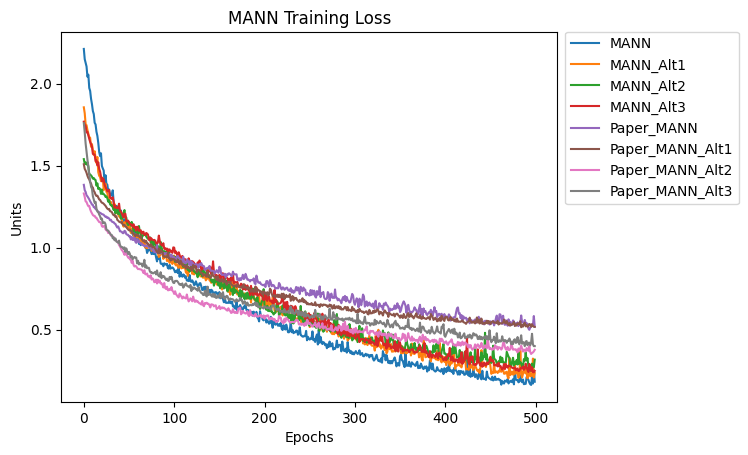

In [253]:
# Plot the training loss over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['loss']))), histories['MANN'].history['loss'], label='MANN')

plt.plot(np.array(range(len(histories['MANN_Alt1'].history['loss']))), histories['MANN_Alt1'].history['loss'], label='MANN_Alt1')

plt.plot(np.array(range(len(histories['MANN_Alt2'].history['loss']))), histories['MANN_Alt2'].history['loss'], label='MANN_Alt2')

plt.plot(np.array(range(len(histories['MANN_Alt3'].history['loss']))), histories['MANN_Alt3'].history['loss'], label='MANN_Alt3')

plt.plot(np.array(range(len(histories['Paper_MANN'].history['loss']))), histories['Paper_MANN'].history['loss'], label='Paper_MANN')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['loss']))), histories['Paper_MANN_Alt1'].history['loss'], label='Paper_MANN_Alt1')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['loss']))), histories['Paper_MANN_Alt2'].history['loss'], label='Paper_MANN_Alt2')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['loss']))), histories['Paper_MANN_Alt3'].history['loss'], label='Paper_MANN_Alt3')

plt.title('MANN Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Units')

plt.legend(bbox_to_anchor=(1.38, 1.02))
plt.show()

In [254]:
# Plot the training loss over the epochs
plt.plot(np.array(range(len(histories['Sigmoid'].history['loss']))), histories['Sigmoid'].history['loss'], label='Sigmoid')

plt.plot(np.array(range(len(histories['Tanh'].history['loss']))), histories['Tanh'].history['loss'], label='Tanh')

plt.plot(np.array(range(len(histories['LeakyReLU'].history['loss']))), histories['LeakyReLU'].history['loss'], label='Leaky ReLU')

plt.plot(np.array(range(len(histories['ELU'].history['loss']))), histories['ELU'].history['loss'], label='ELU')

plt.plot(np.array(range(len(histories['Swish'].history['loss']))), histories['Swish'].history['loss'], label='Swish')

plt.plot(np.array(range(len(histories['Sequential'].history['loss']))), histories['Sequential'].history['loss'], label='Sequential')

plt.title('Uniform Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Units')

plt.legend(bbox_to_anchor=(1.38, 1.02))
plt.show()

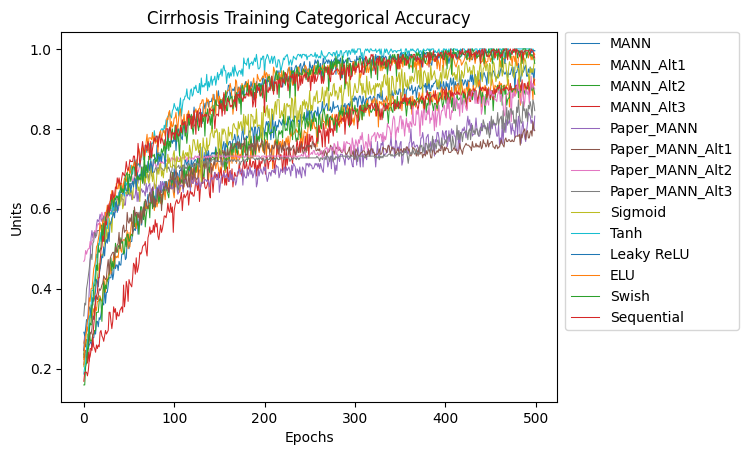

In [255]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['categorical_accuracy']))), histories['MANN'].history['categorical_accuracy'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['categorical_accuracy']))), histories['MANN_Alt1'].history['categorical_accuracy'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['categorical_accuracy']))), histories['MANN_Alt2'].history['categorical_accuracy'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['categorical_accuracy']))), histories['MANN_Alt3'].history['categorical_accuracy'], label='MANN_Alt3', linewidth=0.75)

plt.plot(np.array(range(len(histories['Paper_MANN'].history['categorical_accuracy']))), histories['Paper_MANN'].history['categorical_accuracy'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['categorical_accuracy']))), histories['Paper_MANN_Alt1'].history['categorical_accuracy'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['categorical_accuracy']))), histories['Paper_MANN_Alt2'].history['categorical_accuracy'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['categorical_accuracy']))), histories['Paper_MANN_Alt3'].history['categorical_accuracy'], label='Paper_MANN_Alt3', linewidth=0.75)


plt.plot(np.array(range(len(histories['Sigmoid'].history['categorical_accuracy']))), histories['Sigmoid'].history['categorical_accuracy'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['categorical_accuracy']))), histories['Tanh'].history['categorical_accuracy'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['categorical_accuracy']))), histories['LeakyReLU'].history['categorical_accuracy'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['categorical_accuracy']))), histories['ELU'].history['categorical_accuracy'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['categorical_accuracy']))), histories['Swish'].history['categorical_accuracy'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['categorical_accuracy']))), histories['Sequential'].history['categorical_accuracy'], label='Sequential', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Cirrhosis Training Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

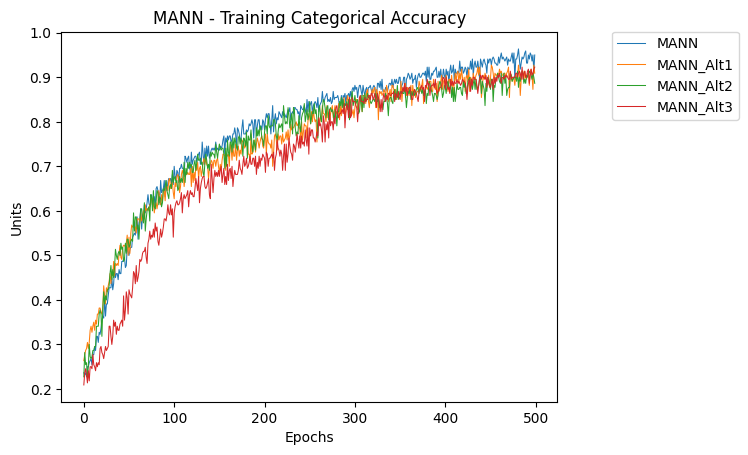

In [256]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['categorical_accuracy']))), histories['MANN'].history['categorical_accuracy'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['categorical_accuracy']))), histories['MANN_Alt1'].history['categorical_accuracy'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['categorical_accuracy']))), histories['MANN_Alt2'].history['categorical_accuracy'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['categorical_accuracy']))), histories['MANN_Alt3'].history['categorical_accuracy'], label='MANN_Alt3', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('MANN - Training Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

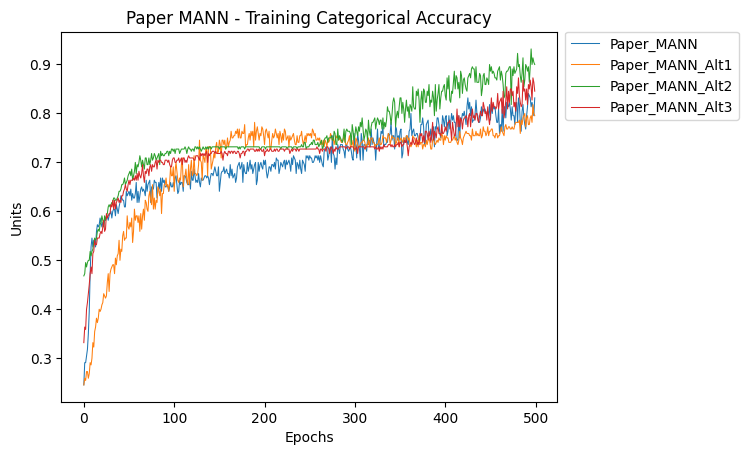

In [257]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['Paper_MANN'].history['categorical_accuracy']))), histories['Paper_MANN'].history['categorical_accuracy'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['categorical_accuracy']))), histories['Paper_MANN_Alt1'].history['categorical_accuracy'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['categorical_accuracy']))), histories['Paper_MANN_Alt2'].history['categorical_accuracy'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['categorical_accuracy']))), histories['Paper_MANN_Alt3'].history['categorical_accuracy'], label='Paper_MANN_Alt3', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Paper MANN - Training Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

In [258]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['Sigmoid'].history['categorical_accuracy']))), histories['Sigmoid'].history['categorical_accuracy'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['categorical_accuracy']))), histories['Tanh'].history['categorical_accuracy'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['categorical_accuracy']))), histories['LeakyReLU'].history['categorical_accuracy'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['categorical_accuracy']))), histories['ELU'].history['categorical_accuracy'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['categorical_accuracy']))), histories['Swish'].history['categorical_accuracy'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['categorical_accuracy']))), histories['Sequential'].history['categorical_accuracy'], label='Sequential', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Uniform & Sequential - Training Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

In [259]:
# Plot the validation loss over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['loss']))), histories['MANN'].history['loss'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['loss']))), histories['MANN_Alt1'].history['loss'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['loss']))), histories['MANN_Alt2'].history['loss'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['loss']))), histories['MANN_Alt3'].history['loss'], label='MANN_Alt3', linewidth=0.75)

plt.plot(np.array(range(len(histories['Paper_MANN'].history['loss']))), histories['Paper_MANN'].history['loss'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['loss']))), histories['Paper_MANN_Alt1'].history['loss'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['loss']))), histories['Paper_MANN_Alt2'].history['loss'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['loss']))), histories['Paper_MANN_Alt3'].history['loss'], label='Paper_MANN_Alt3', linewidth=0.75)


plt.plot(np.array(range(len(histories['Sigmoid'].history['loss']))), histories['Sigmoid'].history['val_loss'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['loss']))), histories['Tanh'].history['val_loss'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['loss']))), histories['LeakyReLU'].history['val_loss'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['loss']))), histories['ELU'].history['val_loss'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['loss']))), histories['Swish'].history['val_loss'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['loss']))), histories['Sequential'].history['val_loss'], label='Sequential', linewidth=0.75)

plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Units')
#plt.ylim([0,1.5])
plt.legend(bbox_to_anchor=(1.38, 1.02))
plt.show()

In [260]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['categorical_accuracy']))), histories['MANN'].history['val_categorical_accuracy'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['categorical_accuracy']))), histories['MANN_Alt1'].history['val_categorical_accuracy'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['categorical_accuracy']))), histories['MANN_Alt2'].history['val_categorical_accuracy'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['categorical_accuracy']))), histories['MANN_Alt3'].history['val_categorical_accuracy'], label='MANN_Alt3', linewidth=0.75)

plt.plot(np.array(range(len(histories['Paper_MANN'].history['categorical_accuracy']))), histories['Paper_MANN'].history['val_categorical_accuracy'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['categorical_accuracy']))), histories['Paper_MANN_Alt1'].history['val_categorical_accuracy'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['categorical_accuracy']))), histories['Paper_MANN_Alt2'].history['val_categorical_accuracy'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['categorical_accuracy']))), histories['Paper_MANN_Alt3'].history['val_categorical_accuracy'], label='Paper_MANN_Alt3', linewidth=0.75)


plt.plot(np.array(range(len(histories['Sigmoid'].history['categorical_accuracy']))), histories['Sigmoid'].history['val_categorical_accuracy'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['categorical_accuracy']))), histories['Tanh'].history['val_categorical_accuracy'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['categorical_accuracy']))), histories['LeakyReLU'].history['val_categorical_accuracy'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['categorical_accuracy']))), histories['ELU'].history['val_categorical_accuracy'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['categorical_accuracy']))), histories['Swish'].history['val_categorical_accuracy'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['categorical_accuracy']))), histories['Sequential'].history['val_categorical_accuracy'], label='Sequential', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Validation Accuracy - Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

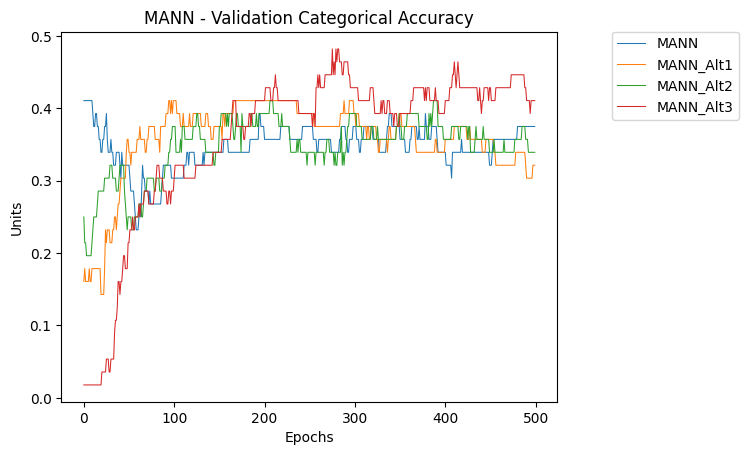

In [261]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['categorical_accuracy']))), histories['MANN'].history['val_categorical_accuracy'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['categorical_accuracy']))), histories['MANN_Alt1'].history['val_categorical_accuracy'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['categorical_accuracy']))), histories['MANN_Alt2'].history['val_categorical_accuracy'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['categorical_accuracy']))), histories['MANN_Alt3'].history['val_categorical_accuracy'], label='MANN_Alt3', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('MANN - Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

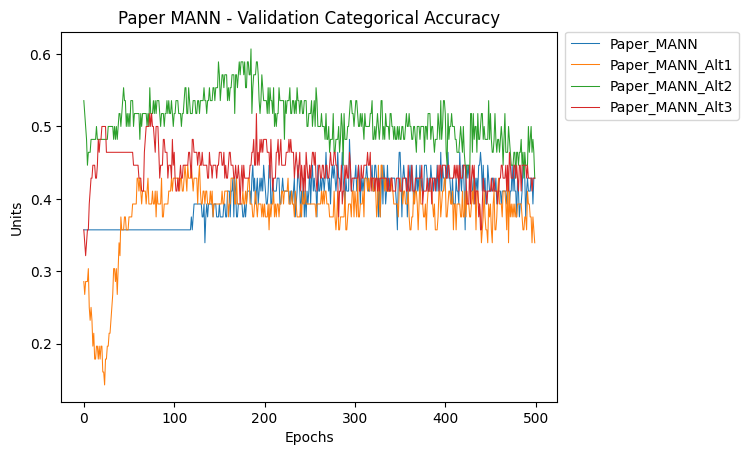

In [262]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['Paper_MANN'].history['categorical_accuracy']))), histories['Paper_MANN'].history['val_categorical_accuracy'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['categorical_accuracy']))), histories['Paper_MANN_Alt1'].history['val_categorical_accuracy'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['categorical_accuracy']))), histories['Paper_MANN_Alt2'].history['val_categorical_accuracy'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['categorical_accuracy']))), histories['Paper_MANN_Alt3'].history['val_categorical_accuracy'], label='Paper_MANN_Alt3', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Paper MANN - Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

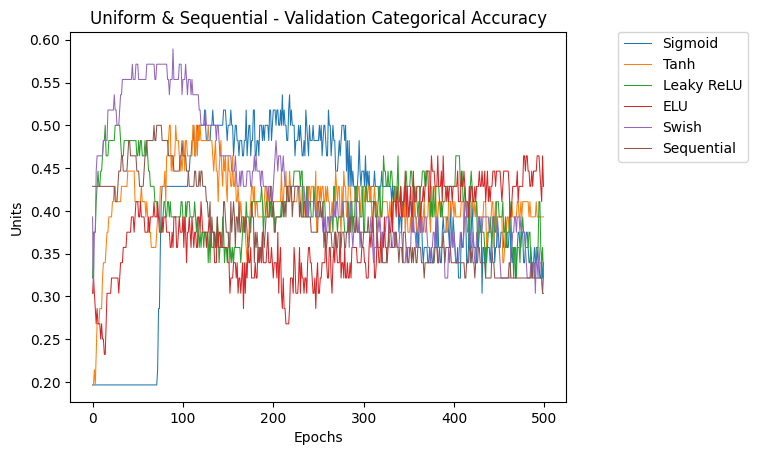

In [263]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['Sigmoid'].history['categorical_accuracy']))), histories['Sigmoid'].history['val_categorical_accuracy'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['categorical_accuracy']))), histories['Tanh'].history['val_categorical_accuracy'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['categorical_accuracy']))), histories['LeakyReLU'].history['val_categorical_accuracy'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['categorical_accuracy']))), histories['ELU'].history['val_categorical_accuracy'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['categorical_accuracy']))), histories['Swish'].history['val_categorical_accuracy'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['categorical_accuracy']))), histories['Sequential'].history['val_categorical_accuracy'], label='Sequential', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Uniform & Sequential - Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

In [264]:
# Save training history
train_hist_df = pd.DataFrame()
val_hist_df = pd.DataFrame()
for name, callback in histories.items():
    train_hist_df = pd.concat((train_hist_df, pd.DataFrame(callback.history['loss'], columns=[name])), axis=1, join='inner', ignore_index=True)
    val_hist_df = pd.concat((val_hist_df, pd.DataFrame(callback.history['val_loss'], columns=[name])), axis=1, join='inner', ignore_index=True)
    
train_hist_df.to_csv('Binary.training_hist.csv')
val_hist_df.to_csv('Binary.validation_hist.csv')

In [265]:
# Get performance metrics for each model
# Get the testing loss for each model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, one_hot.inverse_transform(y_train).ravel())

metric = keras.metrics.CategoricalAccuracy()
metric.update_state(y_test.to_numpy(), one_hot.transform(log_reg.predict(X_test).reshape(-1,1)))
log_reg_loss = metric.result().numpy()

MANN_loss = models['MANN'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
MANN_Alt1_loss = models['MANN_Alt1'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
MANN_Alt2_loss = models['MANN_Alt2'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
MANN_Alt3_loss = models['MANN_Alt3'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

Paper_MANN_loss = models['Paper_MANN'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
Paper_MANN_Alt1_loss = models['Paper_MANN_Alt1'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
Paper_MANN_Alt2_loss = models['Paper_MANN_Alt2'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
Paper_MANN_Alt3_loss = models['Paper_MANN_Alt3'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

Sigmoid_loss = models['Sigmoid'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

Tanh_loss = models['Tanh'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

LeakyReLU_loss = models['LeakyReLU'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

ELU_loss = models['ELU'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

Swish_loss = models['Swish'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

Sequential_loss = models['Sequential'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

2/2 [==============================] - 0s 5ms/step - loss: 4.0392 - categorical_accuracy: 0.3036


In [266]:
# Save metrics to a table and display results
# Save testing loss to table and display results
results = pd.DataFrame([MANN_loss, MANN_Alt1_loss, MANN_Alt2_loss, MANN_Alt3_loss, Paper_MANN_loss, Paper_MANN_Alt1_loss, Paper_MANN_Alt2_loss, Paper_MANN_Alt3_loss,Sigmoid_loss, Tanh_loss, LeakyReLU_loss, ELU_loss, Swish_loss, Sequential_loss],
                      index=['MANN', 'MANN_Alt1', 'MANN_Alt2', 'MANN_Alt3', 'Paper MANN', 'Paper Alternate MANN 1', 'Paper Alternate MANN 2', 'Paper Alternate MANN 3', 'Sigmoid NN', 'Tanh NN', 'Leaky ReLU NN', 'ELU NN', 'Swish NN', 'Sequential NN'],
                      columns=['Categorical Accuracy'])
results.sort_values('Categorical Accuracy', inplace=True, ascending=False)
results.head(20)

Categorical Accuracy
Paper MANN                          0.428571
Paper Alternate MANN 2              0.428571
Paper Alternate MANN 3              0.428571
ELU NN                              0.428571
MANN_Alt3                           0.410714
Tanh NN                             0.392857
MANN                                0.375000
MANN_Alt2                           0.339286
Paper Alternate MANN 1              0.339286
Sigmoid NN                          0.339286
MANN_Alt1                           0.321429
Leaky ReLU NN                       0.321429
Swish NN                            0.321429
Sequential NN                       0.303571

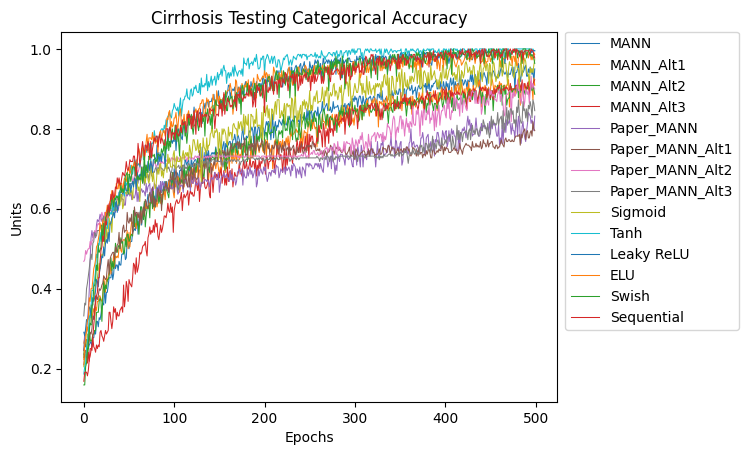

In [267]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['categorical_accuracy']))), histories['MANN'].history['categorical_accuracy'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['categorical_accuracy']))), histories['MANN_Alt1'].history['categorical_accuracy'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['categorical_accuracy']))), histories['MANN_Alt2'].history['categorical_accuracy'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['categorical_accuracy']))), histories['MANN_Alt3'].history['categorical_accuracy'], label='MANN_Alt3', linewidth=0.75)

plt.plot(np.array(range(len(histories['Paper_MANN'].history['categorical_accuracy']))), histories['Paper_MANN'].history['categorical_accuracy'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['categorical_accuracy']))), histories['Paper_MANN_Alt1'].history['categorical_accuracy'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['categorical_accuracy']))), histories['Paper_MANN_Alt2'].history['categorical_accuracy'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['categorical_accuracy']))), histories['Paper_MANN_Alt3'].history['categorical_accuracy'], label='Paper_MANN_Alt3', linewidth=0.75)


plt.plot(np.array(range(len(histories['Sigmoid'].history['categorical_accuracy']))), histories['Sigmoid'].history['categorical_accuracy'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['categorical_accuracy']))), histories['Tanh'].history['categorical_accuracy'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['categorical_accuracy']))), histories['LeakyReLU'].history['categorical_accuracy'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['categorical_accuracy']))), histories['ELU'].history['categorical_accuracy'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['categorical_accuracy']))), histories['Swish'].history['categorical_accuracy'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['categorical_accuracy']))), histories['Sequential'].history['categorical_accuracy'], label='Sequential', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Cirrhosis Testing Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

# 

# 

# Pulling HepatitisCdata Prediction Dataset data from the csv

In [268]:
# Load the data and split into testing and training for processing
HepatitisCdata = pd.read_csv('./Datasets/HepatitisCdata.csv')

HepatitisCdata.describe()

Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.780629   26.028315   25.469689   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.500000   16.400000   21.600000   
50%    308.000000   47.000000   41.950000   66.200000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   80.100000   33.075000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  605.000000   615.000000  615.000000  614.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044137  
std     19.673150    2.205657    1.132728    49.756166   54.661071    5.402636  
min      0.800000    1.420000    1.430000     8.000000    4.500000   44.800000  
25%      5.300000    6.935000    4.610000    67.000000   15.700000   69.300000  
50%      7.300000    8.260000    5.300000    77.000000   23.300000   72.200000  
75%     11.200000    9.590000    6.060000    88.000000   40.200000   75.400000  
max    254.000000   16.410000    9.670000  1079.100000  650.900000   90.000000

In [269]:
HepatitisCdata.head()

Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7

In [270]:
HepatitisCdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [271]:
HepatitisCdata.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

## Assigning features and targets from dataset

In [272]:
HepatitisCdata = HepatitisCdata.dropna()

In [273]:
features = HepatitisCdata.drop(['Unnamed: 0','Category'], axis=1)

target = HepatitisCdata['Category']

In [274]:
features.head()

Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  PROT
0   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1  69.0
1   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6  76.5
2   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2  79.3
3   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8  75.7
4   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9  68.7

In [275]:
target.value_counts()

0=Blood Donor             526
3=Cirrhosis                24
1=Hepatitis                20
2=Fibrosis                 12
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [276]:
target = target.replace(regex={'0=Blood Donor': '0', '3=Cirrhosis': '3', '1=Hepatitis':'1', '2=Fibrosis':'2', '0s=suspect Blood Donor':'0'})

In [277]:
target.value_counts()

0    533
3     24
1     20
2     12
Name: Category, dtype: int64

In [278]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Training the models

In [279]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

## Normalizing dataset

In [280]:
# Process and normalize the data
one_hot = OneHotEncoder(sparse_output=False)

# One-Hot encode categorical columns
X_train.append(pd.DataFrame(data=one_hot.fit_transform(X_train[['Sex']]), columns=one_hot.get_feature_names_out()))
X_test.append(pd.DataFrame(data=one_hot.transform(X_test[['Sex']]), columns=one_hot.get_feature_names_out()))

# Drop the transformed columns and unneeded columns
X_train.drop(['Sex'], axis = 1, inplace=True)
X_test.drop(['Sex'], axis=1, inplace=True)



# Normalize numerical columns
scaler = StandardScaler()
X_train[['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT', 'PROT']]= scaler.fit_transform(X_train[['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT', 'PROT']])
X_test[['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT', 'PROT']] = scaler.transform(X_test[['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT', 'PROT']])

C:\Users\Jaskirat\AppData\Local\Temp\ipykernel_25644\2507058565.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train.append(pd.DataFrame(data=one_hot.fit_transform(X_train[['Sex']]), columns=one_hot.get_feature_names_out()))
C:\Users\Jaskirat\AppData\Local\Temp\ipykernel_25644\2507058565.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test.append(pd.DataFrame(data=one_hot.transform(X_test[['Sex']]), columns=one_hot.get_feature_names_out()))


In [281]:
# One-Hot encode target labels
y_train = pd.DataFrame(data=one_hot.fit_transform(y_train.to_numpy().reshape(-1,1)), columns=one_hot.categories_)
y_test = pd.DataFrame(data=one_hot.transform(y_test.to_numpy().reshape(-1,1)), columns=one_hot.categories_)

In [282]:
print(one_hot.categories_[0])
print(len(one_hot.categories_[0]))

['0' '1' '2' '3']
4


In [283]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   (0,)    471 non-null    float64
 1   (1,)    471 non-null    float64
 2   (2,)    471 non-null    float64
 3   (3,)    471 non-null    float64
dtypes: float64(4)
memory usage: 14.8 KB


In [284]:
# Create and fit all neural networks for evaluations

models, histories = test(X_train.to_numpy(), y_train.to_numpy(), X_test=X_test.to_numpy(), y_test=y_test.to_numpy(), num_classes=len(one_hot.categories_[0]), task='classification', epochs=250, batch_size=128, task_name='HepatitisC')

Training Multi Activation Neural Network...
Epoch 1/250
4/4 [==============================] - 3s 182ms/step - loss: 1.7232 - categorical_accuracy: 0.1720 - val_loss: 7.9048 - val_categorical_accuracy: 0.0593
Epoch 2/250
4/4 [==============================] - 0s 83ms/step - loss: 1.7052 - categorical_accuracy: 0.1911 - val_loss: 5.4895 - val_categorical_accuracy: 0.0339
Epoch 3/250
4/4 [==============================] - 0s 69ms/step - loss: 1.6616 - categorical_accuracy: 0.1720 - val_loss: 4.2065 - val_categorical_accuracy: 0.0593
Epoch 4/250
4/4 [==============================] - 0s 80ms/step - loss: 1.6424 - categorical_accuracy: 0.1911 - val_loss: 3.4529 - val_categorical_accuracy: 0.0593
Epoch 5/250
4/4 [==============================] - 0s 82ms/step - loss: 1.6362 - categorical_accuracy: 0.1868 - val_loss: 2.9821 - val_categorical_accuracy: 0.0763
Epoch 6/250
4/4 [==============================] - 0s 82ms/step - loss: 1.5939 - categorical_accuracy: 0.2251 - val_loss: 2.6732 - val_

4/4 [==============================] - 0s 61ms/step - loss: 0.7712 - categorical_accuracy: 0.8620 - val_loss: 0.7960 - val_categorical_accuracy: 0.7627
Epoch 51/250
4/4 [==============================] - 0s 71ms/step - loss: 0.7666 - categorical_accuracy: 0.8705 - val_loss: 0.7810 - val_categorical_accuracy: 0.7712
Epoch 52/250
4/4 [==============================] - 0s 59ms/step - loss: 0.7489 - categorical_accuracy: 0.8684 - val_loss: 0.7665 - val_categorical_accuracy: 0.7712
Epoch 53/250
4/4 [==============================] - 0s 58ms/step - loss: 0.7425 - categorical_accuracy: 0.8769 - val_loss: 0.7519 - val_categorical_accuracy: 0.7712
Epoch 54/250
4/4 [==============================] - 0s 59ms/step - loss: 0.7146 - categorical_accuracy: 0.8726 - val_loss: 0.7364 - val_categorical_accuracy: 0.7797
Epoch 55/250
4/4 [==============================] - 0s 67ms/step - loss: 0.7094 - categorical_accuracy: 0.8747 - val_loss: 0.7214 - val_categorical_accuracy: 0.8051
Epoch 56/250
4/4 [=====

Epoch 100/250
4/4 [==============================] - 0s 58ms/step - loss: 0.2941 - categorical_accuracy: 0.9575 - val_loss: 0.3524 - val_categorical_accuracy: 0.9237
Epoch 101/250
4/4 [==============================] - 0s 67ms/step - loss: 0.2764 - categorical_accuracy: 0.9597 - val_loss: 0.3491 - val_categorical_accuracy: 0.9237
Epoch 102/250
4/4 [==============================] - 0s 63ms/step - loss: 0.2616 - categorical_accuracy: 0.9639 - val_loss: 0.3457 - val_categorical_accuracy: 0.9237
Epoch 103/250
4/4 [==============================] - 0s 65ms/step - loss: 0.2657 - categorical_accuracy: 0.9660 - val_loss: 0.3418 - val_categorical_accuracy: 0.9237
Epoch 104/250
4/4 [==============================] - 0s 64ms/step - loss: 0.2635 - categorical_accuracy: 0.9597 - val_loss: 0.3386 - val_categorical_accuracy: 0.9237
Epoch 105/250
4/4 [==============================] - 0s 65ms/step - loss: 0.2494 - categorical_accuracy: 0.9618 - val_loss: 0.3357 - val_categorical_accuracy: 0.9237
Epoc

4/4 [==============================] - 0s 64ms/step - loss: 0.1488 - categorical_accuracy: 0.9639 - val_loss: 0.2684 - val_categorical_accuracy: 0.9322
Epoch 150/250
4/4 [==============================] - 0s 62ms/step - loss: 0.1559 - categorical_accuracy: 0.9660 - val_loss: 0.2683 - val_categorical_accuracy: 0.9322
Epoch 151/250
4/4 [==============================] - 0s 64ms/step - loss: 0.1456 - categorical_accuracy: 0.9682 - val_loss: 0.2676 - val_categorical_accuracy: 0.9322
Epoch 152/250
4/4 [==============================] - 0s 62ms/step - loss: 0.1358 - categorical_accuracy: 0.9745 - val_loss: 0.2666 - val_categorical_accuracy: 0.9322
Epoch 153/250
4/4 [==============================] - 0s 63ms/step - loss: 0.1422 - categorical_accuracy: 0.9682 - val_loss: 0.2654 - val_categorical_accuracy: 0.9322
Epoch 154/250
4/4 [==============================] - 0s 63ms/step - loss: 0.1486 - categorical_accuracy: 0.9639 - val_loss: 0.2639 - val_categorical_accuracy: 0.9322
Epoch 155/250
4/4 

4/4 [==============================] - 0s 42ms/step - loss: 0.0962 - categorical_accuracy: 0.9724 - val_loss: 0.2380 - val_categorical_accuracy: 0.9322
Epoch 199/250
4/4 [==============================] - 0s 62ms/step - loss: 0.1010 - categorical_accuracy: 0.9724 - val_loss: 0.2359 - val_categorical_accuracy: 0.9322
Epoch 200/250
4/4 [==============================] - 0s 59ms/step - loss: 0.1167 - categorical_accuracy: 0.9618 - val_loss: 0.2338 - val_categorical_accuracy: 0.9322
Epoch 201/250
4/4 [==============================] - 0s 60ms/step - loss: 0.1166 - categorical_accuracy: 0.9660 - val_loss: 0.2327 - val_categorical_accuracy: 0.9322
Epoch 202/250
4/4 [==============================] - 0s 65ms/step - loss: 0.1049 - categorical_accuracy: 0.9682 - val_loss: 0.2311 - val_categorical_accuracy: 0.9322
Epoch 203/250
4/4 [==============================] - 0s 59ms/step - loss: 0.0891 - categorical_accuracy: 0.9788 - val_loss: 0.2276 - val_categorical_accuracy: 0.9322
Epoch 204/250
4/4 

4/4 [==============================] - 0s 43ms/step - loss: 0.0720 - categorical_accuracy: 0.9788 - val_loss: 0.2104 - val_categorical_accuracy: 0.9322
Epoch 248/250
4/4 [==============================] - 0s 43ms/step - loss: 0.0712 - categorical_accuracy: 0.9745 - val_loss: 0.2131 - val_categorical_accuracy: 0.9322
Epoch 249/250
4/4 [==============================] - 0s 42ms/step - loss: 0.0735 - categorical_accuracy: 0.9809 - val_loss: 0.2141 - val_categorical_accuracy: 0.9322
Epoch 250/250
4/4 [==============================] - 0s 41ms/step - loss: 0.1068 - categorical_accuracy: 0.9682 - val_loss: 0.2209 - val_categorical_accuracy: 0.9322
INFO:tensorflow:Assets written to: ./Models/HepatitisC/MANN\assets
Training Complete
Epoch 1/250
4/4 [==============================] - 4s 135ms/step - loss: 1.7441 - categorical_accuracy: 0.3397 - val_loss: 11.8622 - val_categorical_accuracy: 0.0593
Epoch 2/250
4/4 [==============================] - 0s 69ms/step - loss: 1.6865 - categorical_accura

4/4 [==============================] - 0s 73ms/step - loss: 0.7834 - categorical_accuracy: 0.8450 - val_loss: 0.7590 - val_categorical_accuracy: 0.8559
Epoch 47/250
4/4 [==============================] - 0s 66ms/step - loss: 0.7663 - categorical_accuracy: 0.8620 - val_loss: 0.7483 - val_categorical_accuracy: 0.8475
Epoch 48/250
4/4 [==============================] - 0s 65ms/step - loss: 0.7490 - categorical_accuracy: 0.8620 - val_loss: 0.7368 - val_categorical_accuracy: 0.8475
Epoch 49/250
4/4 [==============================] - 0s 60ms/step - loss: 0.7446 - categorical_accuracy: 0.8790 - val_loss: 0.7263 - val_categorical_accuracy: 0.8559
Epoch 50/250
4/4 [==============================] - 0s 68ms/step - loss: 0.7234 - categorical_accuracy: 0.8832 - val_loss: 0.7150 - val_categorical_accuracy: 0.8644
Epoch 51/250
4/4 [==============================] - 0s 63ms/step - loss: 0.7142 - categorical_accuracy: 0.8896 - val_loss: 0.7042 - val_categorical_accuracy: 0.8814
Epoch 52/250
4/4 [=====

Epoch 96/250
4/4 [==============================] - 0s 68ms/step - loss: 0.2752 - categorical_accuracy: 0.9597 - val_loss: 0.4654 - val_categorical_accuracy: 0.8983
Epoch 97/250
4/4 [==============================] - 0s 67ms/step - loss: 0.2741 - categorical_accuracy: 0.9597 - val_loss: 0.4598 - val_categorical_accuracy: 0.8983
Epoch 98/250
4/4 [==============================] - 0s 48ms/step - loss: 0.2692 - categorical_accuracy: 0.9618 - val_loss: 0.4598 - val_categorical_accuracy: 0.8983
Epoch 99/250
4/4 [==============================] - 0s 64ms/step - loss: 0.2613 - categorical_accuracy: 0.9575 - val_loss: 0.4590 - val_categorical_accuracy: 0.8983
Epoch 100/250
4/4 [==============================] - 0s 64ms/step - loss: 0.2674 - categorical_accuracy: 0.9512 - val_loss: 0.4518 - val_categorical_accuracy: 0.8983
Epoch 101/250
4/4 [==============================] - 0s 64ms/step - loss: 0.2552 - categorical_accuracy: 0.9618 - val_loss: 0.4487 - val_categorical_accuracy: 0.8983
Epoch 10

4/4 [==============================] - 0s 43ms/step - loss: 0.1614 - categorical_accuracy: 0.9639 - val_loss: 0.4259 - val_categorical_accuracy: 0.8898
Epoch 146/250
4/4 [==============================] - 0s 43ms/step - loss: 0.1506 - categorical_accuracy: 0.9618 - val_loss: 0.4279 - val_categorical_accuracy: 0.8898
Epoch 147/250
4/4 [==============================] - 0s 44ms/step - loss: 0.1491 - categorical_accuracy: 0.9618 - val_loss: 0.4271 - val_categorical_accuracy: 0.8898
Epoch 148/250
4/4 [==============================] - 0s 41ms/step - loss: 0.1524 - categorical_accuracy: 0.9597 - val_loss: 0.4125 - val_categorical_accuracy: 0.8898
Epoch 149/250
4/4 [==============================] - 0s 64ms/step - loss: 0.1447 - categorical_accuracy: 0.9639 - val_loss: 0.4093 - val_categorical_accuracy: 0.8814
Epoch 150/250
4/4 [==============================] - 0s 63ms/step - loss: 0.1734 - categorical_accuracy: 0.9490 - val_loss: 0.4044 - val_categorical_accuracy: 0.8898
Epoch 151/250
4/4 

4/4 [==============================] - 0s 36ms/step - loss: 0.1114 - categorical_accuracy: 0.9660 - val_loss: 0.4049 - val_categorical_accuracy: 0.8898
Epoch 195/250
4/4 [==============================] - 0s 39ms/step - loss: 0.1072 - categorical_accuracy: 0.9639 - val_loss: 0.4049 - val_categorical_accuracy: 0.8898
Epoch 196/250
4/4 [==============================] - 0s 36ms/step - loss: 0.1151 - categorical_accuracy: 0.9597 - val_loss: 0.4074 - val_categorical_accuracy: 0.8898
Epoch 197/250
4/4 [==============================] - 0s 37ms/step - loss: 0.1055 - categorical_accuracy: 0.9660 - val_loss: 0.4080 - val_categorical_accuracy: 0.8898
Epoch 198/250
4/4 [==============================] - 0s 40ms/step - loss: 0.1064 - categorical_accuracy: 0.9618 - val_loss: 0.4077 - val_categorical_accuracy: 0.8898
Epoch 199/250
4/4 [==============================] - 0s 37ms/step - loss: 0.1025 - categorical_accuracy: 0.9682 - val_loss: 0.4066 - val_categorical_accuracy: 0.8898
Epoch 200/250
4/4 

4/4 [==============================] - 0s 41ms/step - loss: 0.0835 - categorical_accuracy: 0.9724 - val_loss: 0.4024 - val_categorical_accuracy: 0.8983
Epoch 244/250
4/4 [==============================] - 0s 61ms/step - loss: 0.0887 - categorical_accuracy: 0.9682 - val_loss: 0.3941 - val_categorical_accuracy: 0.8898
Epoch 245/250
4/4 [==============================] - 0s 59ms/step - loss: 0.0813 - categorical_accuracy: 0.9788 - val_loss: 0.3919 - val_categorical_accuracy: 0.8898
Epoch 246/250
4/4 [==============================] - 0s 40ms/step - loss: 0.0821 - categorical_accuracy: 0.9766 - val_loss: 0.3924 - val_categorical_accuracy: 0.8898
Epoch 247/250
4/4 [==============================] - 0s 57ms/step - loss: 0.0780 - categorical_accuracy: 0.9809 - val_loss: 0.3940 - val_categorical_accuracy: 0.8898
Epoch 248/250
4/4 [==============================] - 0s 41ms/step - loss: 0.0823 - categorical_accuracy: 0.9788 - val_loss: 0.3922 - val_categorical_accuracy: 0.8983
Epoch 249/250
4/4 

4/4 [==============================] - 0s 58ms/step - loss: 0.9564 - categorical_accuracy: 0.7962 - val_loss: 0.9102 - val_categorical_accuracy: 0.7797
Epoch 43/250
4/4 [==============================] - 0s 62ms/step - loss: 0.9392 - categorical_accuracy: 0.8195 - val_loss: 0.9009 - val_categorical_accuracy: 0.7797
Epoch 44/250
4/4 [==============================] - 0s 64ms/step - loss: 0.9273 - categorical_accuracy: 0.8259 - val_loss: 0.8902 - val_categorical_accuracy: 0.7797
Epoch 45/250
4/4 [==============================] - 0s 74ms/step - loss: 0.9163 - categorical_accuracy: 0.8301 - val_loss: 0.8785 - val_categorical_accuracy: 0.7966
Epoch 46/250
4/4 [==============================] - 0s 75ms/step - loss: 0.9001 - categorical_accuracy: 0.8429 - val_loss: 0.8701 - val_categorical_accuracy: 0.8051
Epoch 47/250
4/4 [==============================] - 0s 60ms/step - loss: 0.8949 - categorical_accuracy: 0.8408 - val_loss: 0.8627 - val_categorical_accuracy: 0.8051
Epoch 48/250
4/4 [=====

Epoch 92/250
4/4 [==============================] - 0s 63ms/step - loss: 0.3793 - categorical_accuracy: 0.9533 - val_loss: 0.4914 - val_categorical_accuracy: 0.8814
Epoch 93/250
4/4 [==============================] - 0s 64ms/step - loss: 0.3766 - categorical_accuracy: 0.9533 - val_loss: 0.4881 - val_categorical_accuracy: 0.8814
Epoch 94/250
4/4 [==============================] - 0s 61ms/step - loss: 0.3725 - categorical_accuracy: 0.9448 - val_loss: 0.4838 - val_categorical_accuracy: 0.8814
Epoch 95/250
4/4 [==============================] - 0s 71ms/step - loss: 0.3637 - categorical_accuracy: 0.9427 - val_loss: 0.4800 - val_categorical_accuracy: 0.8814
Epoch 96/250
4/4 [==============================] - 0s 66ms/step - loss: 0.3507 - categorical_accuracy: 0.9469 - val_loss: 0.4769 - val_categorical_accuracy: 0.8898
Epoch 97/250
4/4 [==============================] - 0s 71ms/step - loss: 0.3573 - categorical_accuracy: 0.9448 - val_loss: 0.4702 - val_categorical_accuracy: 0.8814
Epoch 98/2

4/4 [==============================] - 0s 44ms/step - loss: 0.1729 - categorical_accuracy: 0.9597 - val_loss: 0.3844 - val_categorical_accuracy: 0.8814
Epoch 142/250
4/4 [==============================] - 0s 45ms/step - loss: 0.1707 - categorical_accuracy: 0.9597 - val_loss: 0.3847 - val_categorical_accuracy: 0.8814
Epoch 143/250
4/4 [==============================] - 0s 44ms/step - loss: 0.1775 - categorical_accuracy: 0.9554 - val_loss: 0.3850 - val_categorical_accuracy: 0.8814
Epoch 144/250
4/4 [==============================] - 0s 43ms/step - loss: 0.1774 - categorical_accuracy: 0.9618 - val_loss: 0.3848 - val_categorical_accuracy: 0.8814
Epoch 145/250
4/4 [==============================] - 0s 43ms/step - loss: 0.1671 - categorical_accuracy: 0.9660 - val_loss: 0.3806 - val_categorical_accuracy: 0.8814
Epoch 146/250
4/4 [==============================] - 0s 43ms/step - loss: 0.1610 - categorical_accuracy: 0.9639 - val_loss: 0.3796 - val_categorical_accuracy: 0.8814
Epoch 147/250
4/4 

4/4 [==============================] - 0s 63ms/step - loss: 0.1052 - categorical_accuracy: 0.9745 - val_loss: 0.3237 - val_categorical_accuracy: 0.9068
Epoch 191/250
4/4 [==============================] - 0s 60ms/step - loss: 0.1033 - categorical_accuracy: 0.9703 - val_loss: 0.3227 - val_categorical_accuracy: 0.9068
Epoch 192/250
4/4 [==============================] - 0s 62ms/step - loss: 0.1009 - categorical_accuracy: 0.9766 - val_loss: 0.3206 - val_categorical_accuracy: 0.9068
Epoch 193/250
4/4 [==============================] - 0s 64ms/step - loss: 0.0998 - categorical_accuracy: 0.9745 - val_loss: 0.3202 - val_categorical_accuracy: 0.9068
Epoch 194/250
4/4 [==============================] - 0s 62ms/step - loss: 0.1065 - categorical_accuracy: 0.9703 - val_loss: 0.3153 - val_categorical_accuracy: 0.9068
Epoch 195/250
4/4 [==============================] - 0s 63ms/step - loss: 0.1025 - categorical_accuracy: 0.9682 - val_loss: 0.3140 - val_categorical_accuracy: 0.9068
Epoch 196/250
4/4 

4/4 [==============================] - 0s 43ms/step - loss: 0.0753 - categorical_accuracy: 0.9766 - val_loss: 0.2957 - val_categorical_accuracy: 0.9153
Epoch 240/250
4/4 [==============================] - 0s 43ms/step - loss: 0.0735 - categorical_accuracy: 0.9830 - val_loss: 0.2953 - val_categorical_accuracy: 0.9153
Epoch 241/250
4/4 [==============================] - 0s 62ms/step - loss: 0.0746 - categorical_accuracy: 0.9851 - val_loss: 0.2938 - val_categorical_accuracy: 0.9153
Epoch 242/250
4/4 [==============================] - 0s 61ms/step - loss: 0.0675 - categorical_accuracy: 0.9873 - val_loss: 0.2929 - val_categorical_accuracy: 0.9153
Epoch 243/250
4/4 [==============================] - 0s 63ms/step - loss: 0.0710 - categorical_accuracy: 0.9873 - val_loss: 0.2922 - val_categorical_accuracy: 0.9153
Epoch 244/250
4/4 [==============================] - 0s 60ms/step - loss: 0.0655 - categorical_accuracy: 0.9830 - val_loss: 0.2908 - val_categorical_accuracy: 0.9153
Epoch 245/250
4/4 

4/4 [==============================] - 0s 68ms/step - loss: 0.9249 - categorical_accuracy: 0.8217 - val_loss: 1.0669 - val_categorical_accuracy: 0.8220
Epoch 39/250
4/4 [==============================] - 0s 61ms/step - loss: 0.9095 - categorical_accuracy: 0.8195 - val_loss: 1.0463 - val_categorical_accuracy: 0.8305
Epoch 40/250
4/4 [==============================] - 0s 66ms/step - loss: 0.8944 - categorical_accuracy: 0.8280 - val_loss: 1.0264 - val_categorical_accuracy: 0.8305
Epoch 41/250
4/4 [==============================] - 0s 67ms/step - loss: 0.8923 - categorical_accuracy: 0.8429 - val_loss: 1.0048 - val_categorical_accuracy: 0.8305
Epoch 42/250
4/4 [==============================] - 0s 64ms/step - loss: 0.8819 - categorical_accuracy: 0.8556 - val_loss: 0.9833 - val_categorical_accuracy: 0.8390
Epoch 43/250
4/4 [==============================] - 0s 72ms/step - loss: 0.8475 - categorical_accuracy: 0.8662 - val_loss: 0.9623 - val_categorical_accuracy: 0.8390
Epoch 44/250
4/4 [=====

Epoch 88/250
4/4 [==============================] - 0s 63ms/step - loss: 0.3629 - categorical_accuracy: 0.9427 - val_loss: 0.4932 - val_categorical_accuracy: 0.8983
Epoch 89/250
4/4 [==============================] - 0s 69ms/step - loss: 0.3597 - categorical_accuracy: 0.9448 - val_loss: 0.4883 - val_categorical_accuracy: 0.8983
Epoch 90/250
4/4 [==============================] - 0s 67ms/step - loss: 0.3676 - categorical_accuracy: 0.9427 - val_loss: 0.4847 - val_categorical_accuracy: 0.8983
Epoch 91/250
4/4 [==============================] - 0s 65ms/step - loss: 0.3488 - categorical_accuracy: 0.9512 - val_loss: 0.4795 - val_categorical_accuracy: 0.8983
Epoch 92/250
4/4 [==============================] - 0s 65ms/step - loss: 0.3431 - categorical_accuracy: 0.9469 - val_loss: 0.4760 - val_categorical_accuracy: 0.8983
Epoch 93/250
4/4 [==============================] - 0s 66ms/step - loss: 0.3299 - categorical_accuracy: 0.9490 - val_loss: 0.4723 - val_categorical_accuracy: 0.8983
Epoch 94/2

4/4 [==============================] - 0s 66ms/step - loss: 0.1859 - categorical_accuracy: 0.9597 - val_loss: 0.4146 - val_categorical_accuracy: 0.8898
Epoch 138/250
4/4 [==============================] - 0s 65ms/step - loss: 0.1788 - categorical_accuracy: 0.9575 - val_loss: 0.4130 - val_categorical_accuracy: 0.8898
Epoch 139/250
4/4 [==============================] - 0s 44ms/step - loss: 0.1905 - categorical_accuracy: 0.9597 - val_loss: 0.4133 - val_categorical_accuracy: 0.8898
Epoch 140/250
4/4 [==============================] - 0s 43ms/step - loss: 0.1745 - categorical_accuracy: 0.9575 - val_loss: 0.4140 - val_categorical_accuracy: 0.8898
Epoch 141/250
4/4 [==============================] - 0s 62ms/step - loss: 0.1803 - categorical_accuracy: 0.9554 - val_loss: 0.4081 - val_categorical_accuracy: 0.8898
Epoch 142/250
4/4 [==============================] - 0s 64ms/step - loss: 0.1732 - categorical_accuracy: 0.9575 - val_loss: 0.4066 - val_categorical_accuracy: 0.8898
Epoch 143/250
4/4 

4/4 [==============================] - 0s 44ms/step - loss: 0.1199 - categorical_accuracy: 0.9682 - val_loss: 0.3769 - val_categorical_accuracy: 0.9068
Epoch 187/250
4/4 [==============================] - 0s 43ms/step - loss: 0.1184 - categorical_accuracy: 0.9639 - val_loss: 0.3750 - val_categorical_accuracy: 0.9068
Epoch 188/250
4/4 [==============================] - 0s 43ms/step - loss: 0.1125 - categorical_accuracy: 0.9703 - val_loss: 0.3753 - val_categorical_accuracy: 0.9068
Epoch 189/250
4/4 [==============================] - 0s 42ms/step - loss: 0.1330 - categorical_accuracy: 0.9682 - val_loss: 0.3746 - val_categorical_accuracy: 0.9068
Epoch 190/250
4/4 [==============================] - 0s 61ms/step - loss: 0.1181 - categorical_accuracy: 0.9618 - val_loss: 0.3723 - val_categorical_accuracy: 0.9068
Epoch 191/250
4/4 [==============================] - 0s 62ms/step - loss: 0.1154 - categorical_accuracy: 0.9724 - val_loss: 0.3722 - val_categorical_accuracy: 0.9068
Epoch 192/250
4/4 

4/4 [==============================] - 0s 42ms/step - loss: 0.0868 - categorical_accuracy: 0.9809 - val_loss: 0.3682 - val_categorical_accuracy: 0.9153
Epoch 236/250
4/4 [==============================] - 0s 43ms/step - loss: 0.0895 - categorical_accuracy: 0.9724 - val_loss: 0.3683 - val_categorical_accuracy: 0.9153
Epoch 237/250
4/4 [==============================] - 0s 42ms/step - loss: 0.0835 - categorical_accuracy: 0.9766 - val_loss: 0.3690 - val_categorical_accuracy: 0.9153
Epoch 238/250
4/4 [==============================] - 0s 42ms/step - loss: 0.1280 - categorical_accuracy: 0.9618 - val_loss: 0.3667 - val_categorical_accuracy: 0.9153
Epoch 239/250
4/4 [==============================] - 0s 57ms/step - loss: 0.0793 - categorical_accuracy: 0.9809 - val_loss: 0.3652 - val_categorical_accuracy: 0.9153
Epoch 240/250
4/4 [==============================] - 0s 44ms/step - loss: 0.0902 - categorical_accuracy: 0.9788 - val_loss: 0.3678 - val_categorical_accuracy: 0.9153
Epoch 241/250
4/4 

Epoch 34/250
4/4 [==============================] - 0s 44ms/step - loss: 0.9648 - categorical_accuracy: 0.9172 - val_loss: 0.9105 - val_categorical_accuracy: 0.8559
Epoch 35/250
4/4 [==============================] - 0s 46ms/step - loss: 0.9617 - categorical_accuracy: 0.9172 - val_loss: 0.9048 - val_categorical_accuracy: 0.8559
Epoch 36/250
4/4 [==============================] - 0s 50ms/step - loss: 0.9442 - categorical_accuracy: 0.9278 - val_loss: 0.8989 - val_categorical_accuracy: 0.8559
Epoch 37/250
4/4 [==============================] - 0s 42ms/step - loss: 0.9347 - categorical_accuracy: 0.9236 - val_loss: 0.8932 - val_categorical_accuracy: 0.8559
Epoch 38/250
4/4 [==============================] - 0s 45ms/step - loss: 0.9253 - categorical_accuracy: 0.9236 - val_loss: 0.8879 - val_categorical_accuracy: 0.8559
Epoch 39/250
4/4 [==============================] - 0s 42ms/step - loss: 0.9282 - categorical_accuracy: 0.9193 - val_loss: 0.8820 - val_categorical_accuracy: 0.8559
Epoch 40/2

Epoch 84/250
4/4 [==============================] - 0s 43ms/step - loss: 0.5640 - categorical_accuracy: 0.9554 - val_loss: 0.6264 - val_categorical_accuracy: 0.8644
Epoch 85/250
4/4 [==============================] - 0s 44ms/step - loss: 0.5611 - categorical_accuracy: 0.9533 - val_loss: 0.6225 - val_categorical_accuracy: 0.8644
Epoch 86/250
4/4 [==============================] - 0s 48ms/step - loss: 0.5585 - categorical_accuracy: 0.9533 - val_loss: 0.6144 - val_categorical_accuracy: 0.8644
Epoch 87/250
4/4 [==============================] - 0s 43ms/step - loss: 0.5439 - categorical_accuracy: 0.9554 - val_loss: 0.6081 - val_categorical_accuracy: 0.8644
Epoch 88/250
4/4 [==============================] - 0s 54ms/step - loss: 0.5398 - categorical_accuracy: 0.9554 - val_loss: 0.6030 - val_categorical_accuracy: 0.8644
Epoch 89/250
4/4 [==============================] - 0s 46ms/step - loss: 0.5419 - categorical_accuracy: 0.9512 - val_loss: 0.5973 - val_categorical_accuracy: 0.8644
Epoch 90/2

4/4 [==============================] - 0s 45ms/step - loss: 0.3284 - categorical_accuracy: 0.9554 - val_loss: 0.3945 - val_categorical_accuracy: 0.9068
Epoch 134/250
4/4 [==============================] - 0s 26ms/step - loss: 0.3476 - categorical_accuracy: 0.9533 - val_loss: 0.4099 - val_categorical_accuracy: 0.9068
Epoch 135/250
4/4 [==============================] - 0s 26ms/step - loss: 0.3271 - categorical_accuracy: 0.9554 - val_loss: 0.3979 - val_categorical_accuracy: 0.9068
Epoch 136/250
4/4 [==============================] - 0s 28ms/step - loss: 0.3268 - categorical_accuracy: 0.9554 - val_loss: 0.3962 - val_categorical_accuracy: 0.9068
Epoch 137/250
4/4 [==============================] - 0s 31ms/step - loss: 0.3254 - categorical_accuracy: 0.9533 - val_loss: 0.4001 - val_categorical_accuracy: 0.9068
Epoch 138/250
4/4 [==============================] - 0s 40ms/step - loss: 0.3371 - categorical_accuracy: 0.9554 - val_loss: 0.3867 - val_categorical_accuracy: 0.9068
Epoch 139/250
4/4 

4/4 [==============================] - 0s 29ms/step - loss: 0.2189 - categorical_accuracy: 0.9554 - val_loss: 0.3412 - val_categorical_accuracy: 0.9068
Epoch 183/250
4/4 [==============================] - 0s 46ms/step - loss: 0.2141 - categorical_accuracy: 0.9554 - val_loss: 0.3322 - val_categorical_accuracy: 0.9068
Epoch 184/250
4/4 [==============================] - 0s 41ms/step - loss: 0.2092 - categorical_accuracy: 0.9554 - val_loss: 0.3284 - val_categorical_accuracy: 0.9068
Epoch 185/250
4/4 [==============================] - 0s 33ms/step - loss: 0.2159 - categorical_accuracy: 0.9554 - val_loss: 0.3417 - val_categorical_accuracy: 0.9068
Epoch 186/250
4/4 [==============================] - 0s 36ms/step - loss: 0.2261 - categorical_accuracy: 0.9533 - val_loss: 0.3516 - val_categorical_accuracy: 0.9068
Epoch 187/250
4/4 [==============================] - 0s 44ms/step - loss: 0.2240 - categorical_accuracy: 0.9554 - val_loss: 0.3275 - val_categorical_accuracy: 0.9068
Epoch 188/250
4/4 

4/4 [==============================] - 0s 27ms/step - loss: 0.1657 - categorical_accuracy: 0.9554 - val_loss: 0.2909 - val_categorical_accuracy: 0.9068
Epoch 232/250
4/4 [==============================] - 0s 47ms/step - loss: 0.1622 - categorical_accuracy: 0.9554 - val_loss: 0.2828 - val_categorical_accuracy: 0.9068
Epoch 233/250
4/4 [==============================] - 0s 27ms/step - loss: 0.1543 - categorical_accuracy: 0.9554 - val_loss: 0.2848 - val_categorical_accuracy: 0.9068
Epoch 234/250
4/4 [==============================] - 0s 28ms/step - loss: 0.1641 - categorical_accuracy: 0.9554 - val_loss: 0.2847 - val_categorical_accuracy: 0.9068
Epoch 235/250
4/4 [==============================] - 0s 44ms/step - loss: 0.1544 - categorical_accuracy: 0.9554 - val_loss: 0.2813 - val_categorical_accuracy: 0.9068
Epoch 236/250
4/4 [==============================] - 0s 29ms/step - loss: 0.1521 - categorical_accuracy: 0.9554 - val_loss: 0.2873 - val_categorical_accuracy: 0.9068
Epoch 237/250
4/4 

Epoch 30/250
4/4 [==============================] - 0s 46ms/step - loss: 1.0595 - categorical_accuracy: 0.9151 - val_loss: 1.0653 - val_categorical_accuracy: 0.8729
Epoch 31/250
4/4 [==============================] - 0s 44ms/step - loss: 1.0465 - categorical_accuracy: 0.8981 - val_loss: 1.0549 - val_categorical_accuracy: 0.8729
Epoch 32/250
4/4 [==============================] - 0s 45ms/step - loss: 1.0366 - categorical_accuracy: 0.9151 - val_loss: 1.0426 - val_categorical_accuracy: 0.8814
Epoch 33/250
4/4 [==============================] - 0s 50ms/step - loss: 1.0312 - categorical_accuracy: 0.9151 - val_loss: 1.0333 - val_categorical_accuracy: 0.8814
Epoch 34/250
4/4 [==============================] - 0s 47ms/step - loss: 1.0206 - categorical_accuracy: 0.9278 - val_loss: 1.0224 - val_categorical_accuracy: 0.8814
Epoch 35/250
4/4 [==============================] - 0s 43ms/step - loss: 1.0098 - categorical_accuracy: 0.9299 - val_loss: 1.0131 - val_categorical_accuracy: 0.8729
Epoch 36/2

Epoch 80/250
4/4 [==============================] - 0s 43ms/step - loss: 0.6343 - categorical_accuracy: 0.9406 - val_loss: 0.6880 - val_categorical_accuracy: 0.8898
Epoch 81/250
4/4 [==============================] - 0s 44ms/step - loss: 0.6513 - categorical_accuracy: 0.9257 - val_loss: 0.6775 - val_categorical_accuracy: 0.8898
Epoch 82/250
4/4 [==============================] - 0s 47ms/step - loss: 0.6127 - categorical_accuracy: 0.9427 - val_loss: 0.6732 - val_categorical_accuracy: 0.8898
Epoch 83/250
4/4 [==============================] - 0s 49ms/step - loss: 0.6126 - categorical_accuracy: 0.9406 - val_loss: 0.6650 - val_categorical_accuracy: 0.8983
Epoch 84/250
4/4 [==============================] - 0s 45ms/step - loss: 0.6056 - categorical_accuracy: 0.9384 - val_loss: 0.6623 - val_categorical_accuracy: 0.8898
Epoch 85/250
4/4 [==============================] - 0s 41ms/step - loss: 0.6077 - categorical_accuracy: 0.9384 - val_loss: 0.6553 - val_categorical_accuracy: 0.8983
Epoch 86/2

4/4 [==============================] - 0s 44ms/step - loss: 0.3678 - categorical_accuracy: 0.9427 - val_loss: 0.4736 - val_categorical_accuracy: 0.8898
Epoch 130/250
4/4 [==============================] - 0s 44ms/step - loss: 0.3661 - categorical_accuracy: 0.9427 - val_loss: 0.4698 - val_categorical_accuracy: 0.8898
Epoch 131/250
4/4 [==============================] - 0s 45ms/step - loss: 0.3615 - categorical_accuracy: 0.9427 - val_loss: 0.4623 - val_categorical_accuracy: 0.8898
Epoch 132/250
4/4 [==============================] - 0s 45ms/step - loss: 0.3604 - categorical_accuracy: 0.9427 - val_loss: 0.4618 - val_categorical_accuracy: 0.8983
Epoch 133/250
4/4 [==============================] - 0s 28ms/step - loss: 0.3546 - categorical_accuracy: 0.9427 - val_loss: 0.4632 - val_categorical_accuracy: 0.8898
Epoch 134/250
4/4 [==============================] - 0s 47ms/step - loss: 0.3624 - categorical_accuracy: 0.9427 - val_loss: 0.4614 - val_categorical_accuracy: 0.8898
Epoch 135/250
4/4 

4/4 [==============================] - 0s 28ms/step - loss: 0.2433 - categorical_accuracy: 0.9427 - val_loss: 0.3599 - val_categorical_accuracy: 0.8983
Epoch 179/250
4/4 [==============================] - 0s 27ms/step - loss: 0.2381 - categorical_accuracy: 0.9427 - val_loss: 0.3613 - val_categorical_accuracy: 0.8983
Epoch 180/250
4/4 [==============================] - 0s 44ms/step - loss: 0.2474 - categorical_accuracy: 0.9406 - val_loss: 0.3473 - val_categorical_accuracy: 0.8983
Epoch 181/250
4/4 [==============================] - 0s 41ms/step - loss: 0.2444 - categorical_accuracy: 0.9384 - val_loss: 0.3417 - val_categorical_accuracy: 0.8983
Epoch 182/250
4/4 [==============================] - 0s 41ms/step - loss: 0.2350 - categorical_accuracy: 0.9427 - val_loss: 0.3314 - val_categorical_accuracy: 0.8983
Epoch 183/250
4/4 [==============================] - 0s 28ms/step - loss: 0.2392 - categorical_accuracy: 0.9406 - val_loss: 0.3318 - val_categorical_accuracy: 0.9068
Epoch 184/250
4/4 

4/4 [==============================] - 0s 29ms/step - loss: 0.1753 - categorical_accuracy: 0.9427 - val_loss: 0.3106 - val_categorical_accuracy: 0.8898
Epoch 228/250
4/4 [==============================] - 0s 30ms/step - loss: 0.1714 - categorical_accuracy: 0.9427 - val_loss: 0.3176 - val_categorical_accuracy: 0.8983
Epoch 229/250
4/4 [==============================] - 0s 29ms/step - loss: 0.1718 - categorical_accuracy: 0.9427 - val_loss: 0.3117 - val_categorical_accuracy: 0.8898
Epoch 230/250
4/4 [==============================] - 0s 29ms/step - loss: 0.1737 - categorical_accuracy: 0.9427 - val_loss: 0.3187 - val_categorical_accuracy: 0.8898
Epoch 231/250
4/4 [==============================] - 0s 30ms/step - loss: 0.1706 - categorical_accuracy: 0.9427 - val_loss: 0.3209 - val_categorical_accuracy: 0.8898
Epoch 232/250
4/4 [==============================] - 0s 38ms/step - loss: 0.1745 - categorical_accuracy: 0.9406 - val_loss: 0.3337 - val_categorical_accuracy: 0.8898
Epoch 233/250
4/4 

Epoch 26/250
4/4 [==============================] - 0s 40ms/step - loss: 1.1961 - categorical_accuracy: 0.8471 - val_loss: 1.3386 - val_categorical_accuracy: 0.3644
Epoch 27/250
4/4 [==============================] - 0s 40ms/step - loss: 1.1919 - categorical_accuracy: 0.8408 - val_loss: 1.3300 - val_categorical_accuracy: 0.4915
Epoch 28/250
4/4 [==============================] - 0s 39ms/step - loss: 1.1693 - categorical_accuracy: 0.8684 - val_loss: 1.3218 - val_categorical_accuracy: 0.5847
Epoch 29/250
4/4 [==============================] - 0s 40ms/step - loss: 1.1656 - categorical_accuracy: 0.8620 - val_loss: 1.3122 - val_categorical_accuracy: 0.6864
Epoch 30/250
4/4 [==============================] - 0s 42ms/step - loss: 1.1604 - categorical_accuracy: 0.8471 - val_loss: 1.3027 - val_categorical_accuracy: 0.7458
Epoch 31/250
4/4 [==============================] - 0s 43ms/step - loss: 1.1366 - categorical_accuracy: 0.8769 - val_loss: 1.2931 - val_categorical_accuracy: 0.7966
Epoch 32/2

Epoch 76/250
4/4 [==============================] - 0s 46ms/step - loss: 0.7547 - categorical_accuracy: 0.9193 - val_loss: 0.8365 - val_categorical_accuracy: 0.8814
Epoch 77/250
4/4 [==============================] - 0s 46ms/step - loss: 0.7339 - categorical_accuracy: 0.9257 - val_loss: 0.8271 - val_categorical_accuracy: 0.8814
Epoch 78/250
4/4 [==============================] - 0s 47ms/step - loss: 0.7266 - categorical_accuracy: 0.9342 - val_loss: 0.8171 - val_categorical_accuracy: 0.8814
Epoch 79/250
4/4 [==============================] - 0s 43ms/step - loss: 0.7204 - categorical_accuracy: 0.9342 - val_loss: 0.8073 - val_categorical_accuracy: 0.8814
Epoch 80/250
4/4 [==============================] - 0s 44ms/step - loss: 0.7109 - categorical_accuracy: 0.9321 - val_loss: 0.7959 - val_categorical_accuracy: 0.8814
Epoch 81/250
4/4 [==============================] - 0s 46ms/step - loss: 0.6991 - categorical_accuracy: 0.9321 - val_loss: 0.7872 - val_categorical_accuracy: 0.8814
Epoch 82/2

4/4 [==============================] - 0s 43ms/step - loss: 0.4396 - categorical_accuracy: 0.9363 - val_loss: 0.5079 - val_categorical_accuracy: 0.8814
Epoch 126/250
4/4 [==============================] - 0s 53ms/step - loss: 0.4348 - categorical_accuracy: 0.9342 - val_loss: 0.5032 - val_categorical_accuracy: 0.8814
Epoch 127/250
4/4 [==============================] - 0s 47ms/step - loss: 0.4332 - categorical_accuracy: 0.9342 - val_loss: 0.4975 - val_categorical_accuracy: 0.8814
Epoch 128/250
4/4 [==============================] - 0s 41ms/step - loss: 0.4253 - categorical_accuracy: 0.9342 - val_loss: 0.4913 - val_categorical_accuracy: 0.8814
Epoch 129/250
4/4 [==============================] - 0s 44ms/step - loss: 0.4324 - categorical_accuracy: 0.9363 - val_loss: 0.4901 - val_categorical_accuracy: 0.8814
Epoch 130/250
4/4 [==============================] - 0s 43ms/step - loss: 0.4225 - categorical_accuracy: 0.9342 - val_loss: 0.4838 - val_categorical_accuracy: 0.8814
Epoch 131/250
4/4 

4/4 [==============================] - 0s 47ms/step - loss: 0.2696 - categorical_accuracy: 0.9554 - val_loss: 0.3513 - val_categorical_accuracy: 0.9068
Epoch 175/250
4/4 [==============================] - 0s 45ms/step - loss: 0.2718 - categorical_accuracy: 0.9554 - val_loss: 0.3489 - val_categorical_accuracy: 0.9068
Epoch 176/250
4/4 [==============================] - 0s 28ms/step - loss: 0.2692 - categorical_accuracy: 0.9554 - val_loss: 0.3498 - val_categorical_accuracy: 0.9068
Epoch 177/250
4/4 [==============================] - 0s 47ms/step - loss: 0.2638 - categorical_accuracy: 0.9554 - val_loss: 0.3485 - val_categorical_accuracy: 0.9068
Epoch 178/250
4/4 [==============================] - 0s 45ms/step - loss: 0.2619 - categorical_accuracy: 0.9533 - val_loss: 0.3465 - val_categorical_accuracy: 0.9068
Epoch 179/250
4/4 [==============================] - 0s 42ms/step - loss: 0.2582 - categorical_accuracy: 0.9554 - val_loss: 0.3452 - val_categorical_accuracy: 0.9068
Epoch 180/250
4/4 

4/4 [==============================] - 0s 29ms/step - loss: 0.1869 - categorical_accuracy: 0.9554 - val_loss: 0.2854 - val_categorical_accuracy: 0.9068
Epoch 224/250
4/4 [==============================] - 0s 45ms/step - loss: 0.1877 - categorical_accuracy: 0.9554 - val_loss: 0.2819 - val_categorical_accuracy: 0.9068
Epoch 225/250
4/4 [==============================] - 0s 45ms/step - loss: 0.1839 - categorical_accuracy: 0.9554 - val_loss: 0.2813 - val_categorical_accuracy: 0.9068
Epoch 226/250
4/4 [==============================] - 0s 47ms/step - loss: 0.1884 - categorical_accuracy: 0.9554 - val_loss: 0.2802 - val_categorical_accuracy: 0.9068
Epoch 227/250
4/4 [==============================] - 0s 28ms/step - loss: 0.1872 - categorical_accuracy: 0.9533 - val_loss: 0.2827 - val_categorical_accuracy: 0.9068
Epoch 228/250
4/4 [==============================] - 0s 28ms/step - loss: 0.1839 - categorical_accuracy: 0.9554 - val_loss: 0.2804 - val_categorical_accuracy: 0.9068
Epoch 229/250
4/4 

4/4 [==============================] - 0s 42ms/step - loss: 1.1528 - categorical_accuracy: 0.8811 - val_loss: 1.1306 - val_categorical_accuracy: 0.8559
Epoch 22/250
4/4 [==============================] - 0s 43ms/step - loss: 1.1320 - categorical_accuracy: 0.8938 - val_loss: 1.1216 - val_categorical_accuracy: 0.8559
Epoch 23/250
4/4 [==============================] - 0s 42ms/step - loss: 1.1140 - categorical_accuracy: 0.9023 - val_loss: 1.1132 - val_categorical_accuracy: 0.8559
Epoch 24/250
4/4 [==============================] - 0s 44ms/step - loss: 1.1046 - categorical_accuracy: 0.9108 - val_loss: 1.1048 - val_categorical_accuracy: 0.8559
Epoch 25/250
4/4 [==============================] - 0s 52ms/step - loss: 1.0930 - categorical_accuracy: 0.9108 - val_loss: 1.0965 - val_categorical_accuracy: 0.8559
Epoch 26/250
4/4 [==============================] - 0s 40ms/step - loss: 1.0887 - categorical_accuracy: 0.9087 - val_loss: 1.0891 - val_categorical_accuracy: 0.8559
Epoch 27/250
4/4 [=====

Epoch 71/250
4/4 [==============================] - 0s 51ms/step - loss: 0.7060 - categorical_accuracy: 0.9427 - val_loss: 0.7466 - val_categorical_accuracy: 0.8898
Epoch 72/250
4/4 [==============================] - 0s 55ms/step - loss: 0.7120 - categorical_accuracy: 0.9384 - val_loss: 0.7418 - val_categorical_accuracy: 0.8898
Epoch 73/250
4/4 [==============================] - 0s 53ms/step - loss: 0.6997 - categorical_accuracy: 0.9363 - val_loss: 0.7347 - val_categorical_accuracy: 0.8898
Epoch 74/250
4/4 [==============================] - 0s 52ms/step - loss: 0.6826 - categorical_accuracy: 0.9427 - val_loss: 0.7263 - val_categorical_accuracy: 0.8898
Epoch 75/250
4/4 [==============================] - 0s 61ms/step - loss: 0.6884 - categorical_accuracy: 0.9342 - val_loss: 0.7223 - val_categorical_accuracy: 0.8898
Epoch 76/250
4/4 [==============================] - 0s 65ms/step - loss: 0.6725 - categorical_accuracy: 0.9427 - val_loss: 0.7170 - val_categorical_accuracy: 0.8898
Epoch 77/2

4/4 [==============================] - 0s 43ms/step - loss: 0.4269 - categorical_accuracy: 0.9427 - val_loss: 0.5039 - val_categorical_accuracy: 0.9068
Epoch 121/250
4/4 [==============================] - 0s 30ms/step - loss: 0.4164 - categorical_accuracy: 0.9427 - val_loss: 0.5052 - val_categorical_accuracy: 0.9068
Epoch 122/250
4/4 [==============================] - 0s 44ms/step - loss: 0.4193 - categorical_accuracy: 0.9406 - val_loss: 0.4988 - val_categorical_accuracy: 0.8983
Epoch 123/250
4/4 [==============================] - 0s 29ms/step - loss: 0.4076 - categorical_accuracy: 0.9406 - val_loss: 0.5045 - val_categorical_accuracy: 0.8983
Epoch 124/250
4/4 [==============================] - 0s 48ms/step - loss: 0.4103 - categorical_accuracy: 0.9406 - val_loss: 0.4870 - val_categorical_accuracy: 0.9068
Epoch 125/250
4/4 [==============================] - 0s 28ms/step - loss: 0.4174 - categorical_accuracy: 0.9384 - val_loss: 0.5095 - val_categorical_accuracy: 0.8983
Epoch 126/250
4/4 

4/4 [==============================] - 0s 69ms/step - loss: 0.2761 - categorical_accuracy: 0.9406 - val_loss: 0.3842 - val_categorical_accuracy: 0.8983
Epoch 170/250
4/4 [==============================] - 0s 61ms/step - loss: 0.2791 - categorical_accuracy: 0.9427 - val_loss: 0.3834 - val_categorical_accuracy: 0.8983
Epoch 171/250
4/4 [==============================] - 0s 43ms/step - loss: 0.2657 - categorical_accuracy: 0.9427 - val_loss: 0.3848 - val_categorical_accuracy: 0.9068
Epoch 172/250
4/4 [==============================] - 0s 56ms/step - loss: 0.2738 - categorical_accuracy: 0.9427 - val_loss: 0.3728 - val_categorical_accuracy: 0.9068
Epoch 173/250
4/4 [==============================] - 0s 37ms/step - loss: 0.2641 - categorical_accuracy: 0.9427 - val_loss: 0.3816 - val_categorical_accuracy: 0.8983
Epoch 174/250
4/4 [==============================] - 0s 40ms/step - loss: 0.2605 - categorical_accuracy: 0.9427 - val_loss: 0.3844 - val_categorical_accuracy: 0.9068
Epoch 175/250
4/4 

4/4 [==============================] - 0s 39ms/step - loss: 0.2017 - categorical_accuracy: 0.9427 - val_loss: 0.3054 - val_categorical_accuracy: 0.9068
Epoch 219/250
4/4 [==============================] - 0s 24ms/step - loss: 0.2169 - categorical_accuracy: 0.9406 - val_loss: 0.3234 - val_categorical_accuracy: 0.8983
Epoch 220/250
4/4 [==============================] - 0s 25ms/step - loss: 0.2028 - categorical_accuracy: 0.9427 - val_loss: 0.3196 - val_categorical_accuracy: 0.8983
Epoch 221/250
4/4 [==============================] - 0s 33ms/step - loss: 0.1929 - categorical_accuracy: 0.9427 - val_loss: 0.3213 - val_categorical_accuracy: 0.8983
Epoch 222/250
4/4 [==============================] - 0s 24ms/step - loss: 0.2068 - categorical_accuracy: 0.9427 - val_loss: 0.3237 - val_categorical_accuracy: 0.8983
Epoch 223/250
4/4 [==============================] - 0s 26ms/step - loss: 0.1973 - categorical_accuracy: 0.9427 - val_loss: 0.3133 - val_categorical_accuracy: 0.8983
Epoch 224/250
4/4 

4/4 [==============================] - 0s 50ms/step - loss: 1.2585 - categorical_accuracy: 0.3949 - val_loss: 1.5457 - val_categorical_accuracy: 0.0254
Epoch 17/250
4/4 [==============================] - 0s 51ms/step - loss: 1.2445 - categorical_accuracy: 0.3843 - val_loss: 1.5294 - val_categorical_accuracy: 0.0254
Epoch 18/250
4/4 [==============================] - 0s 49ms/step - loss: 1.2322 - categorical_accuracy: 0.3843 - val_loss: 1.5132 - val_categorical_accuracy: 0.0254
Epoch 19/250
4/4 [==============================] - 0s 49ms/step - loss: 1.2193 - categorical_accuracy: 0.4395 - val_loss: 1.4973 - val_categorical_accuracy: 0.0254
Epoch 20/250
4/4 [==============================] - 0s 50ms/step - loss: 1.2025 - categorical_accuracy: 0.4820 - val_loss: 1.4817 - val_categorical_accuracy: 0.0254
Epoch 21/250
4/4 [==============================] - 0s 46ms/step - loss: 1.1892 - categorical_accuracy: 0.4968 - val_loss: 1.4662 - val_categorical_accuracy: 0.0254
Epoch 22/250
4/4 [=====

Epoch 66/250
4/4 [==============================] - 0s 50ms/step - loss: 0.6512 - categorical_accuracy: 0.9406 - val_loss: 0.8090 - val_categorical_accuracy: 0.8559
Epoch 67/250
4/4 [==============================] - 0s 52ms/step - loss: 0.6532 - categorical_accuracy: 0.9299 - val_loss: 0.7947 - val_categorical_accuracy: 0.8559
Epoch 68/250
4/4 [==============================] - 0s 49ms/step - loss: 0.6235 - categorical_accuracy: 0.9448 - val_loss: 0.7788 - val_categorical_accuracy: 0.8559
Epoch 69/250
4/4 [==============================] - 0s 48ms/step - loss: 0.6160 - categorical_accuracy: 0.9406 - val_loss: 0.7629 - val_categorical_accuracy: 0.8559
Epoch 70/250
4/4 [==============================] - 0s 57ms/step - loss: 0.6029 - categorical_accuracy: 0.9490 - val_loss: 0.7477 - val_categorical_accuracy: 0.8559
Epoch 71/250
4/4 [==============================] - 0s 55ms/step - loss: 0.5902 - categorical_accuracy: 0.9427 - val_loss: 0.7323 - val_categorical_accuracy: 0.8559
Epoch 72/2

4/4 [==============================] - 0s 52ms/step - loss: 0.2004 - categorical_accuracy: 0.9788 - val_loss: 0.3563 - val_categorical_accuracy: 0.8814
Epoch 116/250
4/4 [==============================] - 0s 49ms/step - loss: 0.1876 - categorical_accuracy: 0.9851 - val_loss: 0.3412 - val_categorical_accuracy: 0.8814
Epoch 117/250
4/4 [==============================] - 0s 34ms/step - loss: 0.1836 - categorical_accuracy: 0.9851 - val_loss: 0.3487 - val_categorical_accuracy: 0.8814
Epoch 118/250
4/4 [==============================] - 0s 59ms/step - loss: 0.1743 - categorical_accuracy: 0.9830 - val_loss: 0.3382 - val_categorical_accuracy: 0.8814
Epoch 119/250
4/4 [==============================] - 0s 50ms/step - loss: 0.1799 - categorical_accuracy: 0.9745 - val_loss: 0.3323 - val_categorical_accuracy: 0.8814
Epoch 120/250
4/4 [==============================] - 0s 49ms/step - loss: 0.1694 - categorical_accuracy: 0.9851 - val_loss: 0.3204 - val_categorical_accuracy: 0.8898
Epoch 121/250
4/4 

4/4 [==============================] - 0s 32ms/step - loss: 0.0737 - categorical_accuracy: 0.9915 - val_loss: 0.1597 - val_categorical_accuracy: 0.9492
Epoch 165/250
4/4 [==============================] - 0s 46ms/step - loss: 0.0785 - categorical_accuracy: 0.9936 - val_loss: 0.1587 - val_categorical_accuracy: 0.9576
Epoch 166/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0707 - categorical_accuracy: 1.0000 - val_loss: 0.1626 - val_categorical_accuracy: 0.9576
Epoch 167/250
4/4 [==============================] - 0s 48ms/step - loss: 0.0716 - categorical_accuracy: 0.9958 - val_loss: 0.1450 - val_categorical_accuracy: 0.9661
Epoch 168/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0650 - categorical_accuracy: 0.9979 - val_loss: 0.1475 - val_categorical_accuracy: 0.9576
Epoch 169/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0668 - categorical_accuracy: 0.9936 - val_loss: 0.1472 - val_categorical_accuracy: 0.9576
Epoch 170/250
4/4 

4/4 [==============================] - 0s 50ms/step - loss: 0.0419 - categorical_accuracy: 0.9936 - val_loss: 0.1204 - val_categorical_accuracy: 0.9661
Epoch 214/250
4/4 [==============================] - 0s 42ms/step - loss: 0.0486 - categorical_accuracy: 0.9936 - val_loss: 0.1405 - val_categorical_accuracy: 0.9407
Epoch 215/250
4/4 [==============================] - 0s 31ms/step - loss: 0.0386 - categorical_accuracy: 0.9979 - val_loss: 0.1207 - val_categorical_accuracy: 0.9492
Epoch 216/250
4/4 [==============================] - 0s 47ms/step - loss: 0.0348 - categorical_accuracy: 0.9979 - val_loss: 0.1202 - val_categorical_accuracy: 0.9492
Epoch 217/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0371 - categorical_accuracy: 0.9979 - val_loss: 0.1386 - val_categorical_accuracy: 0.9407
Epoch 218/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0394 - categorical_accuracy: 0.9958 - val_loss: 0.1413 - val_categorical_accuracy: 0.9492
Epoch 219/250
4/4 

4/4 [==============================] - 0s 49ms/step - loss: 1.3654 - categorical_accuracy: 0.4544 - val_loss: 1.2478 - val_categorical_accuracy: 0.5424
Epoch 12/250
4/4 [==============================] - 0s 56ms/step - loss: 1.3346 - categorical_accuracy: 0.4628 - val_loss: 1.2161 - val_categorical_accuracy: 0.5508
Epoch 13/250
4/4 [==============================] - 0s 51ms/step - loss: 1.3129 - categorical_accuracy: 0.4904 - val_loss: 1.1839 - val_categorical_accuracy: 0.6017
Epoch 14/250
4/4 [==============================] - 0s 51ms/step - loss: 1.2884 - categorical_accuracy: 0.5053 - val_loss: 1.1519 - val_categorical_accuracy: 0.6780
Epoch 15/250
4/4 [==============================] - 0s 54ms/step - loss: 1.2689 - categorical_accuracy: 0.4947 - val_loss: 1.1232 - val_categorical_accuracy: 0.7373
Epoch 16/250
4/4 [==============================] - 0s 52ms/step - loss: 1.2493 - categorical_accuracy: 0.4989 - val_loss: 1.0964 - val_categorical_accuracy: 0.7627
Epoch 17/250
4/4 [=====

Epoch 61/250
4/4 [==============================] - 0s 49ms/step - loss: 0.4976 - categorical_accuracy: 0.9809 - val_loss: 0.4180 - val_categorical_accuracy: 0.9068
Epoch 62/250
4/4 [==============================] - 0s 49ms/step - loss: 0.4873 - categorical_accuracy: 0.9809 - val_loss: 0.4099 - val_categorical_accuracy: 0.9068
Epoch 63/250
4/4 [==============================] - 0s 49ms/step - loss: 0.4687 - categorical_accuracy: 0.9851 - val_loss: 0.4024 - val_categorical_accuracy: 0.9153
Epoch 64/250
4/4 [==============================] - 0s 55ms/step - loss: 0.4521 - categorical_accuracy: 0.9830 - val_loss: 0.3921 - val_categorical_accuracy: 0.9237
Epoch 65/250
4/4 [==============================] - 0s 55ms/step - loss: 0.4462 - categorical_accuracy: 0.9873 - val_loss: 0.3859 - val_categorical_accuracy: 0.9237
Epoch 66/250
4/4 [==============================] - 0s 50ms/step - loss: 0.4406 - categorical_accuracy: 0.9830 - val_loss: 0.3741 - val_categorical_accuracy: 0.9322
Epoch 67/2

4/4 [==============================] - 0s 32ms/step - loss: 0.1232 - categorical_accuracy: 1.0000 - val_loss: 0.2476 - val_categorical_accuracy: 0.9237
Epoch 111/250
4/4 [==============================] - 0s 29ms/step - loss: 0.1168 - categorical_accuracy: 1.0000 - val_loss: 0.2492 - val_categorical_accuracy: 0.9237
Epoch 112/250
4/4 [==============================] - 0s 30ms/step - loss: 0.1186 - categorical_accuracy: 0.9979 - val_loss: 0.2494 - val_categorical_accuracy: 0.9237
Epoch 113/250
4/4 [==============================] - 0s 29ms/step - loss: 0.1215 - categorical_accuracy: 0.9958 - val_loss: 0.2661 - val_categorical_accuracy: 0.9237
Epoch 114/250
4/4 [==============================] - 0s 29ms/step - loss: 0.1095 - categorical_accuracy: 1.0000 - val_loss: 0.2589 - val_categorical_accuracy: 0.9237
Epoch 115/250
4/4 [==============================] - 0s 29ms/step - loss: 0.1197 - categorical_accuracy: 1.0000 - val_loss: 0.2552 - val_categorical_accuracy: 0.9237
Epoch 116/250
4/4 

4/4 [==============================] - 0s 31ms/step - loss: 0.0452 - categorical_accuracy: 1.0000 - val_loss: 0.2603 - val_categorical_accuracy: 0.9237
Epoch 160/250
4/4 [==============================] - 0s 34ms/step - loss: 0.0447 - categorical_accuracy: 1.0000 - val_loss: 0.2575 - val_categorical_accuracy: 0.9237
Epoch 161/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0448 - categorical_accuracy: 1.0000 - val_loss: 0.2499 - val_categorical_accuracy: 0.9322
Epoch 162/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0422 - categorical_accuracy: 1.0000 - val_loss: 0.2465 - val_categorical_accuracy: 0.9237
Epoch 163/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0412 - categorical_accuracy: 1.0000 - val_loss: 0.2466 - val_categorical_accuracy: 0.9237
Epoch 164/250
4/4 [==============================] - 0s 28ms/step - loss: 0.0412 - categorical_accuracy: 1.0000 - val_loss: 0.2447 - val_categorical_accuracy: 0.9237
Epoch 165/250
4/4 

4/4 [==============================] - 0s 30ms/step - loss: 0.0228 - categorical_accuracy: 1.0000 - val_loss: 0.2573 - val_categorical_accuracy: 0.9068
Epoch 209/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0226 - categorical_accuracy: 1.0000 - val_loss: 0.2581 - val_categorical_accuracy: 0.9068
Epoch 210/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0228 - categorical_accuracy: 1.0000 - val_loss: 0.2590 - val_categorical_accuracy: 0.9068
Epoch 211/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0211 - categorical_accuracy: 1.0000 - val_loss: 0.2586 - val_categorical_accuracy: 0.9068
Epoch 212/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0221 - categorical_accuracy: 1.0000 - val_loss: 0.2617 - val_categorical_accuracy: 0.9068
Epoch 213/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0210 - categorical_accuracy: 1.0000 - val_loss: 0.2623 - val_categorical_accuracy: 0.9153
Epoch 214/250
4/4 

4/4 [==============================] - 0s 49ms/step - loss: 1.3705 - categorical_accuracy: 0.1401 - val_loss: 1.3017 - val_categorical_accuracy: 0.5508
Epoch 7/250
4/4 [==============================] - 0s 48ms/step - loss: 1.3596 - categorical_accuracy: 0.1614 - val_loss: 1.2860 - val_categorical_accuracy: 0.6186
Epoch 8/250
4/4 [==============================] - 0s 48ms/step - loss: 1.3021 - categorical_accuracy: 0.1953 - val_loss: 1.2699 - val_categorical_accuracy: 0.7203
Epoch 9/250
4/4 [==============================] - 0s 50ms/step - loss: 1.2954 - categorical_accuracy: 0.2208 - val_loss: 1.2549 - val_categorical_accuracy: 0.7288
Epoch 10/250
4/4 [==============================] - 0s 51ms/step - loss: 1.2672 - categorical_accuracy: 0.2229 - val_loss: 1.2404 - val_categorical_accuracy: 0.7203
Epoch 11/250
4/4 [==============================] - 0s 49ms/step - loss: 1.2429 - categorical_accuracy: 0.2611 - val_loss: 1.2242 - val_categorical_accuracy: 0.7373
Epoch 12/250
4/4 [========

Epoch 56/250
4/4 [==============================] - 0s 53ms/step - loss: 0.4750 - categorical_accuracy: 0.9830 - val_loss: 0.5837 - val_categorical_accuracy: 0.9237
Epoch 57/250
4/4 [==============================] - 0s 52ms/step - loss: 0.4626 - categorical_accuracy: 0.9788 - val_loss: 0.5706 - val_categorical_accuracy: 0.9322
Epoch 58/250
4/4 [==============================] - 0s 52ms/step - loss: 0.4413 - categorical_accuracy: 0.9809 - val_loss: 0.5622 - val_categorical_accuracy: 0.9322
Epoch 59/250
4/4 [==============================] - 0s 48ms/step - loss: 0.4379 - categorical_accuracy: 0.9830 - val_loss: 0.5533 - val_categorical_accuracy: 0.9322
Epoch 60/250
4/4 [==============================] - 0s 49ms/step - loss: 0.4297 - categorical_accuracy: 0.9745 - val_loss: 0.5413 - val_categorical_accuracy: 0.9322
Epoch 61/250
4/4 [==============================] - 0s 49ms/step - loss: 0.4052 - categorical_accuracy: 0.9745 - val_loss: 0.5340 - val_categorical_accuracy: 0.9322
Epoch 62/2

4/4 [==============================] - 0s 54ms/step - loss: 0.1243 - categorical_accuracy: 0.9873 - val_loss: 0.2486 - val_categorical_accuracy: 0.9322
Epoch 106/250
4/4 [==============================] - 0s 49ms/step - loss: 0.1144 - categorical_accuracy: 0.9958 - val_loss: 0.2437 - val_categorical_accuracy: 0.9322
Epoch 107/250
4/4 [==============================] - 0s 32ms/step - loss: 0.1184 - categorical_accuracy: 0.9873 - val_loss: 0.2485 - val_categorical_accuracy: 0.9322
Epoch 108/250
4/4 [==============================] - 0s 31ms/step - loss: 0.1051 - categorical_accuracy: 1.0000 - val_loss: 0.2466 - val_categorical_accuracy: 0.9322
Epoch 109/250
4/4 [==============================] - 0s 31ms/step - loss: 0.1031 - categorical_accuracy: 0.9958 - val_loss: 0.2453 - val_categorical_accuracy: 0.9322
Epoch 110/250
4/4 [==============================] - 0s 50ms/step - loss: 0.1007 - categorical_accuracy: 0.9979 - val_loss: 0.2416 - val_categorical_accuracy: 0.9322
Epoch 111/250
4/4 

4/4 [==============================] - 0s 23ms/step - loss: 0.0549 - categorical_accuracy: 0.9979 - val_loss: 0.1897 - val_categorical_accuracy: 0.9237
Epoch 155/250
4/4 [==============================] - 0s 24ms/step - loss: 0.0441 - categorical_accuracy: 1.0000 - val_loss: 0.1900 - val_categorical_accuracy: 0.9322
Epoch 156/250
4/4 [==============================] - 0s 37ms/step - loss: 0.0444 - categorical_accuracy: 1.0000 - val_loss: 0.1874 - val_categorical_accuracy: 0.9322
Epoch 157/250
4/4 [==============================] - 0s 27ms/step - loss: 0.0838 - categorical_accuracy: 0.9915 - val_loss: 0.2022 - val_categorical_accuracy: 0.9237
Epoch 158/250
4/4 [==============================] - 0s 27ms/step - loss: 0.0444 - categorical_accuracy: 1.0000 - val_loss: 0.2029 - val_categorical_accuracy: 0.9322
Epoch 159/250
4/4 [==============================] - 0s 27ms/step - loss: 0.0425 - categorical_accuracy: 1.0000 - val_loss: 0.2017 - val_categorical_accuracy: 0.9322
Epoch 160/250
4/4 

4/4 [==============================] - 0s 28ms/step - loss: 0.0417 - categorical_accuracy: 0.9958 - val_loss: 0.2254 - val_categorical_accuracy: 0.9322
Epoch 204/250
4/4 [==============================] - 0s 28ms/step - loss: 0.0311 - categorical_accuracy: 0.9979 - val_loss: 0.2286 - val_categorical_accuracy: 0.9322
Epoch 205/250
4/4 [==============================] - 0s 28ms/step - loss: 0.0230 - categorical_accuracy: 1.0000 - val_loss: 0.2315 - val_categorical_accuracy: 0.9322
Epoch 206/250
4/4 [==============================] - 0s 28ms/step - loss: 0.0245 - categorical_accuracy: 1.0000 - val_loss: 0.2310 - val_categorical_accuracy: 0.9322
Epoch 207/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0266 - categorical_accuracy: 0.9979 - val_loss: 0.2330 - val_categorical_accuracy: 0.9237
Epoch 208/250
4/4 [==============================] - 0s 32ms/step - loss: 0.0230 - categorical_accuracy: 1.0000 - val_loss: 0.2307 - val_categorical_accuracy: 0.9237
Epoch 209/250
4/4 

4/4 [==============================] - 1s 84ms/step - loss: 1.6422 - categorical_accuracy: 0.2505 - val_loss: 1.3311 - val_categorical_accuracy: 0.4407
Epoch 2/250
4/4 [==============================] - 0s 44ms/step - loss: 1.5561 - categorical_accuracy: 0.3057 - val_loss: 1.3068 - val_categorical_accuracy: 0.4831
Epoch 3/250
4/4 [==============================] - 0s 49ms/step - loss: 1.4877 - categorical_accuracy: 0.3270 - val_loss: 1.2799 - val_categorical_accuracy: 0.5254
Epoch 4/250
4/4 [==============================] - 0s 49ms/step - loss: 1.4165 - categorical_accuracy: 0.3609 - val_loss: 1.2513 - val_categorical_accuracy: 0.5932
Epoch 5/250
4/4 [==============================] - 0s 47ms/step - loss: 1.3564 - categorical_accuracy: 0.3970 - val_loss: 1.2213 - val_categorical_accuracy: 0.6695
Epoch 6/250
4/4 [==============================] - 0s 52ms/step - loss: 1.3205 - categorical_accuracy: 0.4352 - val_loss: 1.1903 - val_categorical_accuracy: 0.7288
Epoch 7/250
4/4 [===========

Epoch 51/250
4/4 [==============================] - 0s 49ms/step - loss: 0.4740 - categorical_accuracy: 0.9682 - val_loss: 0.3687 - val_categorical_accuracy: 0.9068
Epoch 52/250
4/4 [==============================] - 0s 48ms/step - loss: 0.4675 - categorical_accuracy: 0.9703 - val_loss: 0.3606 - val_categorical_accuracy: 0.9068
Epoch 53/250
4/4 [==============================] - 0s 48ms/step - loss: 0.4541 - categorical_accuracy: 0.9660 - val_loss: 0.3561 - val_categorical_accuracy: 0.9068
Epoch 54/250
4/4 [==============================] - 0s 51ms/step - loss: 0.4386 - categorical_accuracy: 0.9703 - val_loss: 0.3512 - val_categorical_accuracy: 0.9068
Epoch 55/250
4/4 [==============================] - 0s 32ms/step - loss: 0.4366 - categorical_accuracy: 0.9597 - val_loss: 0.3543 - val_categorical_accuracy: 0.9068
Epoch 56/250
4/4 [==============================] - 0s 51ms/step - loss: 0.4200 - categorical_accuracy: 0.9639 - val_loss: 0.3462 - val_categorical_accuracy: 0.9068
Epoch 57/2

Epoch 101/250
4/4 [==============================] - 0s 32ms/step - loss: 0.1442 - categorical_accuracy: 0.9894 - val_loss: 0.2245 - val_categorical_accuracy: 0.9237
Epoch 102/250
4/4 [==============================] - 0s 55ms/step - loss: 0.1415 - categorical_accuracy: 0.9830 - val_loss: 0.2128 - val_categorical_accuracy: 0.9407
Epoch 103/250
4/4 [==============================] - 0s 56ms/step - loss: 0.1446 - categorical_accuracy: 0.9873 - val_loss: 0.2085 - val_categorical_accuracy: 0.9407
Epoch 104/250
4/4 [==============================] - 0s 48ms/step - loss: 0.1356 - categorical_accuracy: 0.9894 - val_loss: 0.2083 - val_categorical_accuracy: 0.9322
Epoch 105/250
4/4 [==============================] - 0s 40ms/step - loss: 0.1385 - categorical_accuracy: 0.9894 - val_loss: 0.2164 - val_categorical_accuracy: 0.9407
Epoch 106/250
4/4 [==============================] - 0s 48ms/step - loss: 0.1204 - categorical_accuracy: 0.9958 - val_loss: 0.2077 - val_categorical_accuracy: 0.9322
Epoc

4/4 [==============================] - 0s 29ms/step - loss: 0.0591 - categorical_accuracy: 0.9979 - val_loss: 0.1811 - val_categorical_accuracy: 0.9322
Epoch 151/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0614 - categorical_accuracy: 1.0000 - val_loss: 0.1767 - val_categorical_accuracy: 0.9322
Epoch 152/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0646 - categorical_accuracy: 0.9958 - val_loss: 0.1923 - val_categorical_accuracy: 0.9322
Epoch 153/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0541 - categorical_accuracy: 0.9979 - val_loss: 0.1863 - val_categorical_accuracy: 0.9407
Epoch 154/250
4/4 [==============================] - 0s 49ms/step - loss: 0.0558 - categorical_accuracy: 0.9979 - val_loss: 0.1645 - val_categorical_accuracy: 0.9492
Epoch 155/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0574 - categorical_accuracy: 1.0000 - val_loss: 0.1649 - val_categorical_accuracy: 0.9492
Epoch 156/250
4/4 

4/4 [==============================] - 0s 38ms/step - loss: 0.0340 - categorical_accuracy: 1.0000 - val_loss: 0.1475 - val_categorical_accuracy: 0.9576
Epoch 200/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0309 - categorical_accuracy: 0.9979 - val_loss: 0.1481 - val_categorical_accuracy: 0.9576
Epoch 201/250
4/4 [==============================] - 0s 31ms/step - loss: 0.0286 - categorical_accuracy: 1.0000 - val_loss: 0.1477 - val_categorical_accuracy: 0.9576
Epoch 202/250
4/4 [==============================] - 0s 28ms/step - loss: 0.0337 - categorical_accuracy: 0.9979 - val_loss: 0.1488 - val_categorical_accuracy: 0.9576
Epoch 203/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0300 - categorical_accuracy: 1.0000 - val_loss: 0.1506 - val_categorical_accuracy: 0.9576
Epoch 204/250
4/4 [==============================] - 0s 32ms/step - loss: 0.0283 - categorical_accuracy: 1.0000 - val_loss: 0.1508 - val_categorical_accuracy: 0.9576
Epoch 205/250
4/4 

4/4 [==============================] - 0s 29ms/step - loss: 0.0227 - categorical_accuracy: 1.0000 - val_loss: 0.1530 - val_categorical_accuracy: 0.9576
Epoch 249/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0195 - categorical_accuracy: 1.0000 - val_loss: 0.1521 - val_categorical_accuracy: 0.9576
Epoch 250/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0184 - categorical_accuracy: 1.0000 - val_loss: 0.1529 - val_categorical_accuracy: 0.9576
INFO:tensorflow:Assets written to: ./Models/HepatitisC/UniformELU\assets
Training Complete


************Training Swish Uniform Activation Neural Network...
Epoch 1/250
4/4 [==============================] - 2s 93ms/step - loss: 1.5646 - categorical_accuracy: 0.0977 - val_loss: 1.3766 - val_categorical_accuracy: 0.4831
Epoch 2/250
4/4 [==============================] - 0s 51ms/step - loss: 1.5414 - categorical_accuracy: 0.0934 - val_loss: 1.3668 - val_categorical_accuracy: 0.6525
Epoch 3/250
4/4 [==============

Epoch 47/250
4/4 [==============================] - 0s 56ms/step - loss: 0.6380 - categorical_accuracy: 0.9682 - val_loss: 0.6255 - val_categorical_accuracy: 0.9153
Epoch 48/250
4/4 [==============================] - 0s 49ms/step - loss: 0.6162 - categorical_accuracy: 0.9745 - val_loss: 0.6086 - val_categorical_accuracy: 0.9153
Epoch 49/250
4/4 [==============================] - 0s 50ms/step - loss: 0.6011 - categorical_accuracy: 0.9660 - val_loss: 0.5940 - val_categorical_accuracy: 0.9153
Epoch 50/250
4/4 [==============================] - 0s 51ms/step - loss: 0.5695 - categorical_accuracy: 0.9873 - val_loss: 0.5773 - val_categorical_accuracy: 0.9153
Epoch 51/250
4/4 [==============================] - 0s 50ms/step - loss: 0.5693 - categorical_accuracy: 0.9703 - val_loss: 0.5604 - val_categorical_accuracy: 0.9153
Epoch 52/250
4/4 [==============================] - 0s 49ms/step - loss: 0.5633 - categorical_accuracy: 0.9703 - val_loss: 0.5476 - val_categorical_accuracy: 0.9153
Epoch 53/2

Epoch 97/250
4/4 [==============================] - 0s 49ms/step - loss: 0.1494 - categorical_accuracy: 0.9936 - val_loss: 0.2586 - val_categorical_accuracy: 0.9407
Epoch 98/250
4/4 [==============================] - 0s 49ms/step - loss: 0.1404 - categorical_accuracy: 0.9958 - val_loss: 0.2577 - val_categorical_accuracy: 0.9407
Epoch 99/250
4/4 [==============================] - 0s 52ms/step - loss: 0.1395 - categorical_accuracy: 0.9915 - val_loss: 0.2576 - val_categorical_accuracy: 0.9407
Epoch 100/250
4/4 [==============================] - 0s 51ms/step - loss: 0.1341 - categorical_accuracy: 0.9979 - val_loss: 0.2556 - val_categorical_accuracy: 0.9407
Epoch 101/250
4/4 [==============================] - 0s 47ms/step - loss: 0.1284 - categorical_accuracy: 0.9958 - val_loss: 0.2546 - val_categorical_accuracy: 0.9407
Epoch 102/250
4/4 [==============================] - 0s 34ms/step - loss: 0.1332 - categorical_accuracy: 0.9936 - val_loss: 0.2557 - val_categorical_accuracy: 0.9407
Epoch 1

4/4 [==============================] - 0s 31ms/step - loss: 0.0541 - categorical_accuracy: 0.9979 - val_loss: 0.2523 - val_categorical_accuracy: 0.9407
Epoch 147/250
4/4 [==============================] - 0s 32ms/step - loss: 0.0687 - categorical_accuracy: 0.9915 - val_loss: 0.2535 - val_categorical_accuracy: 0.9492
Epoch 148/250
4/4 [==============================] - 0s 44ms/step - loss: 0.0560 - categorical_accuracy: 0.9958 - val_loss: 0.2539 - val_categorical_accuracy: 0.9492
Epoch 149/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0529 - categorical_accuracy: 0.9979 - val_loss: 0.2533 - val_categorical_accuracy: 0.9492
Epoch 150/250
4/4 [==============================] - 0s 33ms/step - loss: 0.1483 - categorical_accuracy: 0.9809 - val_loss: 0.2858 - val_categorical_accuracy: 0.9492
Epoch 151/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0702 - categorical_accuracy: 0.9915 - val_loss: 0.2926 - val_categorical_accuracy: 0.9492
Epoch 152/250
4/4 

4/4 [==============================] - 0s 41ms/step - loss: 0.0305 - categorical_accuracy: 1.0000 - val_loss: 0.2570 - val_categorical_accuracy: 0.9407
Epoch 196/250
4/4 [==============================] - 0s 46ms/step - loss: 0.0285 - categorical_accuracy: 1.0000 - val_loss: 0.2587 - val_categorical_accuracy: 0.9407
Epoch 197/250
4/4 [==============================] - 0s 31ms/step - loss: 0.0304 - categorical_accuracy: 0.9979 - val_loss: 0.2629 - val_categorical_accuracy: 0.9407
Epoch 198/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0248 - categorical_accuracy: 1.0000 - val_loss: 0.2631 - val_categorical_accuracy: 0.9407
Epoch 199/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0255 - categorical_accuracy: 1.0000 - val_loss: 0.2644 - val_categorical_accuracy: 0.9407
Epoch 200/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0275 - categorical_accuracy: 1.0000 - val_loss: 0.2682 - val_categorical_accuracy: 0.9407
Epoch 201/250
4/4 

4/4 [==============================] - 0s 30ms/step - loss: 0.0296 - categorical_accuracy: 0.9958 - val_loss: 0.3218 - val_categorical_accuracy: 0.9322
Epoch 245/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0155 - categorical_accuracy: 1.0000 - val_loss: 0.3197 - val_categorical_accuracy: 0.9322
Epoch 246/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0156 - categorical_accuracy: 1.0000 - val_loss: 0.3203 - val_categorical_accuracy: 0.9322
Epoch 247/250
4/4 [==============================] - 0s 33ms/step - loss: 0.0153 - categorical_accuracy: 1.0000 - val_loss: 0.3193 - val_categorical_accuracy: 0.9322
Epoch 248/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0140 - categorical_accuracy: 1.0000 - val_loss: 0.3215 - val_categorical_accuracy: 0.9322
Epoch 249/250
4/4 [==============================] - 0s 36ms/step - loss: 0.0170 - categorical_accuracy: 1.0000 - val_loss: 0.3144 - val_categorical_accuracy: 0.9322
Epoch 250/250
4/4 

Epoch 43/250
4/4 [==============================] - 0s 51ms/step - loss: 0.4954 - categorical_accuracy: 0.9448 - val_loss: 0.4275 - val_categorical_accuracy: 0.9068
Epoch 44/250
4/4 [==============================] - 0s 50ms/step - loss: 0.4748 - categorical_accuracy: 0.9512 - val_loss: 0.4169 - val_categorical_accuracy: 0.9068
Epoch 45/250
4/4 [==============================] - 0s 52ms/step - loss: 0.4625 - categorical_accuracy: 0.9512 - val_loss: 0.4064 - val_categorical_accuracy: 0.9068
Epoch 46/250
4/4 [==============================] - 0s 52ms/step - loss: 0.4827 - categorical_accuracy: 0.9342 - val_loss: 0.4012 - val_categorical_accuracy: 0.9068
Epoch 47/250
4/4 [==============================] - 0s 50ms/step - loss: 0.4405 - categorical_accuracy: 0.9533 - val_loss: 0.3893 - val_categorical_accuracy: 0.9068
Epoch 48/250
4/4 [==============================] - 0s 40ms/step - loss: 0.5349 - categorical_accuracy: 0.9108 - val_loss: 0.3918 - val_categorical_accuracy: 0.9068
Epoch 49/2

Epoch 93/250
4/4 [==============================] - 0s 51ms/step - loss: 0.1924 - categorical_accuracy: 0.9682 - val_loss: 0.2261 - val_categorical_accuracy: 0.9237
Epoch 94/250
4/4 [==============================] - 0s 47ms/step - loss: 0.1860 - categorical_accuracy: 0.9682 - val_loss: 0.2222 - val_categorical_accuracy: 0.9237
Epoch 95/250
4/4 [==============================] - 0s 52ms/step - loss: 0.1858 - categorical_accuracy: 0.9703 - val_loss: 0.2189 - val_categorical_accuracy: 0.9237
Epoch 96/250
4/4 [==============================] - 0s 31ms/step - loss: 0.1952 - categorical_accuracy: 0.9682 - val_loss: 0.2259 - val_categorical_accuracy: 0.9322
Epoch 97/250
4/4 [==============================] - 0s 32ms/step - loss: 0.2074 - categorical_accuracy: 0.9618 - val_loss: 0.2219 - val_categorical_accuracy: 0.9237
Epoch 98/250
4/4 [==============================] - 0s 32ms/step - loss: 0.1845 - categorical_accuracy: 0.9724 - val_loss: 0.2211 - val_categorical_accuracy: 0.9237
Epoch 99/2

4/4 [==============================] - 0s 30ms/step - loss: 0.1046 - categorical_accuracy: 0.9703 - val_loss: 0.2090 - val_categorical_accuracy: 0.9153
Epoch 143/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0966 - categorical_accuracy: 0.9766 - val_loss: 0.2077 - val_categorical_accuracy: 0.9153
Epoch 144/250
4/4 [==============================] - 0s 29ms/step - loss: 0.1162 - categorical_accuracy: 0.9788 - val_loss: 0.2122 - val_categorical_accuracy: 0.9237
Epoch 145/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0976 - categorical_accuracy: 0.9766 - val_loss: 0.2062 - val_categorical_accuracy: 0.9237
Epoch 146/250
4/4 [==============================] - 0s 30ms/step - loss: 0.1036 - categorical_accuracy: 0.9809 - val_loss: 0.1984 - val_categorical_accuracy: 0.9237
Epoch 147/250
4/4 [==============================] - 0s 31ms/step - loss: 0.0902 - categorical_accuracy: 0.9809 - val_loss: 0.1969 - val_categorical_accuracy: 0.9322
Epoch 148/250
4/4 

4/4 [==============================] - 0s 34ms/step - loss: 0.0532 - categorical_accuracy: 0.9936 - val_loss: 0.1867 - val_categorical_accuracy: 0.9237
Epoch 192/250
4/4 [==============================] - 0s 43ms/step - loss: 0.0675 - categorical_accuracy: 0.9915 - val_loss: 0.1915 - val_categorical_accuracy: 0.9153
Epoch 193/250
4/4 [==============================] - 0s 32ms/step - loss: 0.0575 - categorical_accuracy: 0.9936 - val_loss: 0.1916 - val_categorical_accuracy: 0.9153
Epoch 194/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0513 - categorical_accuracy: 0.9958 - val_loss: 0.1908 - val_categorical_accuracy: 0.9153
Epoch 195/250
4/4 [==============================] - 0s 31ms/step - loss: 0.0526 - categorical_accuracy: 0.9936 - val_loss: 0.1886 - val_categorical_accuracy: 0.9153
Epoch 196/250
4/4 [==============================] - 0s 32ms/step - loss: 0.0518 - categorical_accuracy: 0.9936 - val_loss: 0.1888 - val_categorical_accuracy: 0.9153
Epoch 197/250
4/4 

4/4 [==============================] - 0s 37ms/step - loss: 0.0376 - categorical_accuracy: 0.9936 - val_loss: 0.2133 - val_categorical_accuracy: 0.9237
Epoch 241/250
4/4 [==============================] - 0s 37ms/step - loss: 0.0386 - categorical_accuracy: 0.9958 - val_loss: 0.2191 - val_categorical_accuracy: 0.9237
Epoch 242/250
4/4 [==============================] - 0s 32ms/step - loss: 0.0380 - categorical_accuracy: 0.9958 - val_loss: 0.2164 - val_categorical_accuracy: 0.9237
Epoch 243/250
4/4 [==============================] - 0s 40ms/step - loss: 0.0394 - categorical_accuracy: 0.9958 - val_loss: 0.2254 - val_categorical_accuracy: 0.9237
Epoch 244/250
4/4 [==============================] - 0s 32ms/step - loss: 0.0378 - categorical_accuracy: 0.9958 - val_loss: 0.2207 - val_categorical_accuracy: 0.9237
Epoch 245/250
4/4 [==============================] - 0s 28ms/step - loss: 0.0402 - categorical_accuracy: 0.9915 - val_loss: 0.2236 - val_categorical_accuracy: 0.9237
Epoch 246/250
4/4 

In [285]:
# Plot the training loss over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['loss']))), histories['MANN'].history['loss'], label='MANN')

plt.plot(np.array(range(len(histories['MANN_Alt1'].history['loss']))), histories['MANN_Alt1'].history['loss'], label='MANN_Alt1')

plt.plot(np.array(range(len(histories['MANN_Alt2'].history['loss']))), histories['MANN_Alt2'].history['loss'], label='MANN_Alt2')

plt.plot(np.array(range(len(histories['MANN_Alt3'].history['loss']))), histories['MANN_Alt3'].history['loss'], label='MANN_Alt3')

plt.plot(np.array(range(len(histories['Paper_MANN'].history['loss']))), histories['Paper_MANN'].history['loss'], label='Paper_MANN')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['loss']))), histories['Paper_MANN_Alt1'].history['loss'], label='Paper_MANN_Alt1')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['loss']))), histories['Paper_MANN_Alt2'].history['loss'], label='Paper_MANN_Alt2')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['loss']))), histories['Paper_MANN_Alt3'].history['loss'], label='Paper_MANN_Alt3')


plt.plot(np.array(range(len(histories['Sigmoid'].history['loss']))), histories['Sigmoid'].history['loss'], label='Sigmoid')

plt.plot(np.array(range(len(histories['Tanh'].history['loss']))), histories['Tanh'].history['loss'], label='Tanh')

plt.plot(np.array(range(len(histories['LeakyReLU'].history['loss']))), histories['LeakyReLU'].history['loss'], label='Leaky ReLU')

plt.plot(np.array(range(len(histories['ELU'].history['loss']))), histories['ELU'].history['loss'], label='ELU')

plt.plot(np.array(range(len(histories['Swish'].history['loss']))), histories['Swish'].history['loss'], label='Swish')

plt.plot(np.array(range(len(histories['Sequential'].history['loss']))), histories['Sequential'].history['loss'], label='Sequential')

plt.title('Hepatitis C Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Units')

plt.legend(bbox_to_anchor=(1.38, 1.02))
plt.show()

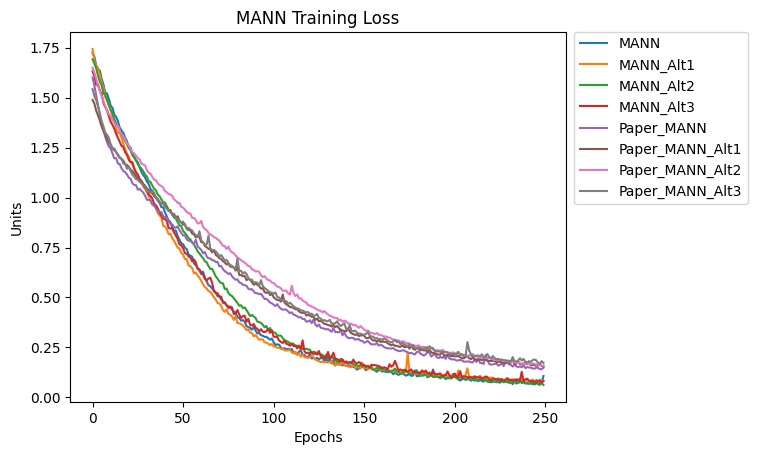

In [286]:
# Plot the training loss over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['loss']))), histories['MANN'].history['loss'], label='MANN')

plt.plot(np.array(range(len(histories['MANN_Alt1'].history['loss']))), histories['MANN_Alt1'].history['loss'], label='MANN_Alt1')

plt.plot(np.array(range(len(histories['MANN_Alt2'].history['loss']))), histories['MANN_Alt2'].history['loss'], label='MANN_Alt2')

plt.plot(np.array(range(len(histories['MANN_Alt3'].history['loss']))), histories['MANN_Alt3'].history['loss'], label='MANN_Alt3')

plt.plot(np.array(range(len(histories['Paper_MANN'].history['loss']))), histories['Paper_MANN'].history['loss'], label='Paper_MANN')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['loss']))), histories['Paper_MANN_Alt1'].history['loss'], label='Paper_MANN_Alt1')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['loss']))), histories['Paper_MANN_Alt2'].history['loss'], label='Paper_MANN_Alt2')

plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['loss']))), histories['Paper_MANN_Alt3'].history['loss'], label='Paper_MANN_Alt3')

plt.title('MANN Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Units')

plt.legend(bbox_to_anchor=(1.38, 1.02))
plt.show()

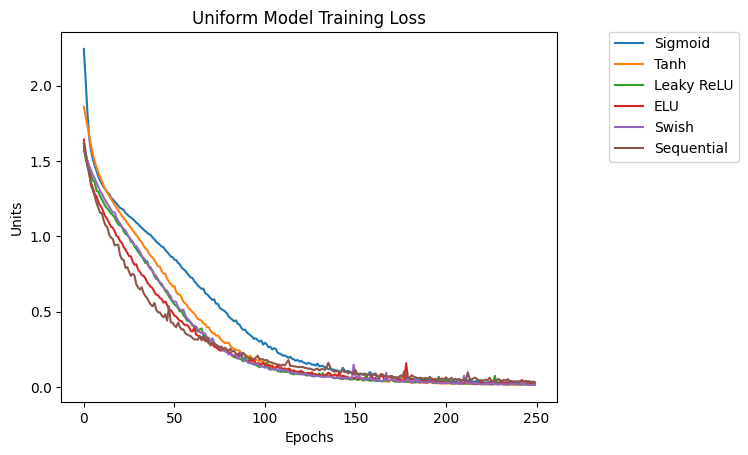

In [287]:
# Plot the training loss over the epochs
plt.plot(np.array(range(len(histories['Sigmoid'].history['loss']))), histories['Sigmoid'].history['loss'], label='Sigmoid')

plt.plot(np.array(range(len(histories['Tanh'].history['loss']))), histories['Tanh'].history['loss'], label='Tanh')

plt.plot(np.array(range(len(histories['LeakyReLU'].history['loss']))), histories['LeakyReLU'].history['loss'], label='Leaky ReLU')

plt.plot(np.array(range(len(histories['ELU'].history['loss']))), histories['ELU'].history['loss'], label='ELU')

plt.plot(np.array(range(len(histories['Swish'].history['loss']))), histories['Swish'].history['loss'], label='Swish')

plt.plot(np.array(range(len(histories['Sequential'].history['loss']))), histories['Sequential'].history['loss'], label='Sequential')

plt.title('Uniform Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Units')

plt.legend(bbox_to_anchor=(1.38, 1.02))
plt.show()

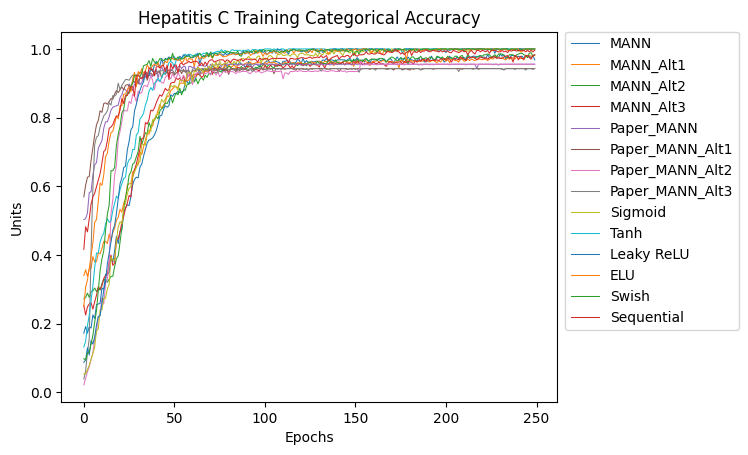

In [288]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['categorical_accuracy']))), histories['MANN'].history['categorical_accuracy'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['categorical_accuracy']))), histories['MANN_Alt1'].history['categorical_accuracy'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['categorical_accuracy']))), histories['MANN_Alt2'].history['categorical_accuracy'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['categorical_accuracy']))), histories['MANN_Alt3'].history['categorical_accuracy'], label='MANN_Alt3', linewidth=0.75)

plt.plot(np.array(range(len(histories['Paper_MANN'].history['categorical_accuracy']))), histories['Paper_MANN'].history['categorical_accuracy'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['categorical_accuracy']))), histories['Paper_MANN_Alt1'].history['categorical_accuracy'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['categorical_accuracy']))), histories['Paper_MANN_Alt2'].history['categorical_accuracy'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['categorical_accuracy']))), histories['Paper_MANN_Alt3'].history['categorical_accuracy'], label='Paper_MANN_Alt3', linewidth=0.75)


plt.plot(np.array(range(len(histories['Sigmoid'].history['categorical_accuracy']))), histories['Sigmoid'].history['categorical_accuracy'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['categorical_accuracy']))), histories['Tanh'].history['categorical_accuracy'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['categorical_accuracy']))), histories['LeakyReLU'].history['categorical_accuracy'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['categorical_accuracy']))), histories['ELU'].history['categorical_accuracy'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['categorical_accuracy']))), histories['Swish'].history['categorical_accuracy'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['categorical_accuracy']))), histories['Sequential'].history['categorical_accuracy'], label='Sequential', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Hepatitis C Training Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

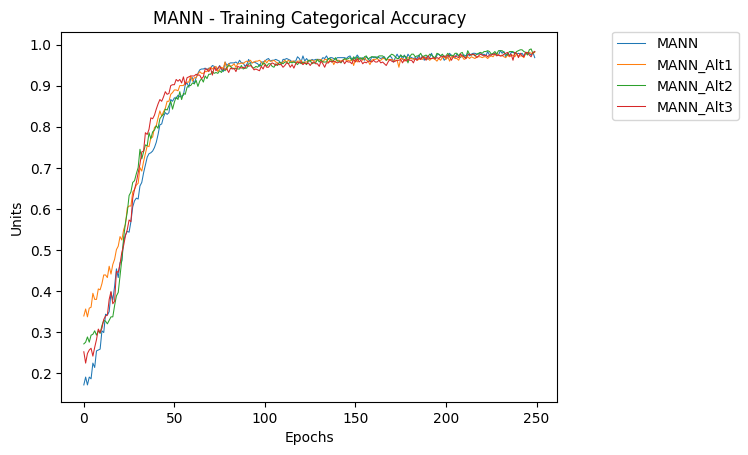

In [289]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['categorical_accuracy']))), histories['MANN'].history['categorical_accuracy'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['categorical_accuracy']))), histories['MANN_Alt1'].history['categorical_accuracy'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['categorical_accuracy']))), histories['MANN_Alt2'].history['categorical_accuracy'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['categorical_accuracy']))), histories['MANN_Alt3'].history['categorical_accuracy'], label='MANN_Alt3', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('MANN - Training Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

In [ ]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['Paper_MANN'].history['categorical_accuracy']))), histories['Paper_MANN'].history['categorical_accuracy'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['categorical_accuracy']))), histories['Paper_MANN_Alt1'].history['categorical_accuracy'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['categorical_accuracy']))), histories['Paper_MANN_Alt2'].history['categorical_accuracy'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['categorical_accuracy']))), histories['Paper_MANN_Alt3'].history['categorical_accuracy'], label='Paper_MANN_Alt3', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Paper MANN - Training Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

In [ ]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['Sigmoid'].history['categorical_accuracy']))), histories['Sigmoid'].history['categorical_accuracy'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['categorical_accuracy']))), histories['Tanh'].history['categorical_accuracy'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['categorical_accuracy']))), histories['LeakyReLU'].history['categorical_accuracy'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['categorical_accuracy']))), histories['ELU'].history['categorical_accuracy'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['categorical_accuracy']))), histories['Swish'].history['categorical_accuracy'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['categorical_accuracy']))), histories['Sequential'].history['categorical_accuracy'], label='Sequential', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Uniform & Sequential - Training Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

In [ ]:
# Plot the validation loss over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['loss']))), histories['MANN'].history['loss'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['loss']))), histories['MANN_Alt1'].history['loss'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['loss']))), histories['MANN_Alt2'].history['loss'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['loss']))), histories['MANN_Alt3'].history['loss'], label='MANN_Alt3', linewidth=0.75)

plt.plot(np.array(range(len(histories['Paper_MANN'].history['loss']))), histories['Paper_MANN'].history['loss'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['loss']))), histories['Paper_MANN_Alt1'].history['loss'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['loss']))), histories['Paper_MANN_Alt2'].history['loss'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['loss']))), histories['Paper_MANN_Alt3'].history['loss'], label='Paper_MANN_Alt3', linewidth=0.75)


plt.plot(np.array(range(len(histories['Sigmoid'].history['loss']))), histories['Sigmoid'].history['val_loss'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['loss']))), histories['Tanh'].history['val_loss'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['loss']))), histories['LeakyReLU'].history['val_loss'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['loss']))), histories['ELU'].history['val_loss'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['loss']))), histories['Swish'].history['val_loss'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['loss']))), histories['Sequential'].history['val_loss'], label='Sequential', linewidth=0.75)

plt.title('Hepatitis C Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Units')
#plt.ylim([0,1.5])
plt.legend(bbox_to_anchor=(1.38, 1.02))
plt.show()

In [ ]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['categorical_accuracy']))), histories['MANN'].history['val_categorical_accuracy'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['categorical_accuracy']))), histories['MANN_Alt1'].history['val_categorical_accuracy'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['categorical_accuracy']))), histories['MANN_Alt2'].history['val_categorical_accuracy'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['categorical_accuracy']))), histories['MANN_Alt3'].history['val_categorical_accuracy'], label='MANN_Alt3', linewidth=0.75)

plt.plot(np.array(range(len(histories['Paper_MANN'].history['categorical_accuracy']))), histories['Paper_MANN'].history['val_categorical_accuracy'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['categorical_accuracy']))), histories['Paper_MANN_Alt1'].history['val_categorical_accuracy'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['categorical_accuracy']))), histories['Paper_MANN_Alt2'].history['val_categorical_accuracy'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['categorical_accuracy']))), histories['Paper_MANN_Alt3'].history['val_categorical_accuracy'], label='Paper_MANN_Alt3', linewidth=0.75)


plt.plot(np.array(range(len(histories['Sigmoid'].history['categorical_accuracy']))), histories['Sigmoid'].history['val_categorical_accuracy'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['categorical_accuracy']))), histories['Tanh'].history['val_categorical_accuracy'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['categorical_accuracy']))), histories['LeakyReLU'].history['val_categorical_accuracy'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['categorical_accuracy']))), histories['ELU'].history['val_categorical_accuracy'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['categorical_accuracy']))), histories['Swish'].history['val_categorical_accuracy'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['categorical_accuracy']))), histories['Sequential'].history['val_categorical_accuracy'], label='Sequential', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Hepatitis C Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

In [ ]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['categorical_accuracy']))), histories['MANN'].history['val_categorical_accuracy'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['categorical_accuracy']))), histories['MANN_Alt1'].history['val_categorical_accuracy'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['categorical_accuracy']))), histories['MANN_Alt2'].history['val_categorical_accuracy'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['categorical_accuracy']))), histories['MANN_Alt3'].history['val_categorical_accuracy'], label='MANN_Alt3', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('MANN - Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

In [ ]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['Paper_MANN'].history['categorical_accuracy']))), histories['Paper_MANN'].history['val_categorical_accuracy'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['categorical_accuracy']))), histories['Paper_MANN_Alt1'].history['val_categorical_accuracy'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['categorical_accuracy']))), histories['Paper_MANN_Alt2'].history['val_categorical_accuracy'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['categorical_accuracy']))), histories['Paper_MANN_Alt3'].history['val_categorical_accuracy'], label='Paper_MANN_Alt3', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Paper MANN - Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

In [ ]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['Sigmoid'].history['categorical_accuracy']))), histories['Sigmoid'].history['val_categorical_accuracy'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['categorical_accuracy']))), histories['Tanh'].history['val_categorical_accuracy'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['categorical_accuracy']))), histories['LeakyReLU'].history['val_categorical_accuracy'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['categorical_accuracy']))), histories['ELU'].history['val_categorical_accuracy'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['categorical_accuracy']))), histories['Swish'].history['val_categorical_accuracy'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['categorical_accuracy']))), histories['Sequential'].history['val_categorical_accuracy'], label='Sequential', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Uniform & Sequential - Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

In [ ]:
# Save training history
train_hist_df = pd.DataFrame()
val_hist_df = pd.DataFrame()
for name, callback in histories.items():
    train_hist_df = pd.concat((train_hist_df, pd.DataFrame(callback.history['loss'], columns=[name])), axis=1, join='inner', ignore_index=True)
    val_hist_df = pd.concat((val_hist_df, pd.DataFrame(callback.history['val_loss'], columns=[name])), axis=1, join='inner', ignore_index=True)
    
train_hist_df.to_csv('Binary.training_hist.csv')
val_hist_df.to_csv('Binary.validation_hist.csv')

In [ ]:
# Get performance metrics for each model
# Get the testing loss for each model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, one_hot.inverse_transform(y_train).ravel())

metric = keras.metrics.CategoricalAccuracy()
metric.update_state(y_test.to_numpy(), one_hot.transform(log_reg.predict(X_test).reshape(-1,1)))
log_reg_loss = metric.result().numpy()

MANN_loss = models['MANN'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
MANN_Alt1_loss = models['MANN_Alt1'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
MANN_Alt2_loss = models['MANN_Alt2'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
MANN_Alt3_loss = models['MANN_Alt3'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

Paper_MANN_loss = models['Paper_MANN'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
Paper_MANN_Alt1_loss = models['Paper_MANN_Alt1'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
Paper_MANN_Alt2_loss = models['Paper_MANN_Alt2'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']
Paper_MANN_Alt3_loss = models['Paper_MANN_Alt3'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

Sigmoid_loss = models['Sigmoid'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

Tanh_loss = models['Tanh'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

LeakyReLU_loss = models['LeakyReLU'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

ELU_loss = models['ELU'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

Swish_loss = models['Swish'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

Sequential_loss = models['Sequential'].evaluate(X_test, y_test.to_numpy(),return_dict=True)['categorical_accuracy']

In [ ]:
# Save metrics to a table and display results
# Save testing loss to table and display results
results = pd.DataFrame([MANN_loss, MANN_Alt1_loss, MANN_Alt2_loss, MANN_Alt3_loss, Paper_MANN_loss, Paper_MANN_Alt1_loss, Paper_MANN_Alt2_loss, Paper_MANN_Alt3_loss,Sigmoid_loss, Tanh_loss, LeakyReLU_loss, ELU_loss, Swish_loss, Sequential_loss],
                      index=['MANN', 'MANN_Alt1', 'MANN_Alt2', 'MANN_Alt3', 'Paper MANN', 'Paper Alternate MANN 1', 'Paper Alternate MANN 2', 'Paper Alternate MANN 3', 'Sigmoid NN', 'Tanh NN', 'Leaky ReLU NN', 'ELU NN', 'Swish NN', 'Sequential NN'],
                      columns=['Categorical Accuracy'])
results.sort_values('Categorical Accuracy', inplace=True, ascending=False)
results.head(20)

In [ ]:
# Plot the validation Accuracy over the epochs
plt.plot(np.array(range(len(histories['MANN'].history['categorical_accuracy']))), histories['MANN'].history['categorical_accuracy'], label='MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt1'].history['categorical_accuracy']))), histories['MANN_Alt1'].history['categorical_accuracy'], label='MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt2'].history['categorical_accuracy']))), histories['MANN_Alt2'].history['categorical_accuracy'], label='MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['MANN_Alt3'].history['categorical_accuracy']))), histories['MANN_Alt3'].history['categorical_accuracy'], label='MANN_Alt3', linewidth=0.75)

plt.plot(np.array(range(len(histories['Paper_MANN'].history['categorical_accuracy']))), histories['Paper_MANN'].history['categorical_accuracy'], label='Paper_MANN', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt1'].history['categorical_accuracy']))), histories['Paper_MANN_Alt1'].history['categorical_accuracy'], label='Paper_MANN_Alt1', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt2'].history['categorical_accuracy']))), histories['Paper_MANN_Alt2'].history['categorical_accuracy'], label='Paper_MANN_Alt2', linewidth=0.75)
plt.plot(np.array(range(len(histories['Paper_MANN_Alt3'].history['categorical_accuracy']))), histories['Paper_MANN_Alt3'].history['categorical_accuracy'], label='Paper_MANN_Alt3', linewidth=0.75)


plt.plot(np.array(range(len(histories['Sigmoid'].history['categorical_accuracy']))), histories['Sigmoid'].history['categorical_accuracy'], label='Sigmoid', linewidth=0.75)
plt.plot(np.array(range(len(histories['Tanh'].history['categorical_accuracy']))), histories['Tanh'].history['categorical_accuracy'], label='Tanh', linewidth=0.75)
plt.plot(np.array(range(len(histories['LeakyReLU'].history['categorical_accuracy']))), histories['LeakyReLU'].history['categorical_accuracy'], label='Leaky ReLU', linewidth=0.75)
plt.plot(np.array(range(len(histories['ELU'].history['categorical_accuracy']))), histories['ELU'].history['categorical_accuracy'], label='ELU', linewidth=0.75)
plt.plot(np.array(range(len(histories['Swish'].history['categorical_accuracy']))), histories['Swish'].history['categorical_accuracy'], label='Swish', linewidth=0.75)
plt.plot(np.array(range(len(histories['Sequential'].history['categorical_accuracy']))), histories['Sequential'].history['categorical_accuracy'], label='Sequential', linewidth=0.75)

plt.legend(bbox_to_anchor=(1.38, 1.02))

plt.title('Hepatitis C Testing Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.show()

# 

# 